In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(ComplexUpset)

In [3]:
library(ggrepel)

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [5]:
fname_hcounts = file.path('..', 'RNASEQ', 'data', 'MED4_counts_combined.txt')
hcdf = read.csv(fname_hcounts, sep='\t' )
hgenes = hcdf[,c(1,2,3,4,5)]
hpath_fname = file.path('..', 'genomes', 'MED4', 'MED4_pathways.csv')
hpath_df = read.csv(hpath_fname)
hpath_df = left_join(hgenes, hpath_df, by='protein_id')

Warning message in left_join(hgenes, hpath_df, by = "protein_id"):
"Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 1 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this warning."


In [6]:
hpath_df_to_export = hpath_df %>% 
     group_by(gene_id) %>% 
     mutate(
         main = paste0(unique(main), collapse = ";"),
         sub = paste0(unique(sub), collapse = ";"),
         path = paste0(unique(path), collapse = ";"),
         ecpath = paste0(unique(ecpath), collapse = ";")
     ) %>%
    ungroup() %>%
    distinct(gene_id, .keep_all = TRUE)

# Enrichment of differentially expressed proteins and transcripts

Compare DE genes and DE proteins and run enrichment for all

In [7]:
rnaseq_dpath = file.path('..', 'RNASEQ', 'DE_results')
list.files(rnaseq_dpath)


[1] "HOT1A3_DE_DESEQ_results.csv"                
 [2] "HOT1A3_DE_DESEQ_results_ref_vs_long.csv"    
 [3] "HOT1A3_DE_DESEQ_vsd.csv"                    
 [4] "HOT1A3_DE_genes_DESEQ_ref_vs_long_wKEGG.csv"
 [5] "HOT1A3_GOSEQ_results_ref_vs_long.csv"       
 [6] "MED4_DE_DESEQ_results.csv"                  
 [7] "MED4_DE_DESEQ_results_ref_vs_long.csv"      
 [8] "MED4_DE_DESEQ_vsd.csv"                      
 [9] "MED4_DE_genes_DESEQ_wKEGG_ref_vs_long.csv"  
[10] "MED4_GOSEQ_results_ref_vs_long.csv"

In [8]:
proteome_dpath = file.path('..', 'Proteome', 'data')
list.files(proteome_dpath)


[1] "A_axenic_proteome.txt"                                                                          
 [2] "A_axenic_proteome_norm.txt"                                                                     
 [3] "ALT_Axenic_DE.csv"                                                                              
 [4] "ALT_CC_DE.csv"                                                                                  
 [5] "C_ALT_proteome.txt"                                                                             
 [6] "C_ALT_proteome_norm.txt"                                                                        
 [7] "C_PRO_proteome.txt"                                                                             
 [8] "C_PRO_proteome_norm.txt"                                                                        
 [9] "Nov22_Processing.xlsx"                                                                          
[10] "P_axenic_proteome.txt"                                                                          
[11] "P_axenic_proteome_norm.txt"                                                                     
[12] "PRO_Axenic_DE.csv"                                                                              
[13] "PRO_CC_DE.csv"                                                                                  
[14] "uniprot-compressed_true_download_true_fields_accession_2Cid_2Cprotei-2023.01.11-12.43.22.99.txt"

In [9]:
df_rnaseq1 = read.csv(file.path(rnaseq_dpath,'MED4_DE_DESEQ_results_ref_vs_long.csv'))  %>% 
   mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) 

df_rnaseq2 = read.csv(file.path(rnaseq_dpath,'MED4_DE_DESEQ_results.csv')) %>% 
   mutate(gene_id = str_replace(gene_id, '\\.\\.\\.\\d+', '')) 

In [10]:
unique(df_rnaseq2$contrast)

[1] "P2vsP1" "C1vsP1" "C2vsC1" "C3vsC1" "C4vsC1" "C5vsC1"

In [11]:
df_prot1 = read.csv(file.path(proteome_dpath,'PRO_CC_DE.csv'))
df_prot2 = read.csv(file.path(proteome_dpath,'PRO_Axenic_DE.csv'))

In [12]:
names(df_rnaseq1)
names(df_rnaseq2)
names(df_prot1)
names(df_prot2)



[1] "gene_id"        "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "contrast"      
 [9] "na_pvalue"      "na_padj"        "significant"    "direction"     
[13] "status"

[1] "gene_id"        "baseMean"       "log2FoldChange" "lfcSE"         
 [5] "stat"           "pvalue"         "padj"           "contrast"      
 [9] "na_pvalue"      "na_padj"        "significant"    "direction"     
[13] "status"

[1] "X.1"           "logFC"         "AveExpr"       "t"            
 [5] "P.Value"       "adj.P.Val"     "B"             "gene"         
 [9] "count"         "sca.t"         "sca.P.Value"   "sca.adj.pval" 
[13] "contrast"      "gene_id"       "gene.y"        "product"      
[17] "old_locus_tag" "X"             "path_id"       "main"         
[21] "sub"           "path"          "ecpath"        "log.sca.pval"

[1] "X.1"           "logFC"         "AveExpr"       "t"            
 [5] "P.Value"       "adj.P.Val"     "B"             "gene"         
 [9] "count"         "sca.t"         "sca.P.Value"   "sca.adj.pval" 
[13] "contrast"      "gene_id"       "gene.y"        "product"      
[17] "old_locus_tag" "X"             "path_id"       "main"         
[21] "sub"           "path"          "ecpath"        "log.sca.pval"

In [13]:
unique(df_prot1$contrast)
unique(df_prot2$contrast)
unique(df_rnaseq1$contrast)
unique(df_rnaseq2$contrast)


[1] "C2 - C1"        "C3 - C1"        "C4 - C1"        "C5 - C1"       
[5] "Clongterm - C1"

[1] "P2 - P1" "P3 - P1" "P5 - P1"

[1] "Intercept"                  "treatment_long.term_vs_ref"

[1] "P2vsP1" "C1vsP1" "C2vsC1" "C3vsC1" "C4vsC1" "C5vsC1"

# LONG TERM - compare proteome to RNASEQ

In [14]:
lc_prot = df_prot1 %>% filter(contrast=='Clongterm - C1') %>% select(
    'gene_id','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC.proteome' = 'logFC','AveExpr.proteome' = 'AveExpr',
    'pvalue.proteome' = 'sca.P.Value','padj.proteome' = 'sca.adj.pval')
head(lc_prot)


gene_id      logFC.proteome AveExpr.proteome pvalue.proteome padj.proteome
1 TX50_RS01980  3.191075       0.9167156       6.252913e-10    8.904149e-07 
2 TX50_RS00040 -1.443788       1.5845359       1.202458e-08    7.127836e-06 
3 TX50_RS04695  1.373159       2.2254880       1.731707e-08    7.127836e-06 
4 TX50_RS01970  3.706744       3.6657560       2.510390e-08    7.127836e-06 
5 TX50_RS05170  2.210139      -1.3469405       2.650587e-08    7.127836e-06 
6 TX50_RS05585  2.786227      -1.7260158       3.478220e-08    7.127836e-06

In [15]:
lc_rna = df_rnaseq1 %>% filter(contrast=='treatment_long.term_vs_ref') %>% 
    select(
        'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC.rna' = 'log2FoldChange','AveExpr.rna' = 'baseMean',
    'pvalue.rna' = 'pvalue','padj.rna' = 'padj') 
head(lc_rna)
    



gene_id      AveExpr.rna logFC.rna   pvalue.rna   padj.rna   
1 TX50_RS00020 1382.0165    0.59923609 0.4130795849 1.000000000
2 TX50_RS00025  105.1823   -0.60237404 0.6151382201 1.000000000
3 TX50_RS00030  688.4678    1.07994530 0.0001286659 0.001119134
4 TX50_RS00035  350.6688    0.07797916 1.0000000000 1.000000000
5 TX50_RS00040  636.5248    0.04297486 1.0000000000 1.000000000
6 TX50_RS00045  105.8015    0.32696417 1.0000000000 1.000000000

In [16]:
lc_df = left_join(lc_rna, lc_prot, by='gene_id')

In [17]:
lc_df = left_join(lc_df, hpath_df_to_export, by='gene_id')

In [18]:
head(lc_df)

gene_id      AveExpr.rna logFC.rna   pvalue.rna   padj.rna    logFC.proteome
1 TX50_RS00020 1382.0165    0.59923609 0.4130795849 1.000000000  0.7597312    
2 TX50_RS00025  105.1823   -0.60237404 0.6151382201 1.000000000  0.1865093    
3 TX50_RS00030  688.4678    1.07994530 0.0001286659 0.001119134  0.1646272    
4 TX50_RS00035  350.6688    0.07797916 1.0000000000 1.000000000 -0.2226453    
5 TX50_RS00040  636.5248    0.04297486 1.0000000000 1.000000000 -1.4437882    
6 TX50_RS00045  105.8015    0.32696417 1.0000000000 1.000000000  0.8473577    
  AveExpr.proteome pvalue.proteome padj.proteome gene
1  3.0058919       1.852623e-03    1.132247e-02  dnaN
2  3.7832856       6.004220e-01    7.174820e-01      
3  1.3521822       4.891034e-01    6.235302e-01  purL
4  0.6911792       4.037227e-01    5.460284e-01  purF
5  1.5845359       1.202458e-08    7.127836e-06      
6 -0.3807645       6.200604e-03    2.820978e-02      
  product                                                 protein_id    
1 DNA polymerase III subunit beta                         WP_011131639.1
2 hypothetical protein                                    WP_011131640.1
3 phosphoribosylformylglycinamidine synthase subunit PurL WP_011131641.1
4 amidophosphoribosyltransferase                          WP_011131642.1
5 DNA topoisomerase 4 subunit A                           WP_011131643.1
6 tetratricopeptide repeat protein                        WP_011131644.1
  old_locus_tag X  path_id
1 NA            14 K02338 
2 NA            19        
3 NA            20 K23269 
4 NA            21 K00764 
5 NA            24 K02469 
6 NA            26        
  main                                                        
1 09120 Genetic Information Processing;09180 Brite Hierarchies
2                                                             
3 09100 Metabolism                                            
4 09100 Metabolism;09180 Brite Hierarchies                    
5 09180 Brite Hierarchies                                     
6                                                             
  sub                                                                                       
1 09124 Replication and repair;09182 Protein families: genetic information processing       
2                                                                                           
3 09104 Nucleotide metabolism                                                               
4 09104 Nucleotide metabolism;09105 Amino acid metabolism;09181 Protein families: metabolism
5 09182 Protein families: genetic information processing                                    
6                                                                                           
  path                                                                                                                                                                                                                        
1 03030 DNA replication [PATH:ko03030];03430 Mismatch repair [PATH:ko03430];03440 Homologous recombination [PATH:ko03440];03032 DNA replication proteins [BR:ko03032];03400 DNA repair and recombination proteins [BR:ko03400]
2                                                                                                                                                                                                                             
3 00230 Purine metabolism [PATH:ko00230]                                                                                                                                                                                      
4 00230 Purine metabolism [PATH:ko00230];00250 Alanine, aspartate and glutamate metabolism [PATH:ko00250];01002 Peptidases and inhibitors [BR:ko01002]                                                                        
5 03032 DNA replication proteins [BR:ko03032];03400 DNA repair and recombination proteins [BR:ko03400]                                                              

In [19]:
lc_df = lc_df %>% 
    mutate(Category = case_when(
           grepl('09103 Lipid metabolism', sub)~'Lipid',
           grepl('09131 Membrane transport', sub)~'Transport/Signaling',
           grepl('09104 Nucleotide metabolism', sub)~'Nucleotide',
           grepl('09101 Carbohydrate metabolism', sub)~'Energy/Carbohydrate/Glycan',
           grepl('09105 Amino acid metabolism', sub)~'Amino acid',
           grepl('09106 Metabolism of other amino acids', sub)~'Amino acid',
            
           grepl('09108 Metabolism of cofactors and vitamins', sub)~'Secondary',
           grepl('09107 Glycan biosynthesis and metabolism', sub)~'Energy/Carbohydrate/Glycan',
           grepl('09109 Metabolism of terpenoids and polyketides', sub)~'Secondary',

           grepl('09183 Protein families: signaling and cellular processes', sub)~'Transport/Signaling',
           grepl('09193 Unclassified: signaling and cellular processes', sub)~'Transport/Signaling',
        
           grepl('09182 Protein families: genetic information processing', sub)~'Genetic',
           grepl('09192 Unclassified: genetic information processing', sub)~'Genetic',
        
           grepl('09102 Energy metabolism', sub)~'Energy/Carbohydrate/Glycan',
           grepl('09124 Replication and repair', sub)~'Replication',
        
            TRUE~'Other'
           )) 

In [20]:
lc_df$Category = factor(lc_df$Category, levels = c("Amino acid", "Energy/Carbohydrate/Glycan", 
"Genetic", "Lipid", "Nucleotide",  "Secondary", "Transport/Signaling", "Other"))

In [21]:
subset(lc_df, ((abs(logFC.proteome)>1)&padj.proteome<0.1)|((abs(logFC.rna)>1)&padj.rna<0.1)) %>% 
select(Category) %>%table() %>% as.data.frame() %>% arrange(Freq) #%>% dput


Category                   Freq
1 Lipid                        8 
2 Nucleotide                  15 
3 Amino acid                  19 
4 Secondary                   31 
5 Transport/Signaling         32 
6 Genetic                     57 
7 Energy/Carbohydrate/Glycan  60 
8 Other                      313

In [22]:
lc_df = lc_df %>% replace_na(list(logFC.rna=0, logFC.proteome=0))

In [23]:
my.cols <- c(brewer.pal(7, "Set1"), 'grey34')
my.cols[6] = '#FFC000'

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


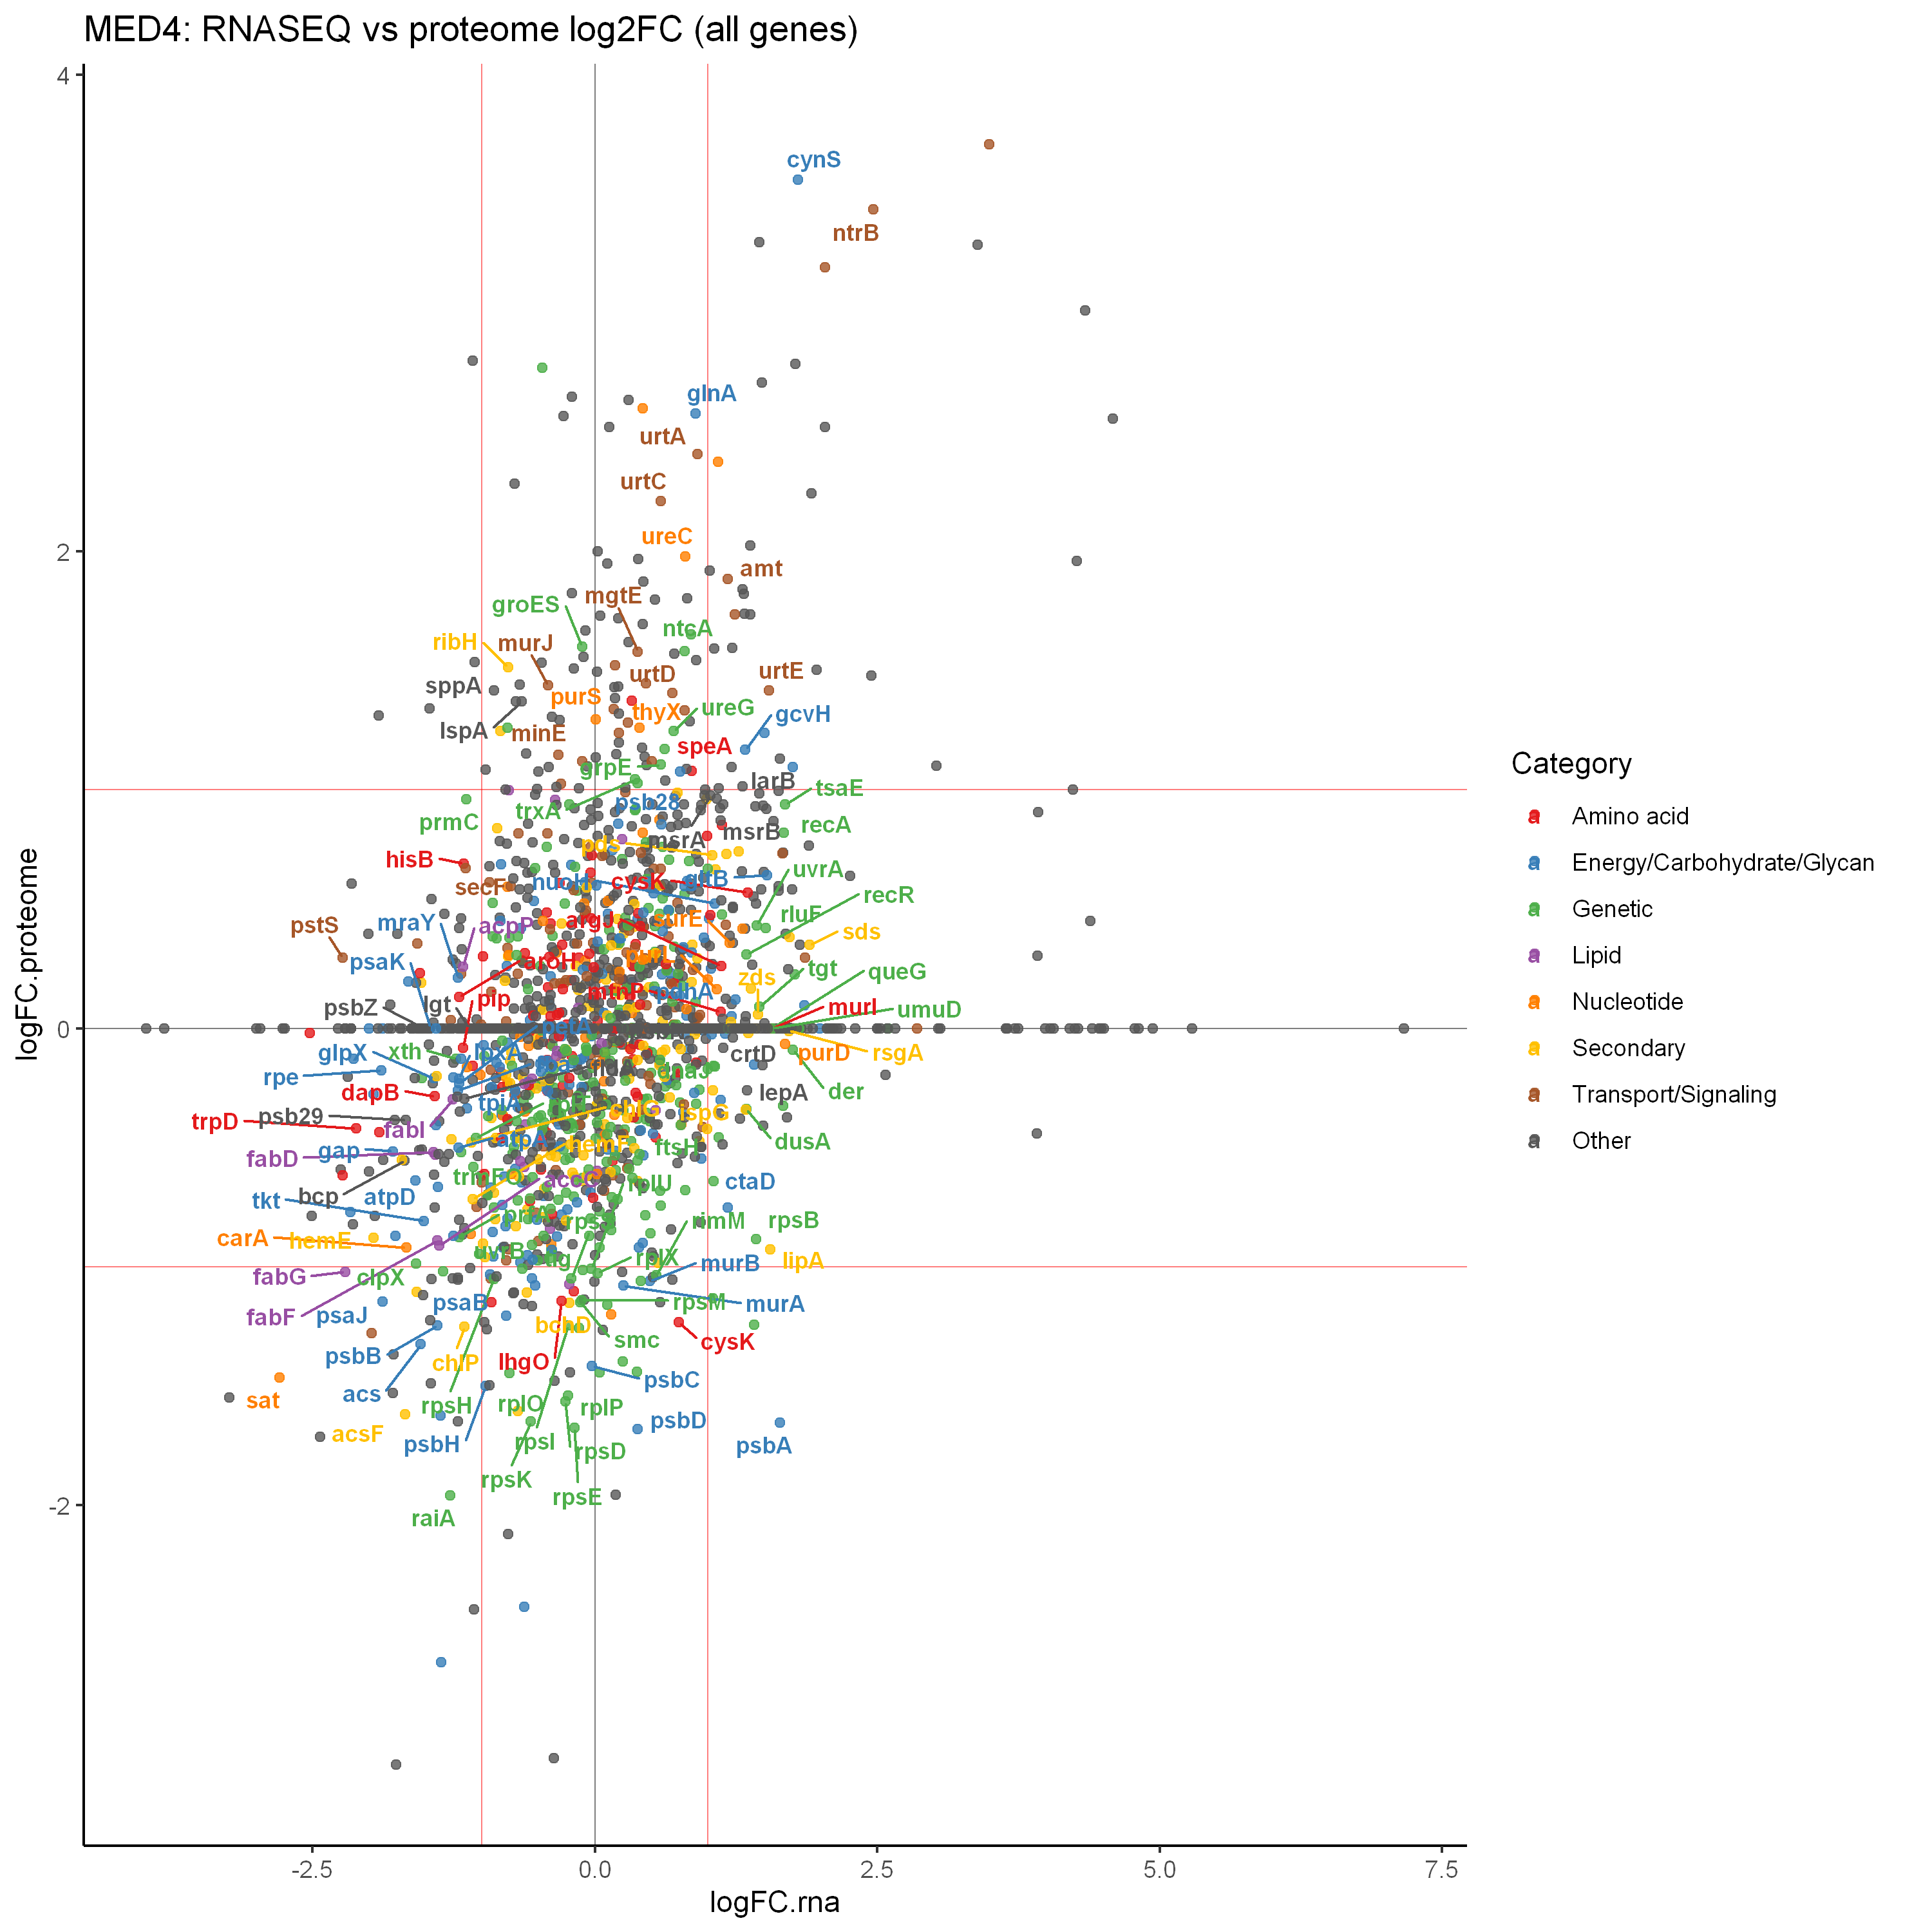

In [24]:
ggplot(lc_df, aes(x=logFC.rna, y=logFC.proteome, color=Category, #, size=-log10(pvalue.proteome)
                 )) +
    geom_vline(xintercept = c(-1,1), colour = "red", size = 0.3, alpha=0.5) + # Add fold change cutoffs
    geom_hline(yintercept = c(-1,1), colour = "red", size = 0.3, alpha=0.5) + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black", size = 0.3, alpha=0.5) + # Add 0 lines
    geom_hline(yintercept = 0, colour = "black", size = 0.3, alpha=0.5) + # Add 0 lines
   geom_point(size=1.5, alpha=0.8) + 
   geom_text_repel(data=subset(lc_df, ((abs(logFC.proteome)>1)&padj.proteome<0.1)|((abs(logFC.rna)>1)&padj.rna<0.1)),
                    aes( x=logFC.rna, y=logFC.proteome,label=gene), max.overlaps = Inf, size=3, fontface='bold') + # add gene label
    scale_color_manual(values=my.cols) +
    ggtitle('MED4: RNASEQ vs proteome log2FC (all genes)') +
#scale_colour_brewer(palette = "Set1") +
    theme_classic()

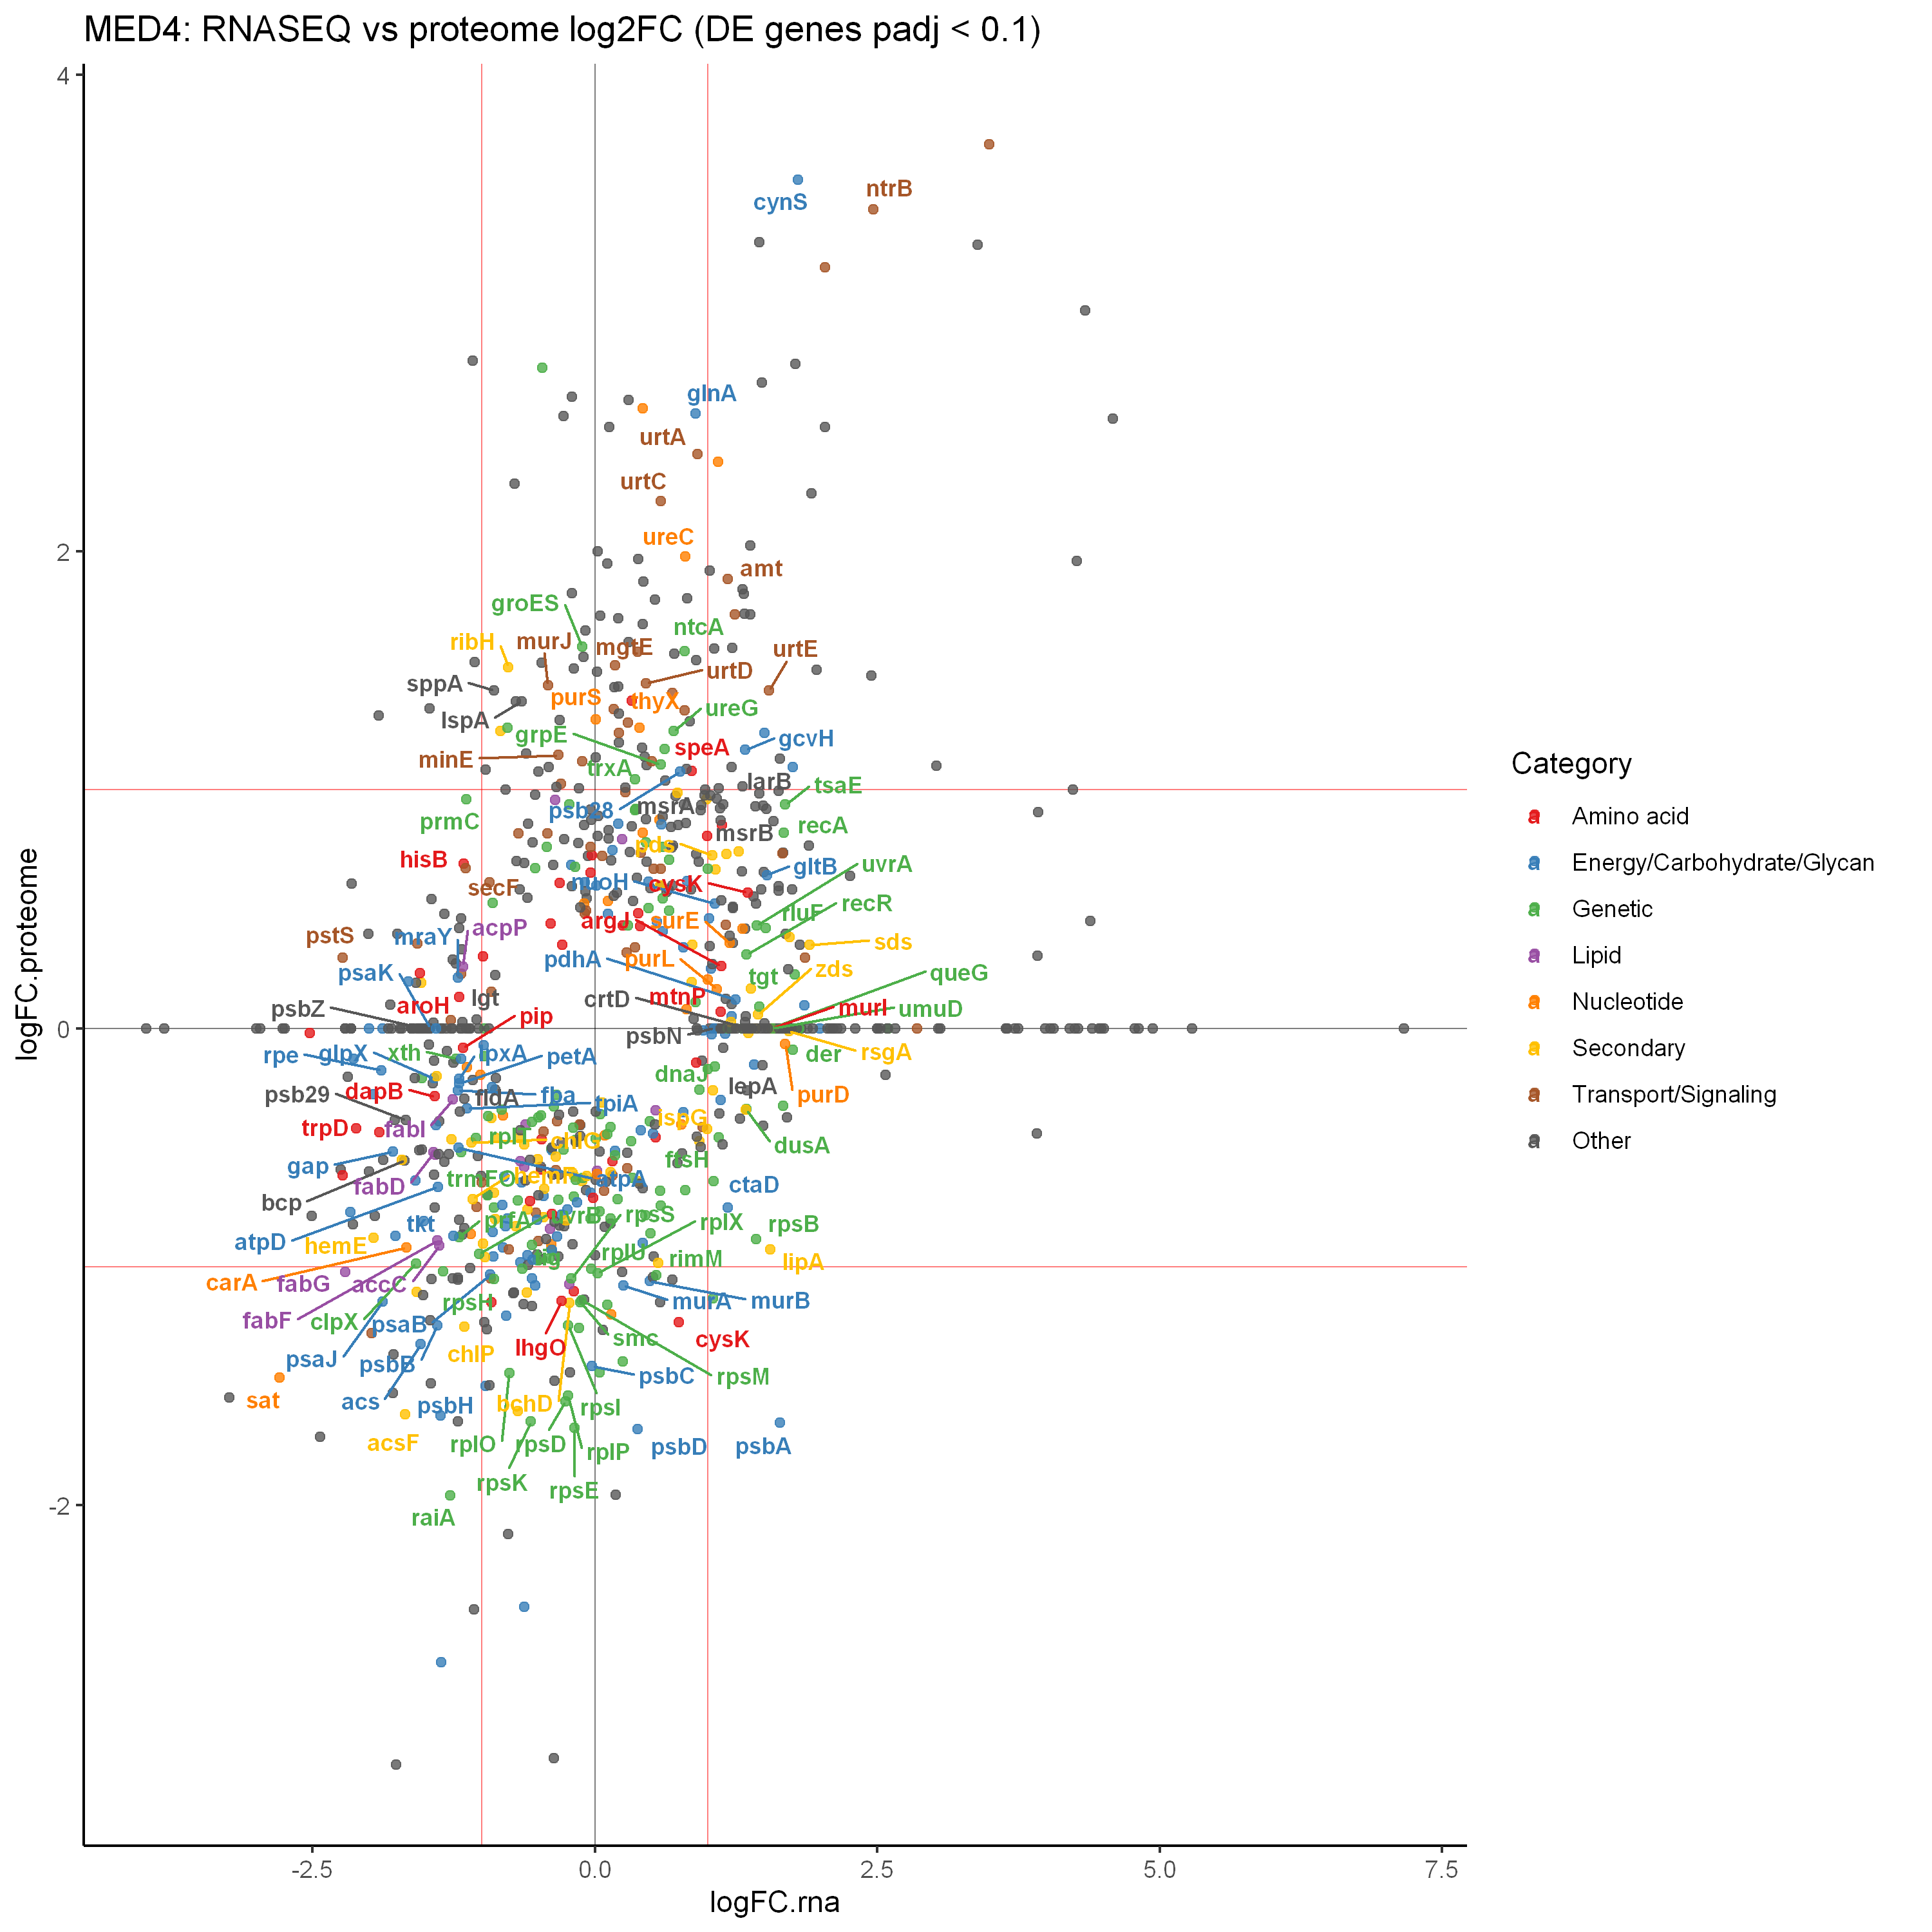

In [25]:
ggplot(subset(lc_df, (padj.proteome<0.1)|(padj.rna<0.1)), 
       aes(x=logFC.rna, y=logFC.proteome, color=Category, #, size=-log10(pvalue.proteome)
                 )) +
    geom_vline(xintercept = c(-1,1), colour = "red", size = 0.3, alpha=0.5) + # Add fold change cutoffs
    geom_hline(yintercept = c(-1,1), colour = "red", size = 0.3, alpha=0.5) + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black", size = 0.3, alpha=0.5) + # Add 0 lines
    geom_hline(yintercept = 0, colour = "black", size = 0.3, alpha=0.5) + # Add 0 lines
   geom_point(size=1.5, alpha=0.8) + 
   geom_text_repel(data=subset(lc_df, ((abs(logFC.proteome)>1)&padj.proteome<0.1)|((abs(logFC.rna)>1)&padj.rna<0.1)),
                    aes( x=logFC.rna, y=logFC.proteome,label=gene), max.overlaps = Inf, size=3, fontface='bold') + # add gene label
    scale_color_manual(values=my.cols) +
    ggtitle('MED4: RNASEQ vs proteome log2FC (DE genes padj < 0.1)') +

#scale_colour_brewer(palette = "Set1") +
    theme_classic()

# upset plots

In [26]:
set_size = function(w, h, factor=1.5) {
    s = 1 * factor
    options(
        repr.plot.width=w * s,
        repr.plot.height=h * s,
        repr.plot.res=100 / factor,
        jupyter.plot_mimetypes='image/png',
        jupyter.plot_scale=1
    )
}

In [27]:
df_DElist_prot1 = df_prot1 %>%  select(
    'contrast','gene_id','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval') %>%
    mutate(Assay = 'Proteome')
df_DElist_prot2 = df_prot2 %>%  select(
    'contrast','gene_id','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval')%>%
    mutate(Assay = 'Proteome')


In [28]:
df_DElist_rna1 = df_rnaseq1 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
df_DElist_rna2 = df_rnaseq2 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
    


In [29]:
df_DElist = bind_rows(df_DElist_prot1, df_DElist_prot2, df_DElist_rna1, df_DElist_rna2)

In [30]:
dput(unique(df_DElist$contrast))

c("C2 - C1", "C3 - C1", "C4 - C1", "C5 - C1", "Clongterm - C1", 
"P2 - P1", "P3 - P1", "P5 - P1", "Intercept", "treatment_long.term_vs_ref", 
"P2vsP1", "C1vsP1", "C2vsC1", "C3vsC1", "C4vsC1", "C5vsC1")


In [31]:
lookup <- c(
    "C2 - C1" = 'C2vsC1_prot', 
    "C3 - C1" = 'C3vsC1_prot', 
    "C4 - C1" = 'C4vsC1_prot', 
    "C5 - C1" = 'C5vsC1_prot', 
    "Clongterm - C1" = 'LATEvsC1_prot', 
    "P2 - P1" = 'P2vsP1_prot',
    "P3 - P1" = 'P3vsP1_prot',
    "P5 - P1" = 'P5vsP1_prot',
    "Intercept" = "Intercept",
    "treatment_long.term_vs_ref" = 'LATEvsC1P1_rna', 
    "P2vsP1" = 'P2vsP1_rna', 
    "C1vsP1" = 'C1vsP1_rna', 
    "C2vsC1" = 'C2vsC1_rna', 
    "C3vsC1" = 'C3vsC1_rna', 
    "C4vsC1" = 'C4vsC1_rna', 
    "C5vsC1" = 'C5vsC1_rna')
    
    
df_DElist = df_DElist %>% 
    mutate(contrast1 = lookup[contrast]) %>%
    filter(contrast != 'Intercept')

In [32]:
df_DElist = left_join(df_DElist, hpath_df_to_export, by='gene_id')


In [33]:
df_DElist = df_DElist %>% 
    mutate(Category = case_when(
           grepl('09103 Lipid metabolism', sub)~'Lipid',
           grepl('09131 Membrane transport', sub)~'Transport/Signaling',
           grepl('09104 Nucleotide metabolism', sub)~'Nucleotide',
           grepl('09101 Carbohydrate metabolism', sub)~'Energy/Carbohydrate/Glycan',
           grepl('09105 Amino acid metabolism', sub)~'Amino acid',
           grepl('09106 Metabolism of other amino acids', sub)~'Amino acid',
            
           grepl('09108 Metabolism of cofactors and vitamins', sub)~'Secondary',
           grepl('09107 Glycan biosynthesis and metabolism', sub)~'Energy/Carbohydrate/Glycan',
           grepl('09109 Metabolism of terpenoids and polyketides', sub)~'Secondary',

           grepl('09183 Protein families: signaling and cellular processes', sub)~'Transport/Signaling',
           grepl('09193 Unclassified: signaling and cellular processes', sub)~'Transport/Signaling',
        
           grepl('09182 Protein families: genetic information processing', sub)~'Genetic',
           grepl('09192 Unclassified: genetic information processing', sub)~'Genetic',
        
           grepl('09102 Energy metabolism', sub)~'Energy/Carbohydrate/Glycan',
           grepl('09124 Replication and repair', sub)~'Replication',
        
            TRUE~'Other'
           )) 

In [34]:
df_DElist$Category = factor(df_DElist$Category, levels = c("Amino acid", "Energy/Carbohydrate/Glycan", 
"Genetic", "Lipid", "Nucleotide",  "Secondary", "Transport/Signaling", "Other"))
#my.cols <- c(brewer.pal(7, "Set2"), 'grey34')


In [35]:
contrast_list = unique(df_DElist$contrast1)
contrast_list = unique(df_DElist$contrast)


In [36]:
dput(contrast_list)

c("C2 - C1", "C3 - C1", "C4 - C1", "C5 - C1", "Clongterm - C1", 
"P2 - P1", "P3 - P1", "P5 - P1", "treatment_long.term_vs_ref", 
"P2vsP1", "C1vsP1", "C2vsC1", "C3vsC1", "C4vsC1", "C5vsC1")


In [37]:
rna_CC_list = c(#"C1vsP1_rna", 
                "C2vsC1_rna", "C3vsC1_rna", "C4vsC1_rna", "C5vsC1_rna")
prot_CC_list = c("C2vsC1_prot", "C3vsC1_prot", "C4vsC1_prot", "C5vsC1_prot")
latelist = c("LATEvsC1_prot","LATEvsC1P1_rna")


c("C2vsC1_prot", "C3vsC1_prot", "C4vsC1_prot", "C5vsC1_prot", 
"LATEvsC1_prot", "P2vsP1_prot", "P3vsP1_prot", "P5vsP1_prot", 
"LATEvsC1P1_rna", "P2vsP1_rna", "C1vsP1_rna", "C2vsP1_rna", "C3vsP1_rna", 
"C4vsP1_rna", "C5vsP1_rna")

[1] "C2vsC1_prot"    "C3vsC1_prot"    "C4vsC1_prot"    "C5vsC1_prot"   
 [5] "LATEvsC1_prot"  "P2vsP1_prot"    "P3vsP1_prot"    "P5vsP1_prot"   
 [9] "LATEvsC1P1_rna" "P2vsP1_rna"     "C1vsP1_rna"     "C2vsP1_rna"    
[13] "C3vsP1_rna"     "C4vsP1_rna"     "C5vsP1_rna"

In [38]:

contrast_meta_df = df_DElist %>% distinct(contrast1, Assay) %>% rename(set = contrast1)


In [39]:
contrast_meta_df

set            Assay   
1  C2vsC1_prot    Proteome
2  C3vsC1_prot    Proteome
3  C4vsC1_prot    Proteome
4  C5vsC1_prot    Proteome
5  LATEvsC1_prot  Proteome
6  P2vsP1_prot    Proteome
7  P3vsP1_prot    Proteome
8  P5vsP1_prot    Proteome
9  LATEvsC1P1_rna RNA     
10 P2vsP1_rna     RNA     
11 C1vsP1_rna     RNA     
12 C2vsC1_rna     RNA     
13 C3vsC1_rna     RNA     
14 C4vsC1_rna     RNA     
15 C5vsC1_rna     RNA

In [40]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 300)

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
"Converting non-logical columns to binary: C2vsC1_rna, C3vsC1_rna, C4vsC1_rna, C5vsC1_rna, C2vsC1_prot, C3vsC1_prot, C4vsC1_prot, C5vsC1_prot"


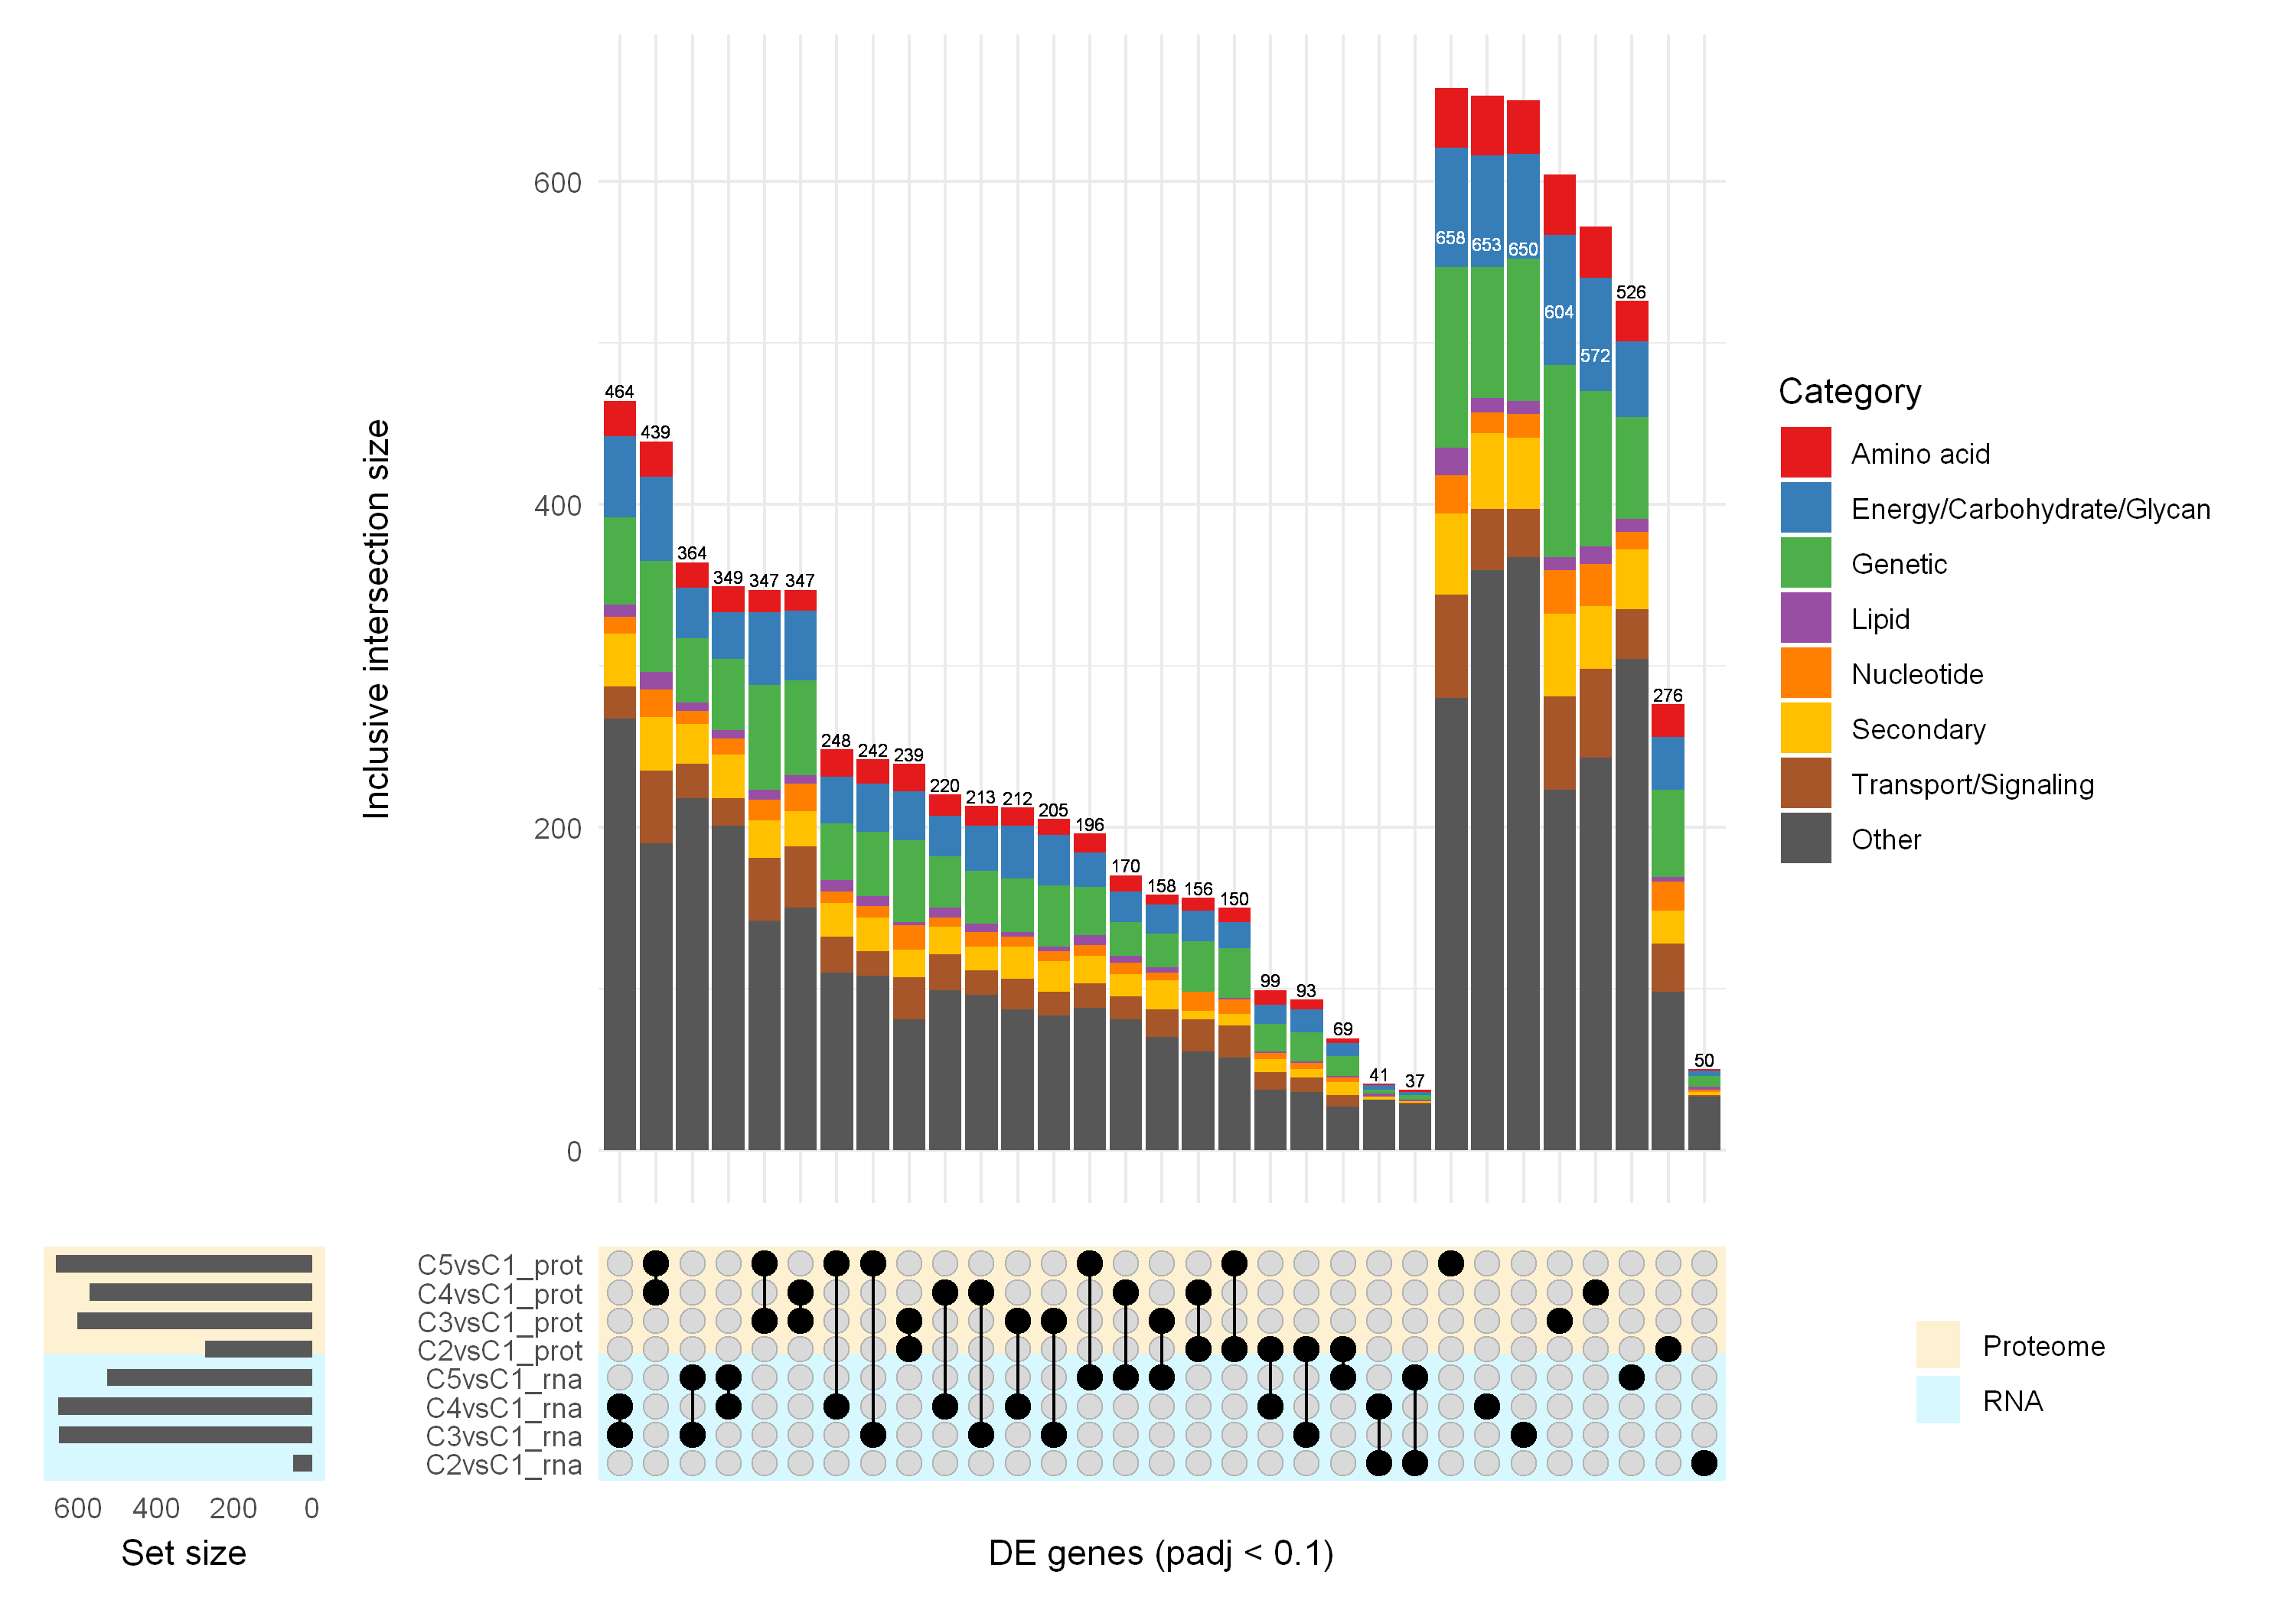

In [41]:
#set_size(10,10 )
df_DElist %>%
    filter(padj < 0.1, #abs(logFC) > 1, 
           contrast != 'Intercept') %>%
    pivot_wider(id_cols = c(gene_id,Category), names_from = contrast1, values_from = logFC, values_fill = FALSE) %>% 
upset(c(rna_CC_list, prot_CC_list), name='DE genes (padj < 0.1)', 
      mode='inclusive_intersection',
      base_annotations=list(
        'Intersection size'=intersection_size(
            mode='inclusive_intersection',
            mapping=aes(fill=Category),
            text=list(size=2)
        )
            + scale_fill_manual(values=my.cols)
    ),      
#     annotations = list(
#         'Categories'=(
#             ggplot(mapping=aes(fill=Category))
#             + geom_bar(stat='count', position='fill')
#             + scale_y_continuous(labels=scales::percent_format())
#             + scale_fill_manual(values=my.cols
#             )
#             + ylab('Category')
#         )
#     ),
      width_ratio=0.2, 
      height_ratio=0.2,
      sort_sets=FALSE,
      #min_size=10, 
      #mode='inclusive_intersection',
      min_degree=1, max_degree=2,
     sort_intersections_by=c('degree', 'cardinality'),
    stripes=upset_stripes(
        mapping=aes(color=Assay),
        colors=c(
            'Proteome'='#fef1d2',
            'RNA'='#d7f8ff'
        ),
        data=contrast_meta_df
    )) #+
#theme_classic(base_size = 15)

In [42]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)

Warning message in upset_data(data, intersect, mode = mode, encode_sets = encode_sets, :
"Converting non-logical columns to binary: Proteome, RNA"


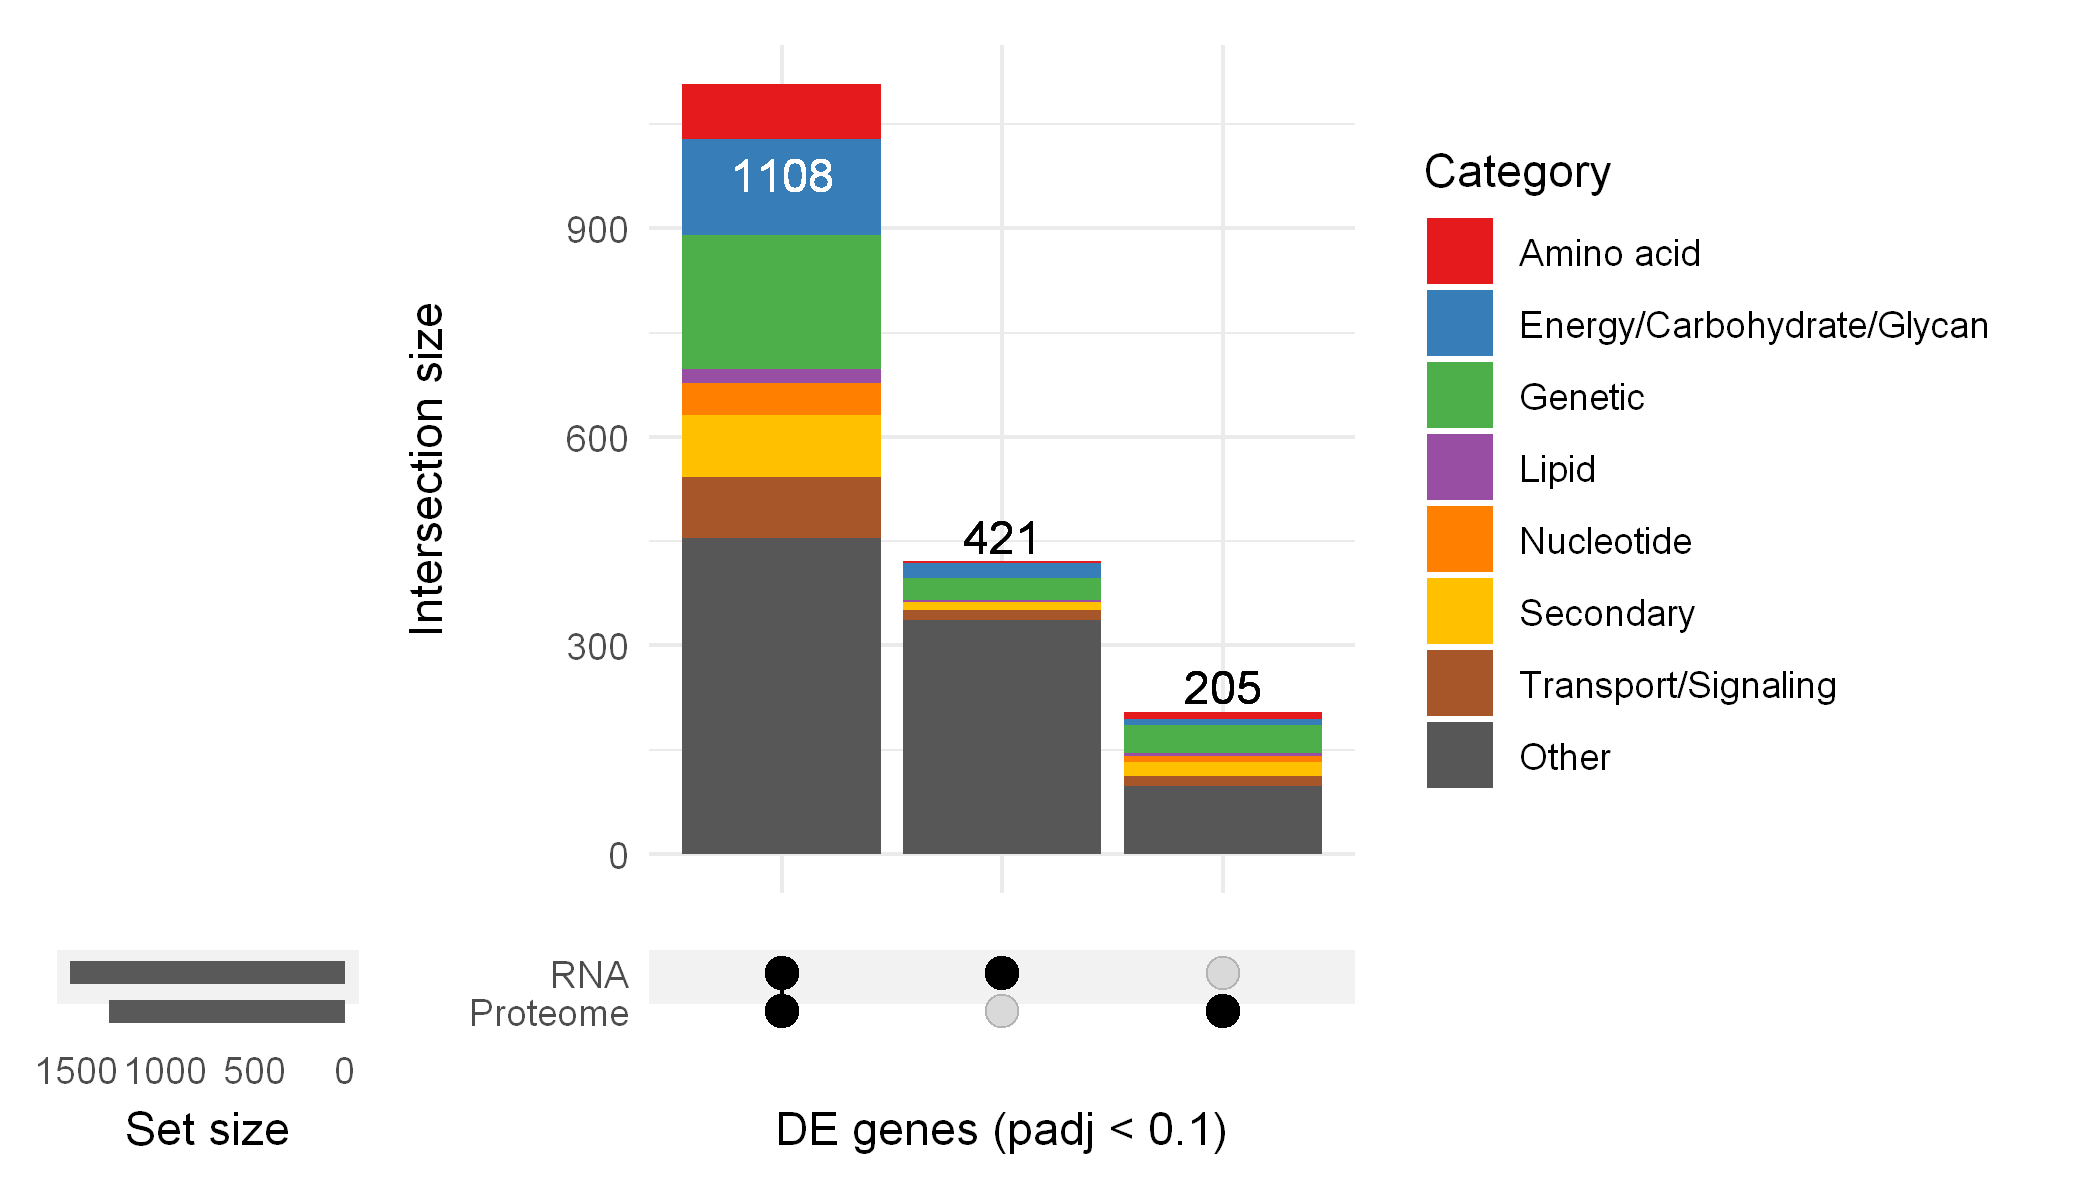

In [43]:
#set_size(10,10 )
df_DElist %>%
    filter(padj < 0.1, #abs(logFC) > 1, 
           contrast != 'Intercept') %>%
    distinct(gene_id, Assay, .keep_all =TRUE) %>%
     pivot_wider(id_cols = c(gene_id,Category), names_from = Assay, values_from = logFC, values_fill = FALSE) %>% 
 upset(c('Proteome', 'RNA'), name='DE genes (padj < 0.1)',
       height_ratio=0.1,
#       mode='inclusive_intersection',
      base_annotations=list(
        'Intersection size'=intersection_size(
#            mode='inclusive_intersection',
            mapping=aes(fill=Category)
        )
            + scale_fill_manual(values=my.cols)
    )
       )
# #     annotations = list(
# #         'Categories'=(
# #             ggplot(mapping=aes(fill=Category))
# #             + geom_bar(stat='count', position='fill')
# #             + scale_y_continuous(labels=scales::percent_format())
# #             + scale_fill_manual(values=my.cols
# #             )
# #             + ylab('Category')
# #         )
# #     ),
#       width_ratio=0.1, 
#       #min_size=10, 
#       #mode='inclusive_intersection',
#       #min_degree=1, max_degree=2,
#      #sort_intersections_by=c('degree', 'cardinality'),
#     ) #+
# #theme_classic(base_size = 15)

# GOSEQ

In [44]:
dp1 = df_prot1 %>%  select(
    'contrast','gene_id','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval') %>%
    mutate(Assay = 'Proteome')
dp2 = df_prot2 %>%  select(
    'contrast','gene_id','logFC','AveExpr',
    'sca.P.Value','sca.adj.pval') %>%
    rename('logFC' = 'logFC','AveExpr' = 'AveExpr',
    'pvalue' = 'sca.P.Value','padj' = 'sca.adj.pval')%>%
    mutate(Assay = 'Proteome')


In [45]:
dr1 = df_rnaseq1 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
dr2 = df_rnaseq2 %>% 
    select(
        'contrast', 'gene_id','baseMean','log2FoldChange',
        'pvalue','padj',
    ) %>%
    rename('logFC' = 'log2FoldChange','AveExpr' = 'baseMean',
    'pvalue' = 'pvalue','padj' = 'padj') %>%
    mutate(Assay = 'RNA')
    


In [46]:
df_all = bind_rows(dp1, dp2, dr1, dr2)

In [47]:
lookup <- c(
    "C2 - C1" = 'C2vsC1_prot', 
    "C3 - C1" = 'C3vsC1_prot', 
    "C4 - C1" = 'C4vsC1_prot', 
    "C5 - C1" = 'C5vsC1_prot', 
    "Clongterm - C1" = 'LATEvsC1_prot', 
    "P2 - P1" = 'P2vsP1_prot',
    "P3 - P1" = 'P3vsP1_prot',
    "P5 - P1" = 'P5vsP1_prot',
    "Intercept" = "Intercept",
    "treatment_long.term_vs_ref" = 'LATEvsC1P1_rna', 
    "P2vsP1" = 'P2vsP1_rna', 
    "C1vsP1" = 'C1vsP1_rna', 
    "C2vsC1" = 'C2vsC1_rna', 
    "C3vsC1" = 'C3vsC1_rna', 
    "C4vsC1" = 'C4vsC1_rna', 
    "C5vsC1" = 'C5vsC1_rna')
    
    
df_all = df_all %>% 
    mutate(contrast1 = lookup[contrast]) %>%
    filter(contrast != 'Intercept')

In [48]:
gtf_fpath = file.path('..','genomes', 'MED4', 'genomic.gtf')
SAF <- Rsubread::flattenGTF(gtf_fpath, GTF.featureType = "CDS")
GeneLength <- rowsum(SAF$End-SAF$Start+1, SAF$GeneID)
GeneLength = as.data.frame(GeneLength) 
names(GeneLength) = 'Length'
GeneLength = GeneLength %>% rownames_to_column('gene_id')


Flattening GTF file: C:\Users\oweisberg\Documents\GitHub\CC1A3\genomes\MED4\genomic.gtf
Output SAF file: ./.Rsubread_flattenGTF_pid19440

Looking for 'CDS' features... (grouped by 'gene_id')

Finished.



In [49]:
df_all = left_join(df_all, GeneLength, by = 'gene_id')

In [50]:
df_all

contrast gene_id      logFC      AveExpr     pvalue       padj        
1     C2 - C1  TX50_RS01980  2.6029332  0.91671556 5.951467e-07 0.0004868287
2     C2 - C1  TX50_RS05125  1.7956460  2.04648813 8.763244e-07 0.0004868287
3     C2 - C1  TX50_RS09075  1.1167539  1.46785946 1.025622e-06 0.0004868287
4     C2 - C1  TX50_RS05175  1.4380690 -0.20702445 2.486196e-06 0.0008850858
5     C2 - C1  TX50_RS08845 -0.9884268  3.74974295 3.186503e-06 0.0009075161
6     C2 - C1  TX50_RS01985  1.7087460 -0.25577666 5.226353e-06 0.0012403878
7     C2 - C1  TX50_RS05585  2.3211759 -1.72601579 6.907967e-06 0.0014052779
8     C2 - C1  TX50_RS05180  1.4995632  1.34725170 1.099431e-05 0.0017487735
9     C2 - C1  TX50_RS05170  1.6961969 -1.34694055 1.135667e-05 0.0017487735
10    C2 - C1  TX50_RS07865  1.3468844  1.29842981 1.244679e-05 0.0017487735
11    C2 - C1  TX50_RS04160  1.0422090 -0.19498831 1.468205e-05 0.0017487735
12    C2 - C1  TX50_RS07755 -1.6856352  3.03145873 1.531966e-05 0.0017487735
13    C2 - C1  TX50_RS01975  2.7204049 -2.51073856 1.615740e-05 0.0017487735
14    C2 - C1  TX50_RS01795  1.1292019 -2.13131898 1.719300e-05 0.0017487735
15    C2 - C1  TX50_RS05830  1.2333476 -1.38758233 2.254932e-05 0.0021406822
16    C2 - C1  TX50_RS01620 -1.0312176  4.75975157 2.667470e-05 0.0023740479
17    C2 - C1  TX50_RS05135  2.1339753 -0.45089397 2.942548e-05 0.0023777618
18    C2 - C1  TX50_RS04285  0.8861923  5.19382242 3.005598e-05 0.0023777618
19    C2 - C1  TX50_RS00840  0.9973780  2.83088462 3.244572e-05 0.0024317214
20    C2 - C1  TX50_RS07090  0.8326759  4.39304956 3.637684e-05 0.0025900308
21    C2 - C1  TX50_RS01275  1.7603264  1.24846350 4.978681e-05 0.0032116453
22    C2 - C1  TX50_RS05580  2.9084625 -0.98016783 5.184816e-05 0.0032116453
23    C2 - C1  TX50_RS05115  0.9566263  1.07116629 5.258699e-05 0.0032116453
24    C2 - C1  TX50_RS03160 -0.8411973  1.55098858 5.412885e-05 0.0032116453
25    C2 - C1  TX50_RS00070 -0.9446316  0.01522325 6.032841e-05 0.0033485959
26    C2 - C1  TX50_RS04030 -0.8496043  4.10854232 6.114009e-05 0.0033485959
27    C2 - C1  TX50_RS04820 -1.4475288 -0.03773708 6.409682e-05 0.0033515045
28    C2 - C1  TX50_RS03015  0.7703025  0.82302939 6.590037e-05 0.0033515045
29    C2 - C1  TX50_RS04910  2.5511150  5.63148746 7.310912e-05 0.0035899099
30    C2 - C1  TX50_RS06225  0.8860563  0.96424656 7.869063e-05 0.0037351817
⋮     ⋮        ⋮            ⋮          ⋮           ⋮            ⋮           
24348 C5vsC1   TX50_RS09745 -1.3348623   82.626698 1.159048e-02 5.263716e-02
24349 C5vsC1   TX50_RS09750 -1.8732931  213.265107 4.511059e-02 1.398655e-01
24350 C5vsC1   TX50_RS09755 -0.9517516  229.634883 7.381151e-02 1.994527e-01
24351 C5vsC1   TX50_RS09760 -0.6576445    7.416545 5.860466e-01 7.448740e-01
24352 C5vsC1   TX50_RS09765 -1.6203712   35.964266 2.794831e-03 1.869133e-02
24353 C5vsC1   TX50_RS09770 -4.3461845    6.500273 9.076308e-03 4.415966e-02
24354 C5vsC1   TX50_RS09775 -0.2812124   91.738114 4.674206e-01 6.490590e-01
24355 C5vsC1   TX50_RS09780 -0.2954429  377.599020 5.494372e-01 7.183895e-01
24356 C5vsC1   TX50_RS09785 -1.1284521   77.554290 1.815533e-02 7.150109e-02
24357 C5vsC1   TX50_RS09790 -0.1781373  117.561929 4.863640e-01 6.678485e-01
24358 C5vsC1   TX50_RS09795 -2.3652482  144.033286 1.778696e-02 7.050034e-02
24359 C5vsC1   TX50_RS09800 -1.0757704  990.293863 7.503843e-02 2.007169e-01
24360 C5vsC1   TX50_RS09805 -5.1028850  102.631580 5.340997e-06 1.235773e-04
24361 C5vsC1   TX50_RS09810 -4.0537809  246.964274 1.577950e-08 8.345100e-07
24362 C5vsC1   TX50_RS09815 -1.4766567 1301.573746 1.073421e-02 4.942542e-02
24363 C5vsC1   TX50_RS09820 -0.9090064 1661.019631 1.419581e-01 3.058751e-01
24364 C5vsC1   TX50_RS09825  1.4320110  335.895318 9.803139e-05 1.417626e-03
24365 C5vsC1   TX50_RS09830  4.0607446 2098.390306 2.468833e-21 9.139619e-19
24366 C5vsC1   TX50_RS09835  2.0446330    7.514383 3.438768e-02 1.162895e-01
24367 C5vsC1   TX50_RS09840  4.3943475 1505.075959 5.113276e-27 3.154891e-24
24

In [51]:
df_all = df_all %>% 
    mutate(
        down = ((logFC < 0) & (padj < 0.1)),
        up   = ((logFC > 0) & (padj < 0.1)),
)

In [52]:
hpath_df = hpath_df %>% mutate(gene = if_else(gene != '', gene, gene_id))

In [53]:
ignore_main = c('09160 Human Diseases', 
                '09150 Organismal Systems', 
                '09190 Not Included in Pathway or Brite', 
                '09180 Brite Hierarchies',
                ''
               )

In [54]:
run_enrichment <- function(contrastname, encolname, testcolname) {
    #cat_df = path_df %>% select(encolname, main) %>% distinct()    
    mpath_df = hpath_df %>%
       #filter(main != '')  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(PATH = word(PATH)) %>%
       distinct(PATH, gene_id, .keep_all= TRUE) %>%
       select(gene_id, PATH)
    path_names = hpath_df %>%
       #filter(main != '')  %>%
       pivot_longer(cols = all_of(encolname), values_to = 'PATH') %>%
       mutate(category = word(PATH)) %>%
       distinct(category, .keep_all= TRUE) %>%
       select(category, PATH, main)
    test_df = df_all %>% drop_na(padj) %>% filter(contrast1 == contrastname)
    test_df$sigval = if_else(test_df[[testcolname]], 1, 0)
    DEgenes = test_df$sigval
    names(DEgenes) = test_df$gene_id
    table(DEgenes)
    LENgenes = test_df$Length
    names(LENgenes) = test_df$gene_id
    pwf = nullp(DEgenes, bias.data=LENgenes)
    goseq_res = goseq(pwf, gene2cat = as.data.frame(mpath_df))
    goseq_res = left_join(goseq_res, path_names)
    goseq_res = goseq_res %>% filter(numInCat>=5) %>% filter(!main %in% ignore_main)
    goseq_res$padj = p.adjust(goseq_res$over_represented_pvalue, method="BH")
    goseq_res = goseq_res %>%
       relocate(padj, .after = over_represented_pvalue) %>%
       relocate(PATH, .after = category) 
    goseq_res$type = testcolname
    goseq_res$enrich = encolname
    goseq_res$contrast = contrastname
    goseq_res$organism = 'MED4'
    #return(mpath_df)
    return (goseq_res)
}

Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"
Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


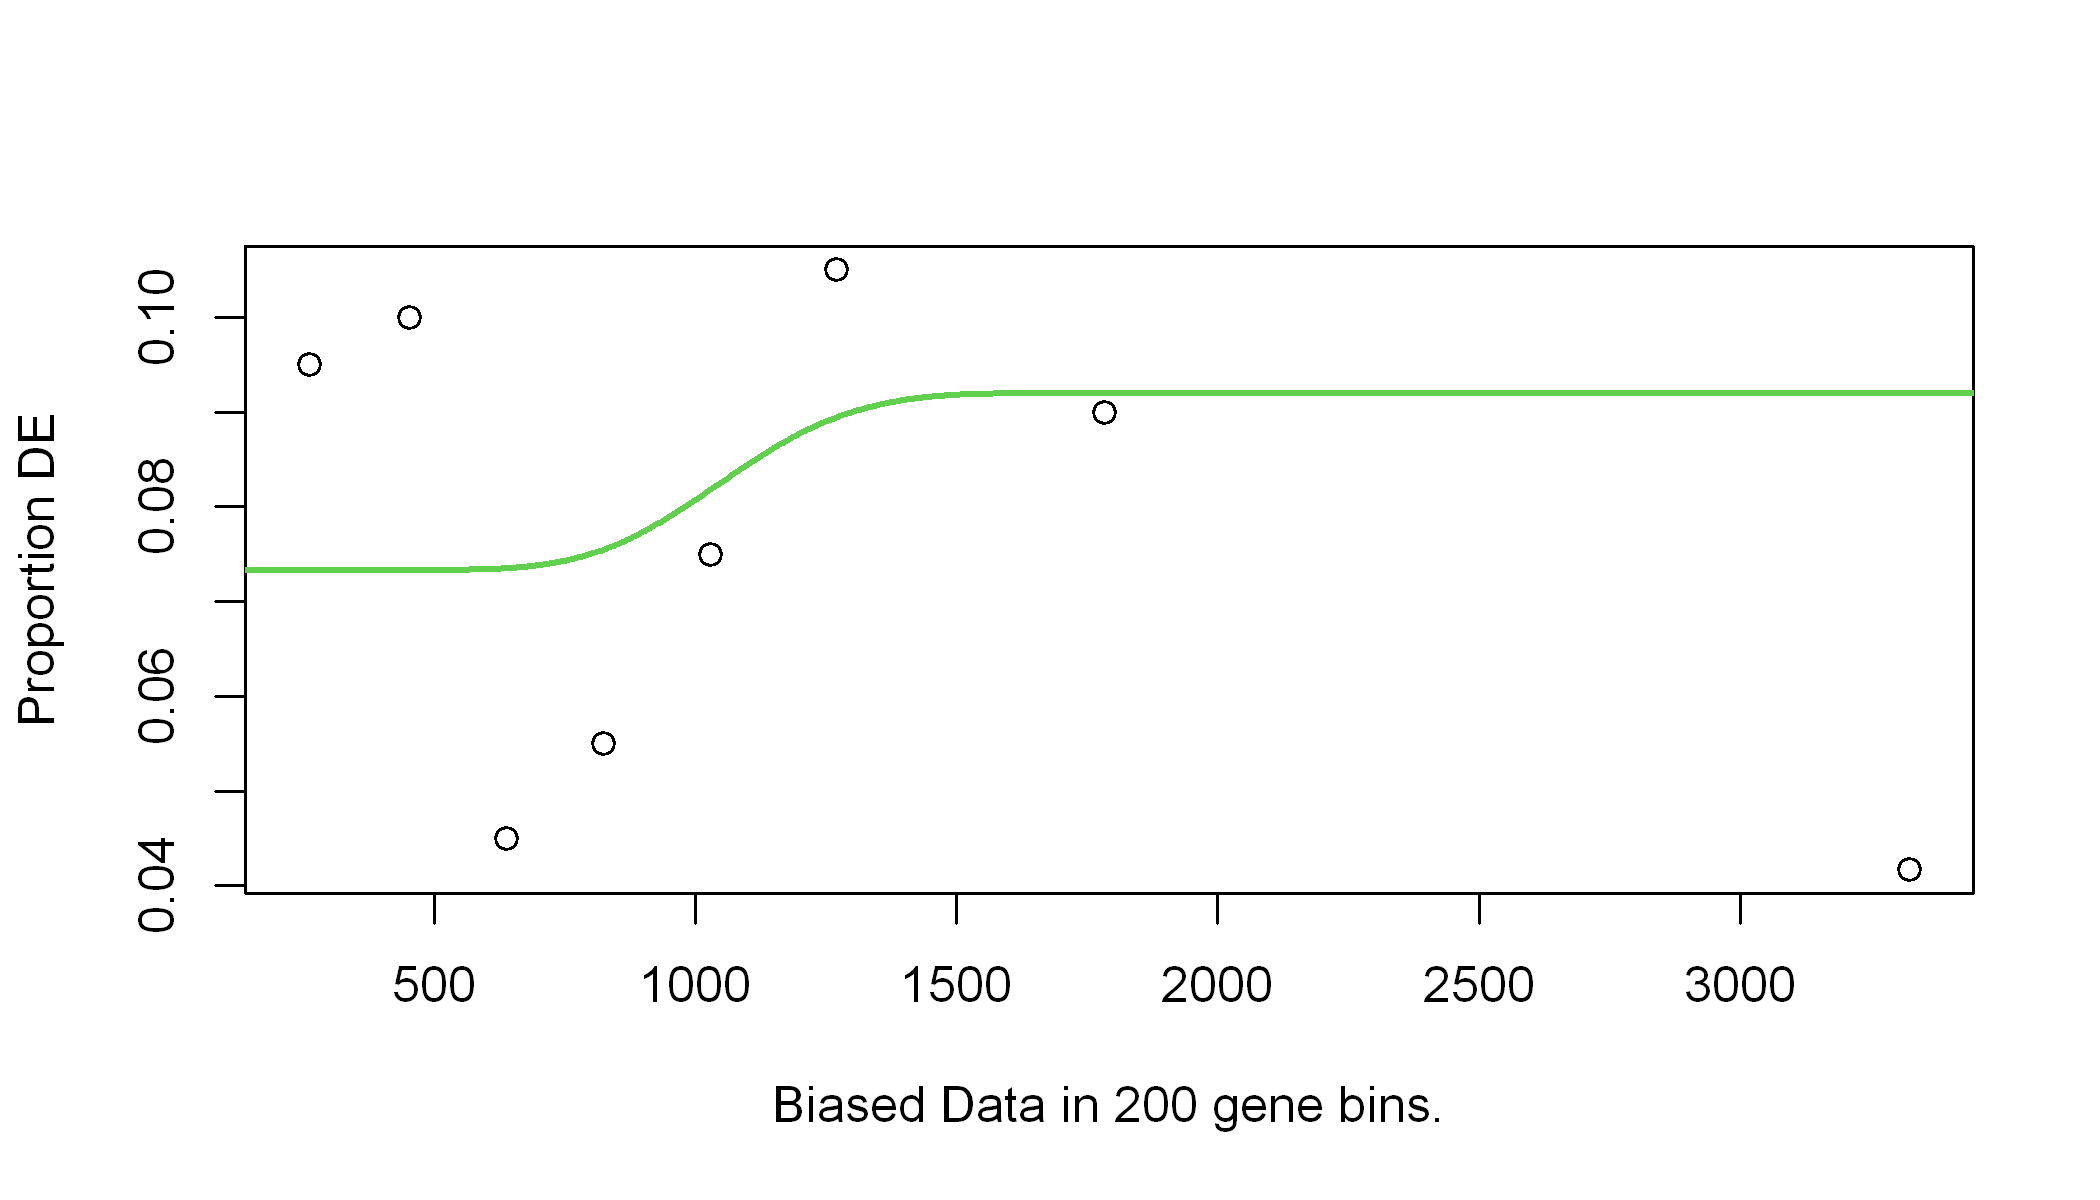

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


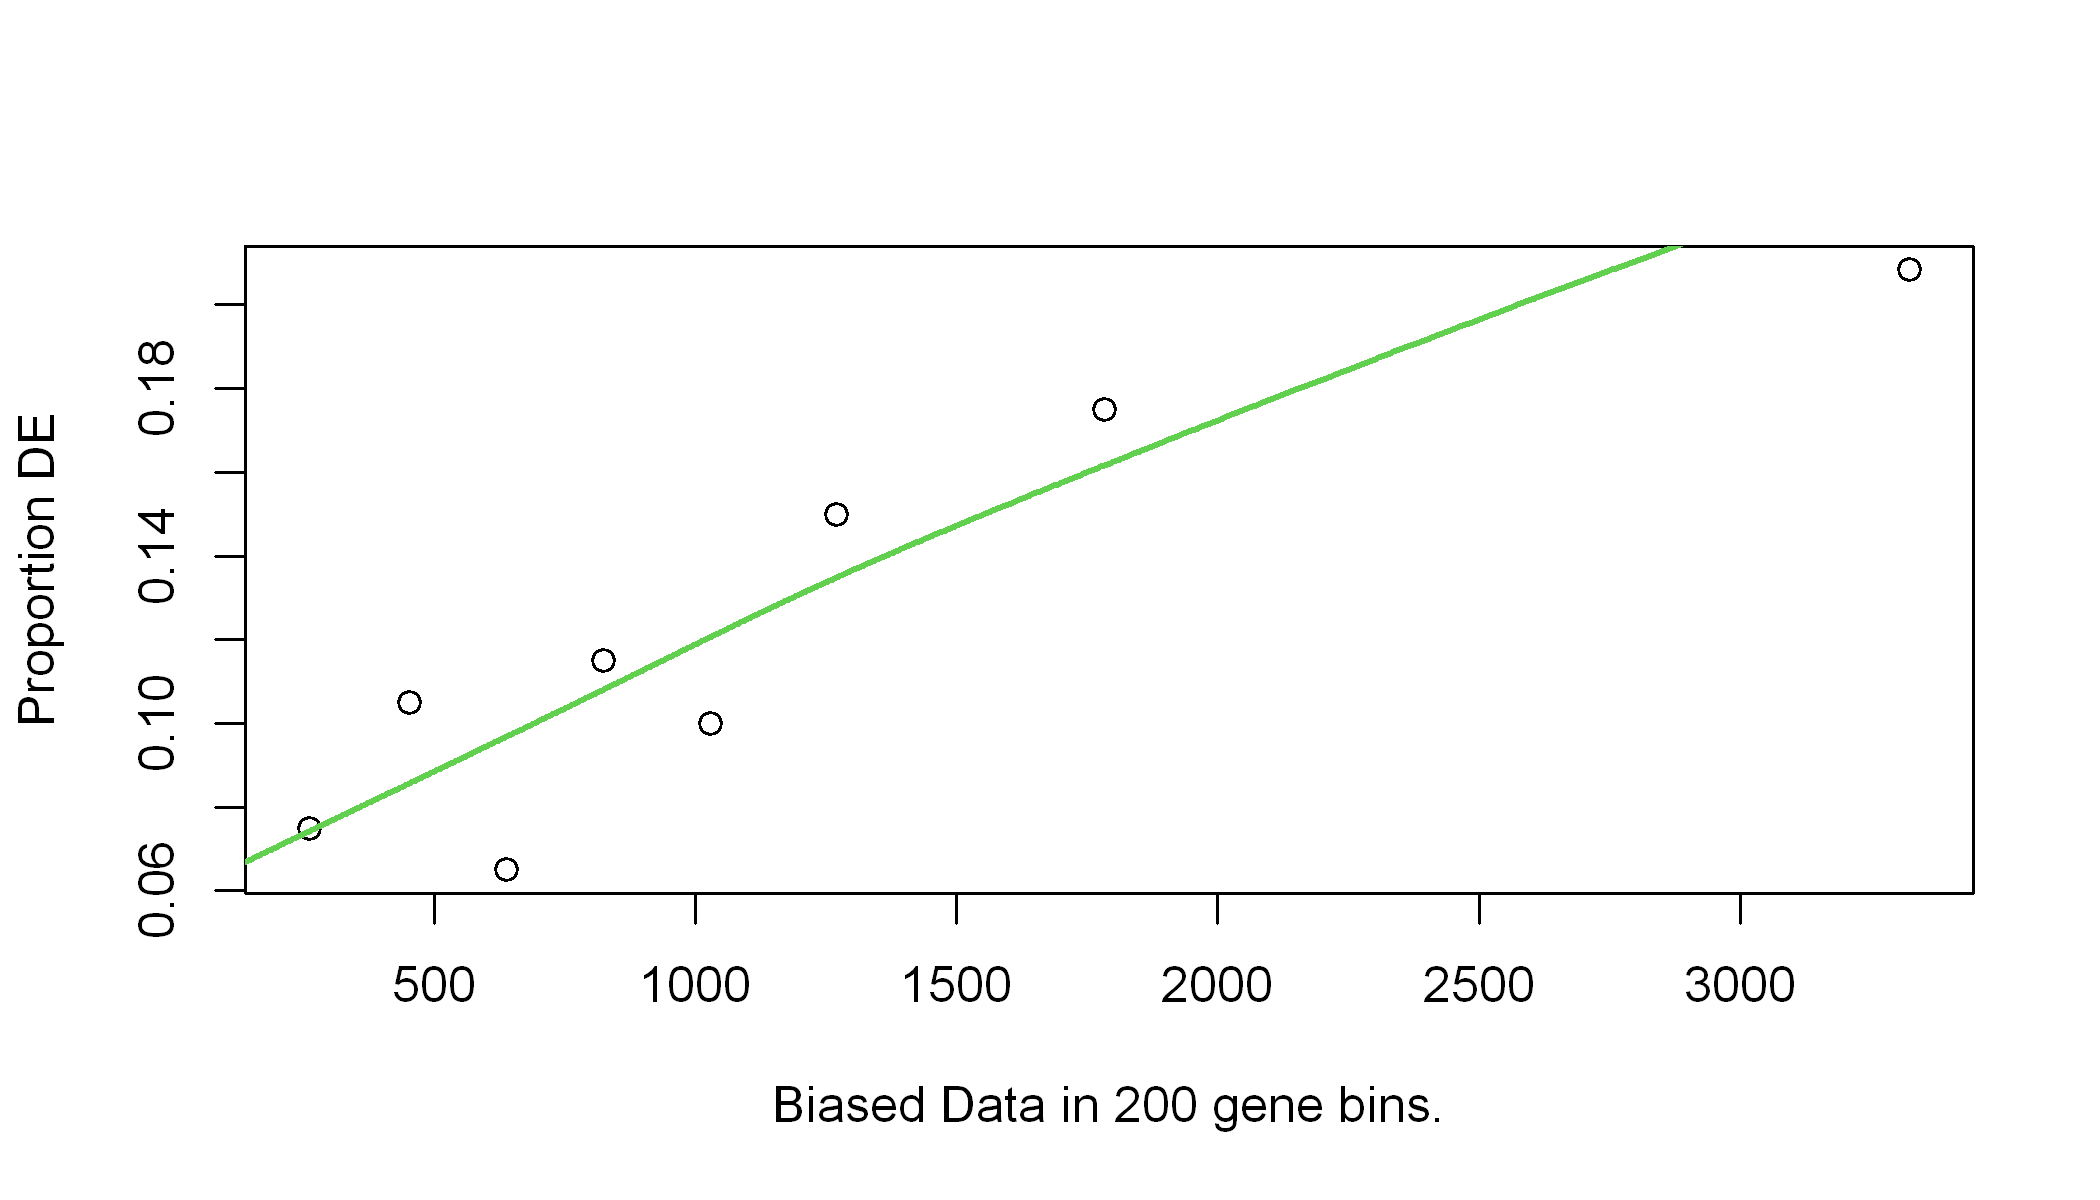

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


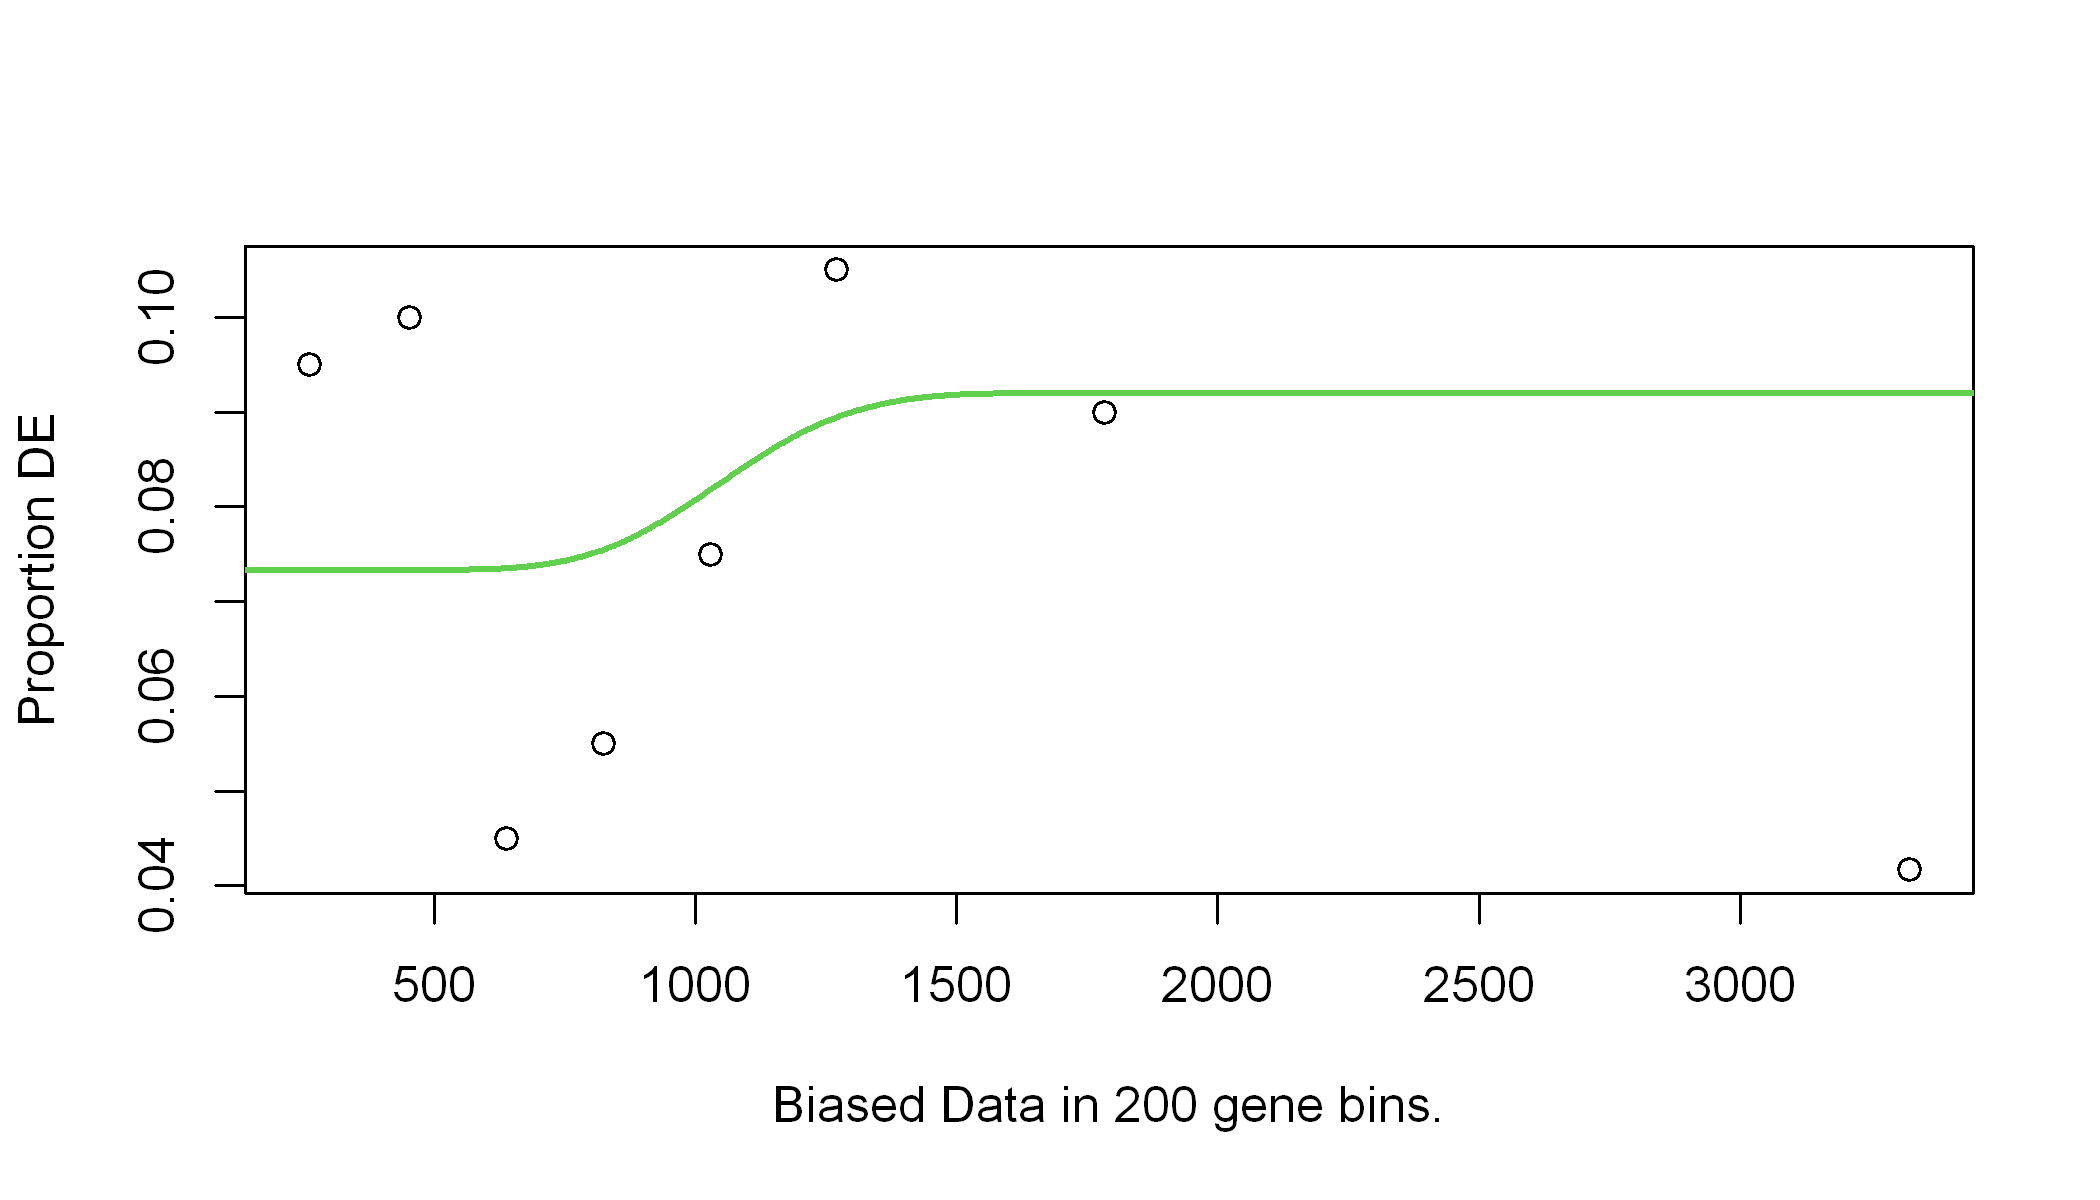

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


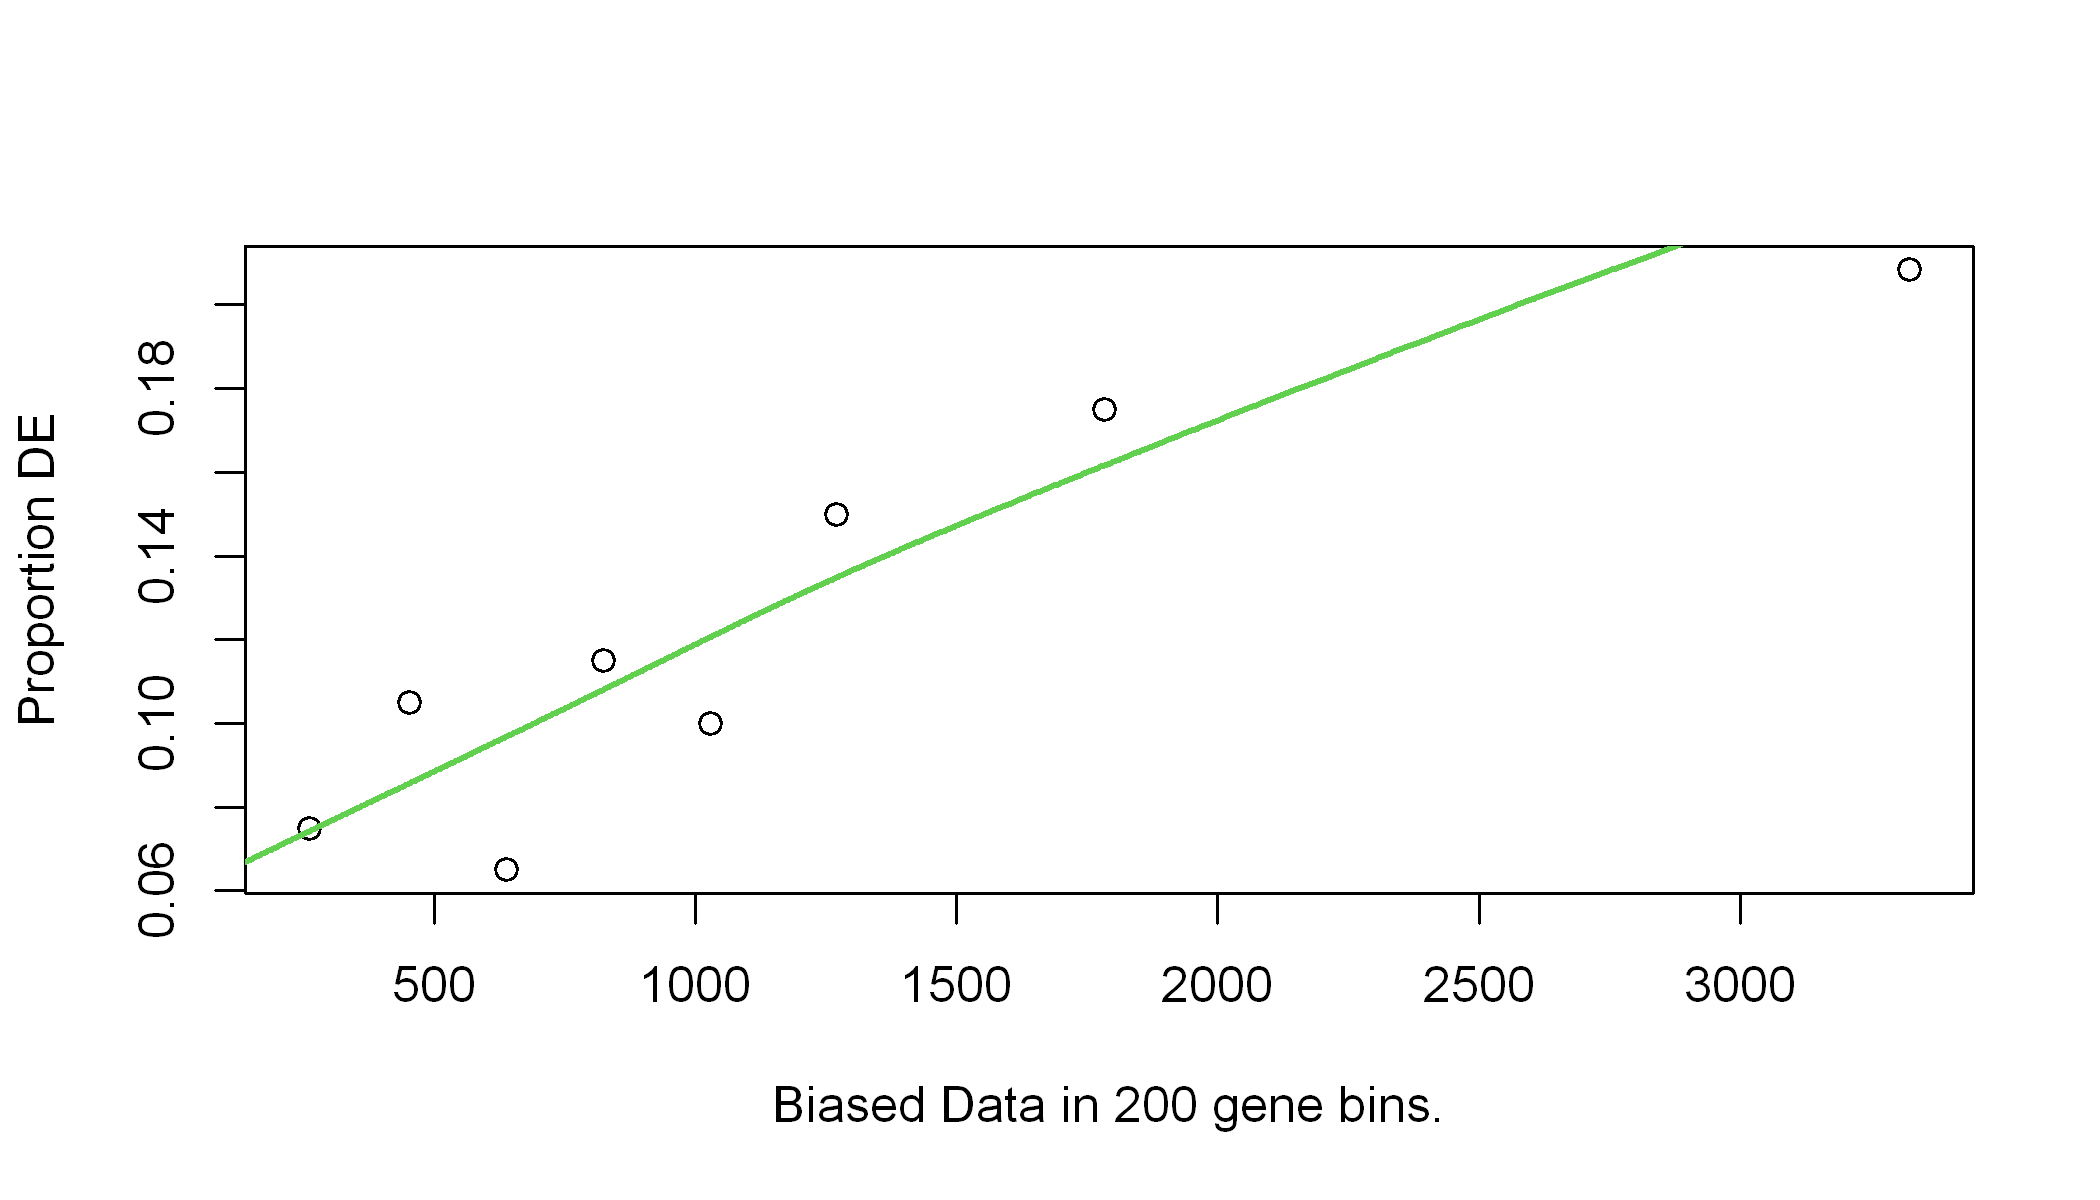

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


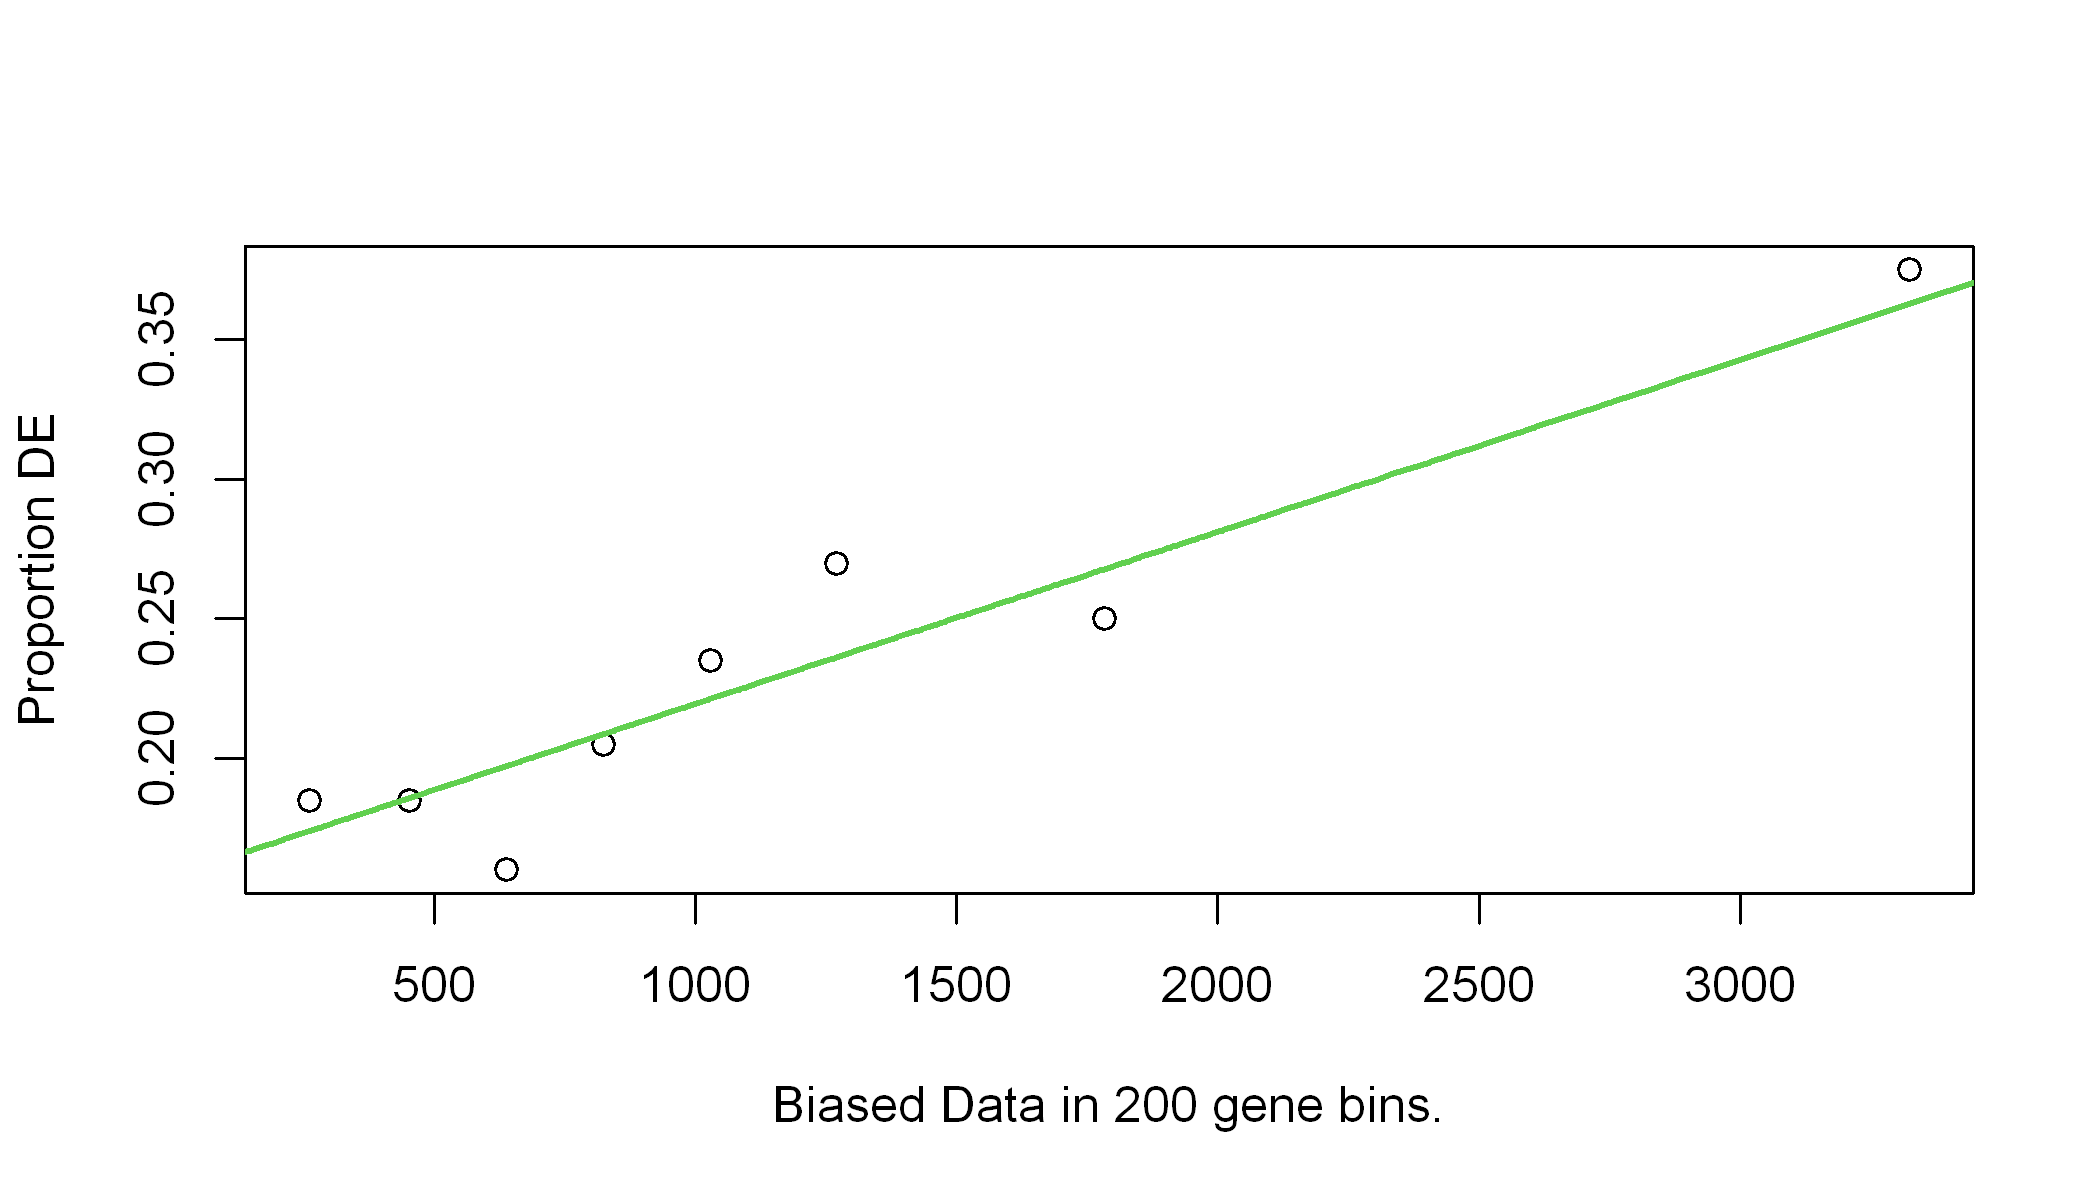

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


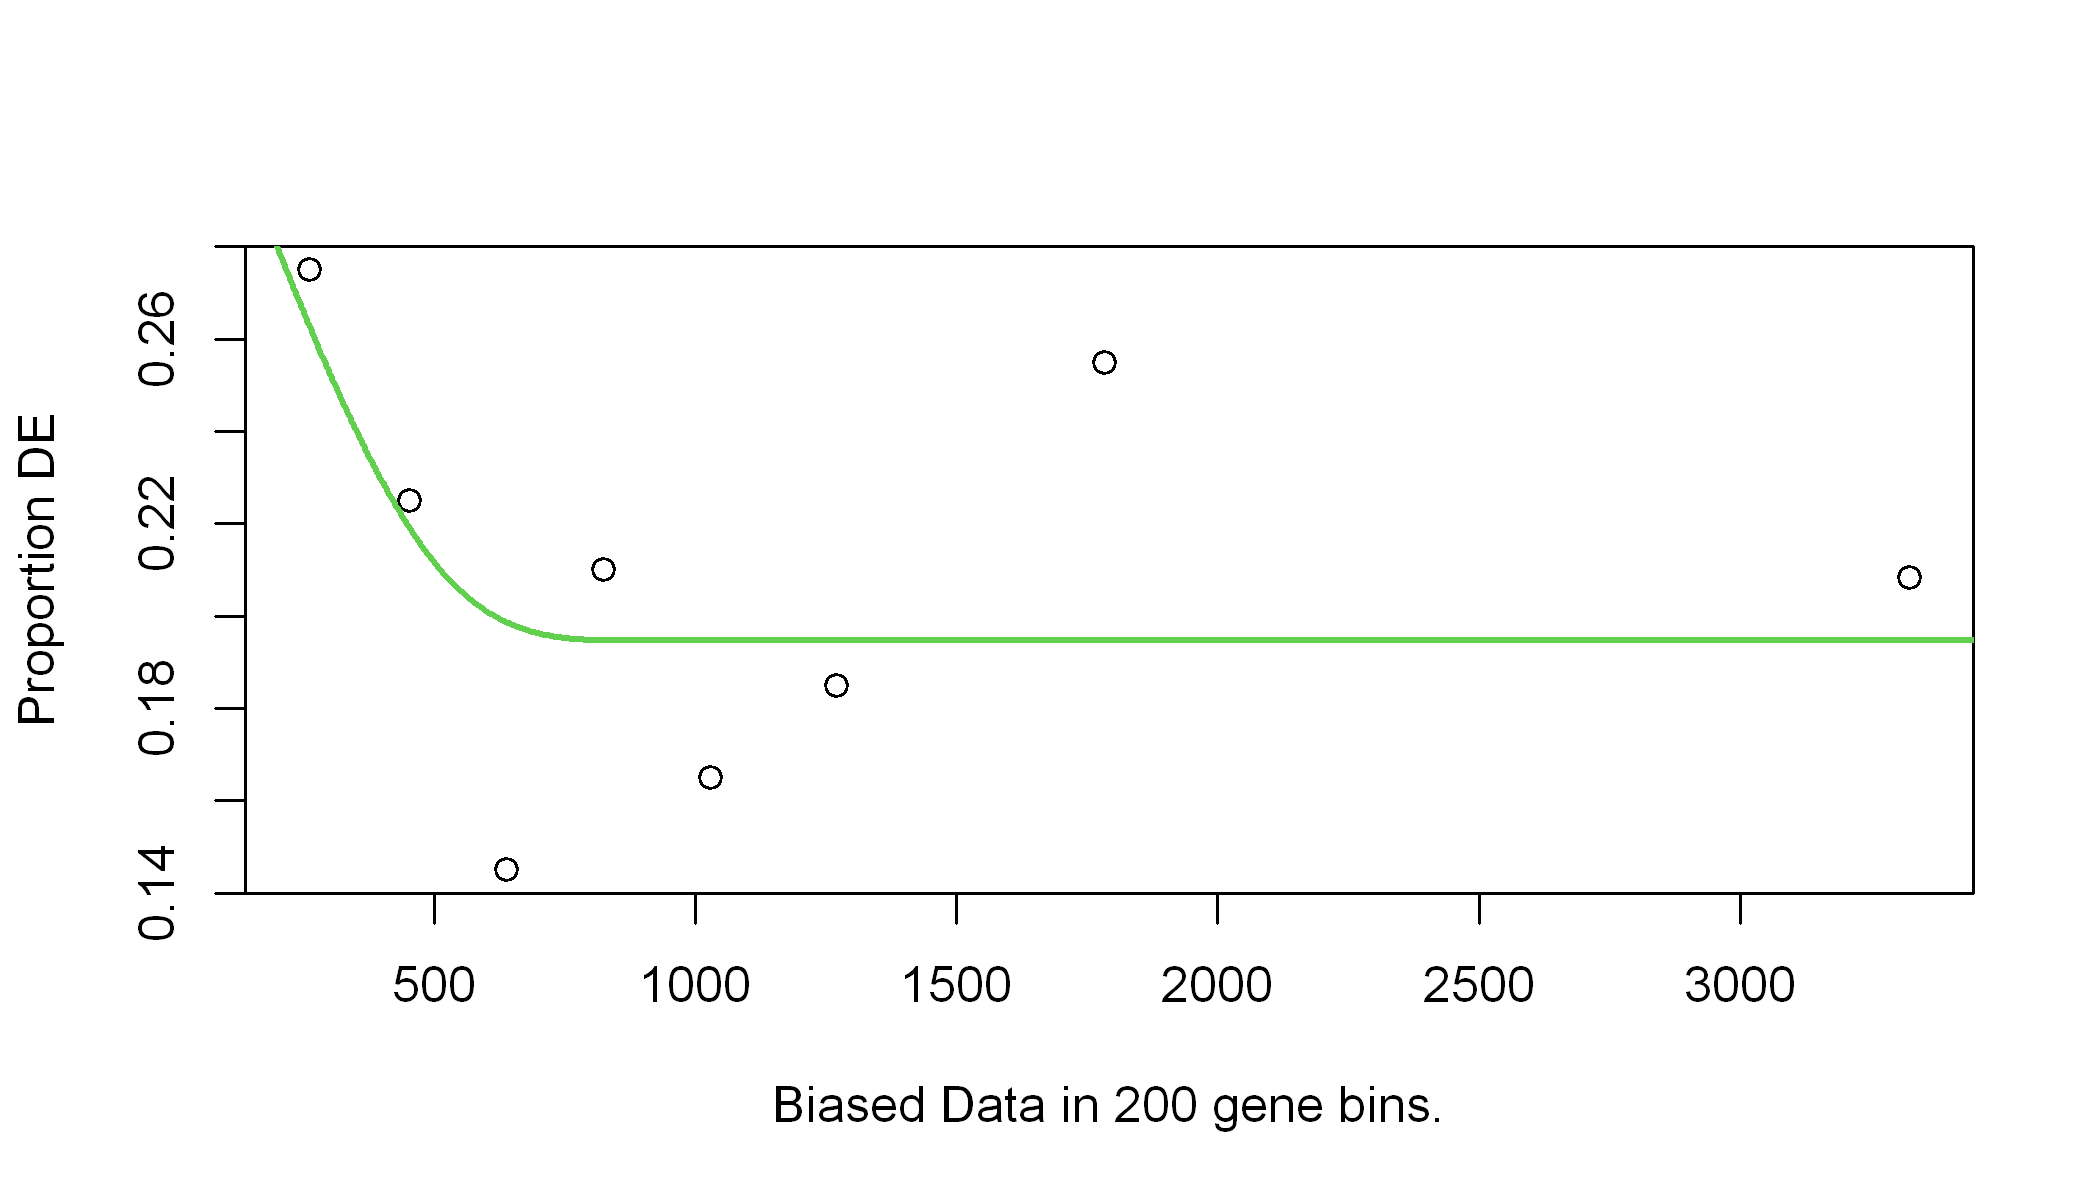

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


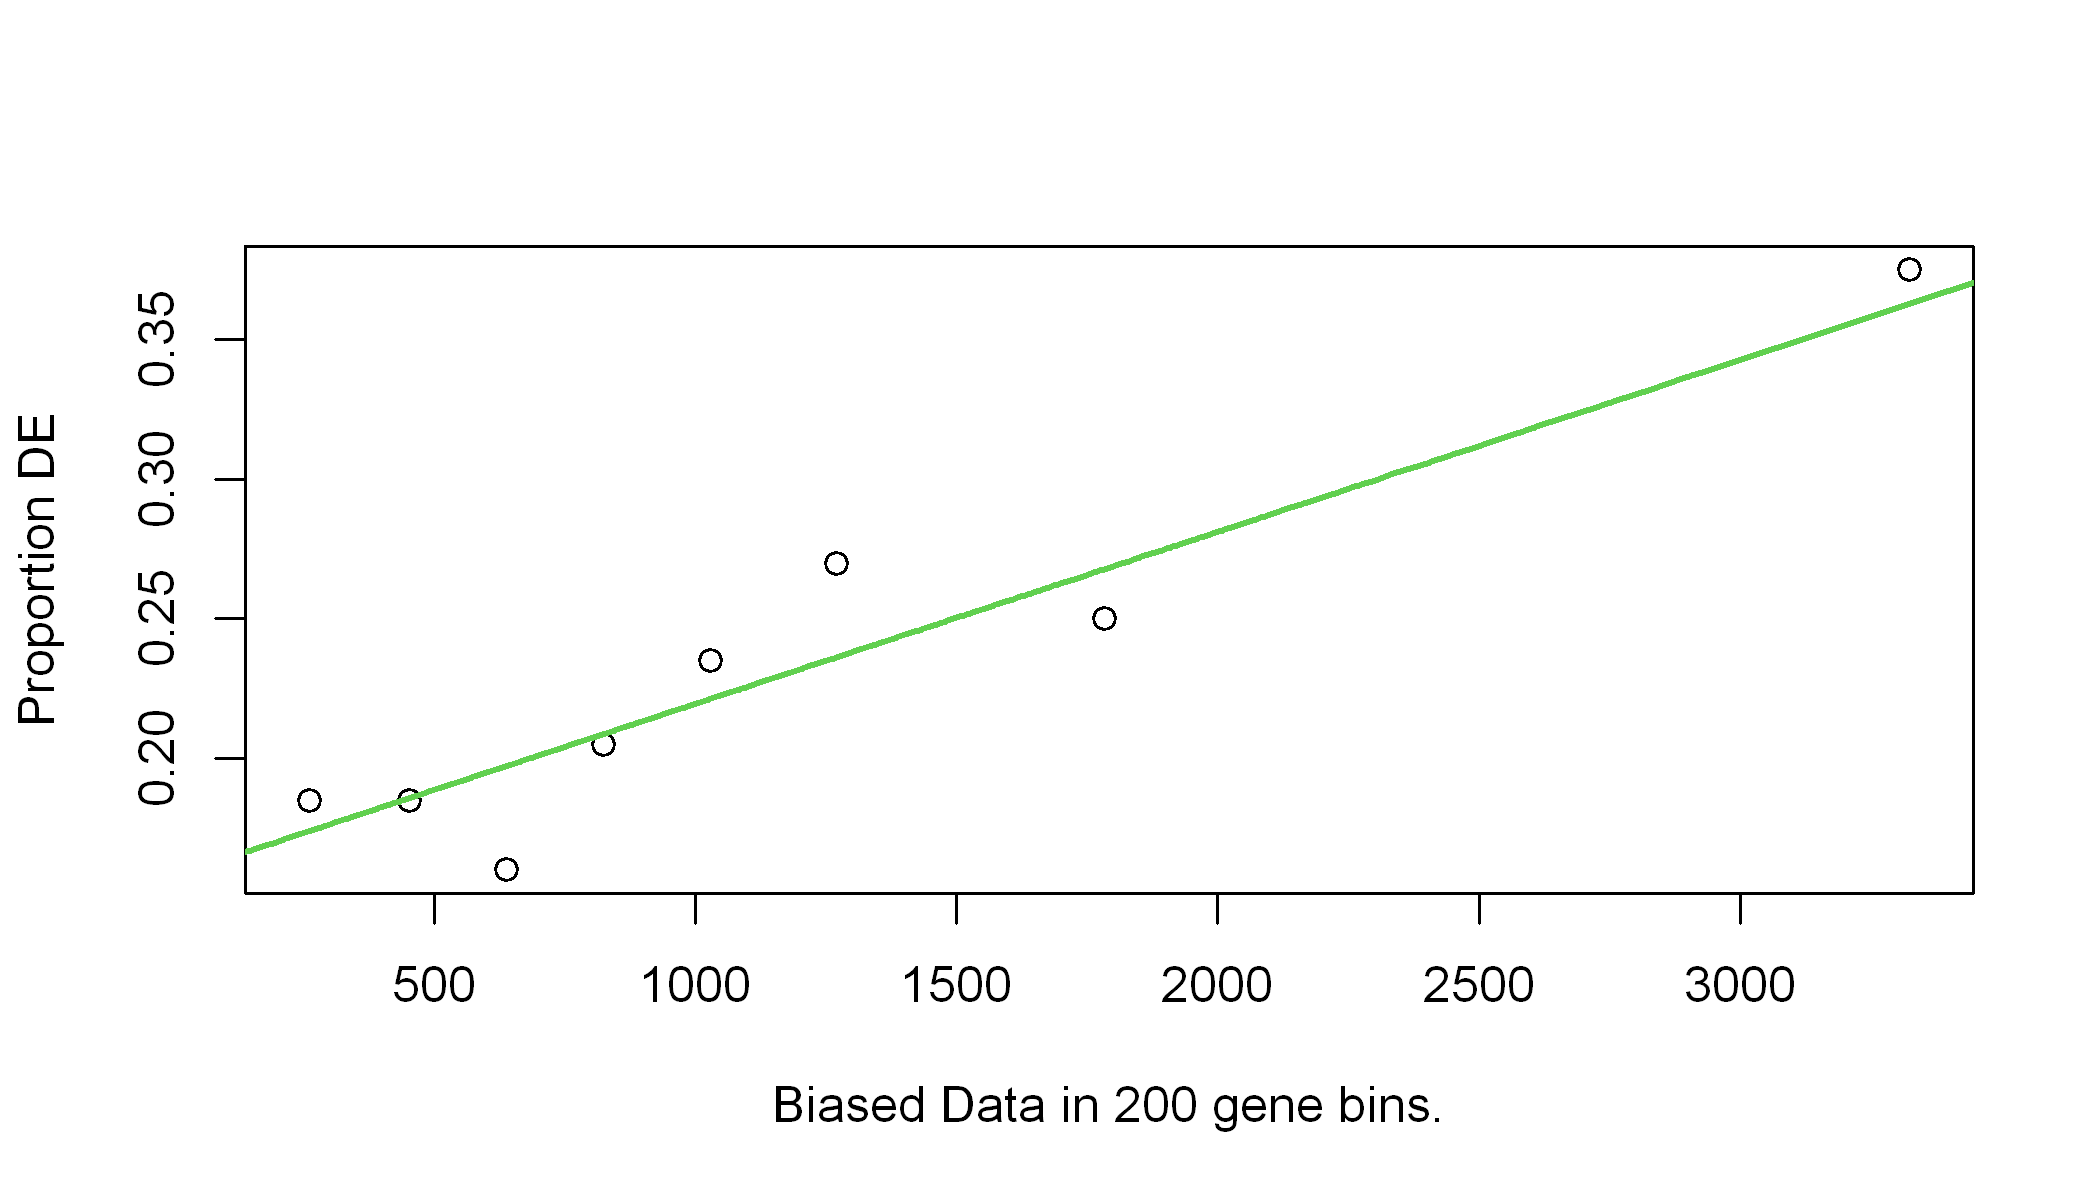

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


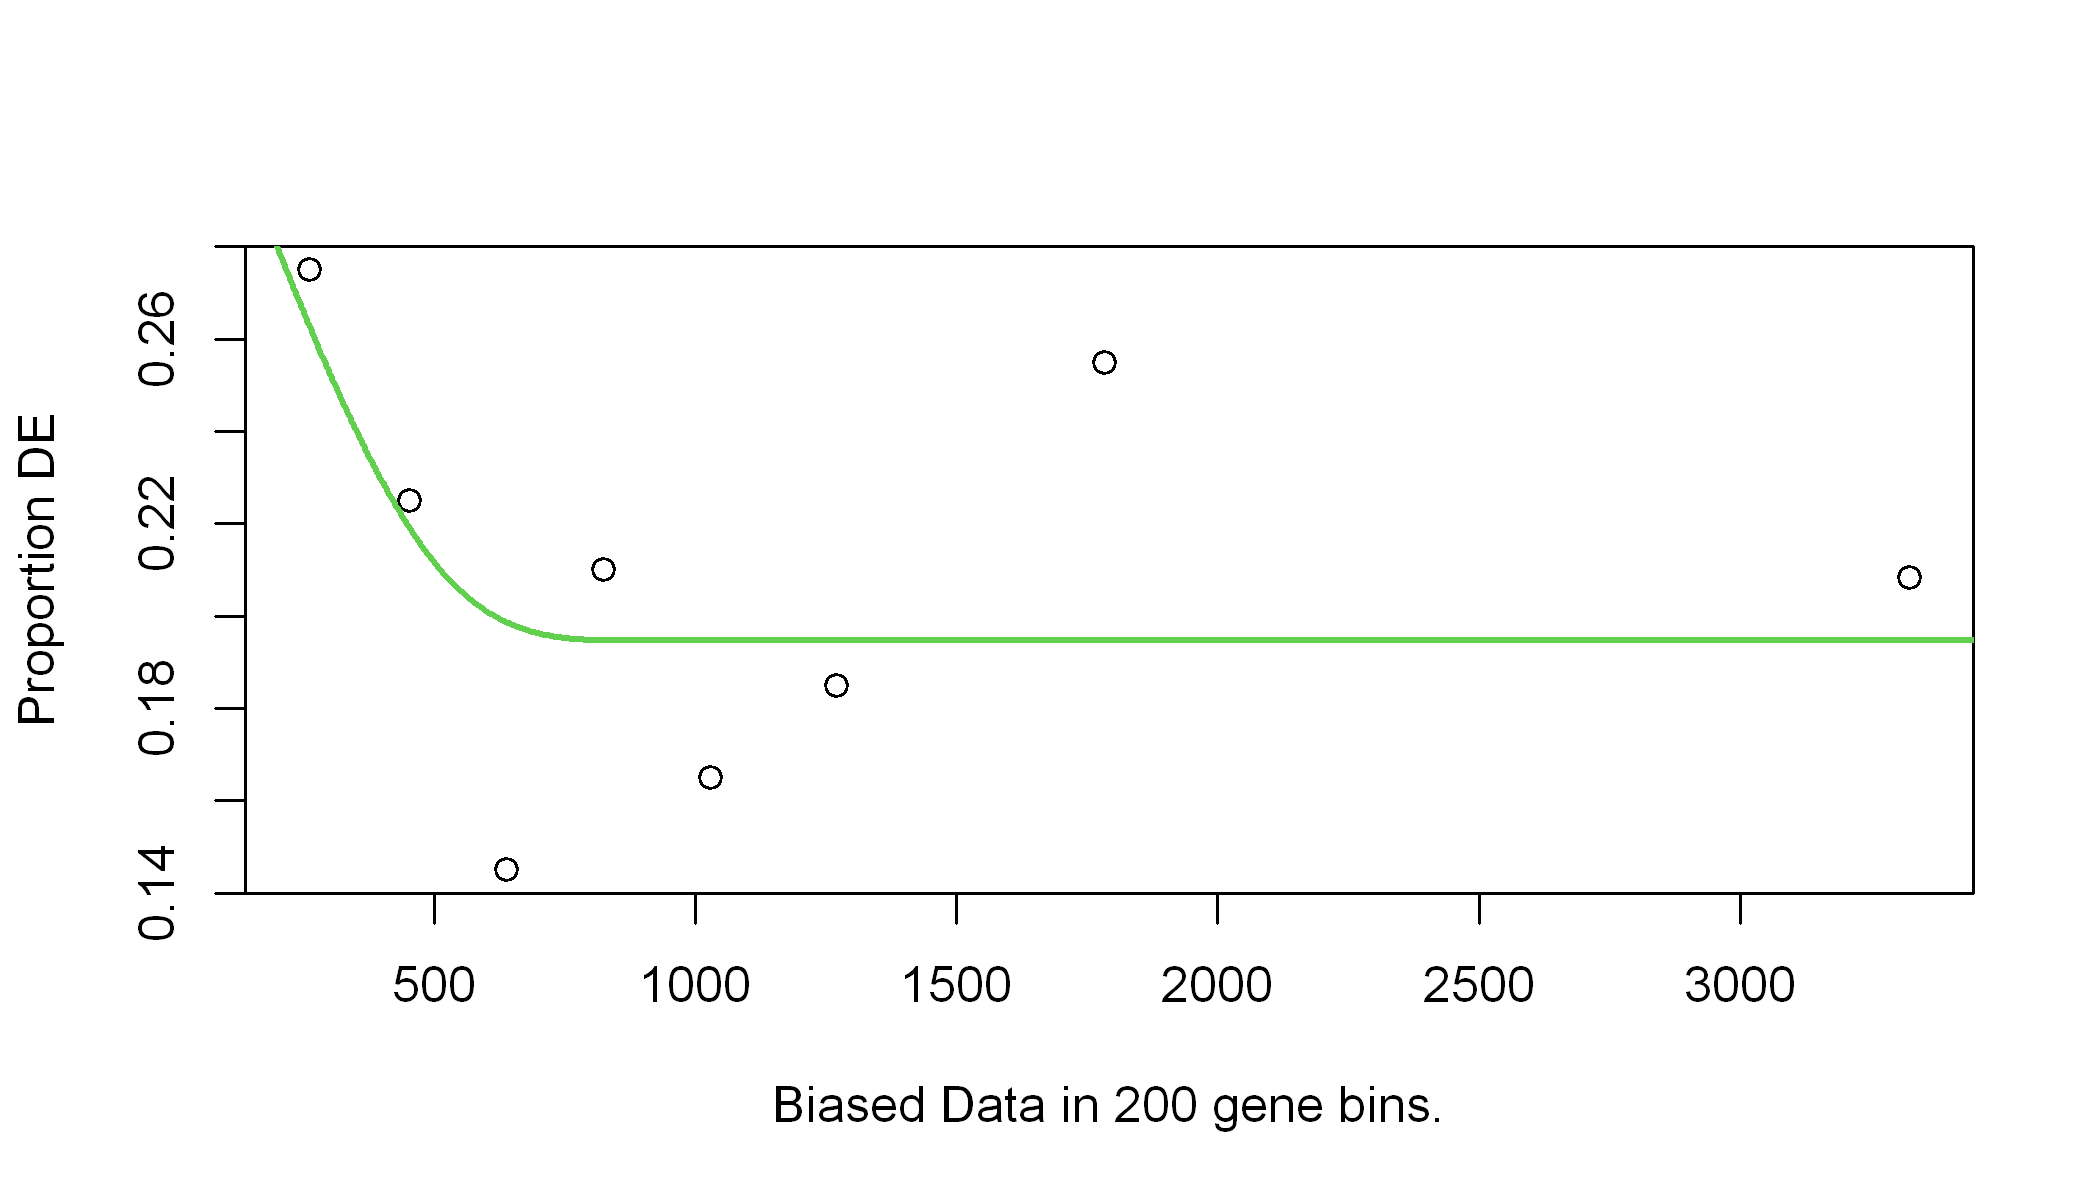

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


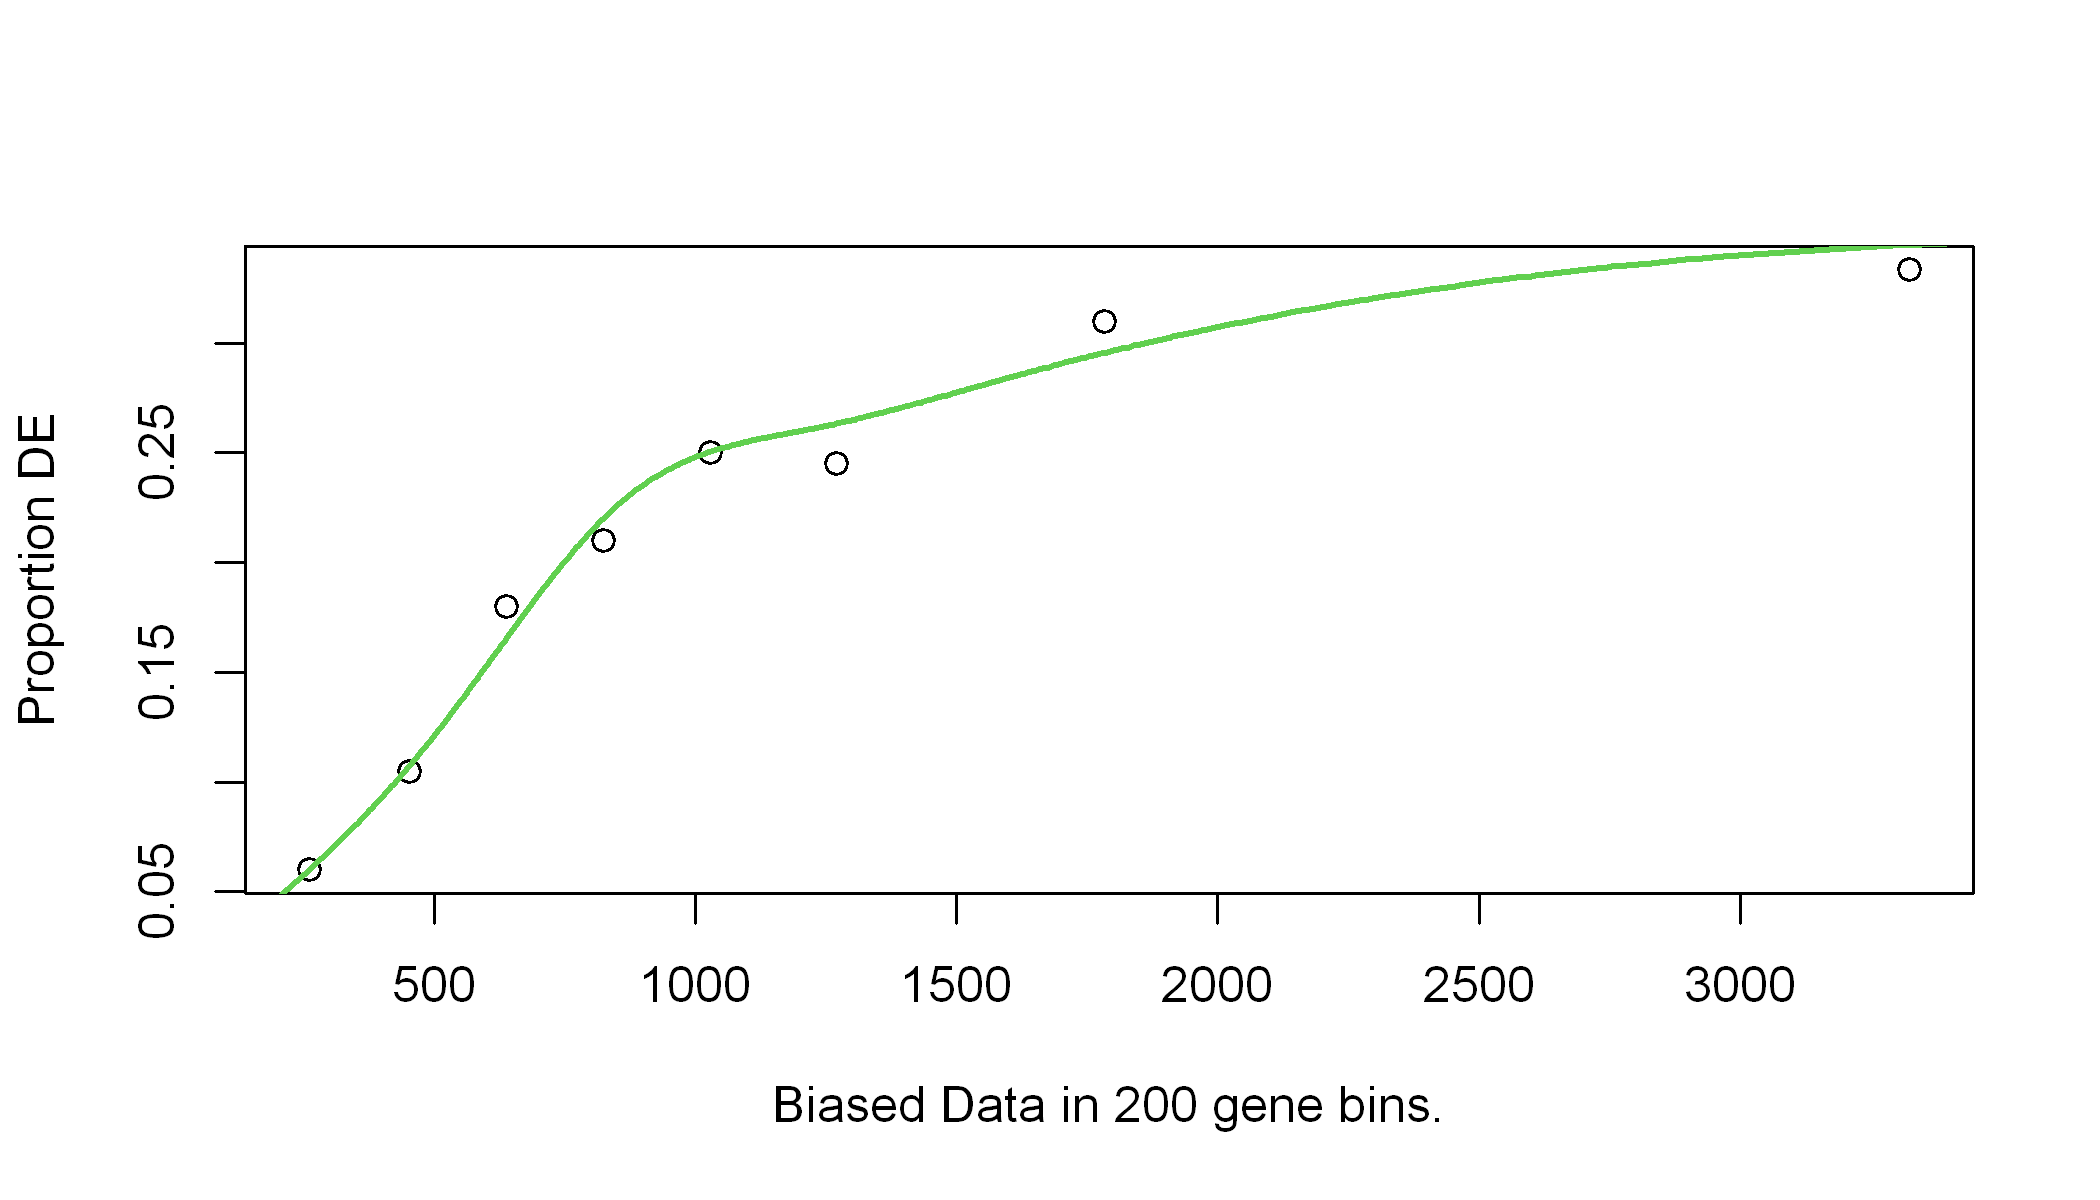

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


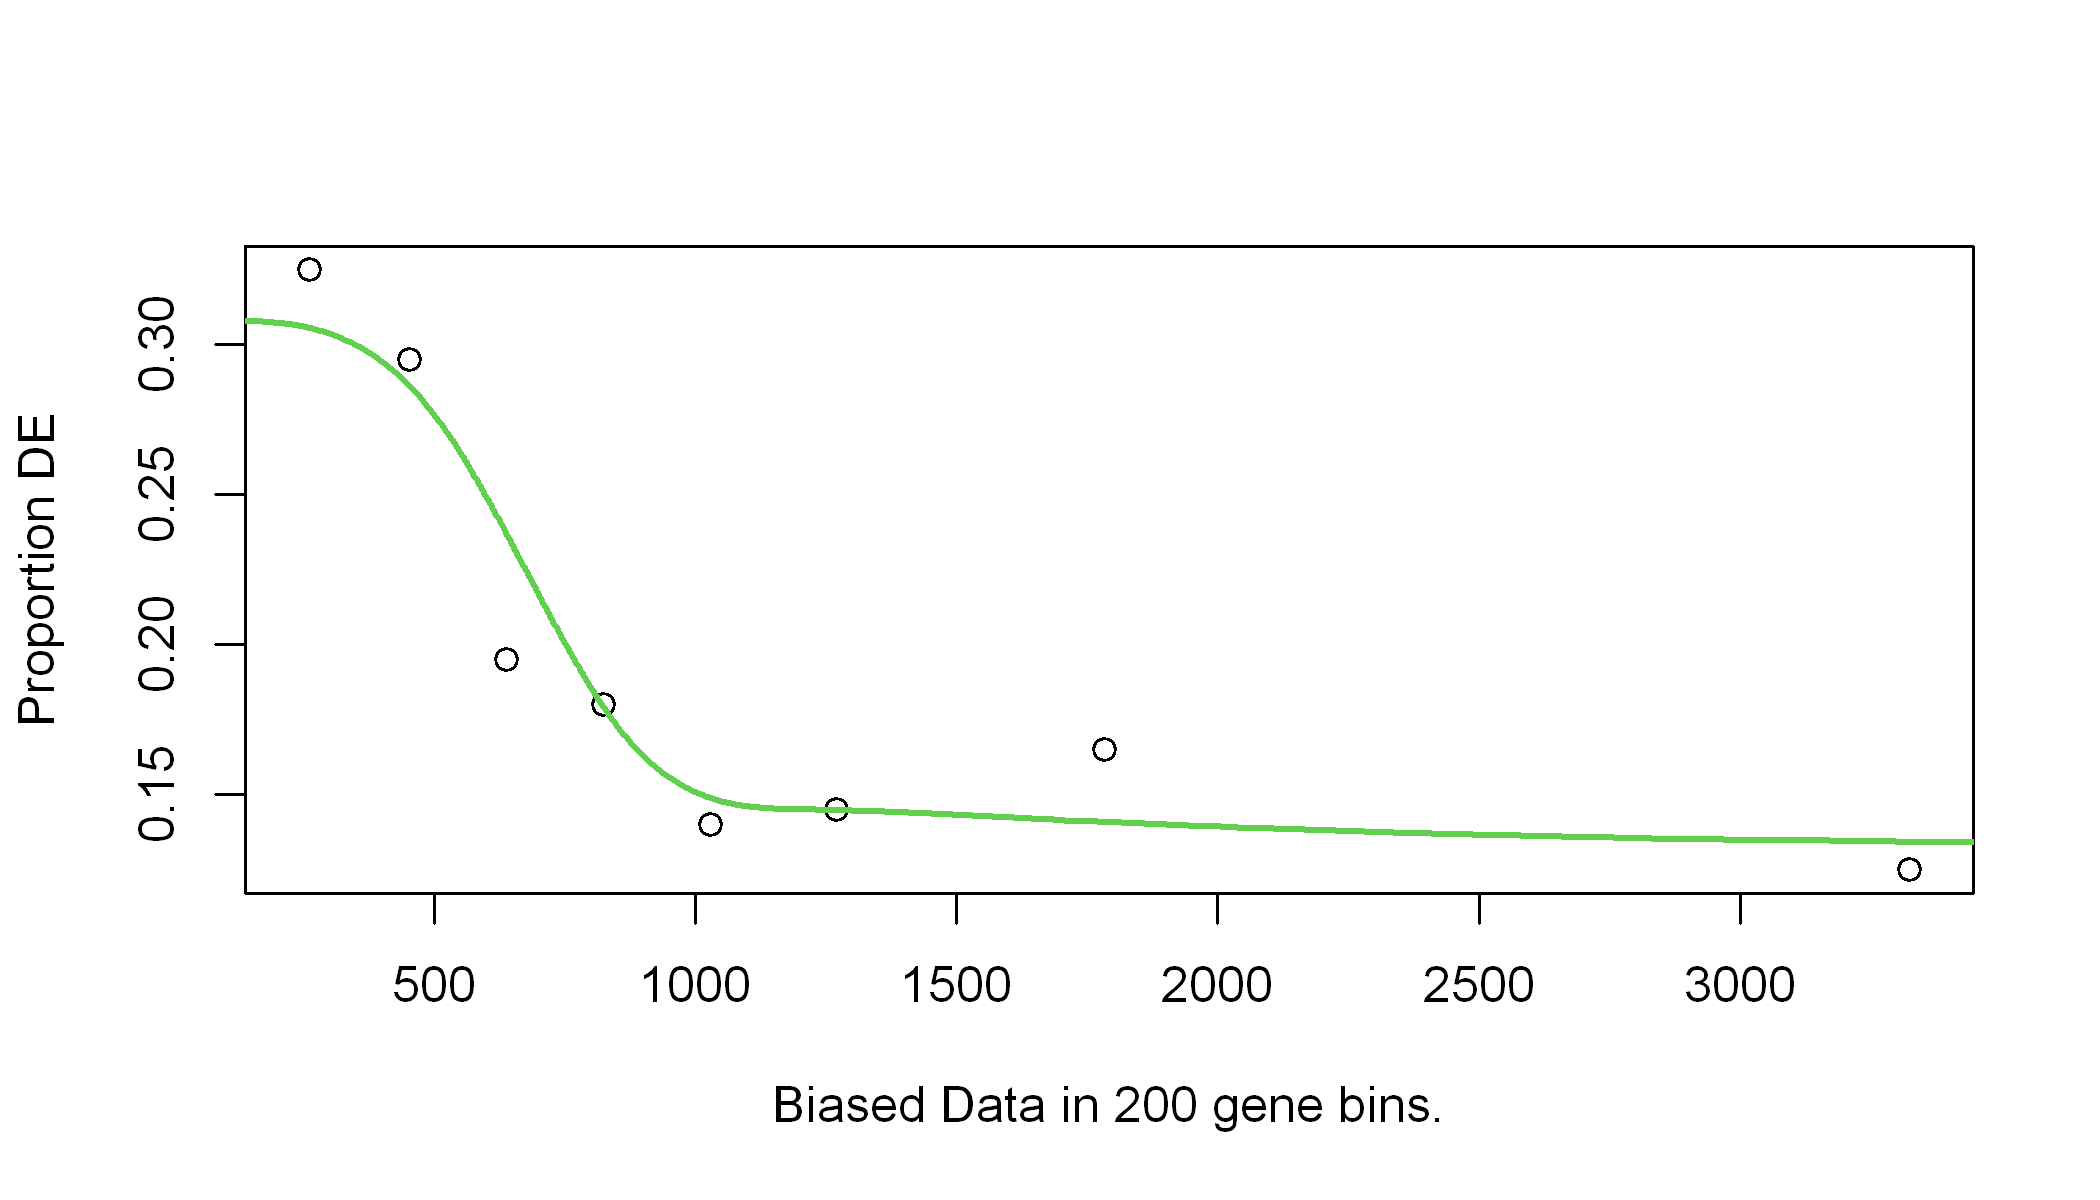

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


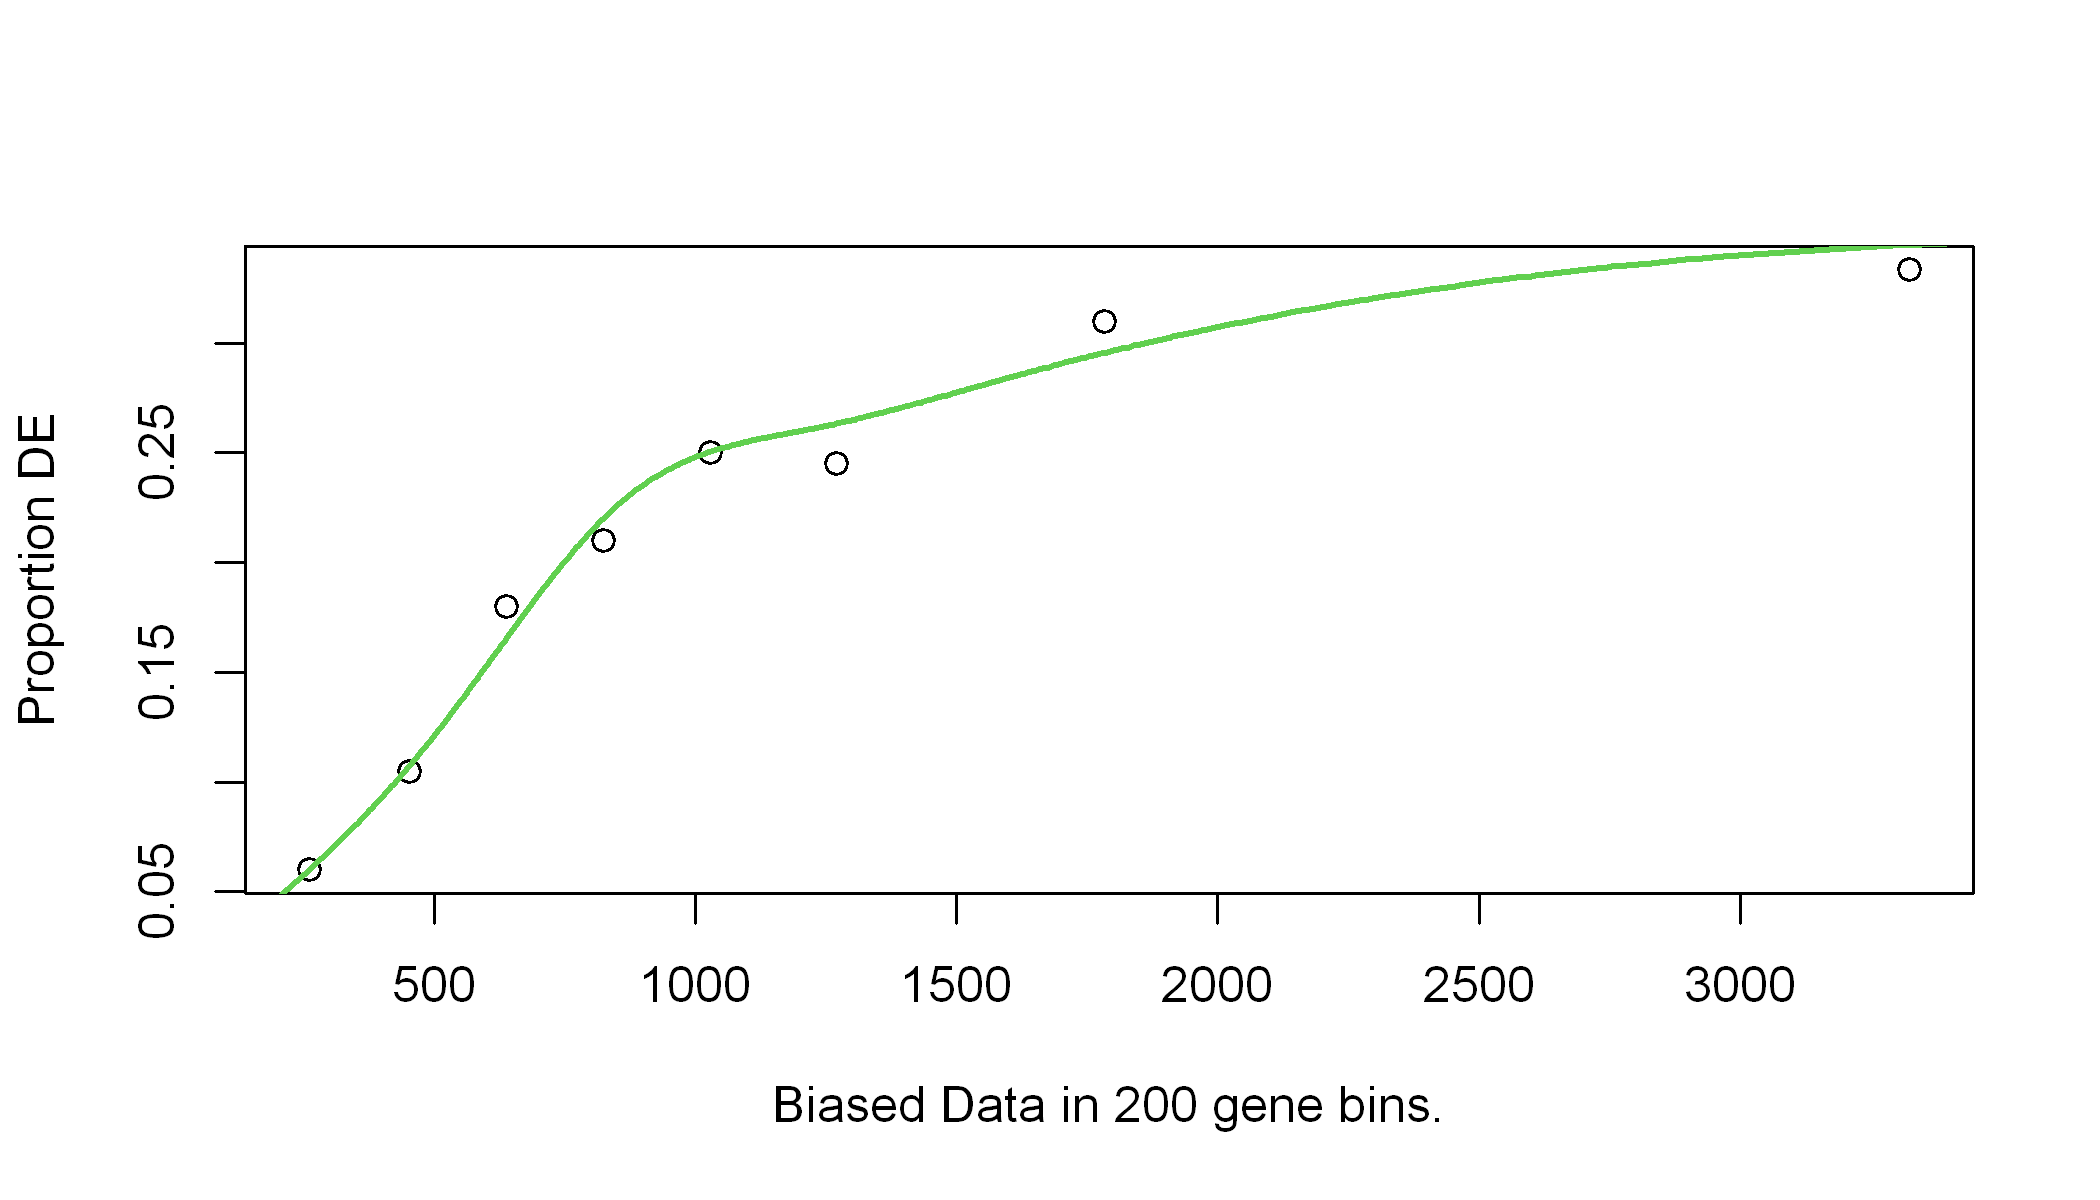

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


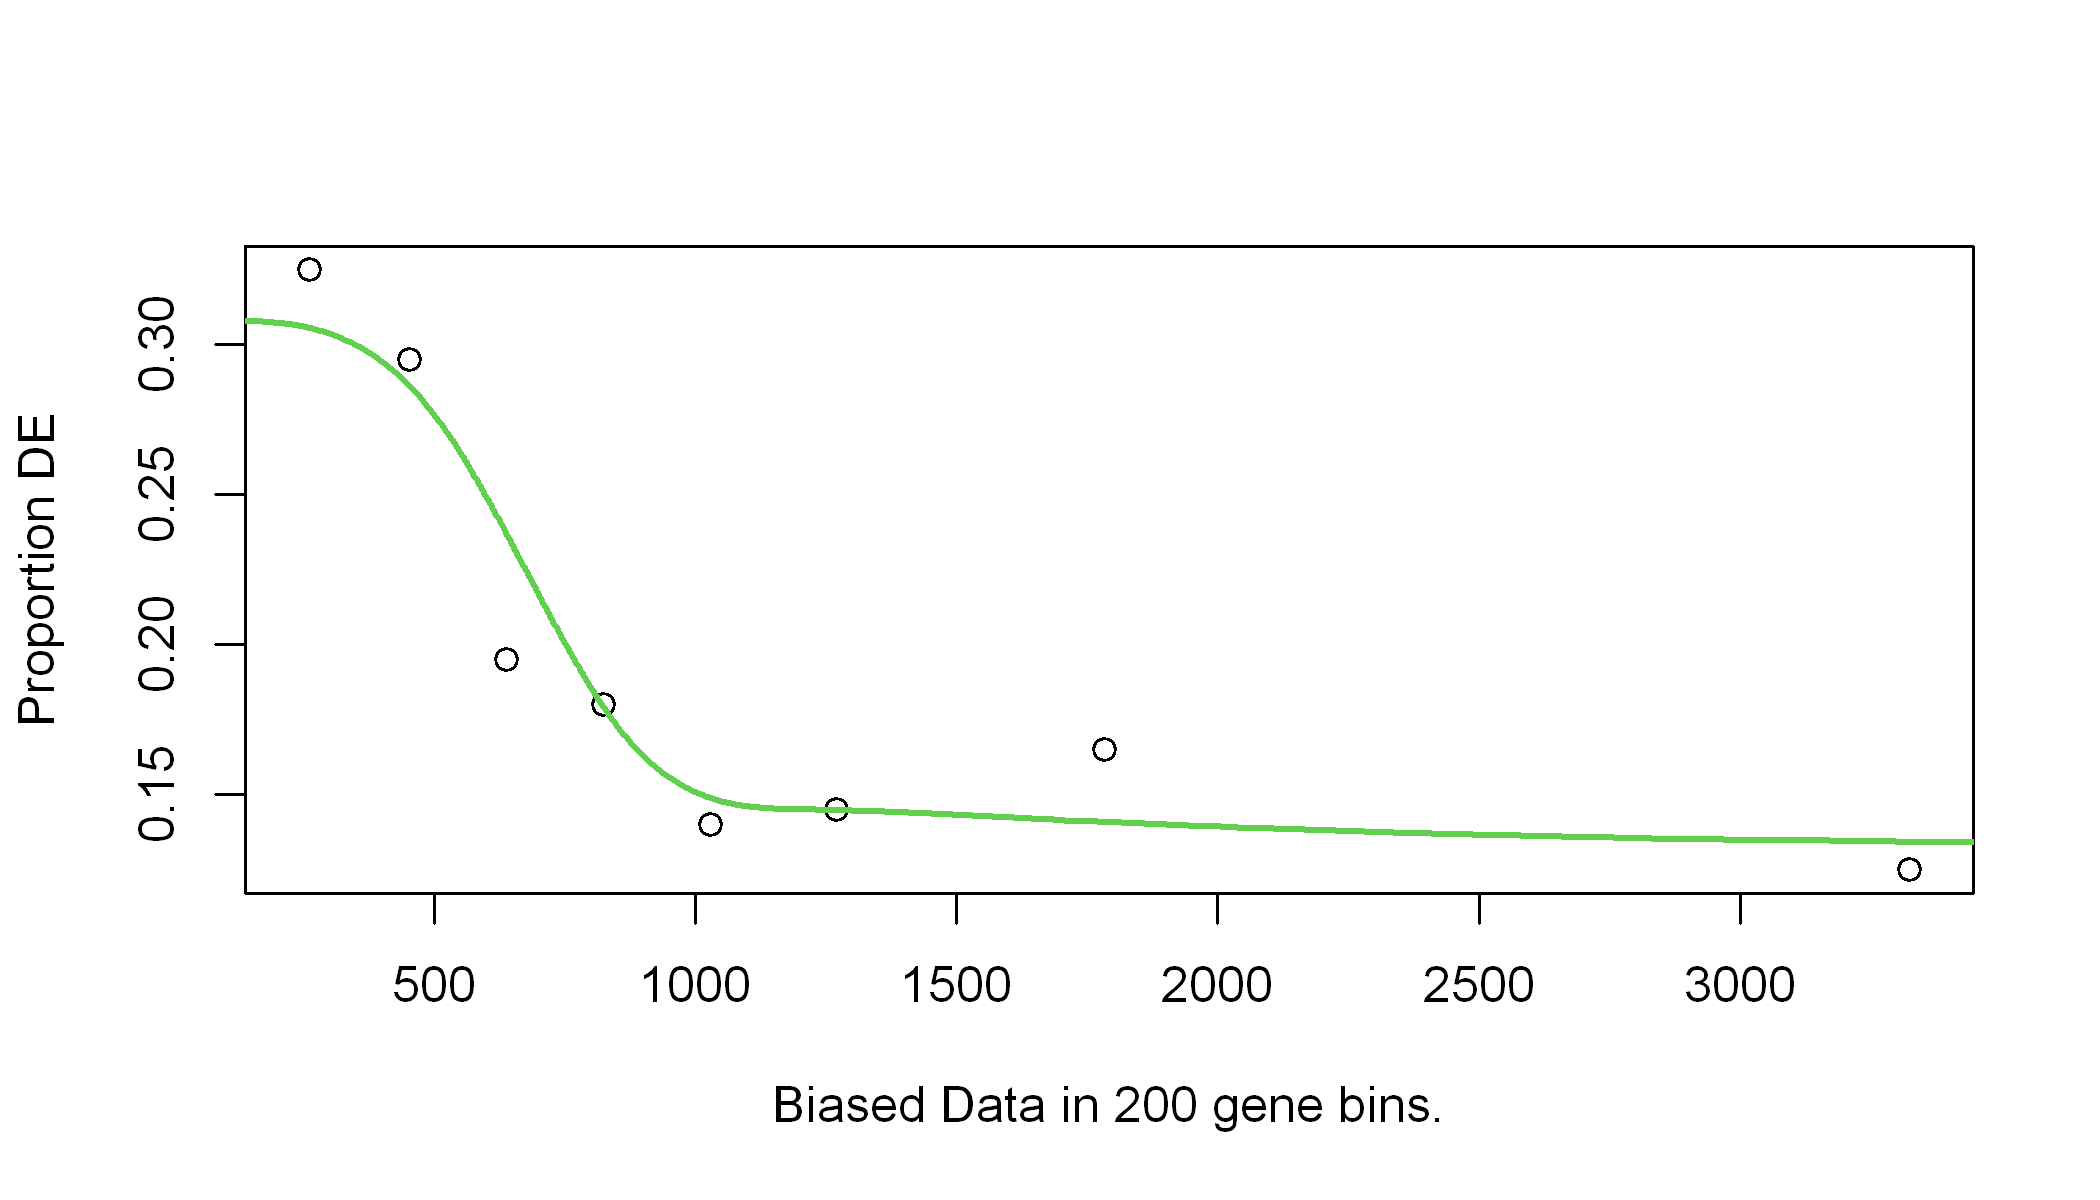

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


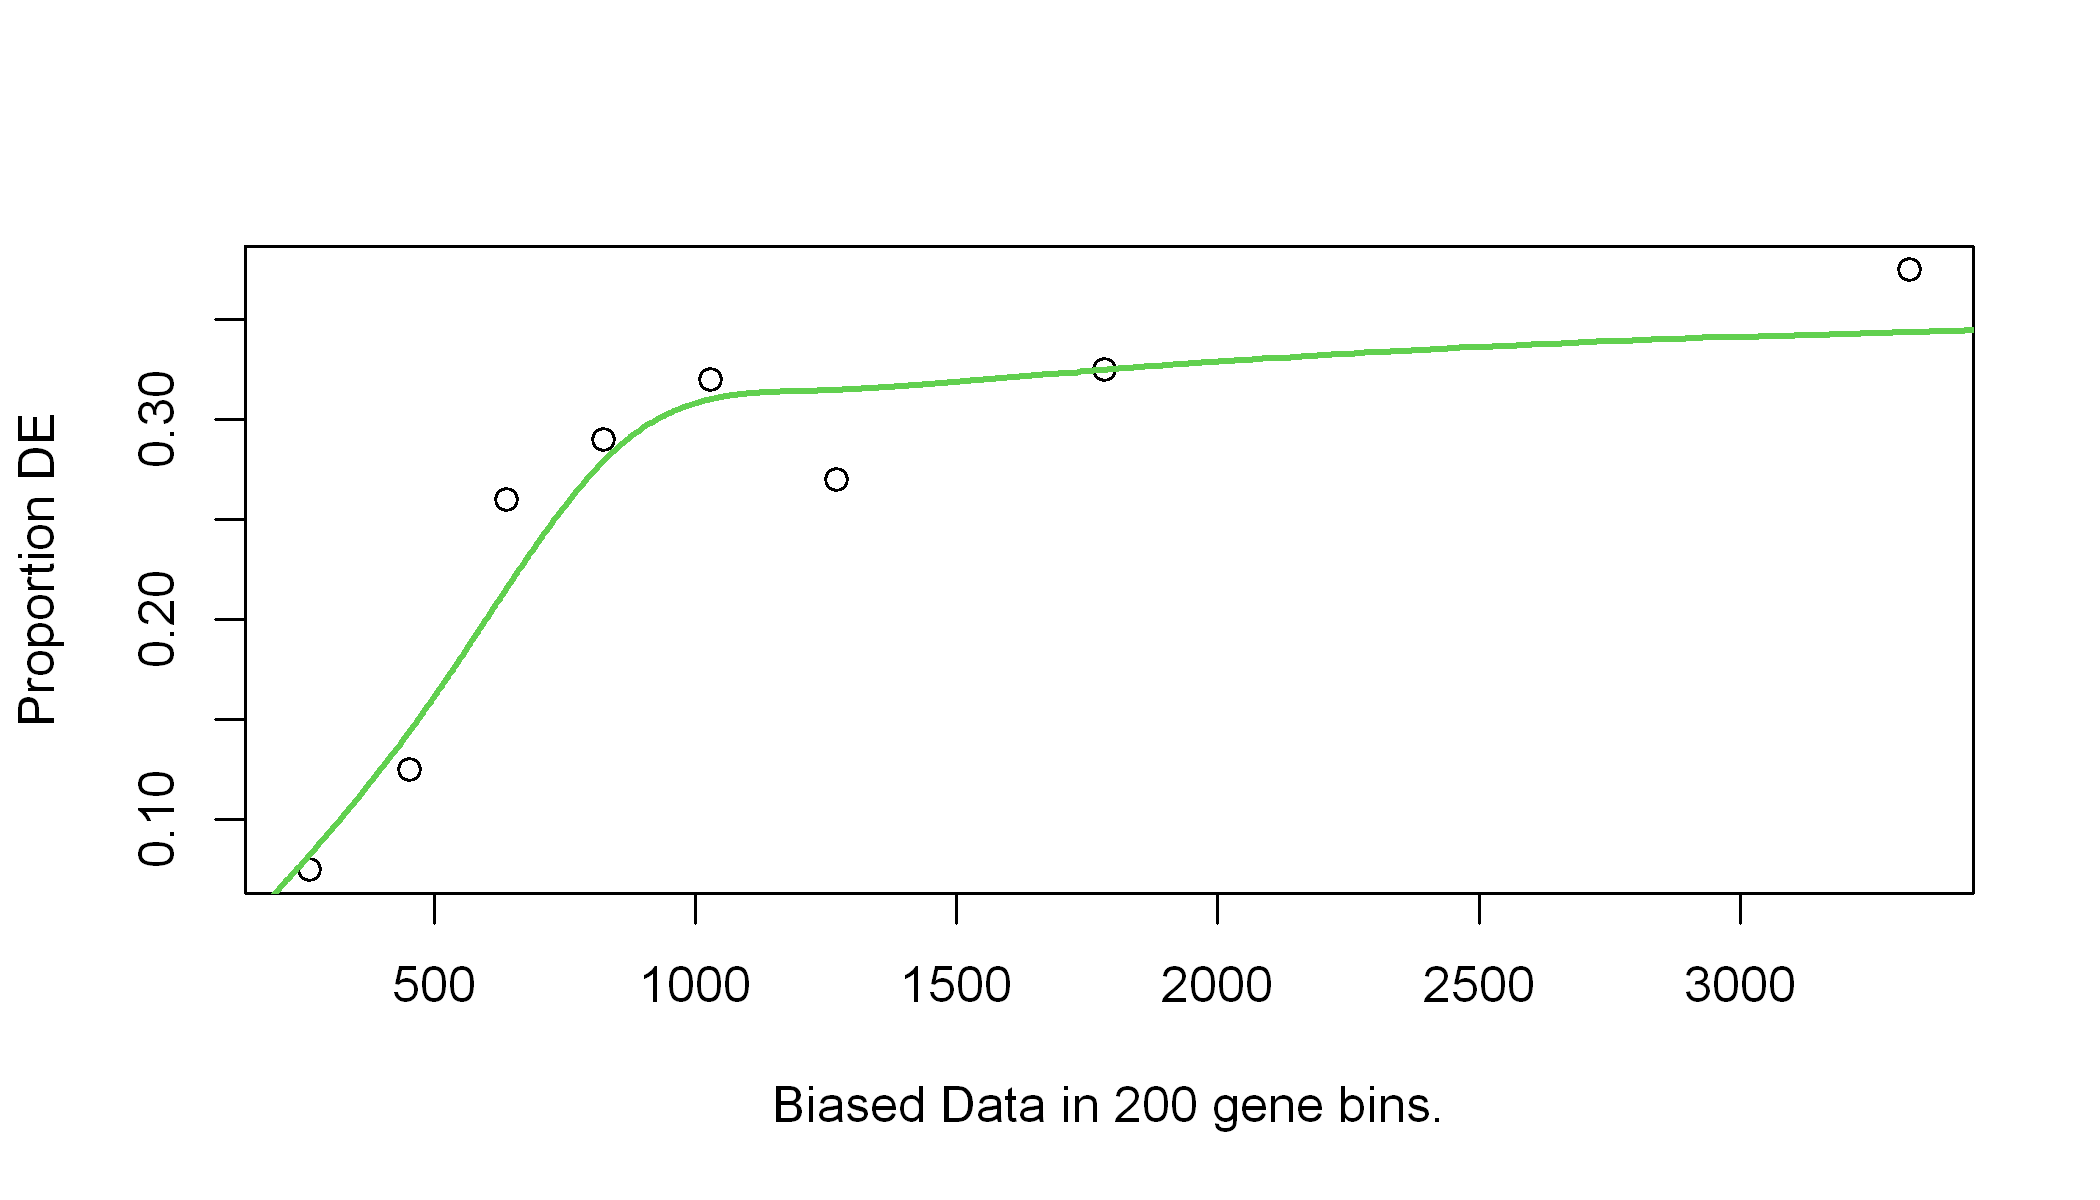

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


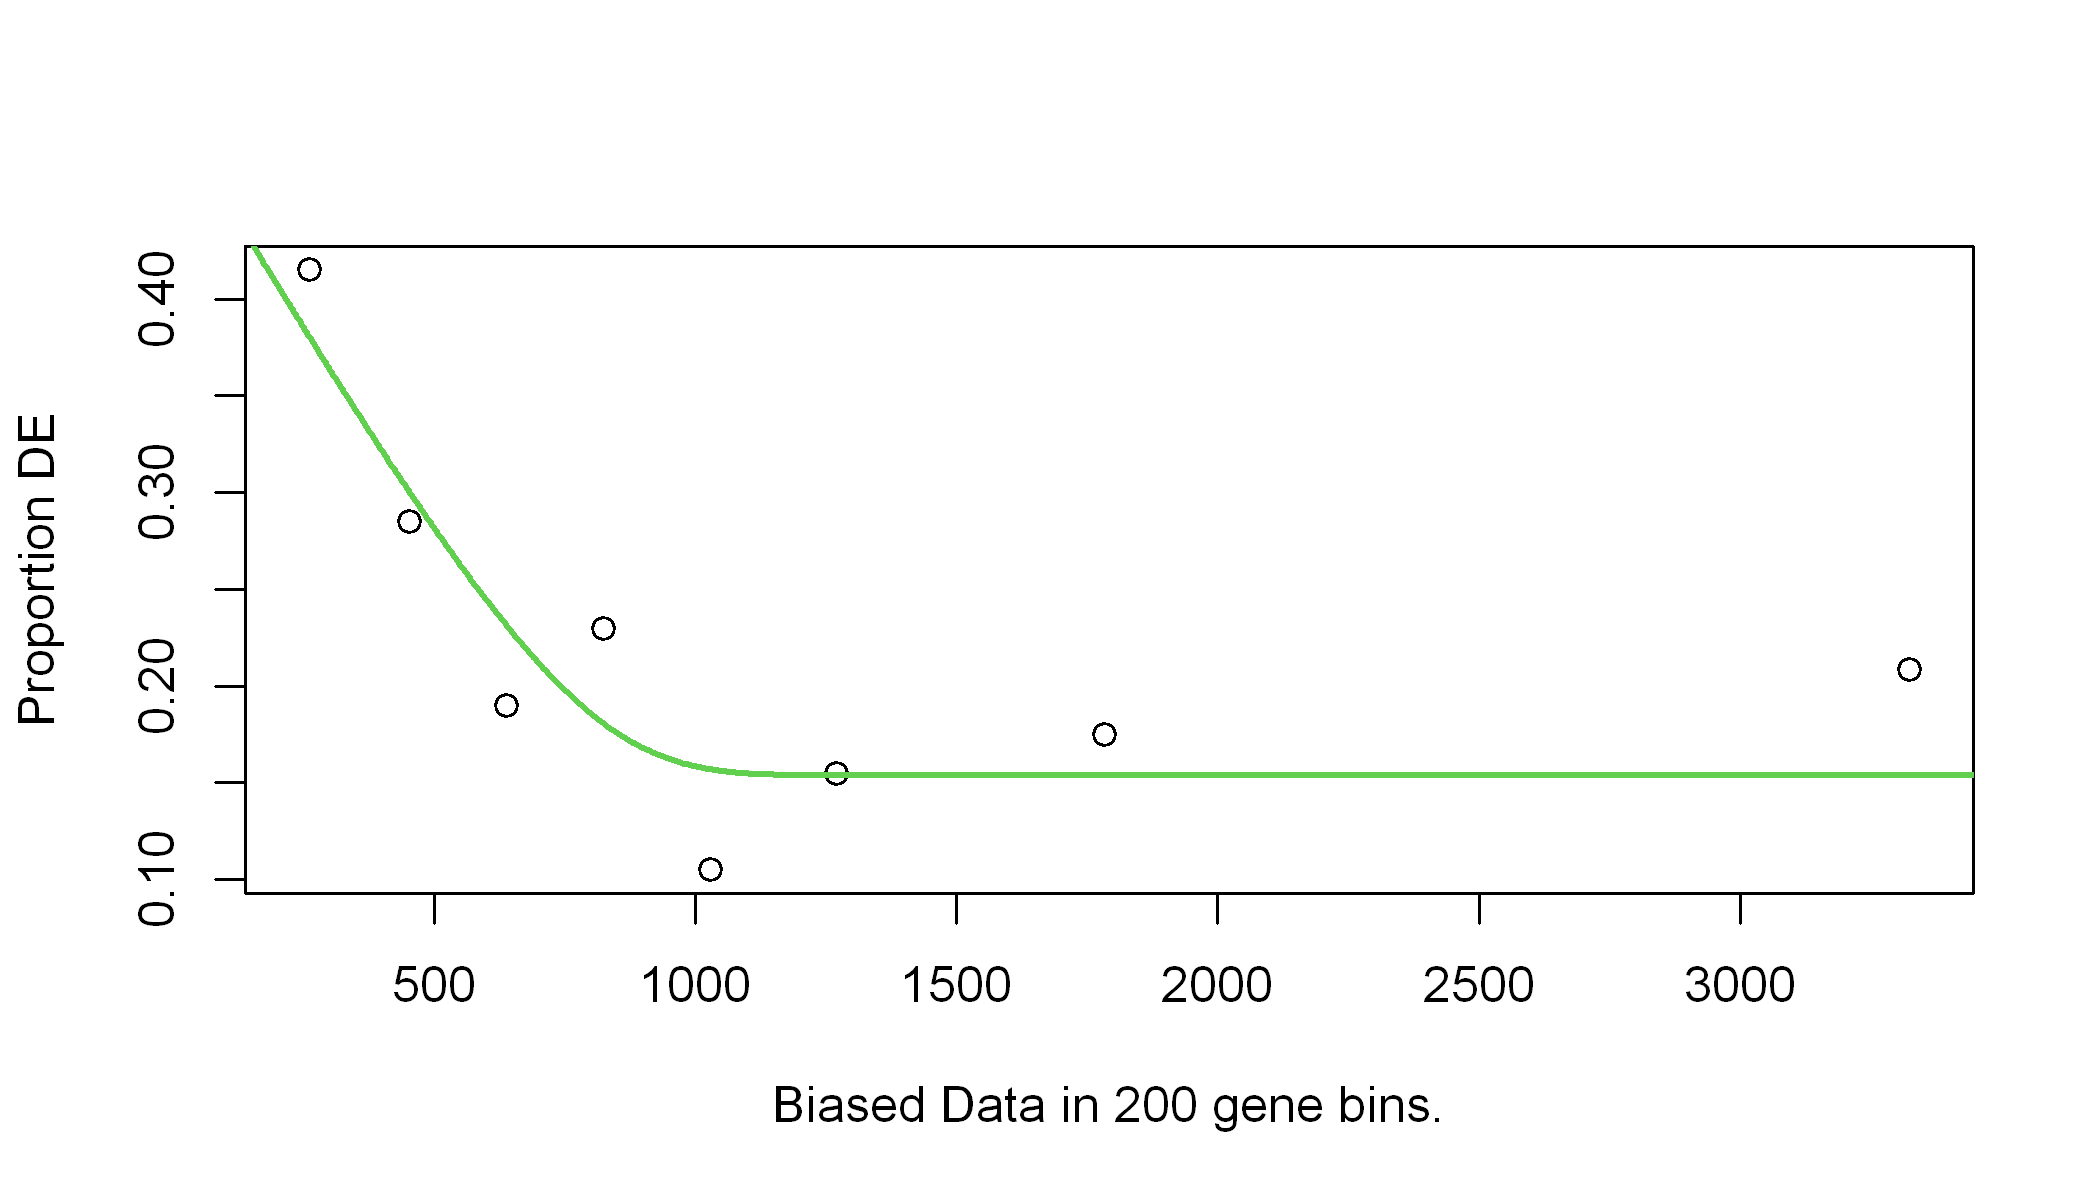

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


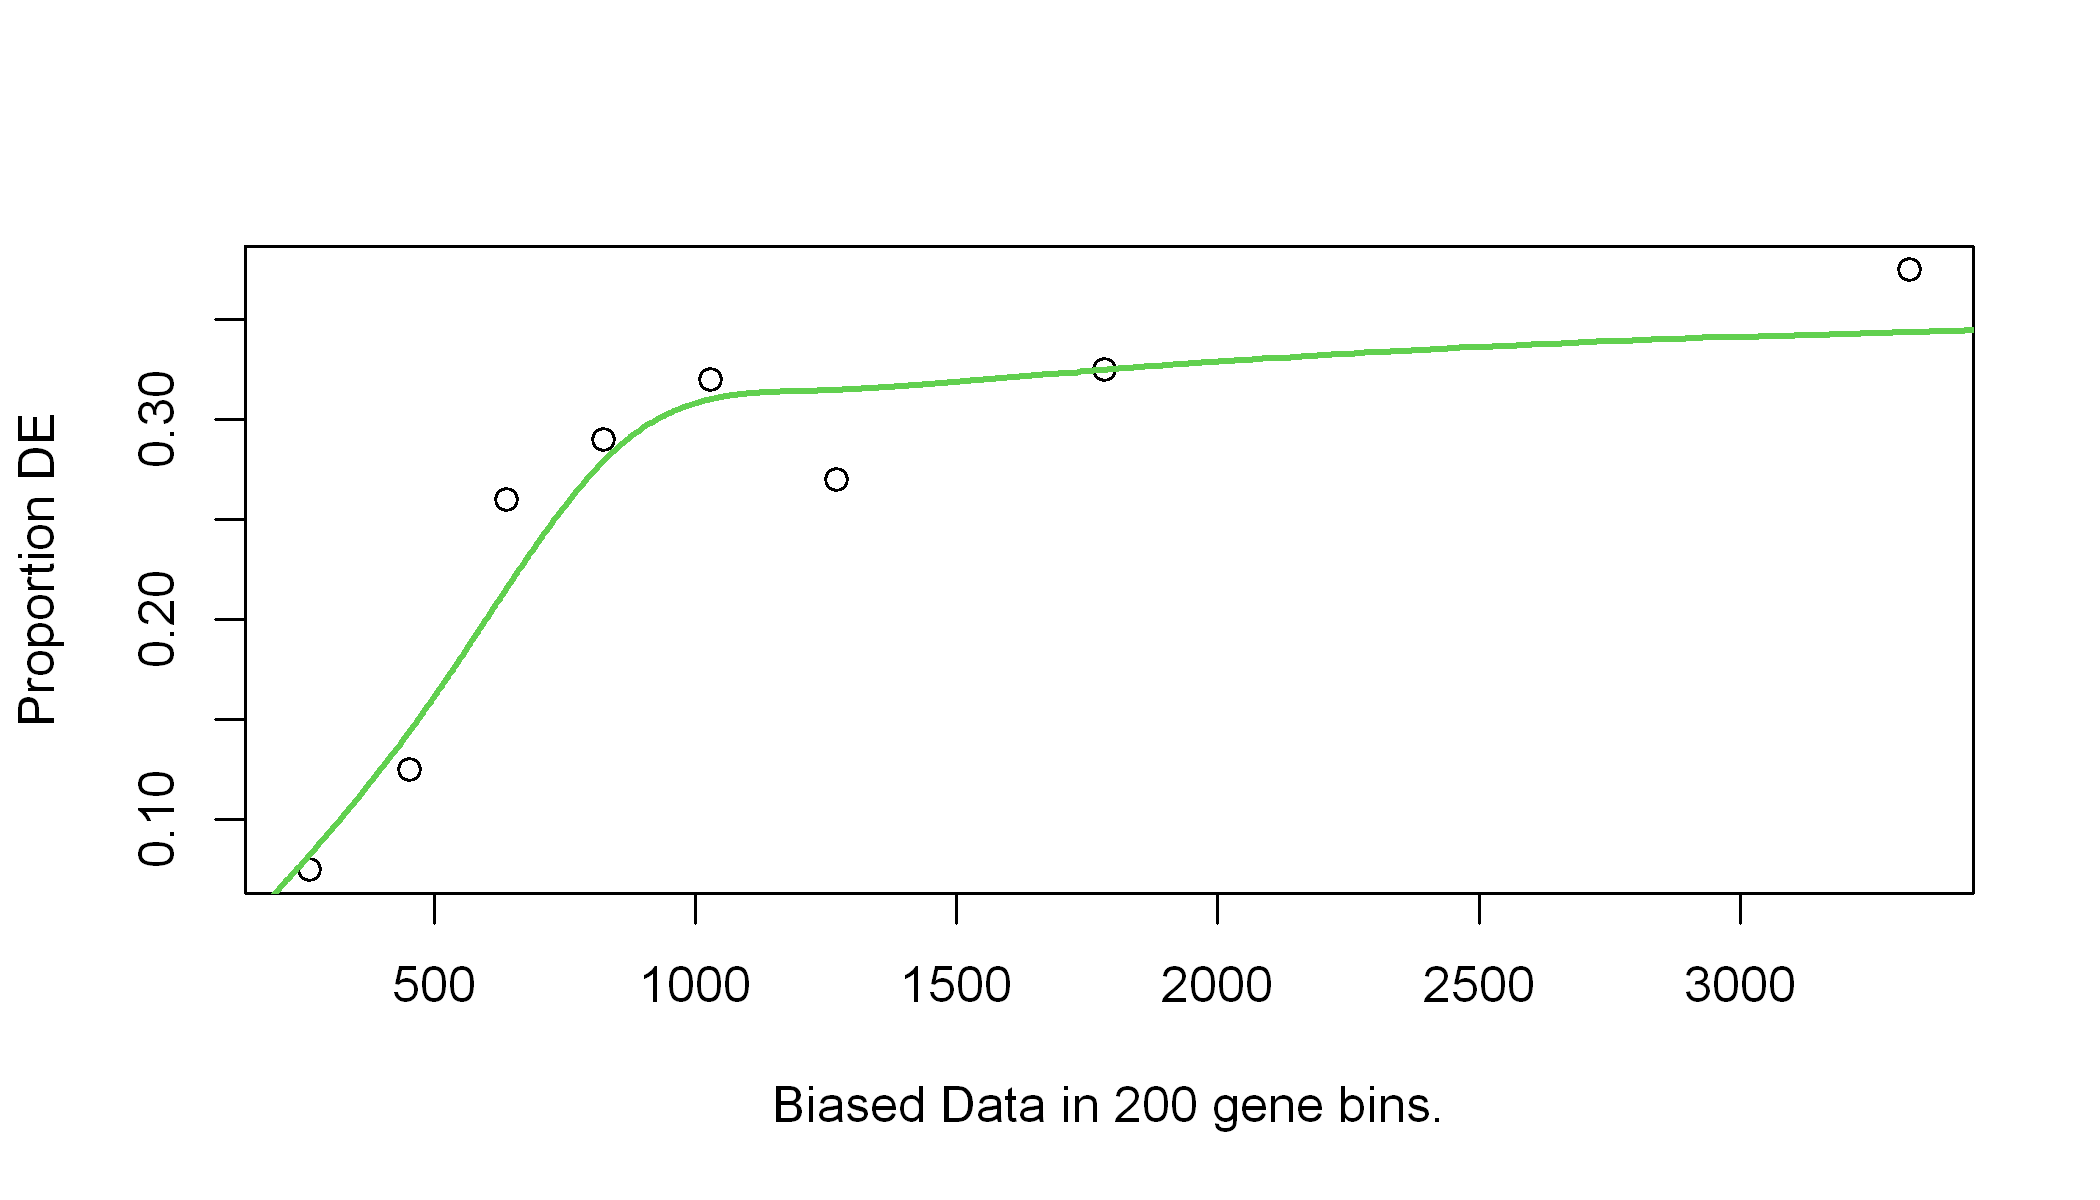

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


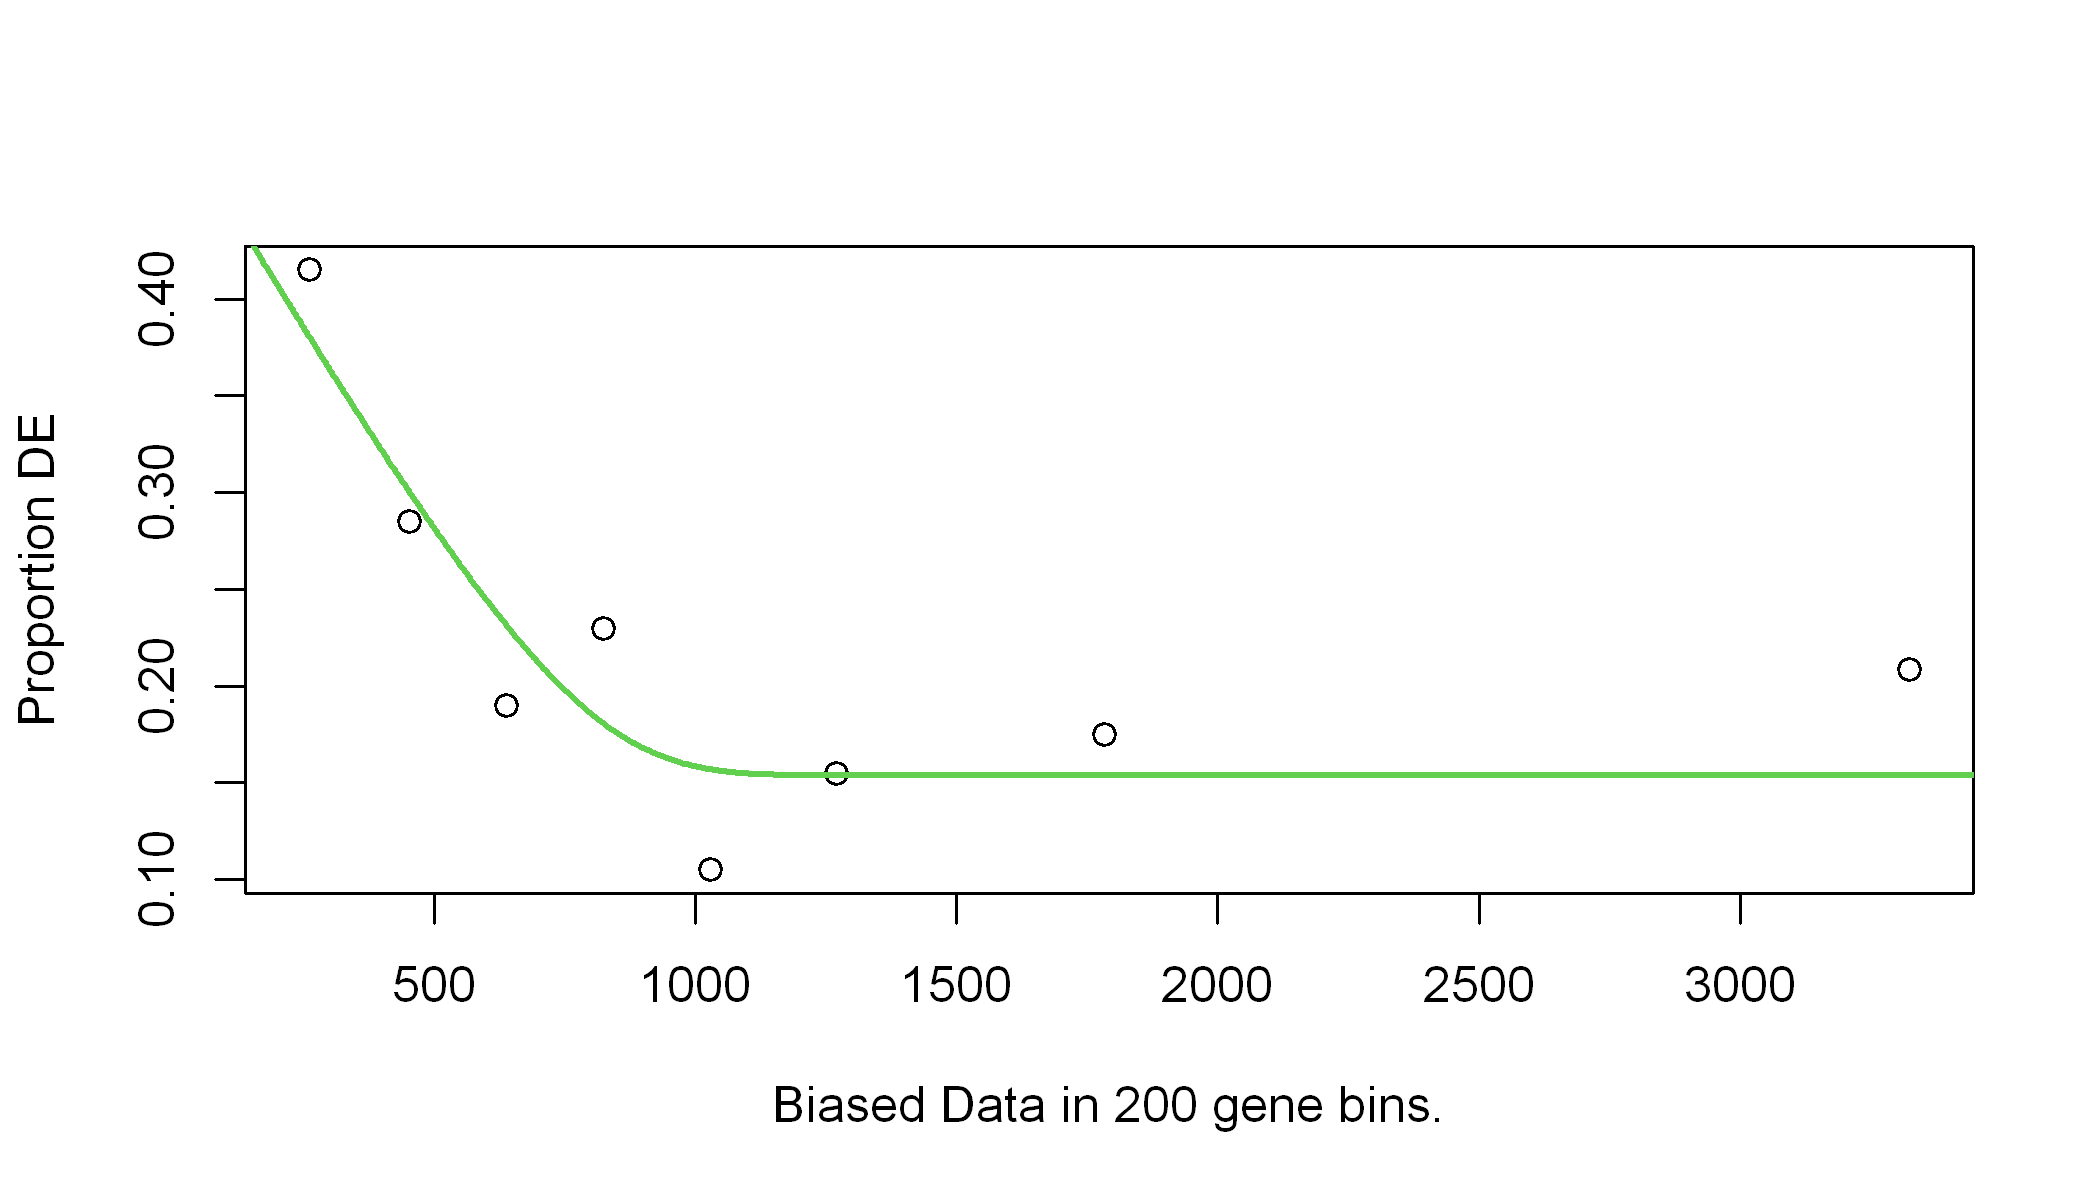

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


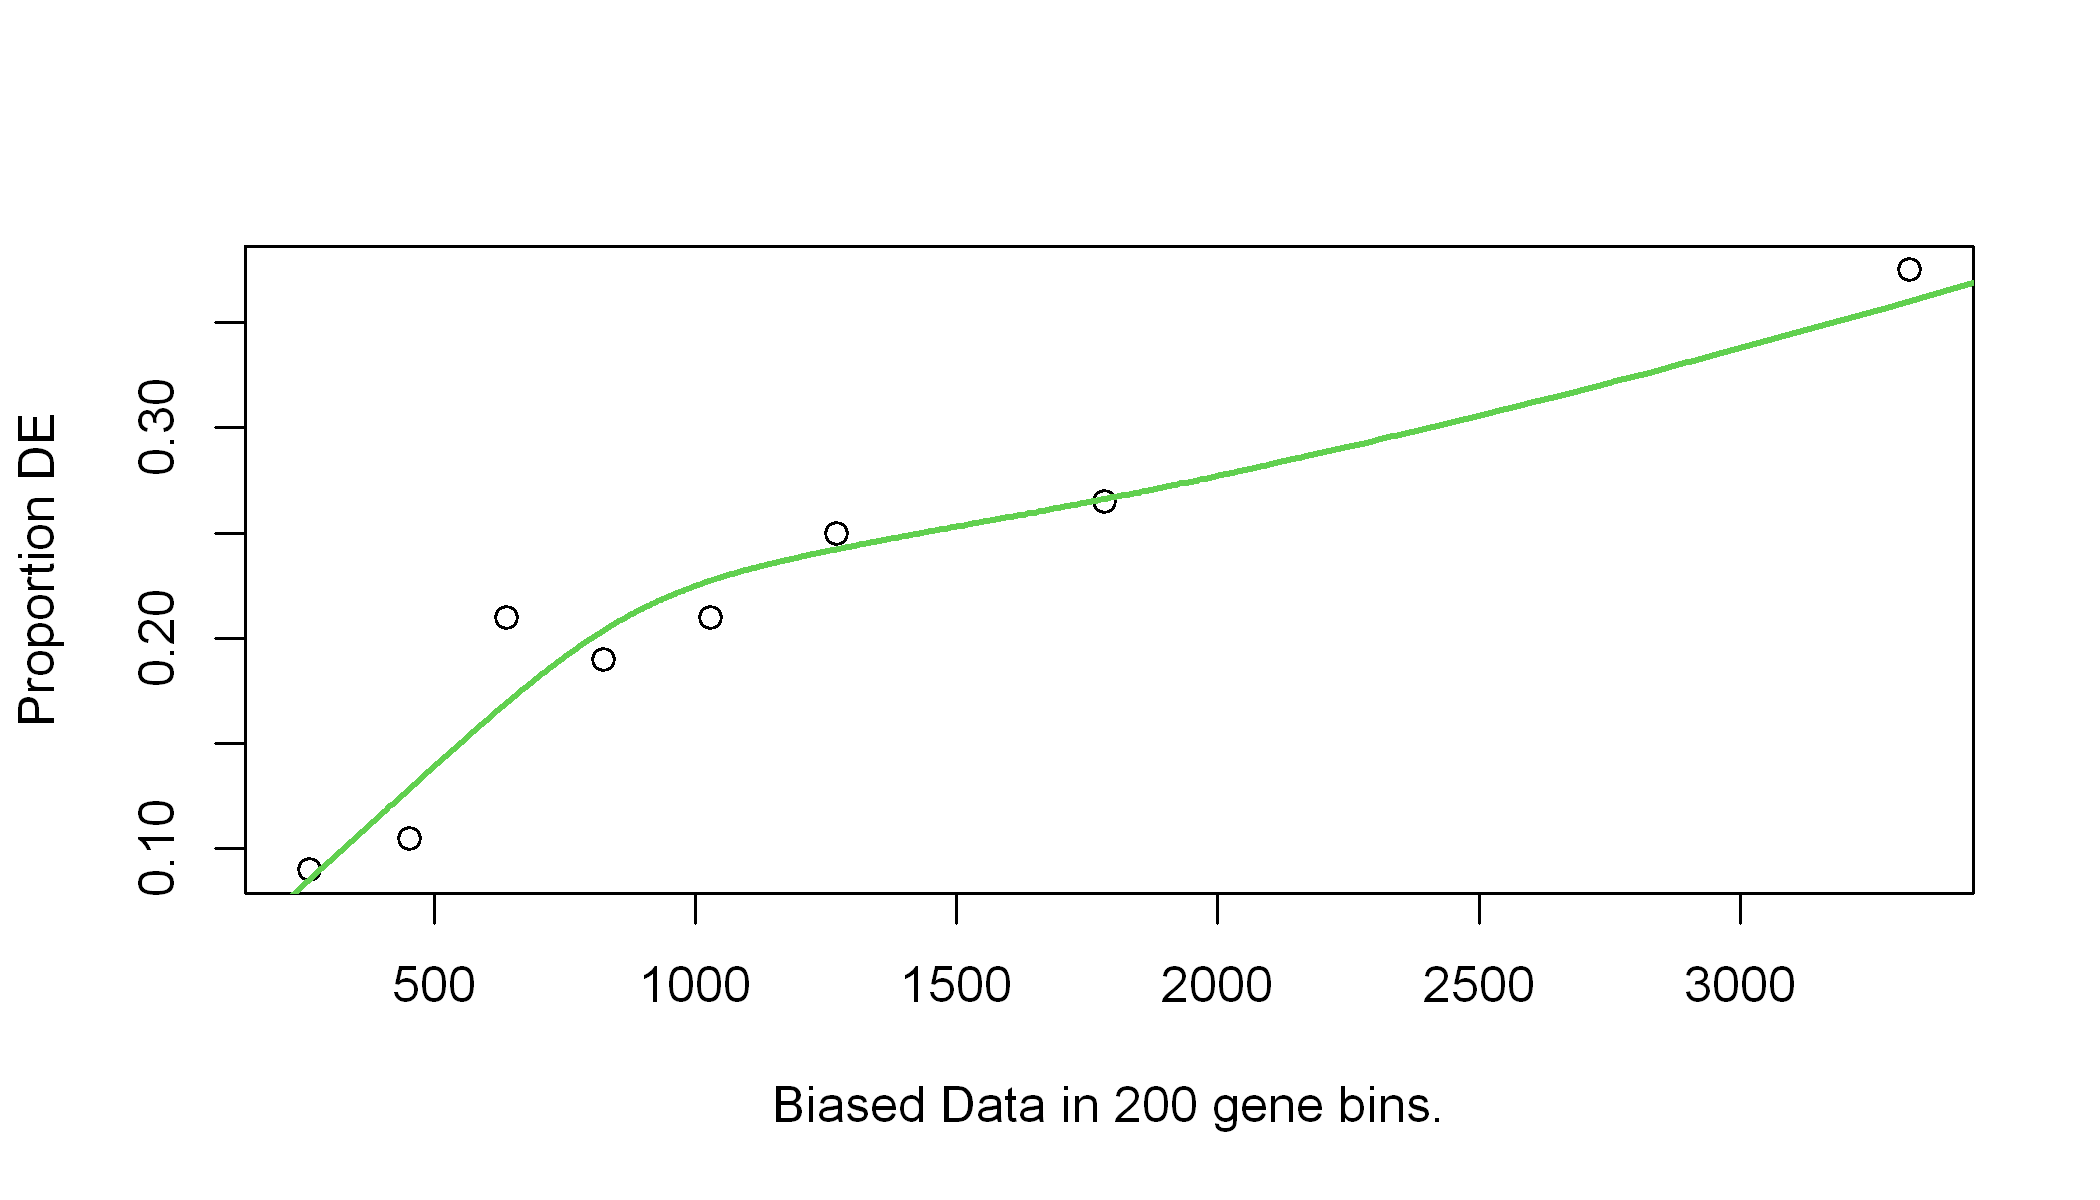

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


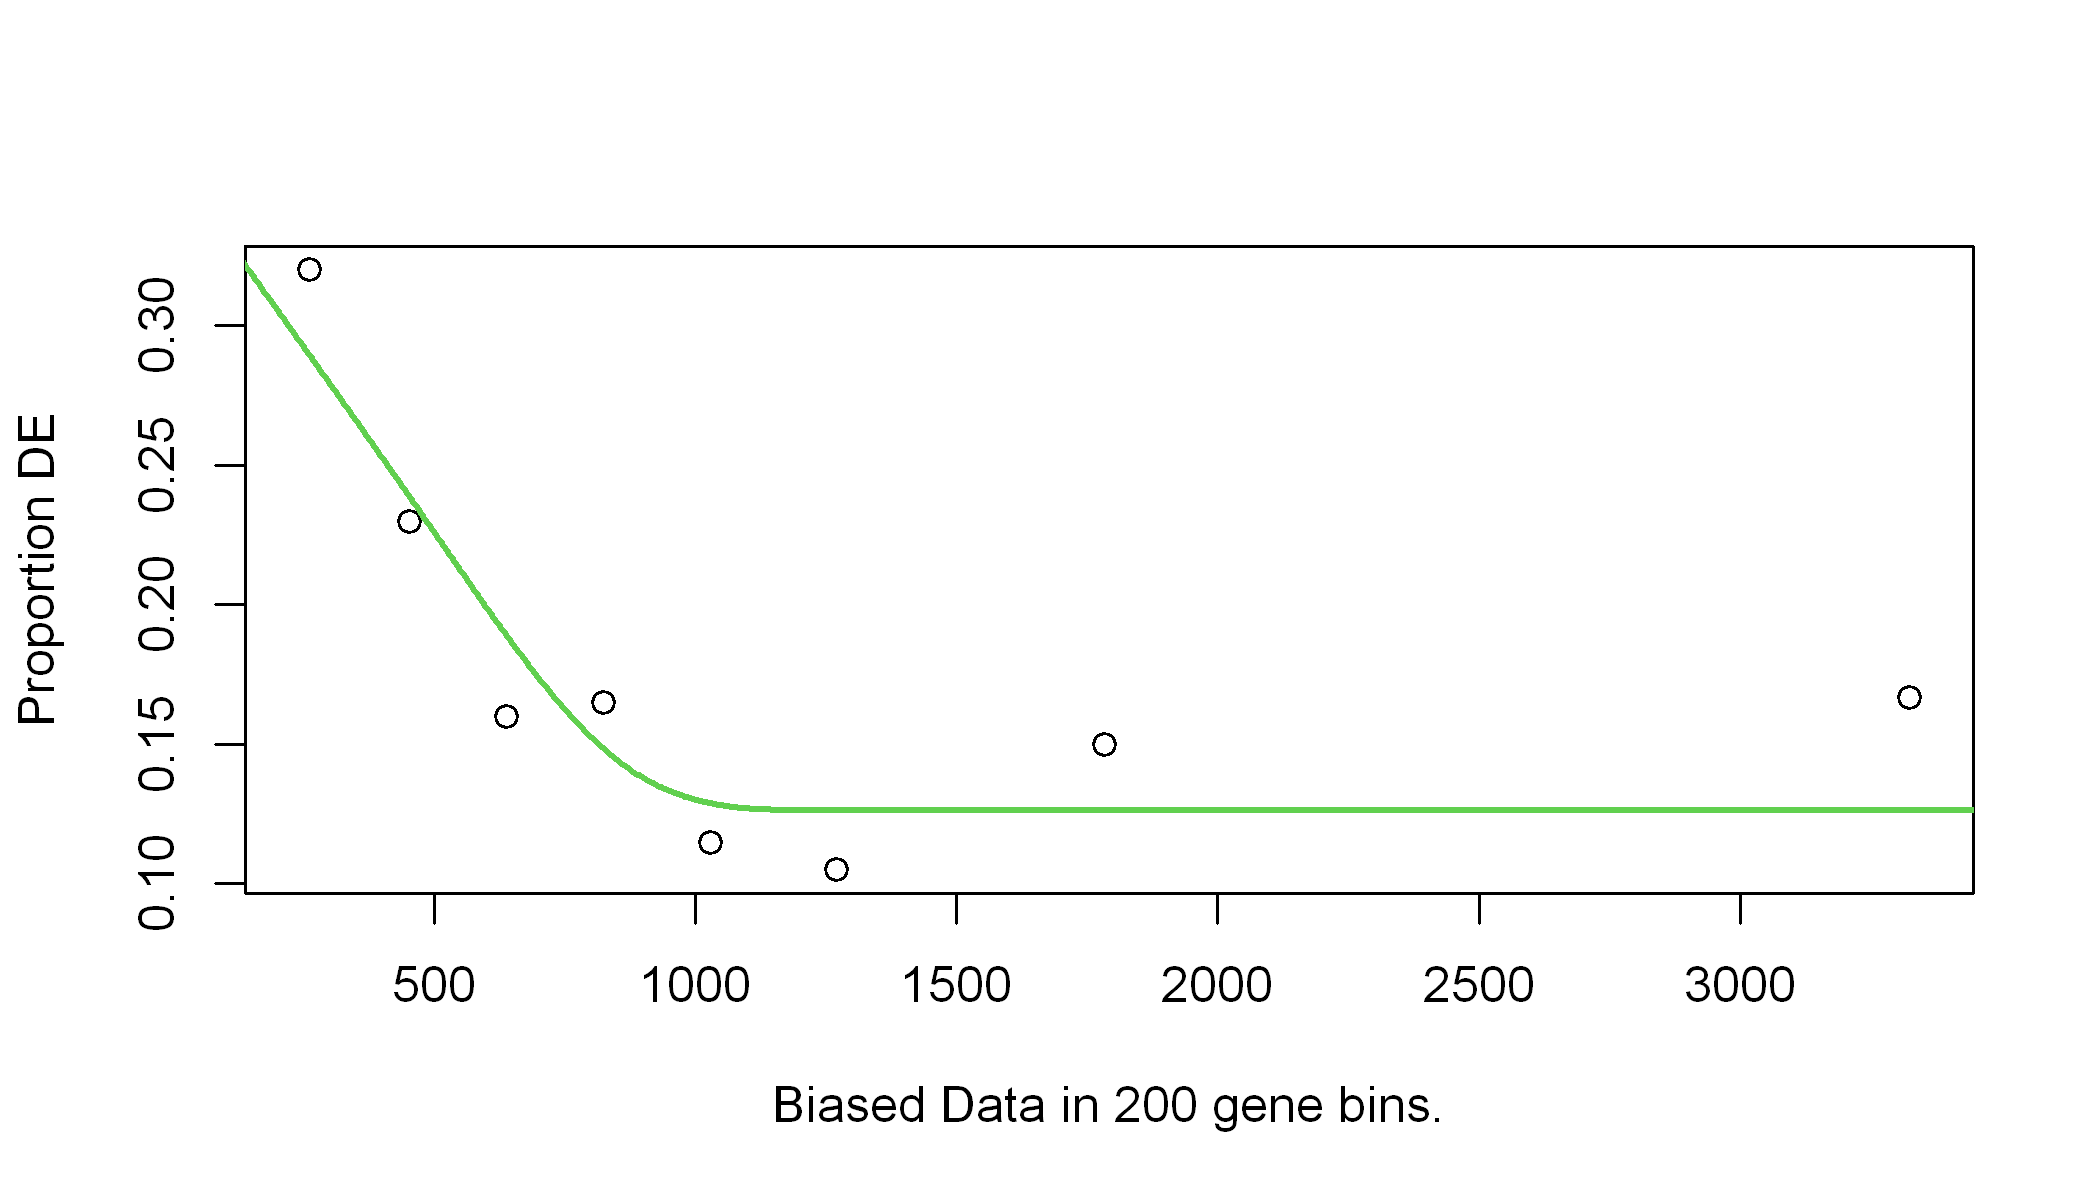

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


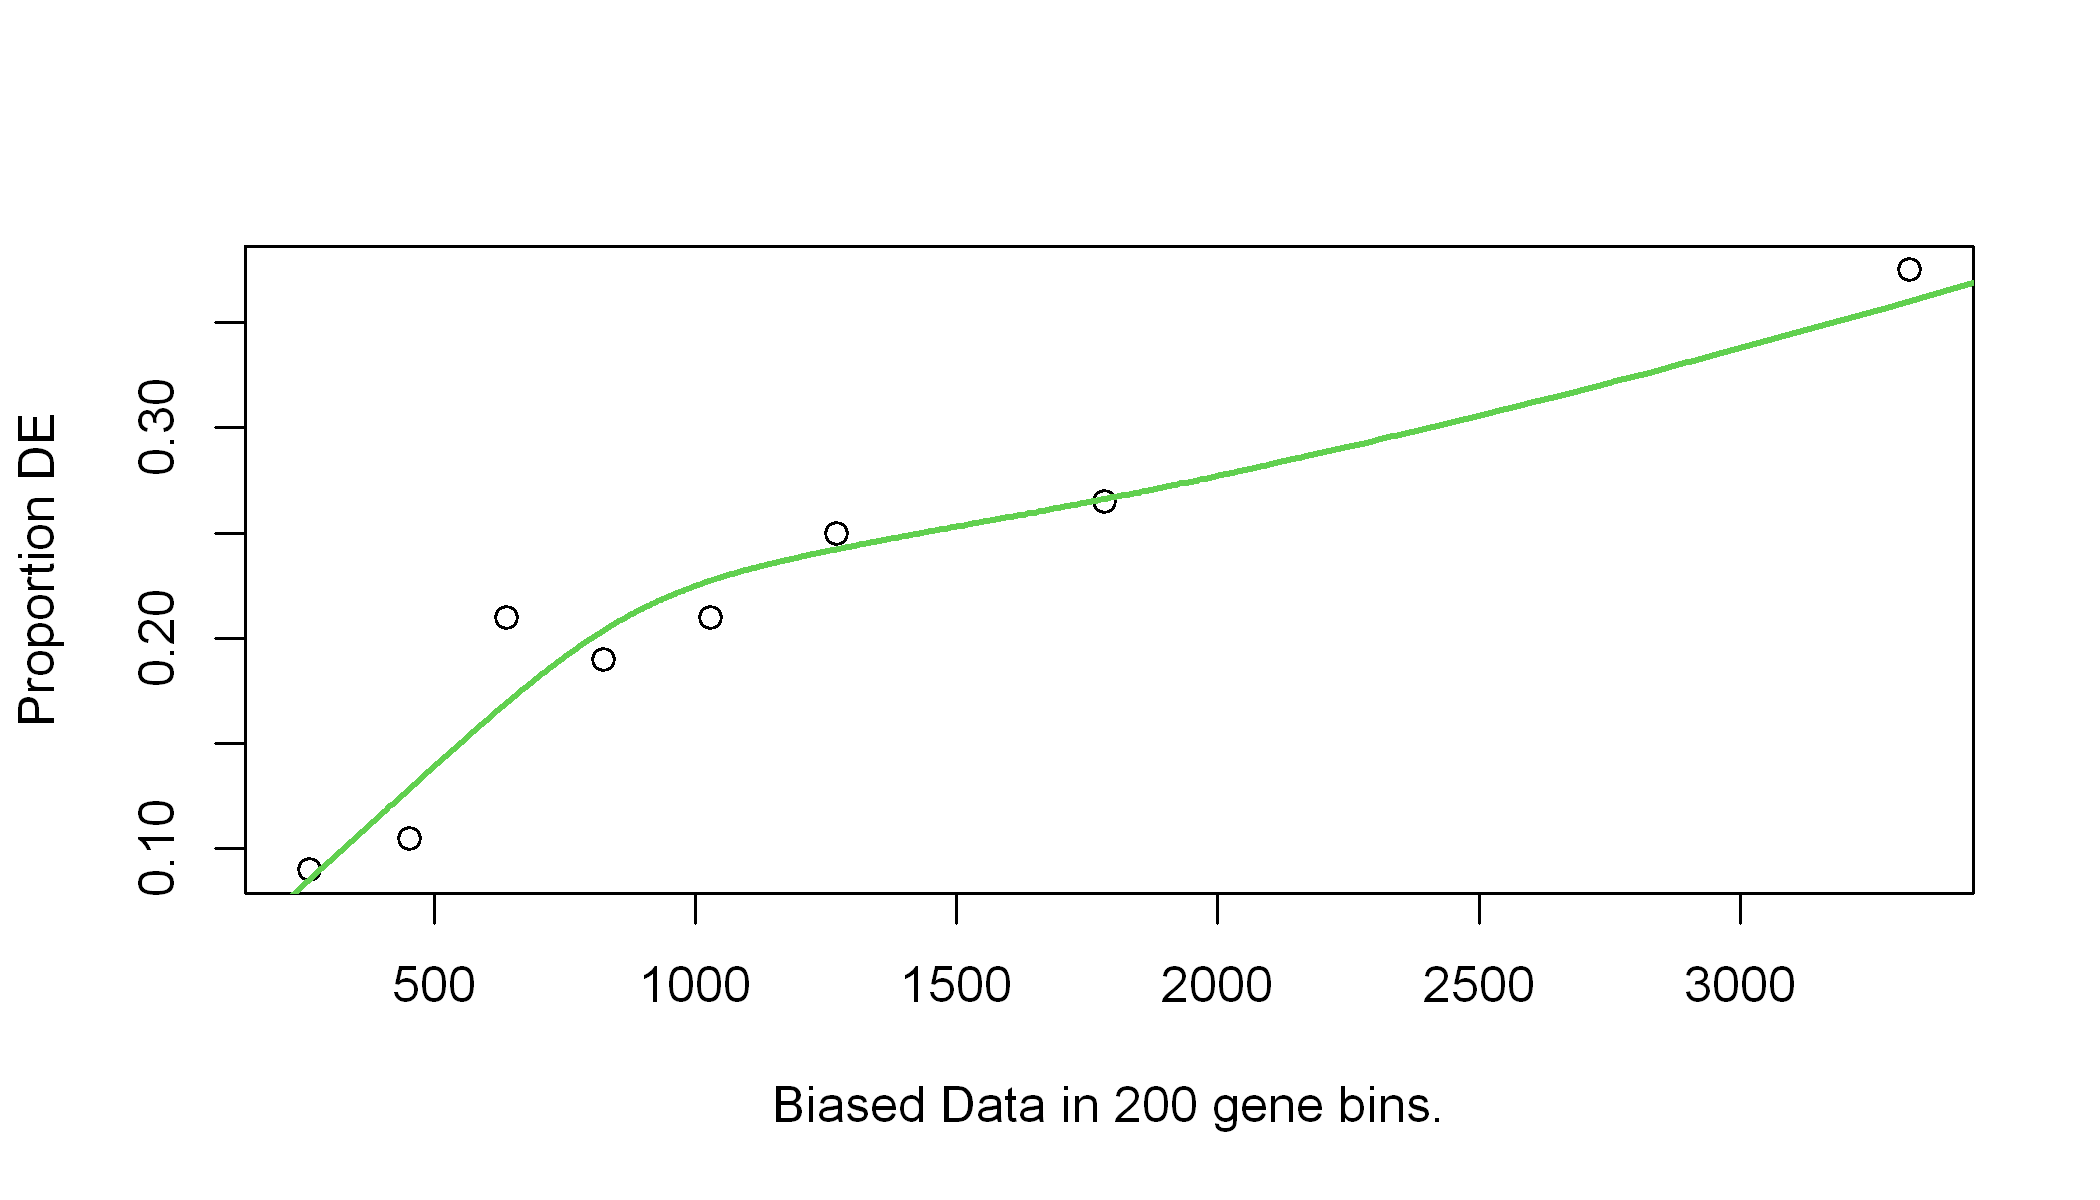

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


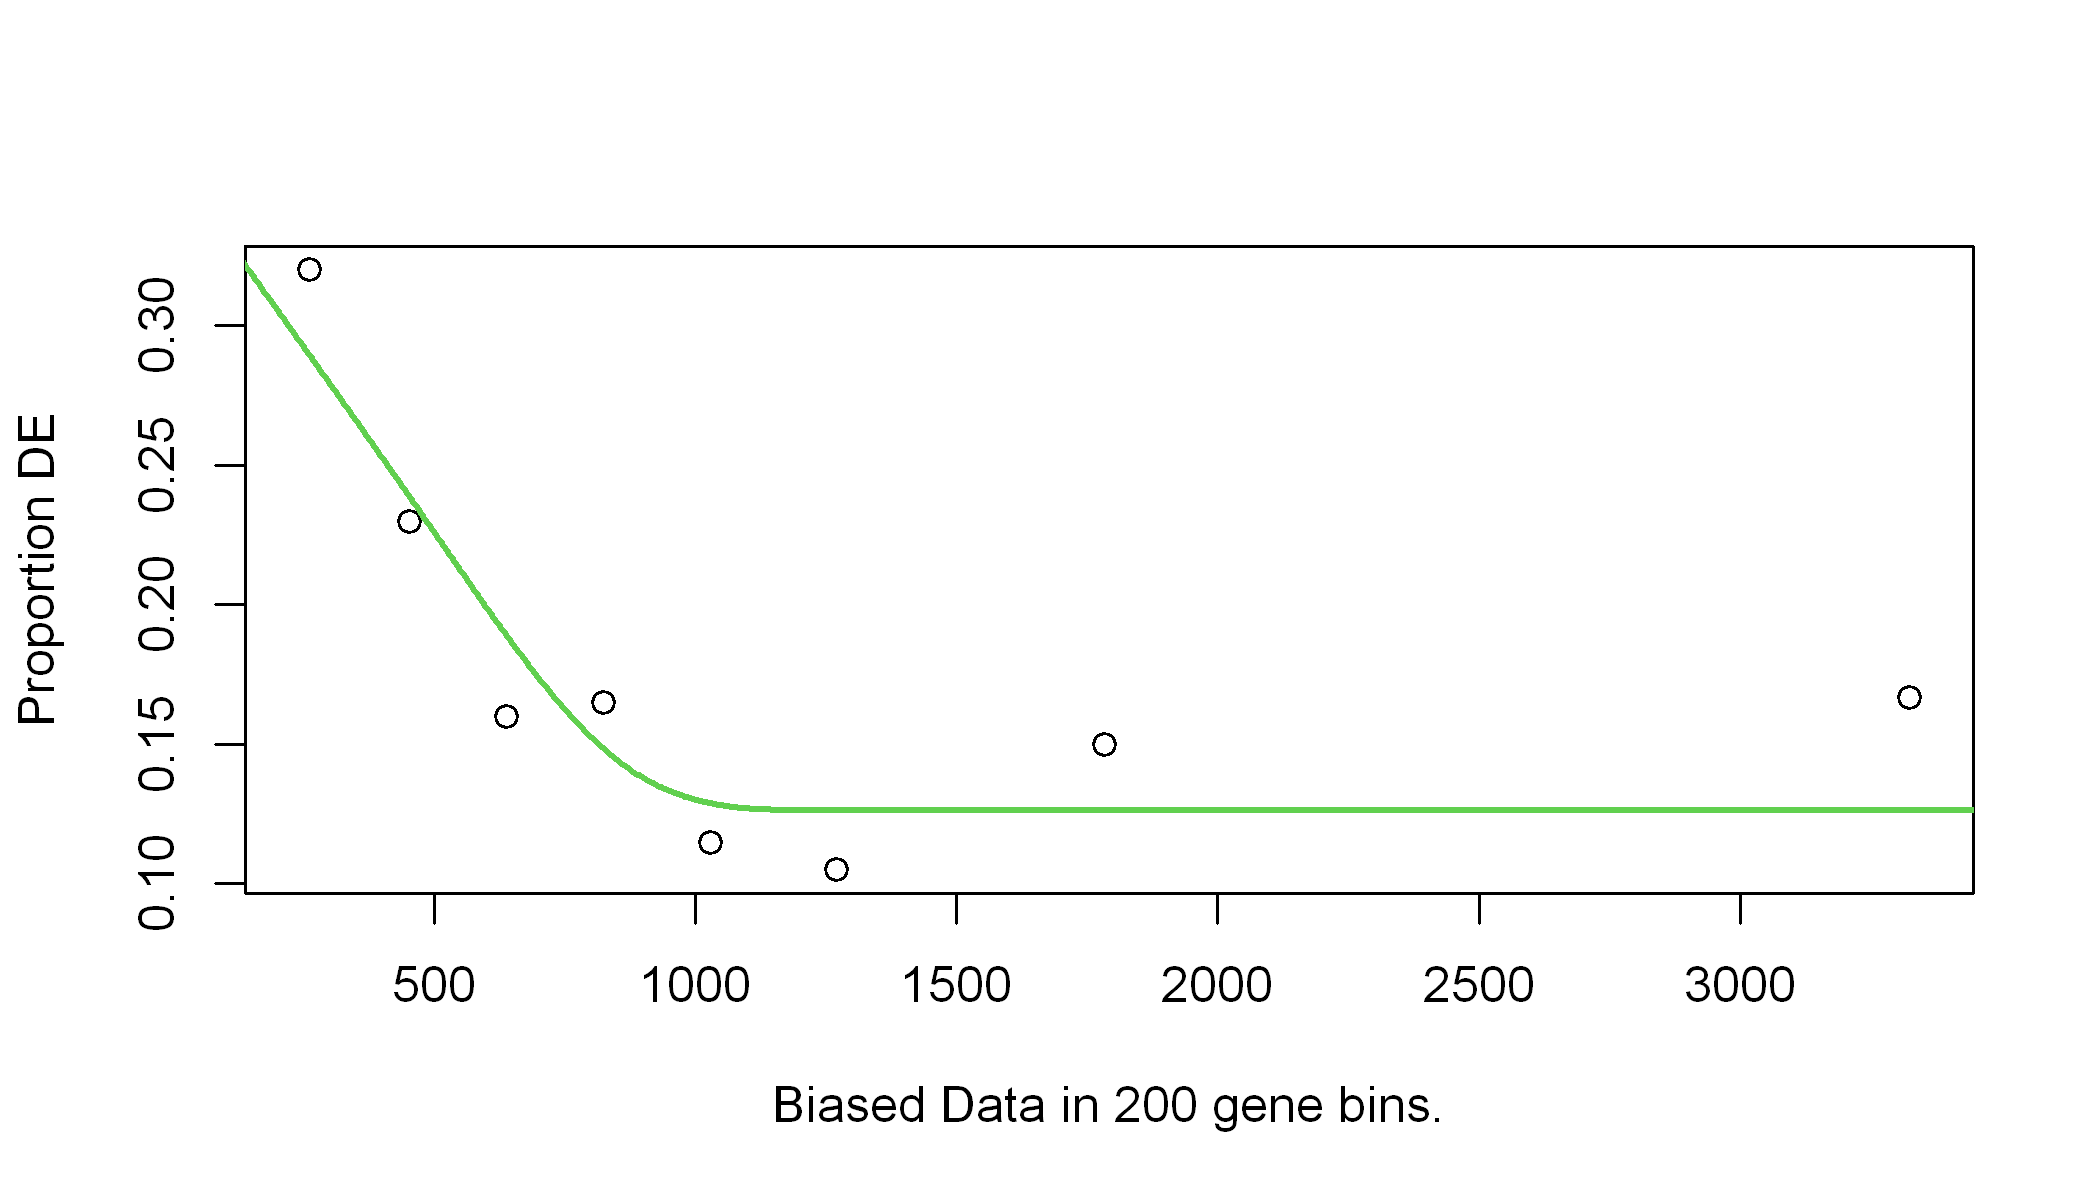

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


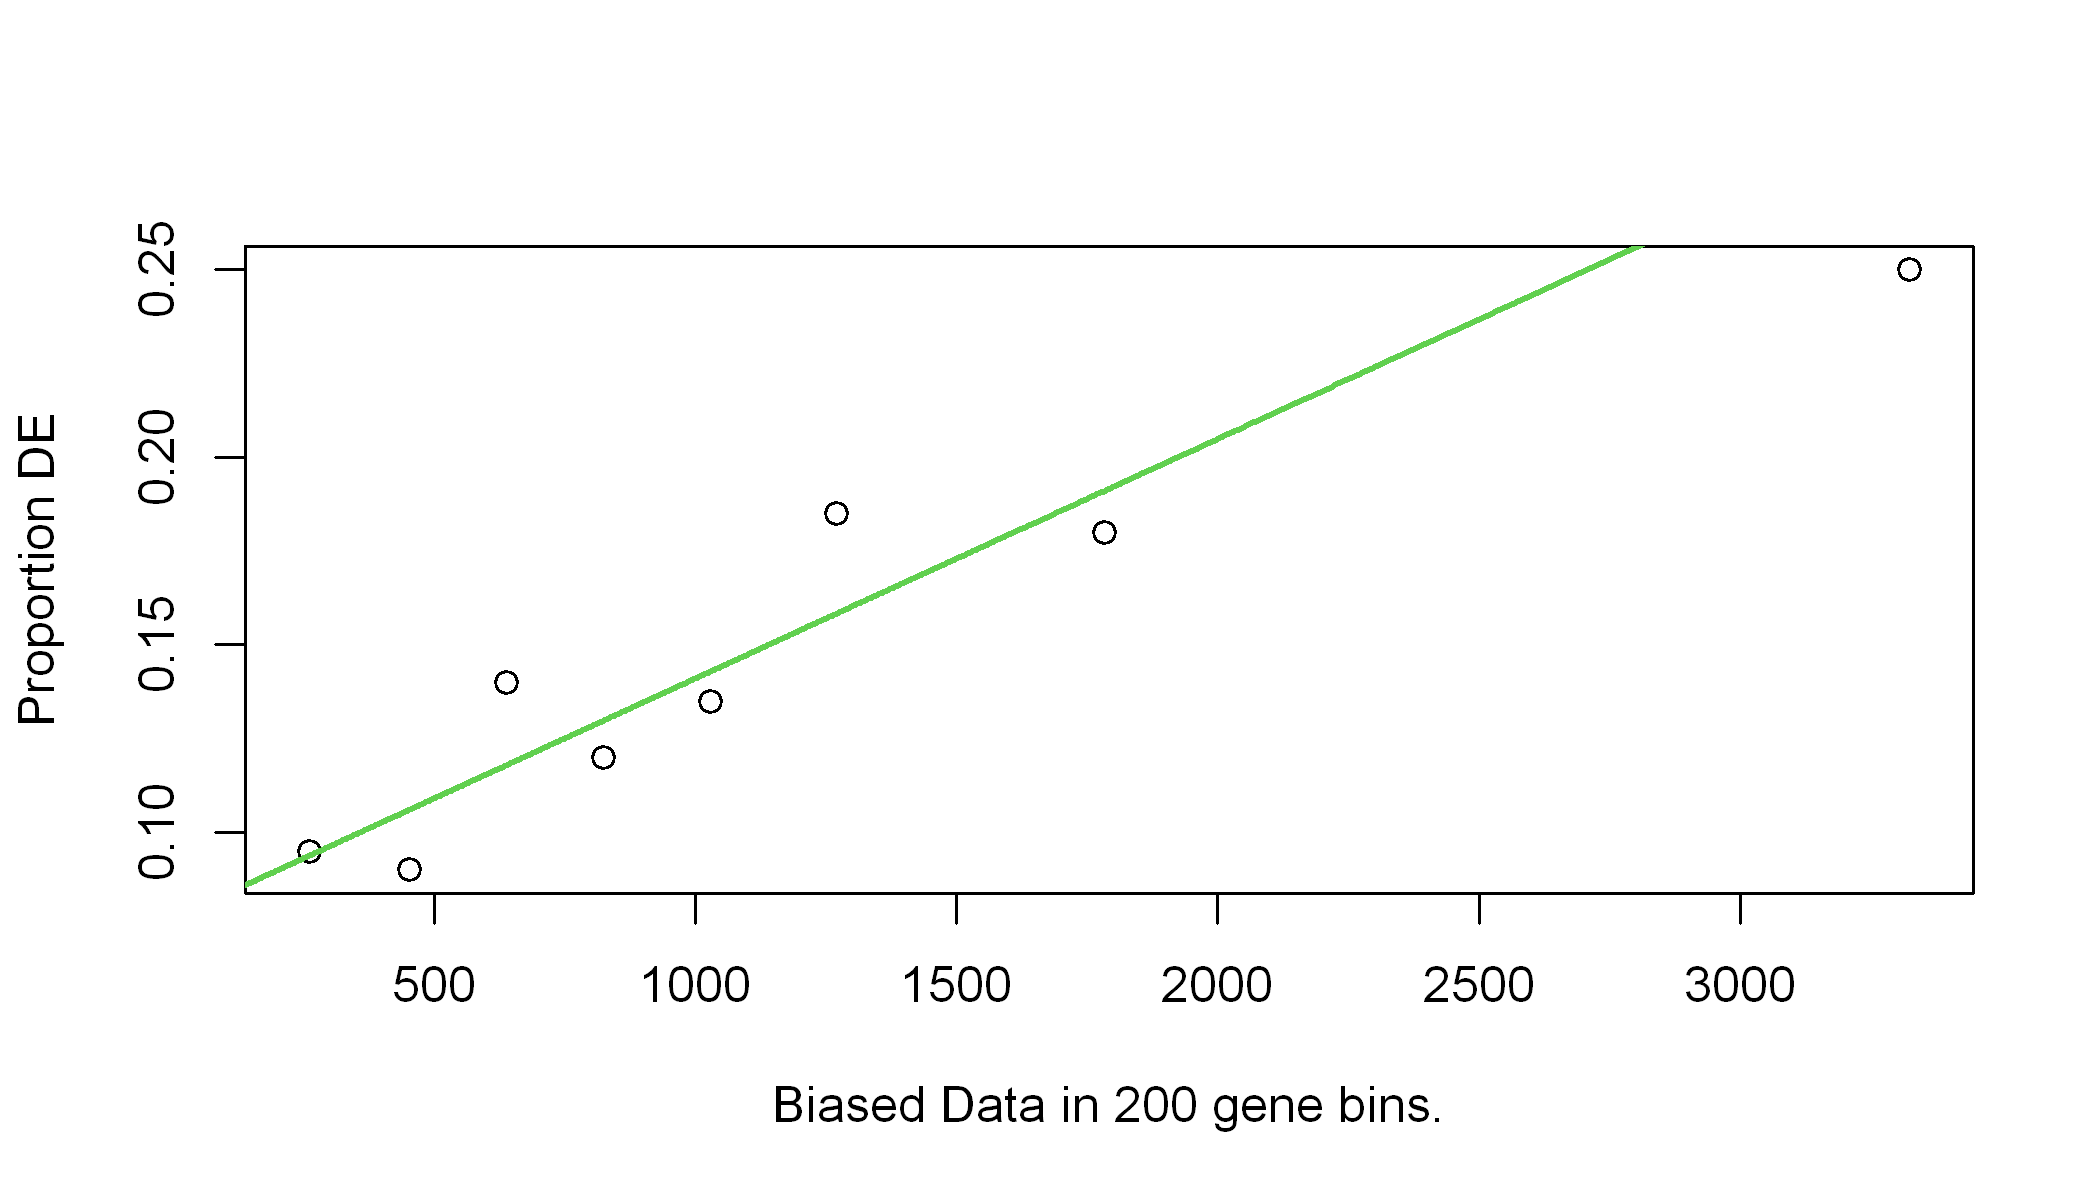

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


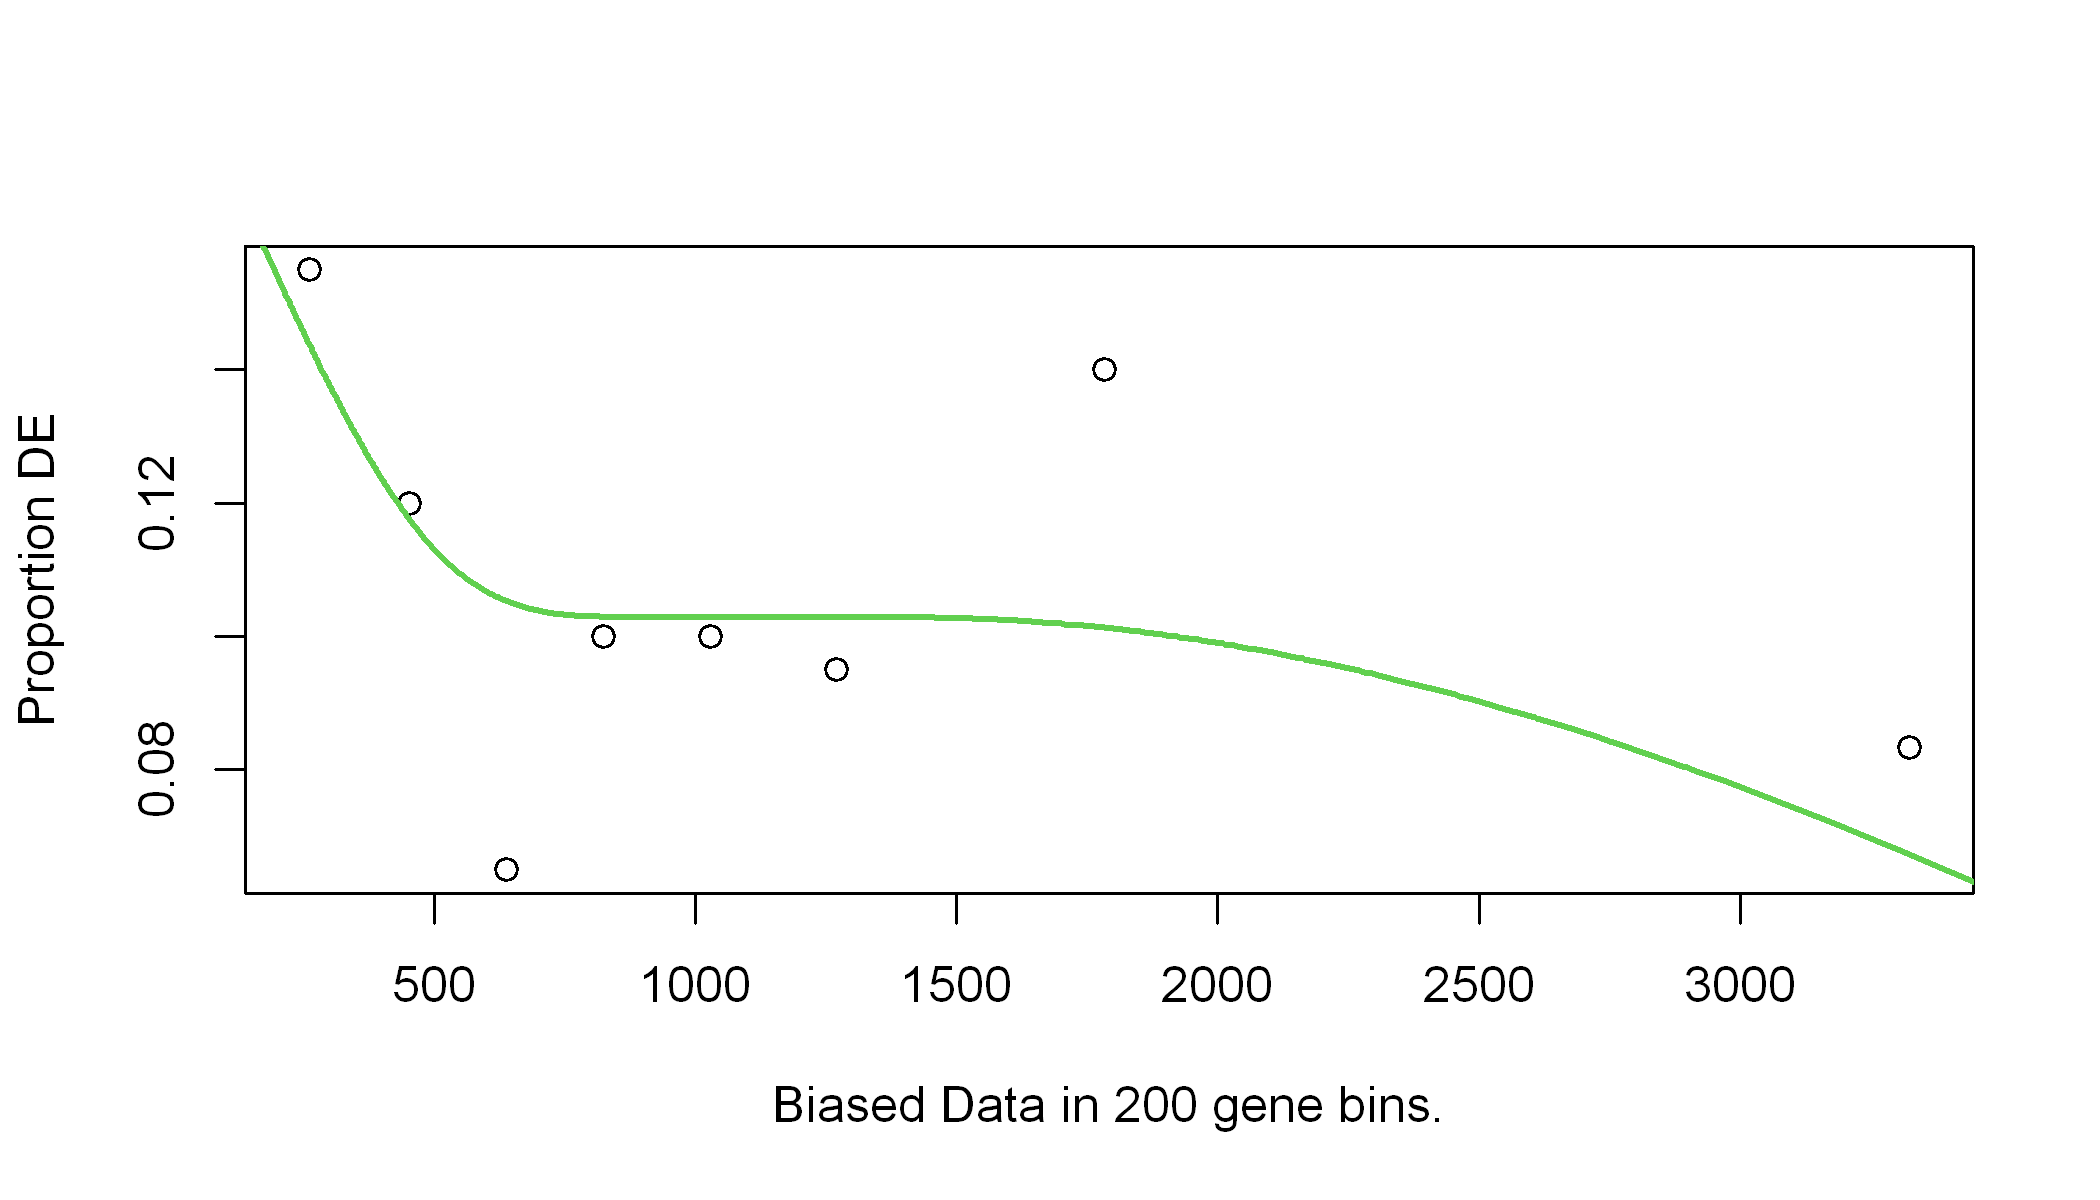

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


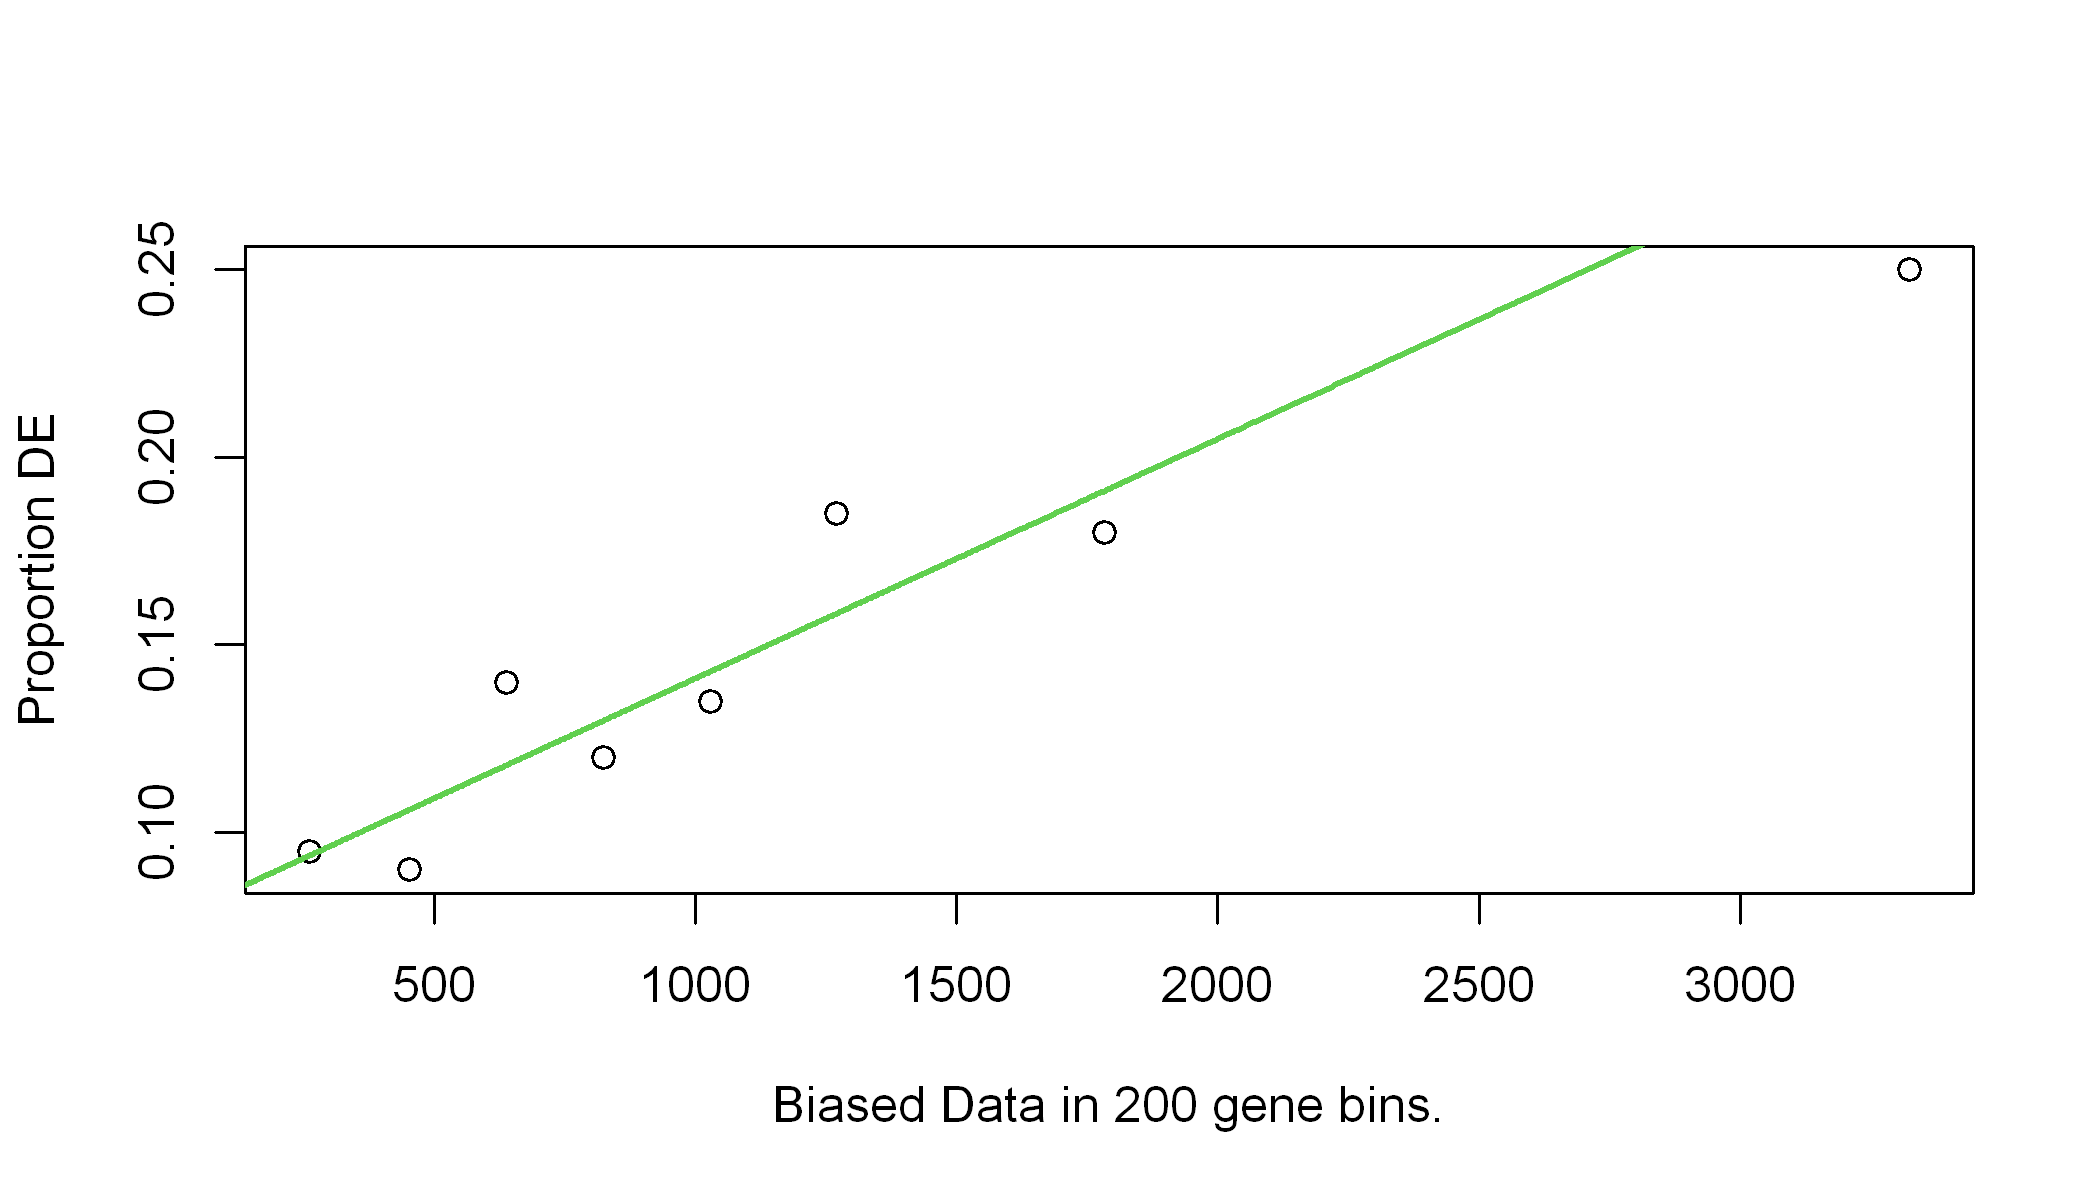

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


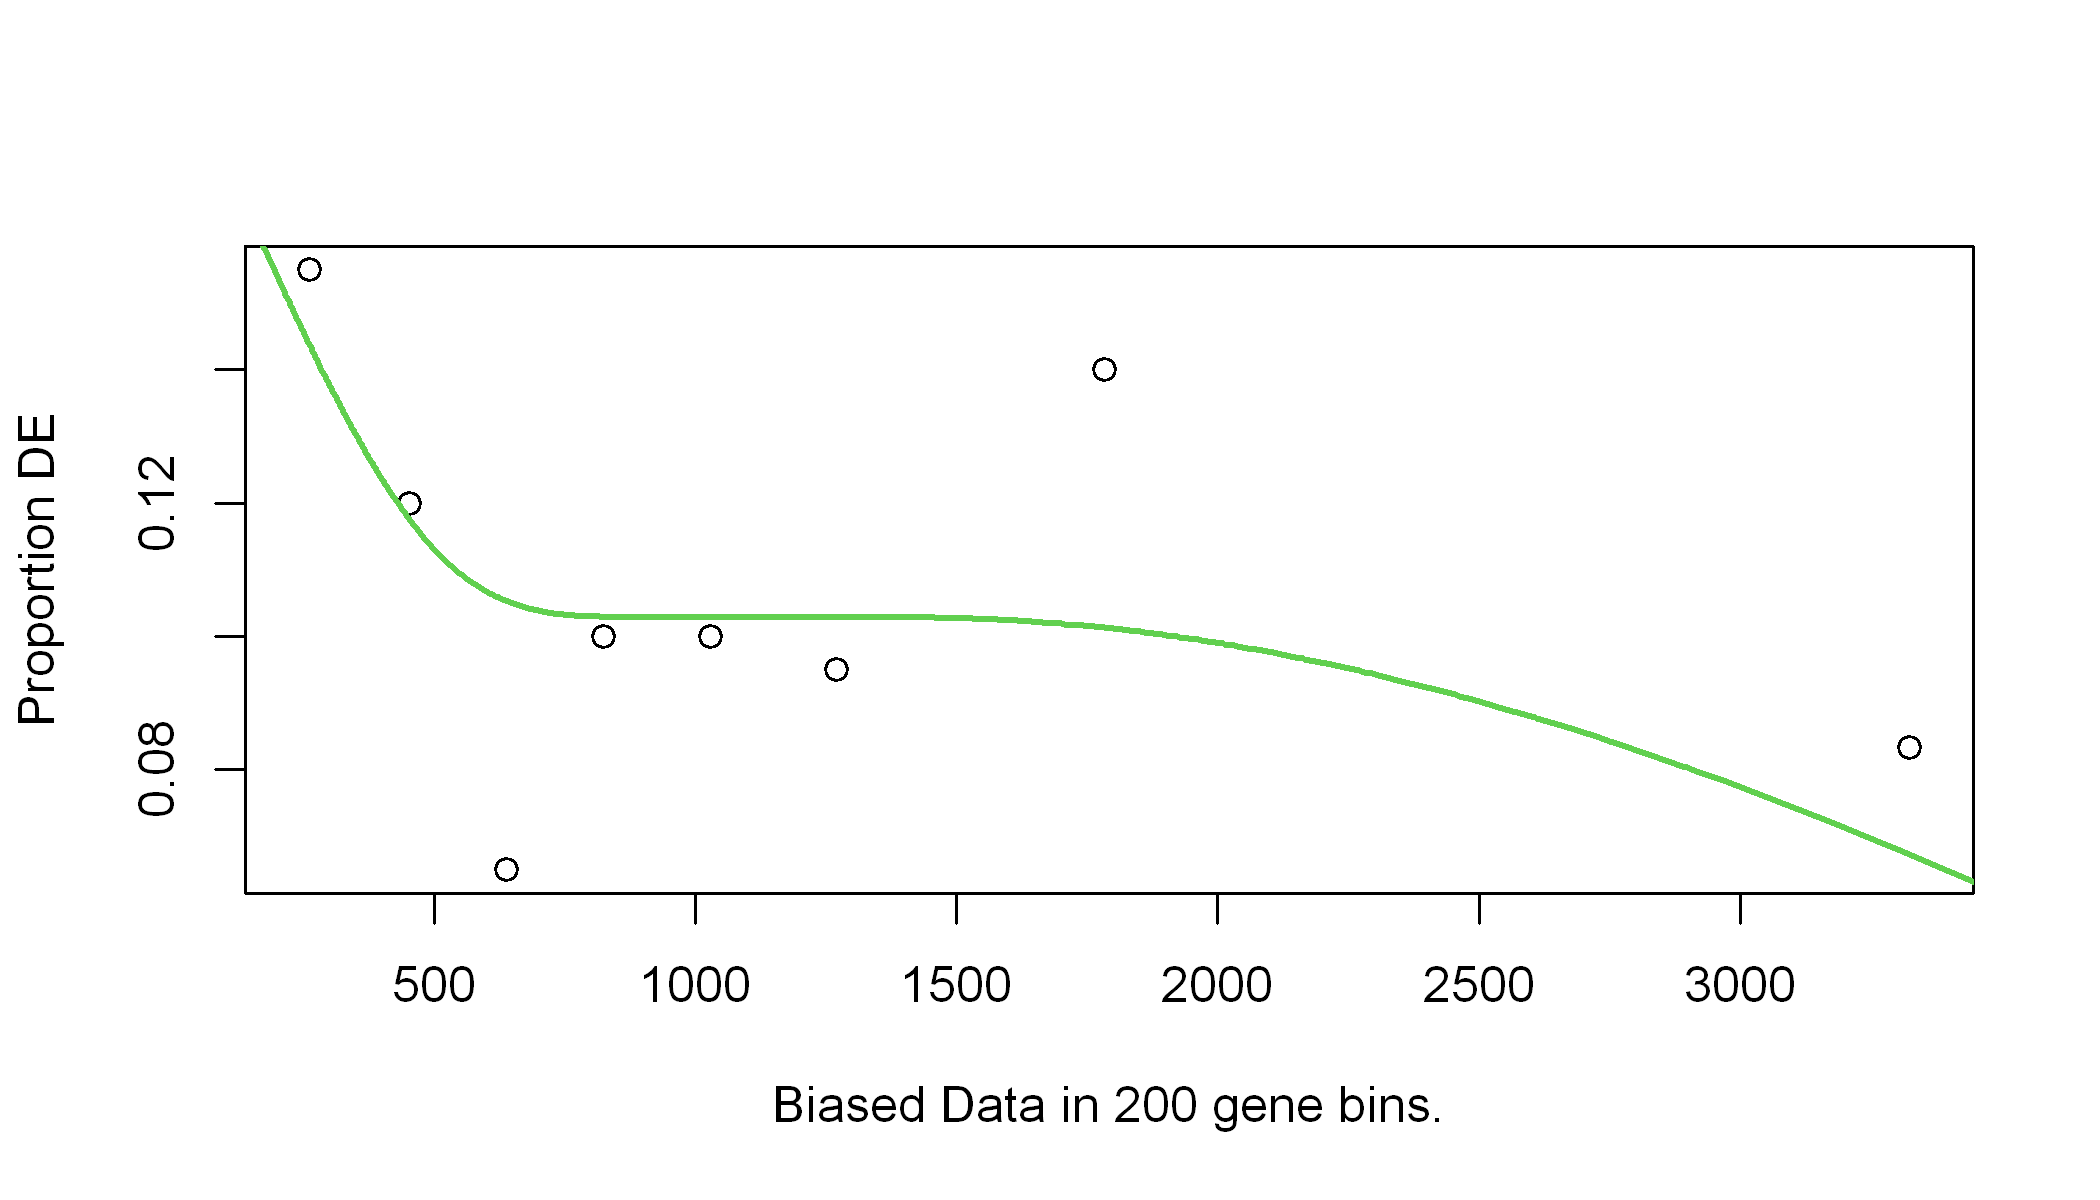

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


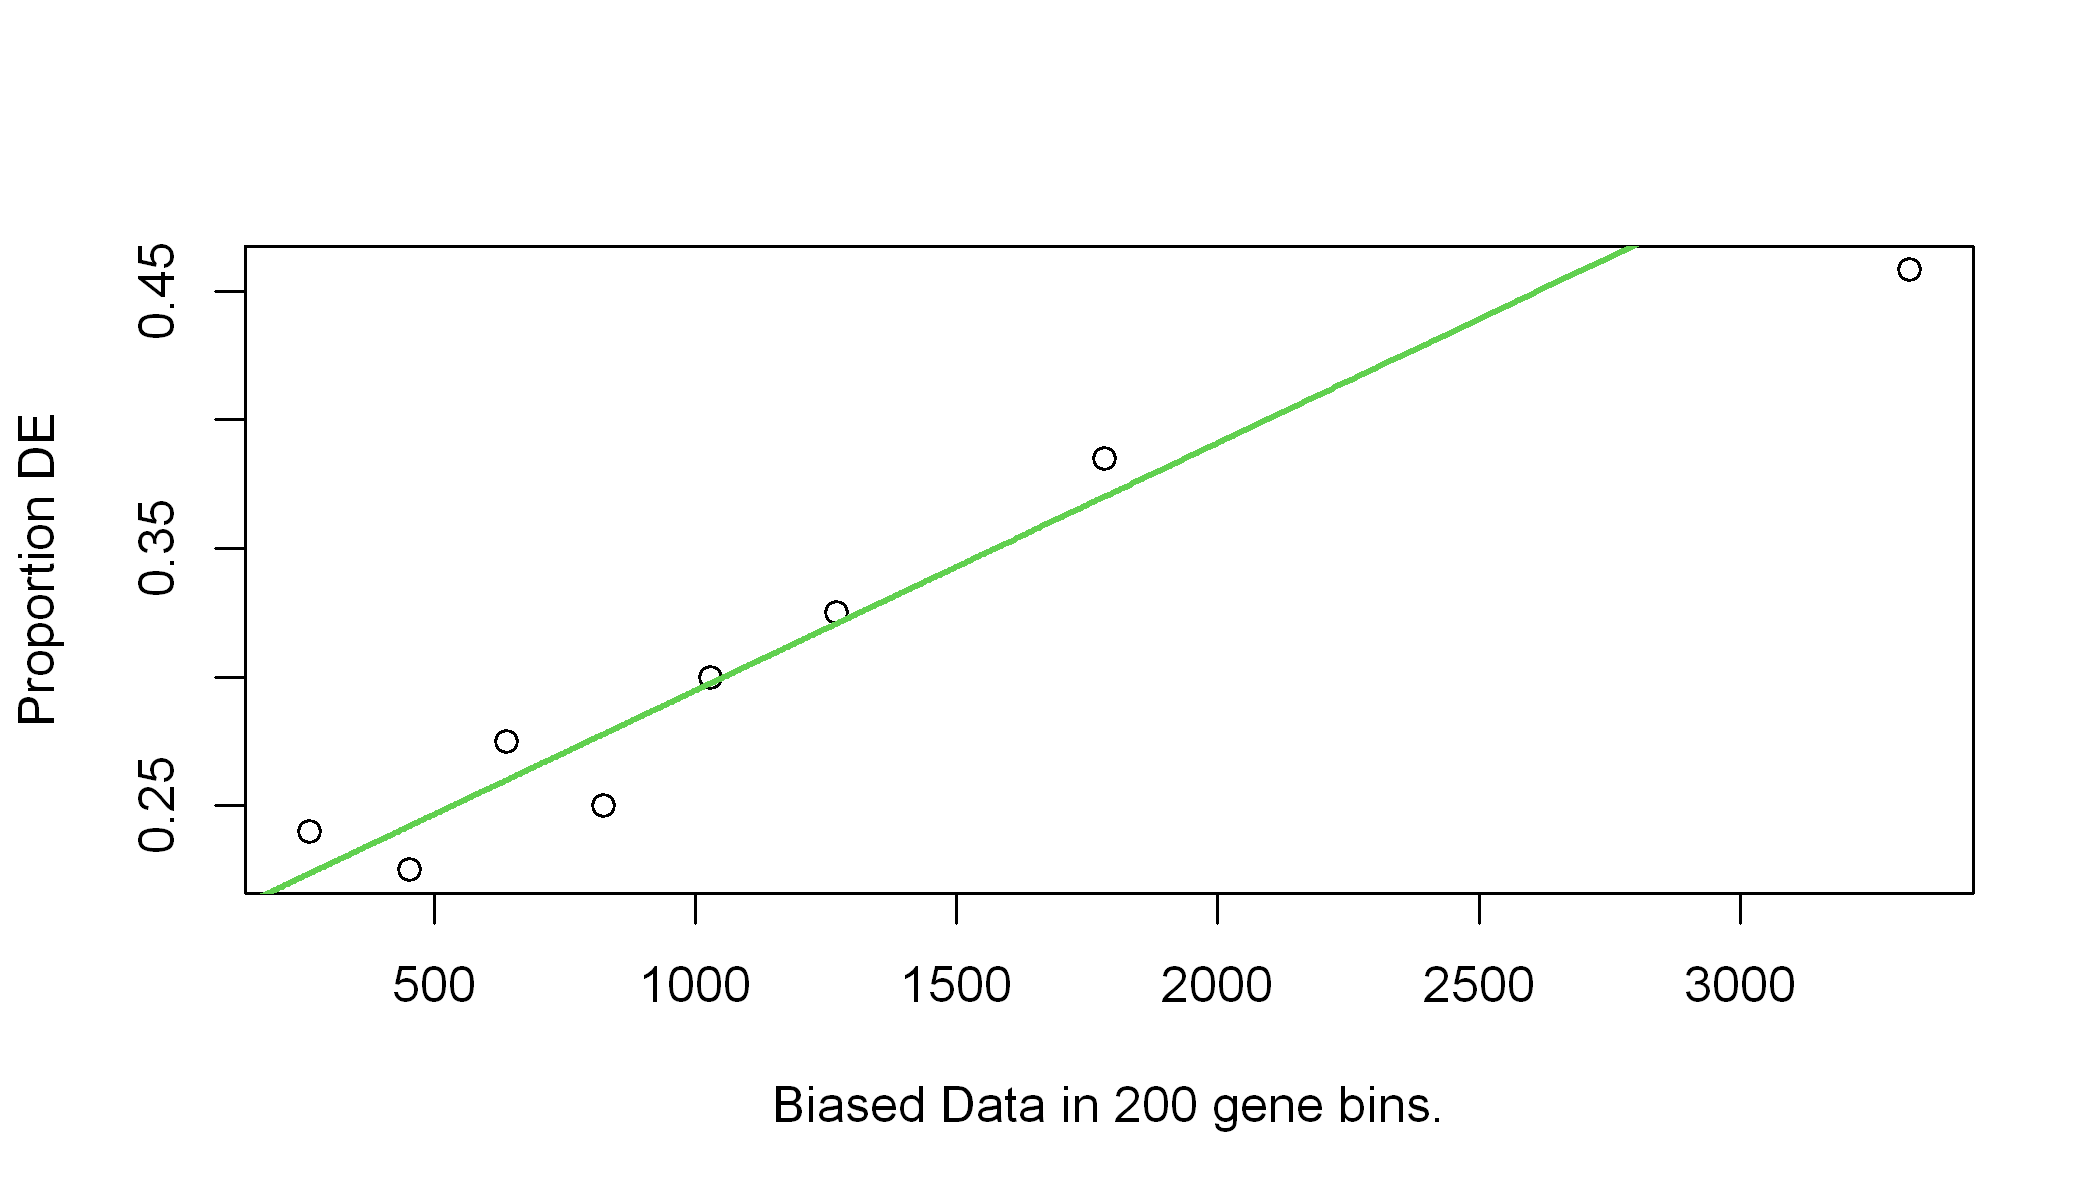

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


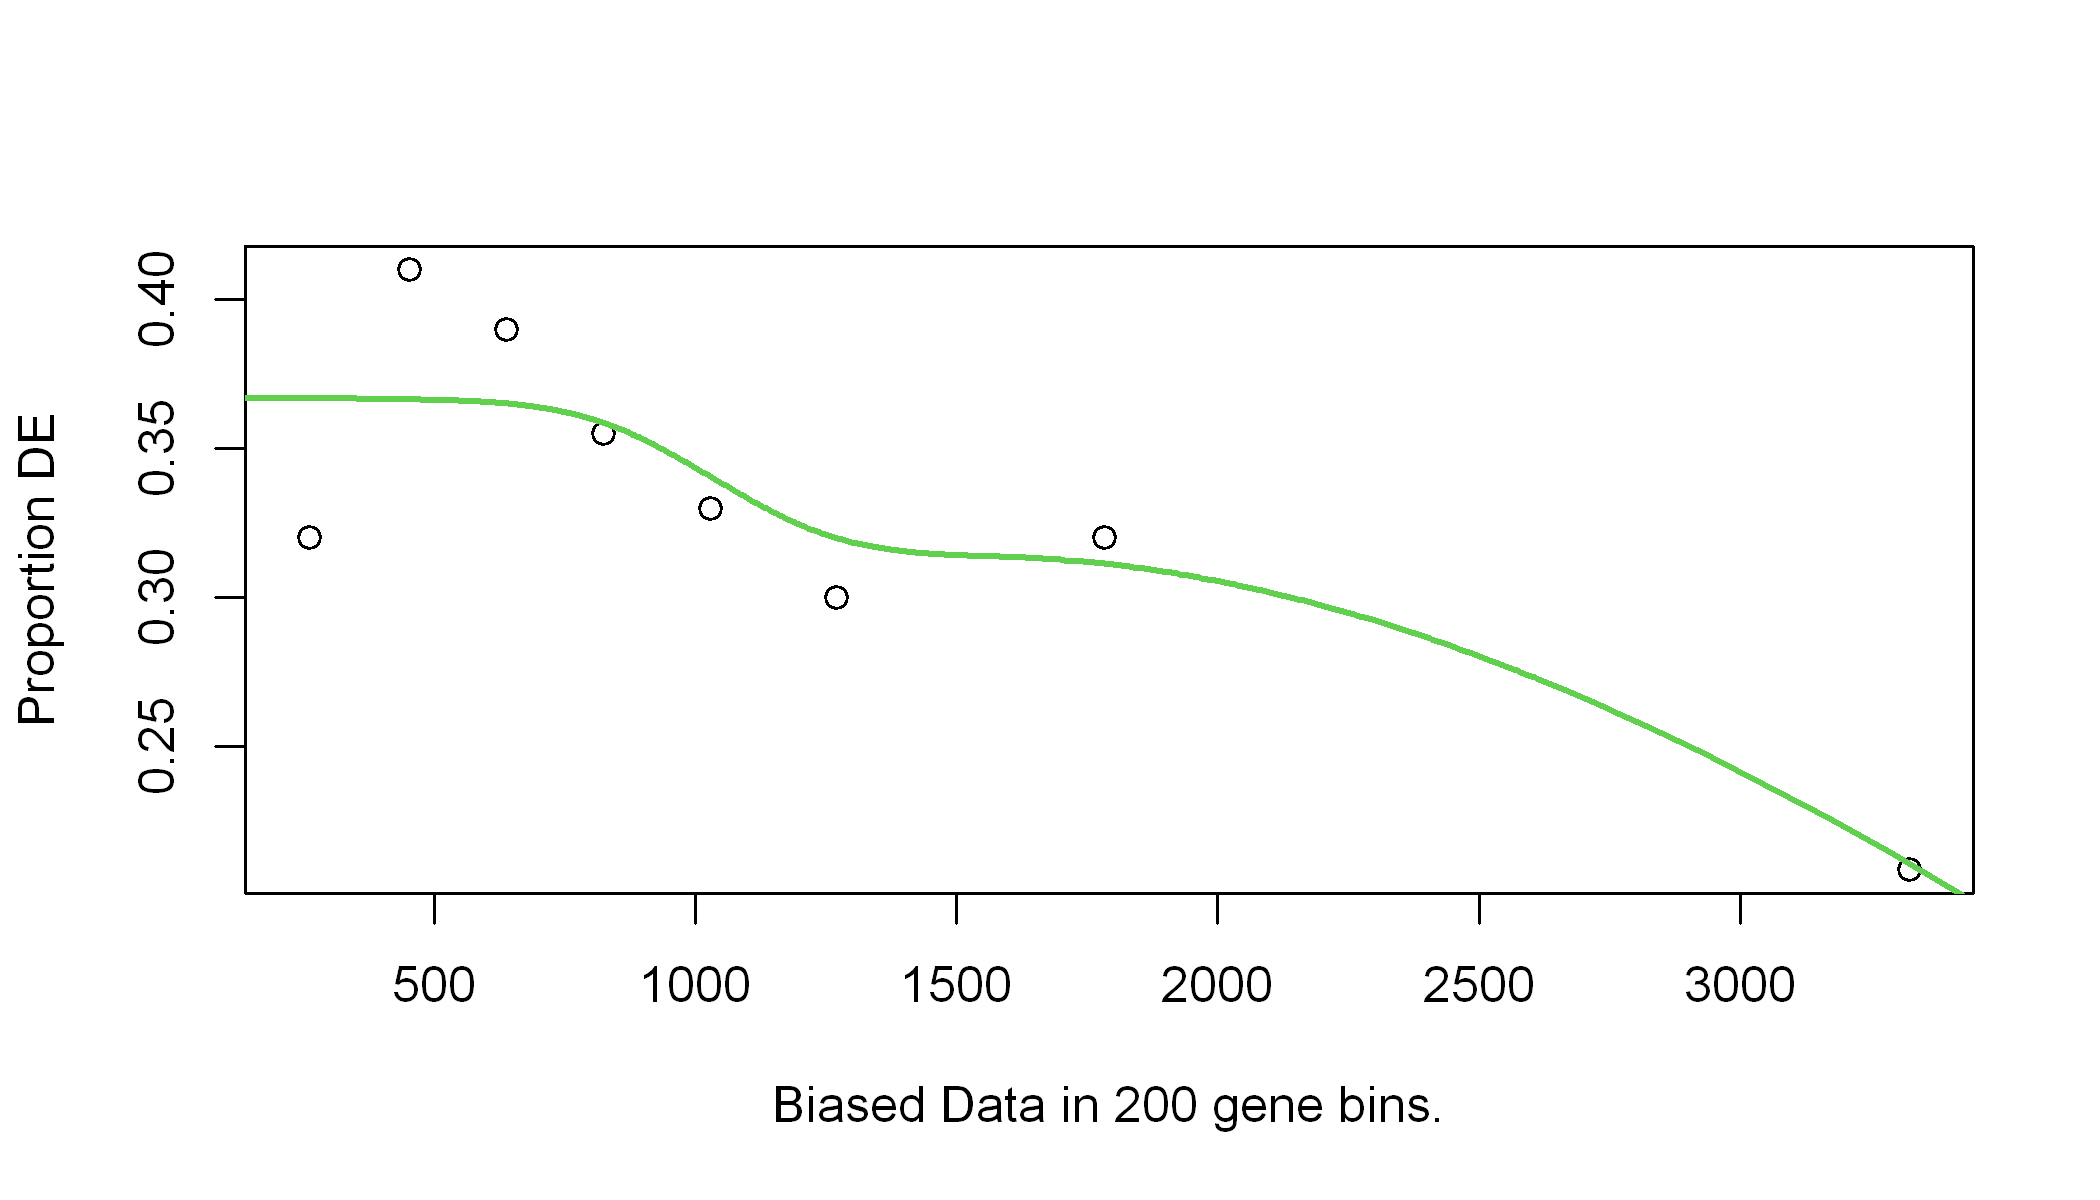

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


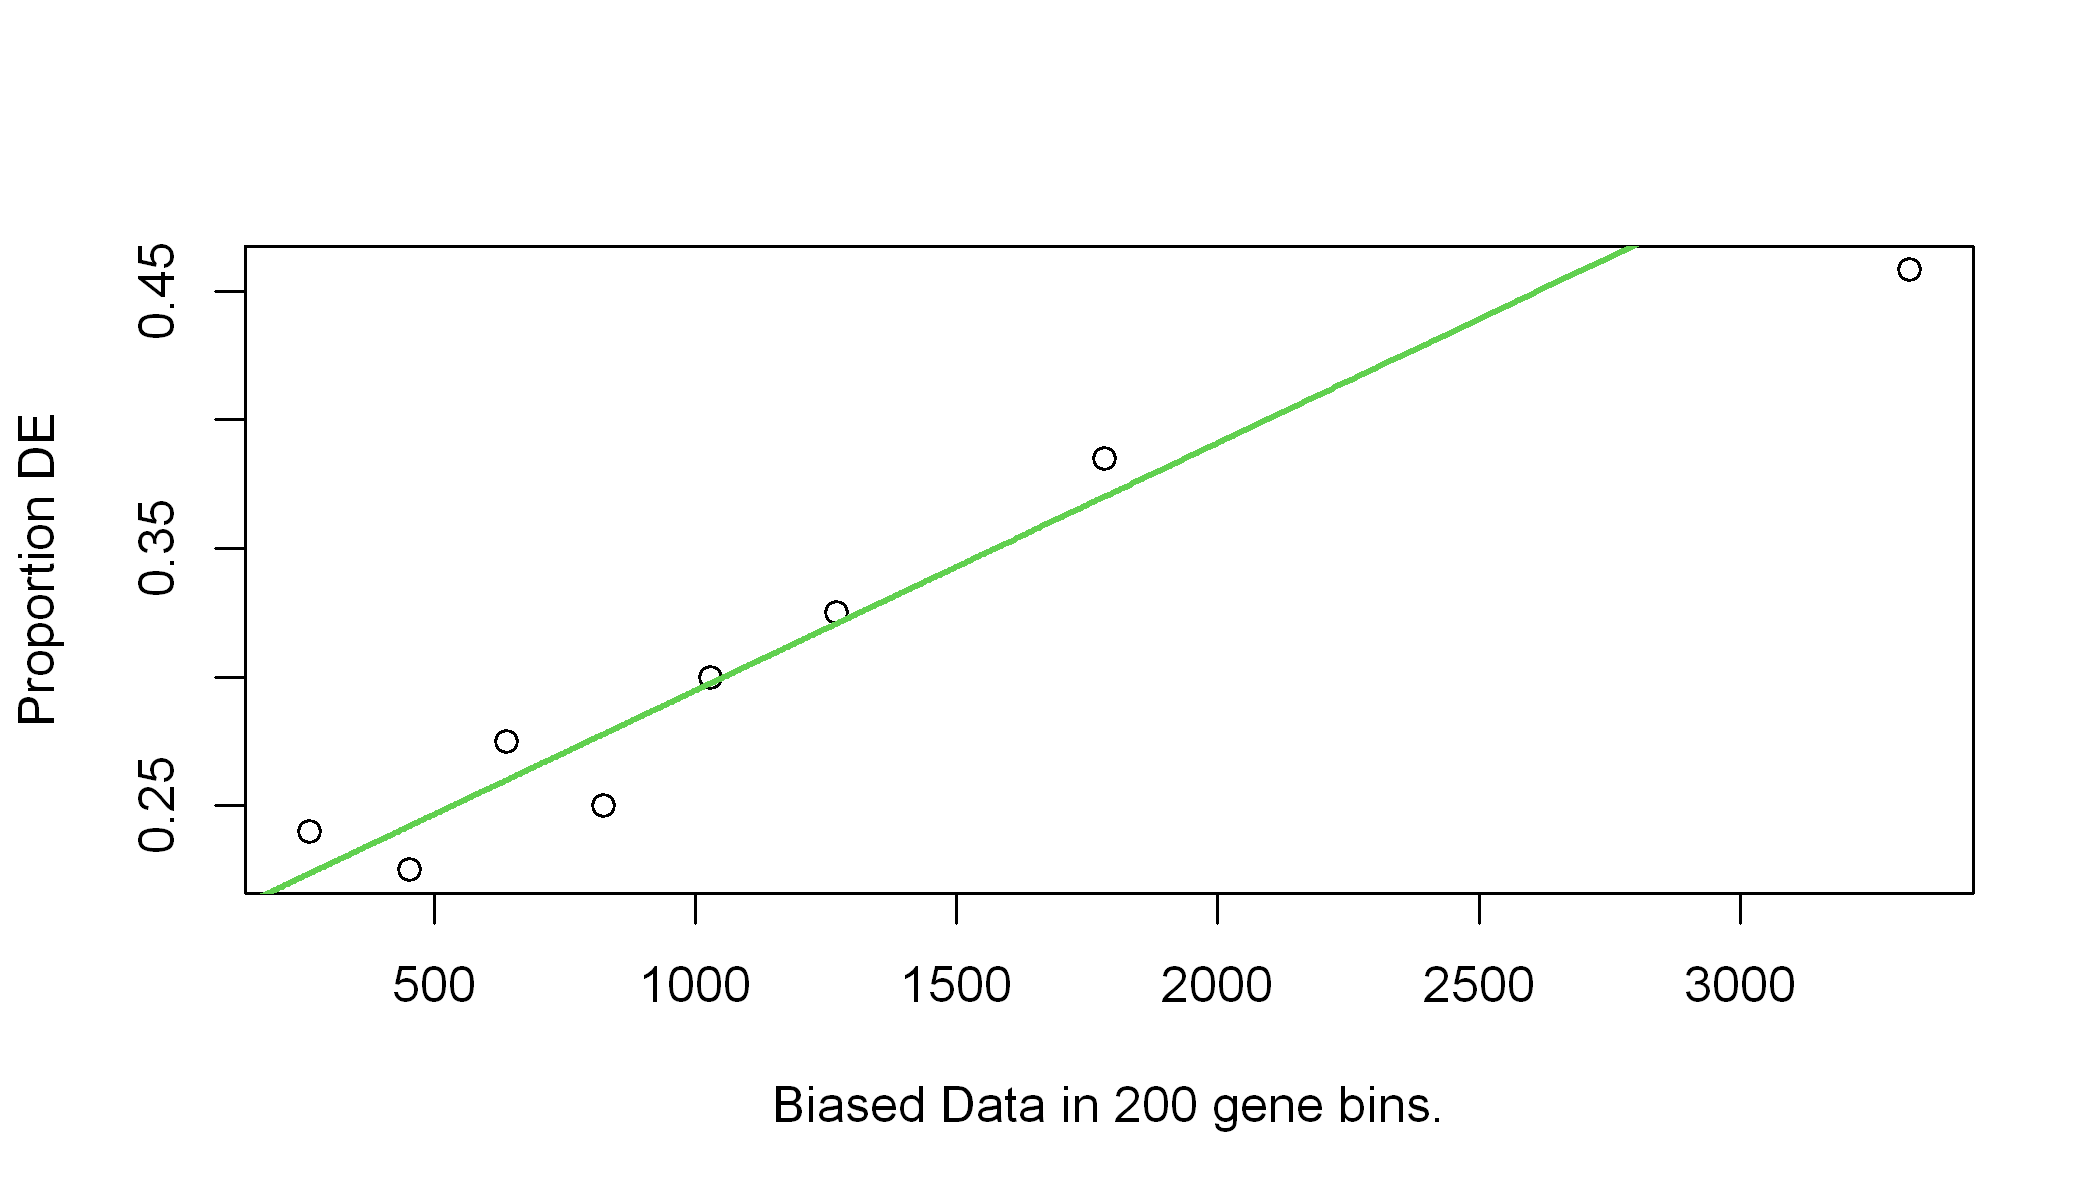

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


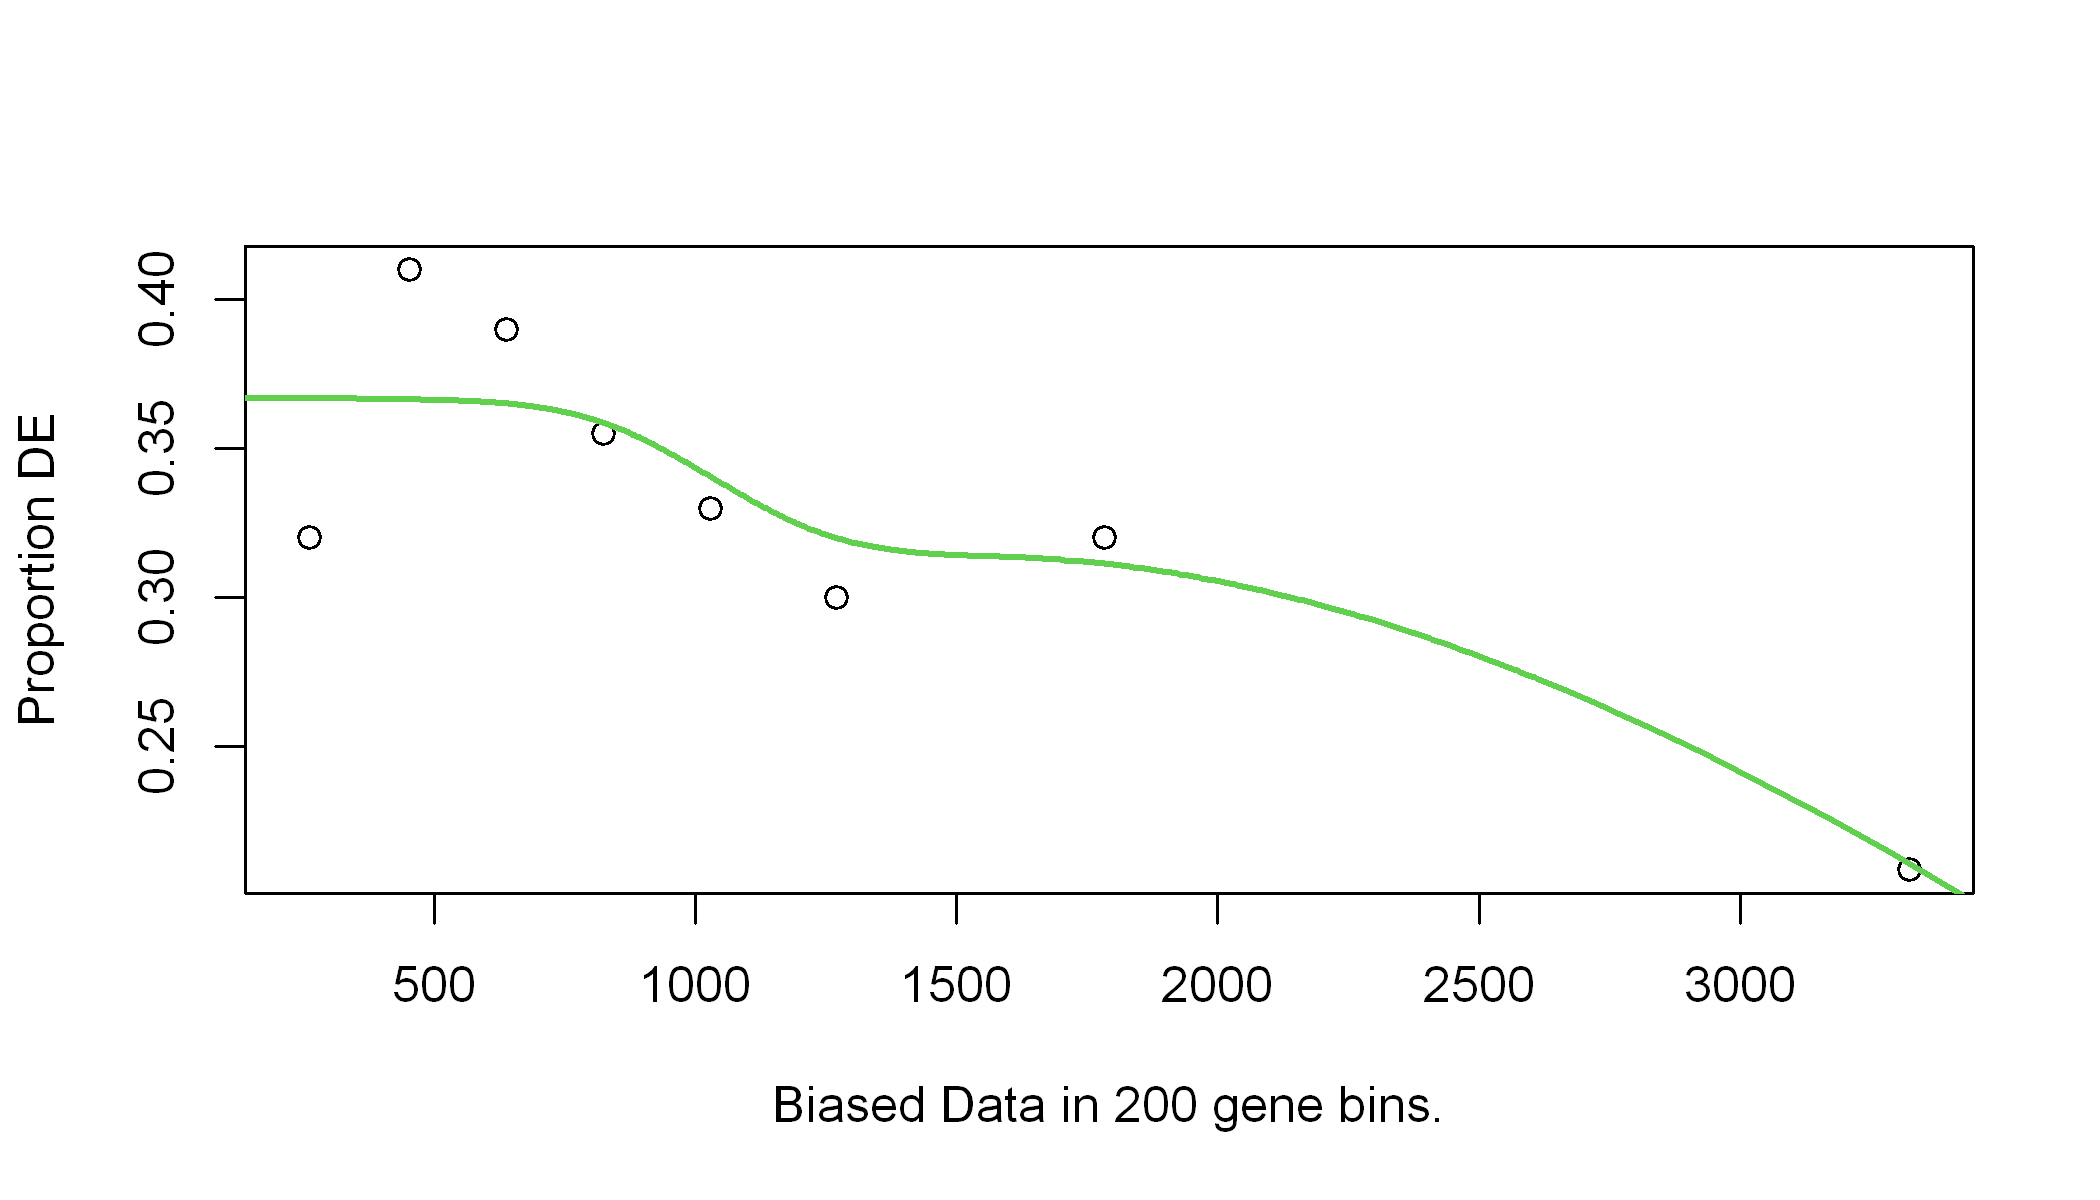

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


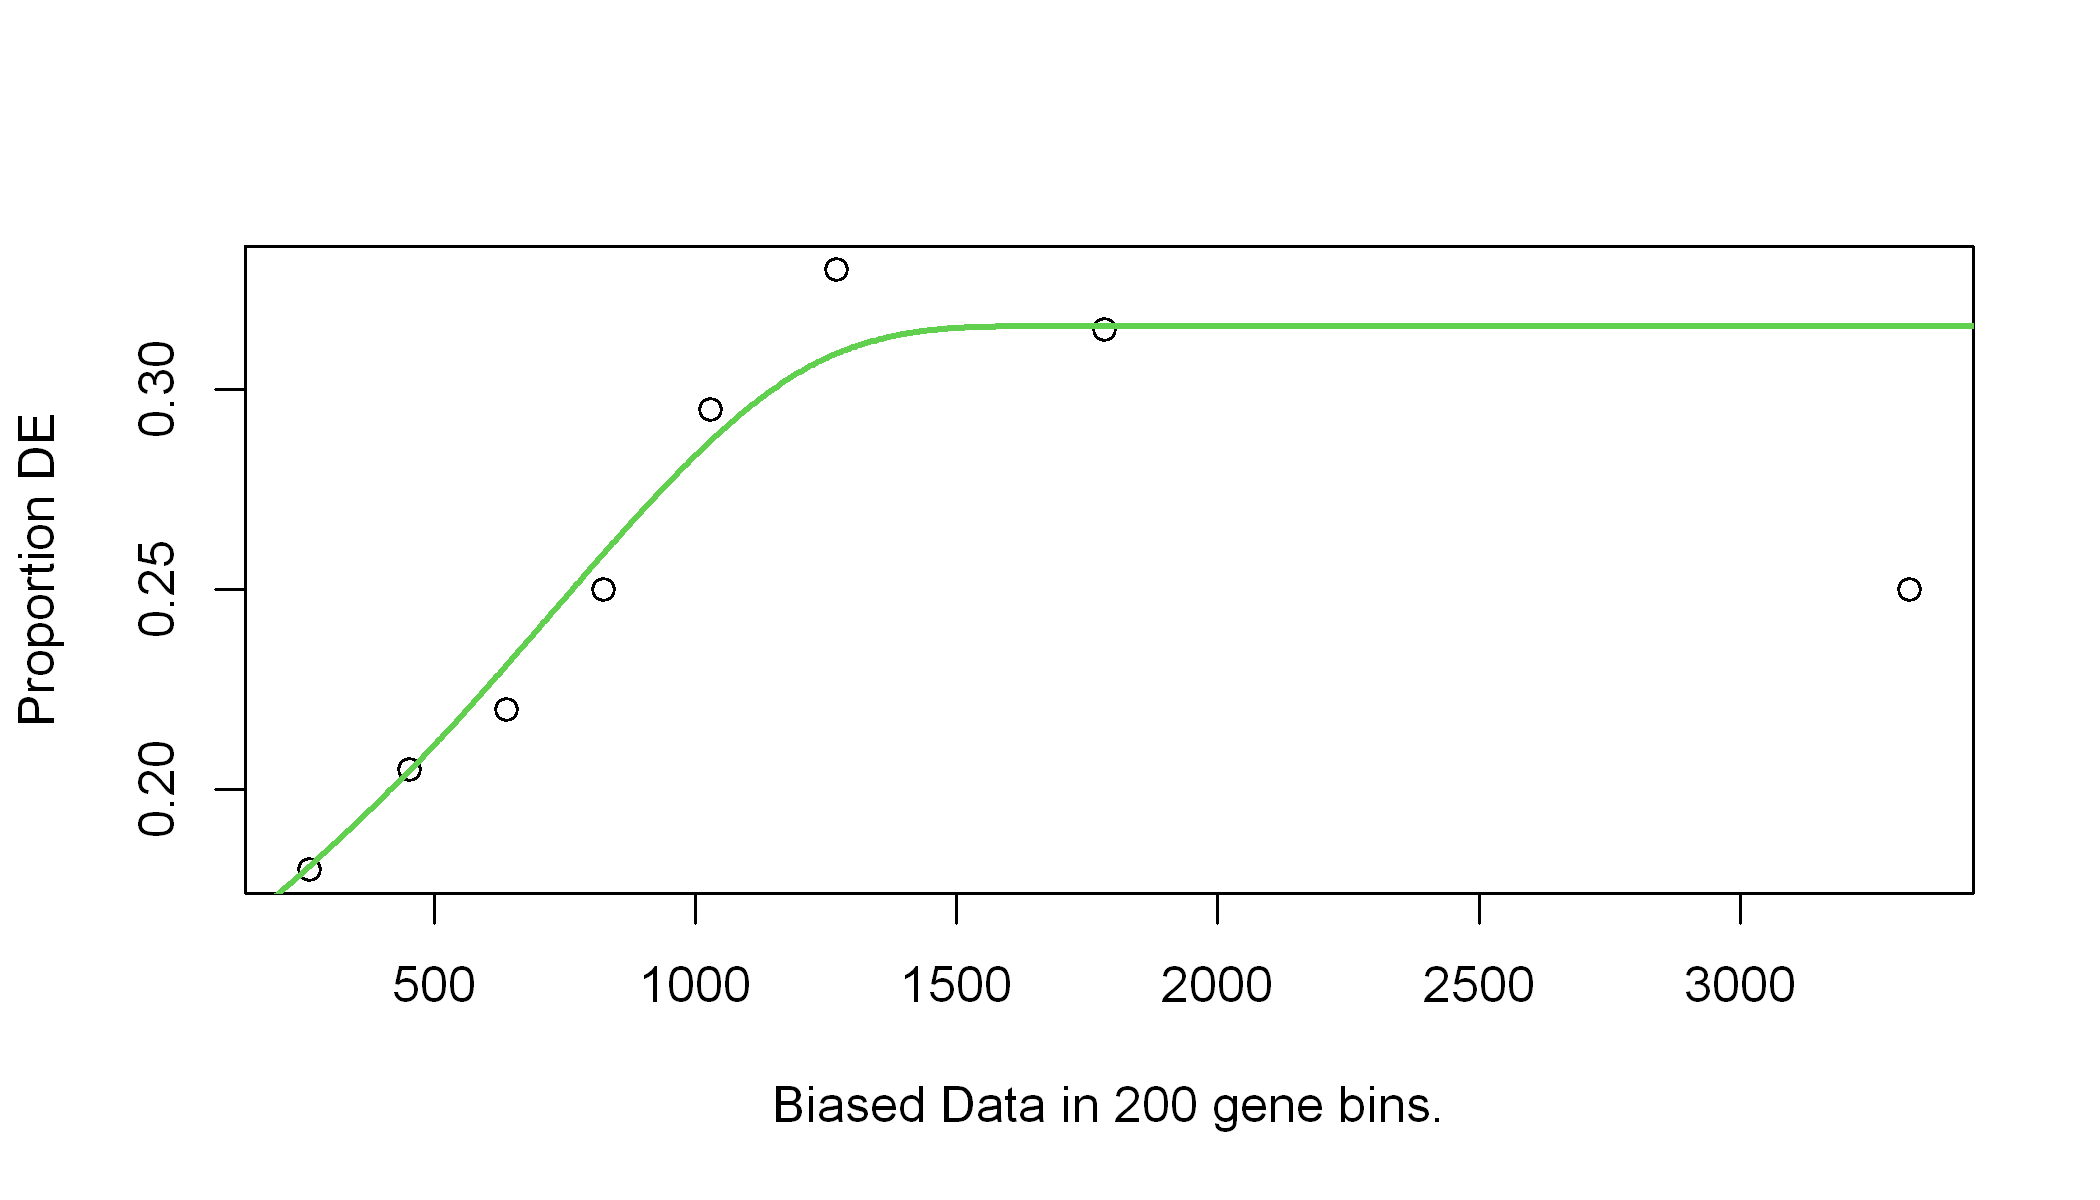

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


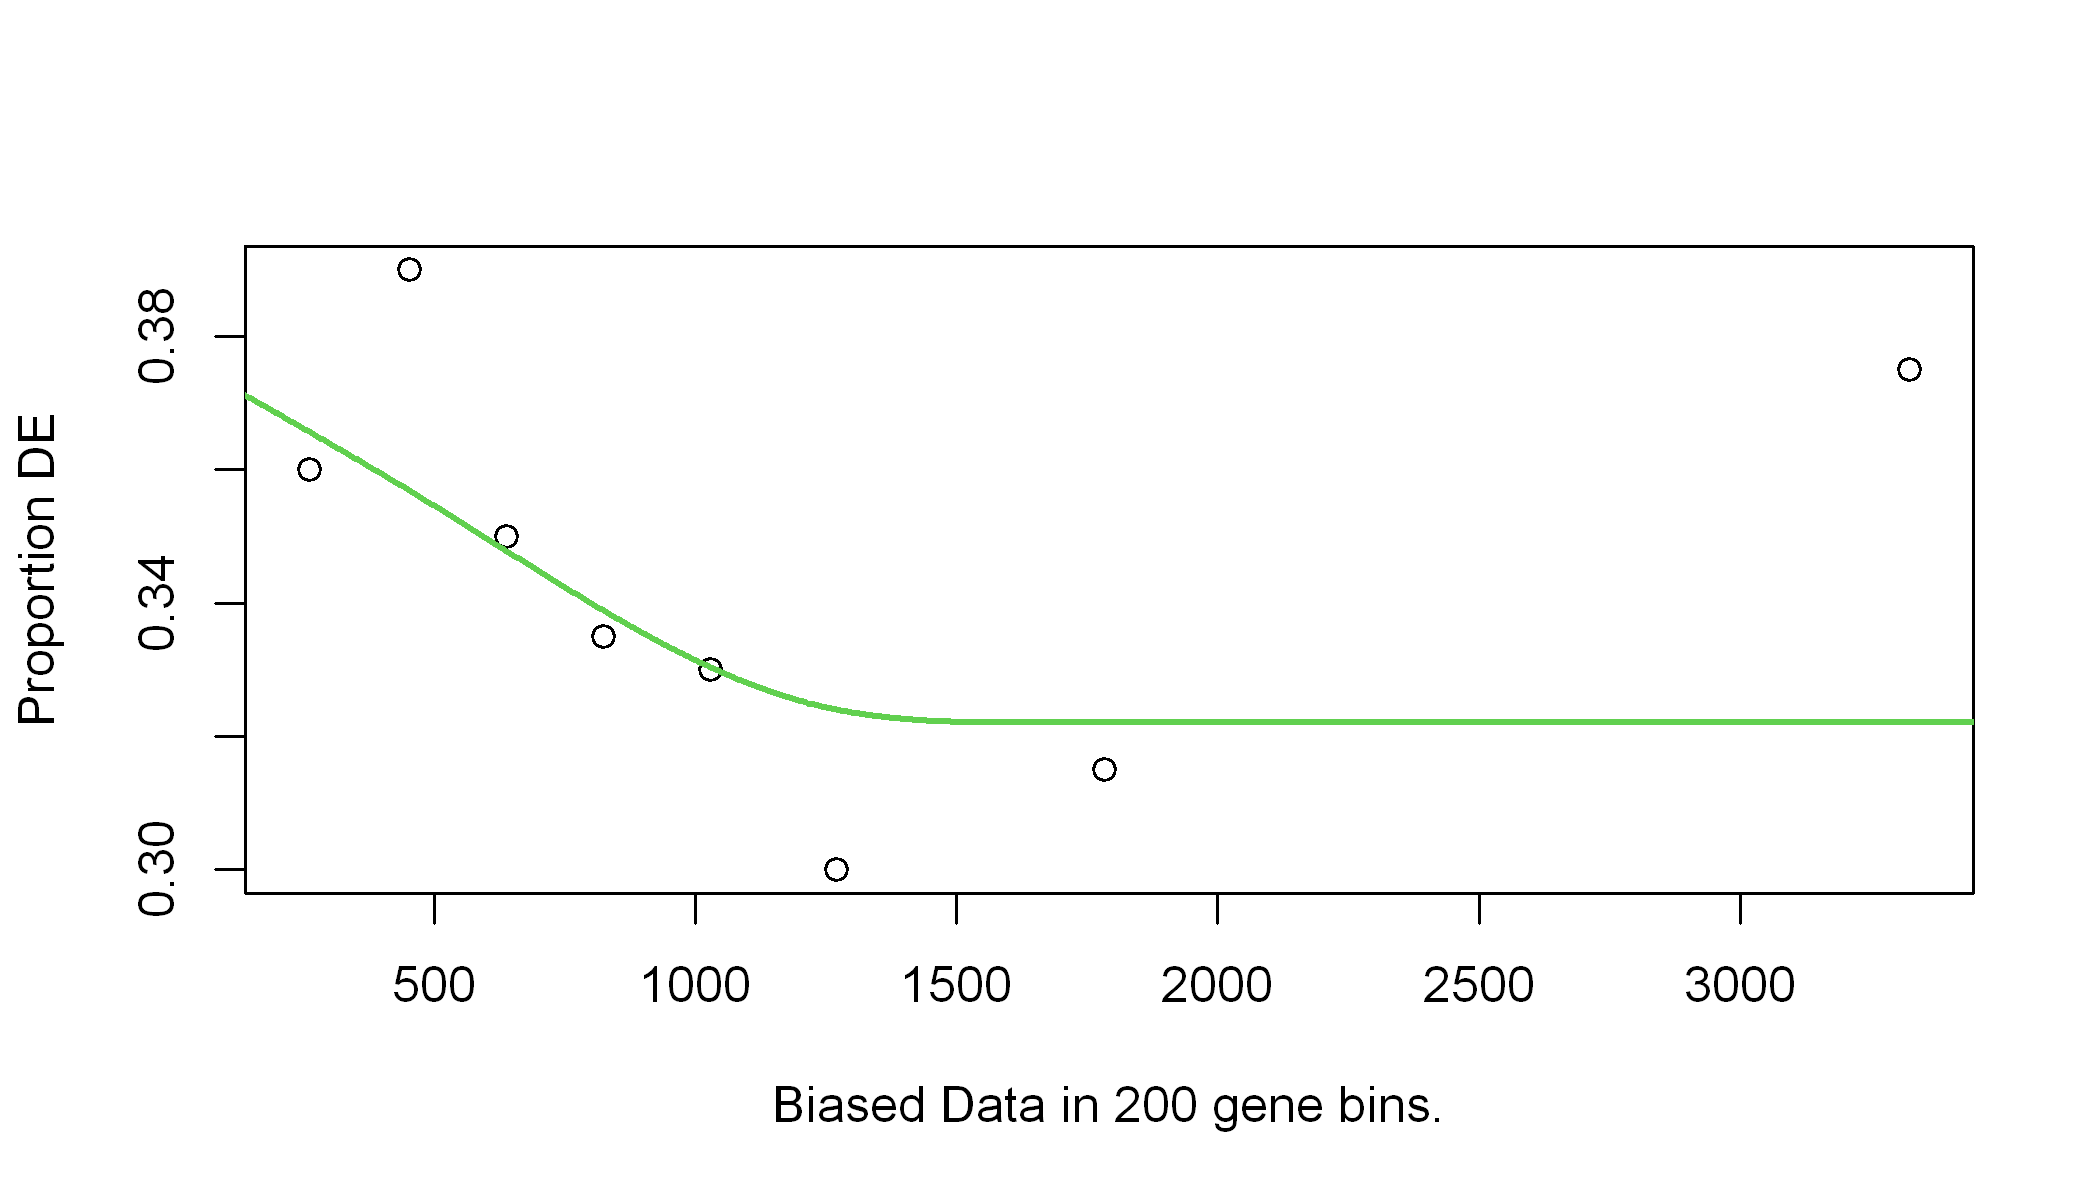

Using manually entered categories.

Calculating the p-values...

Joining with `by = join_by(category)`


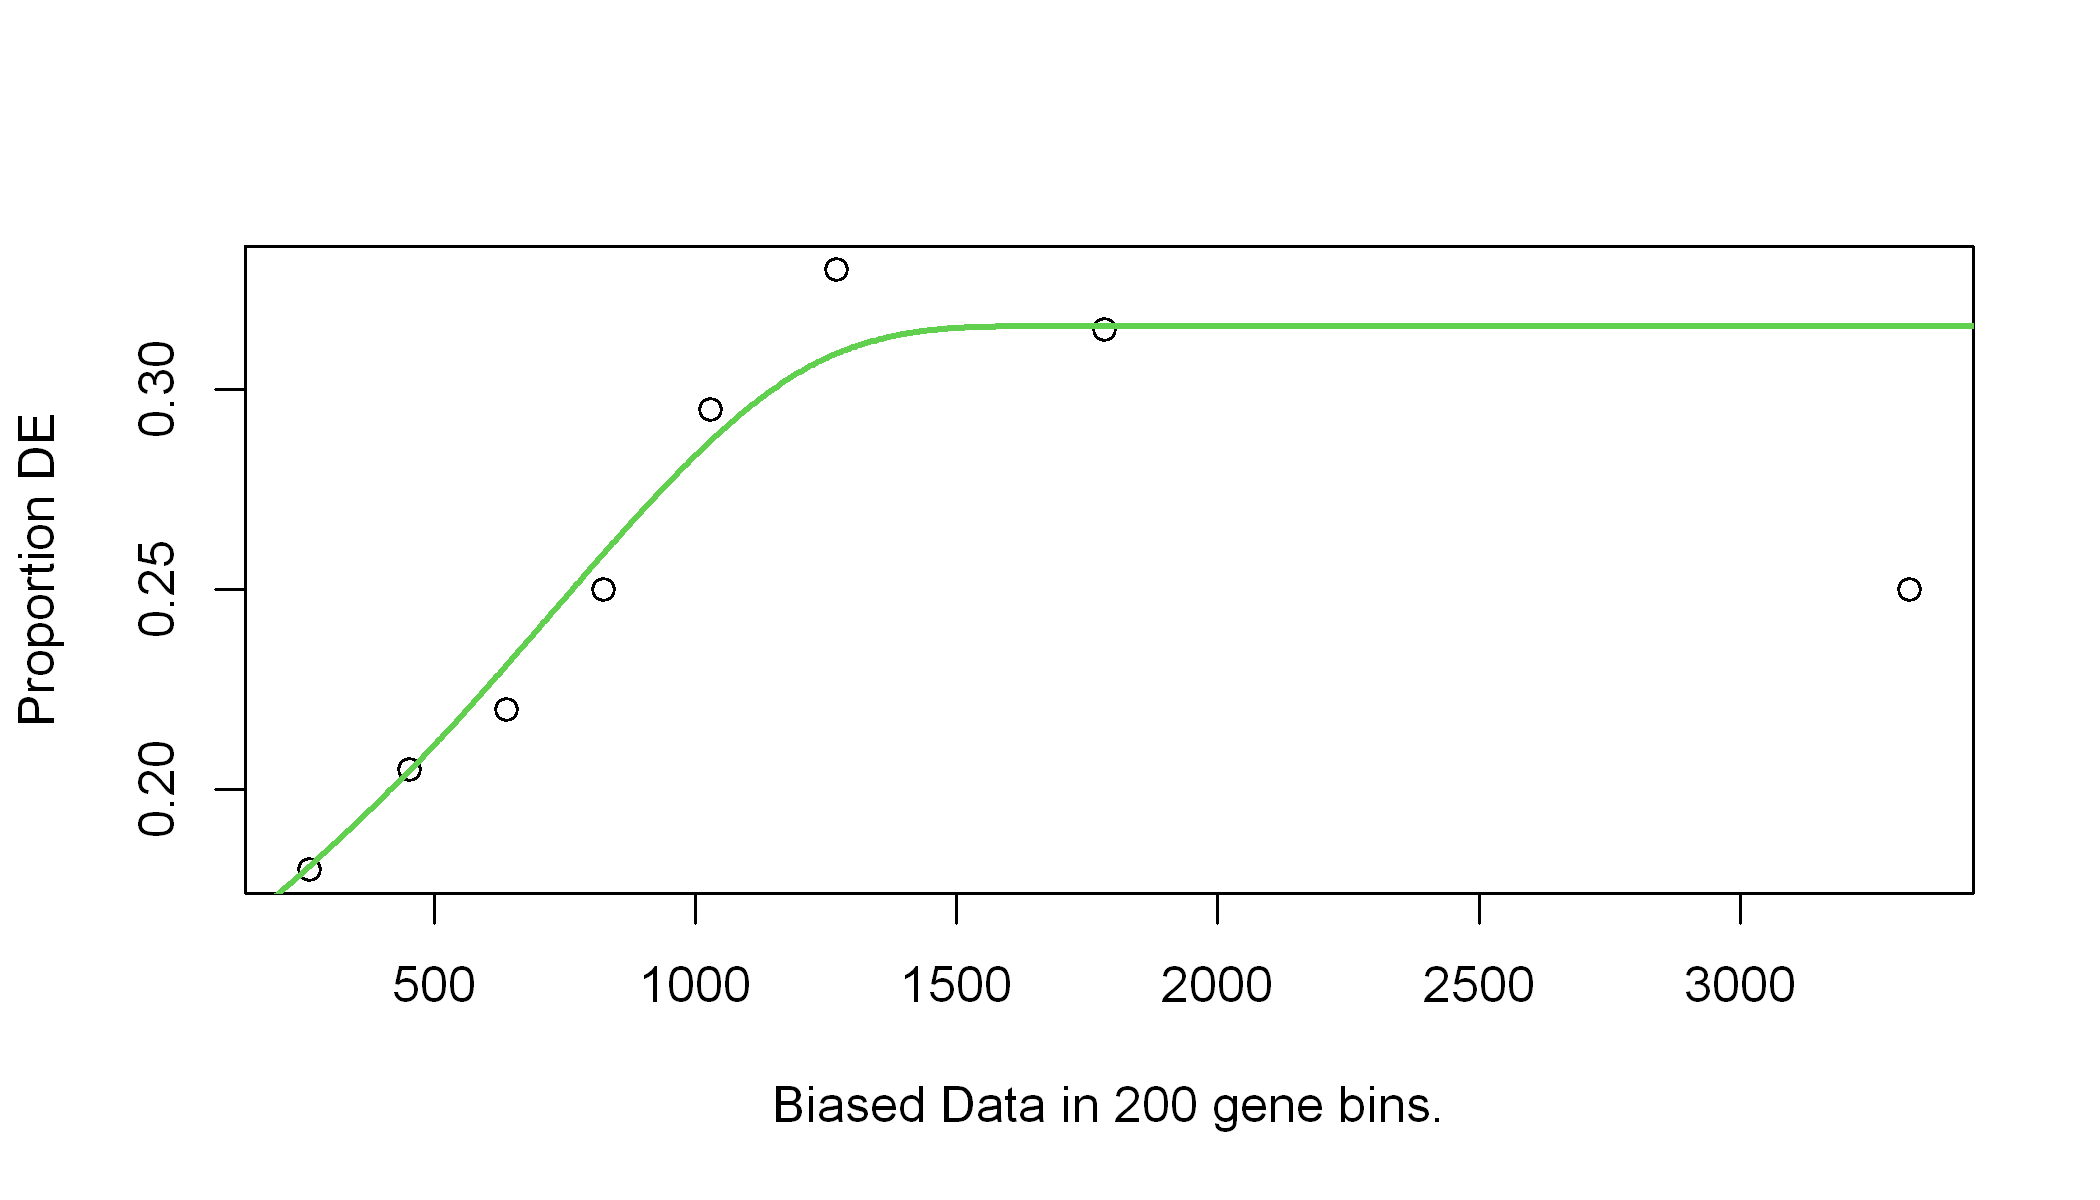

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


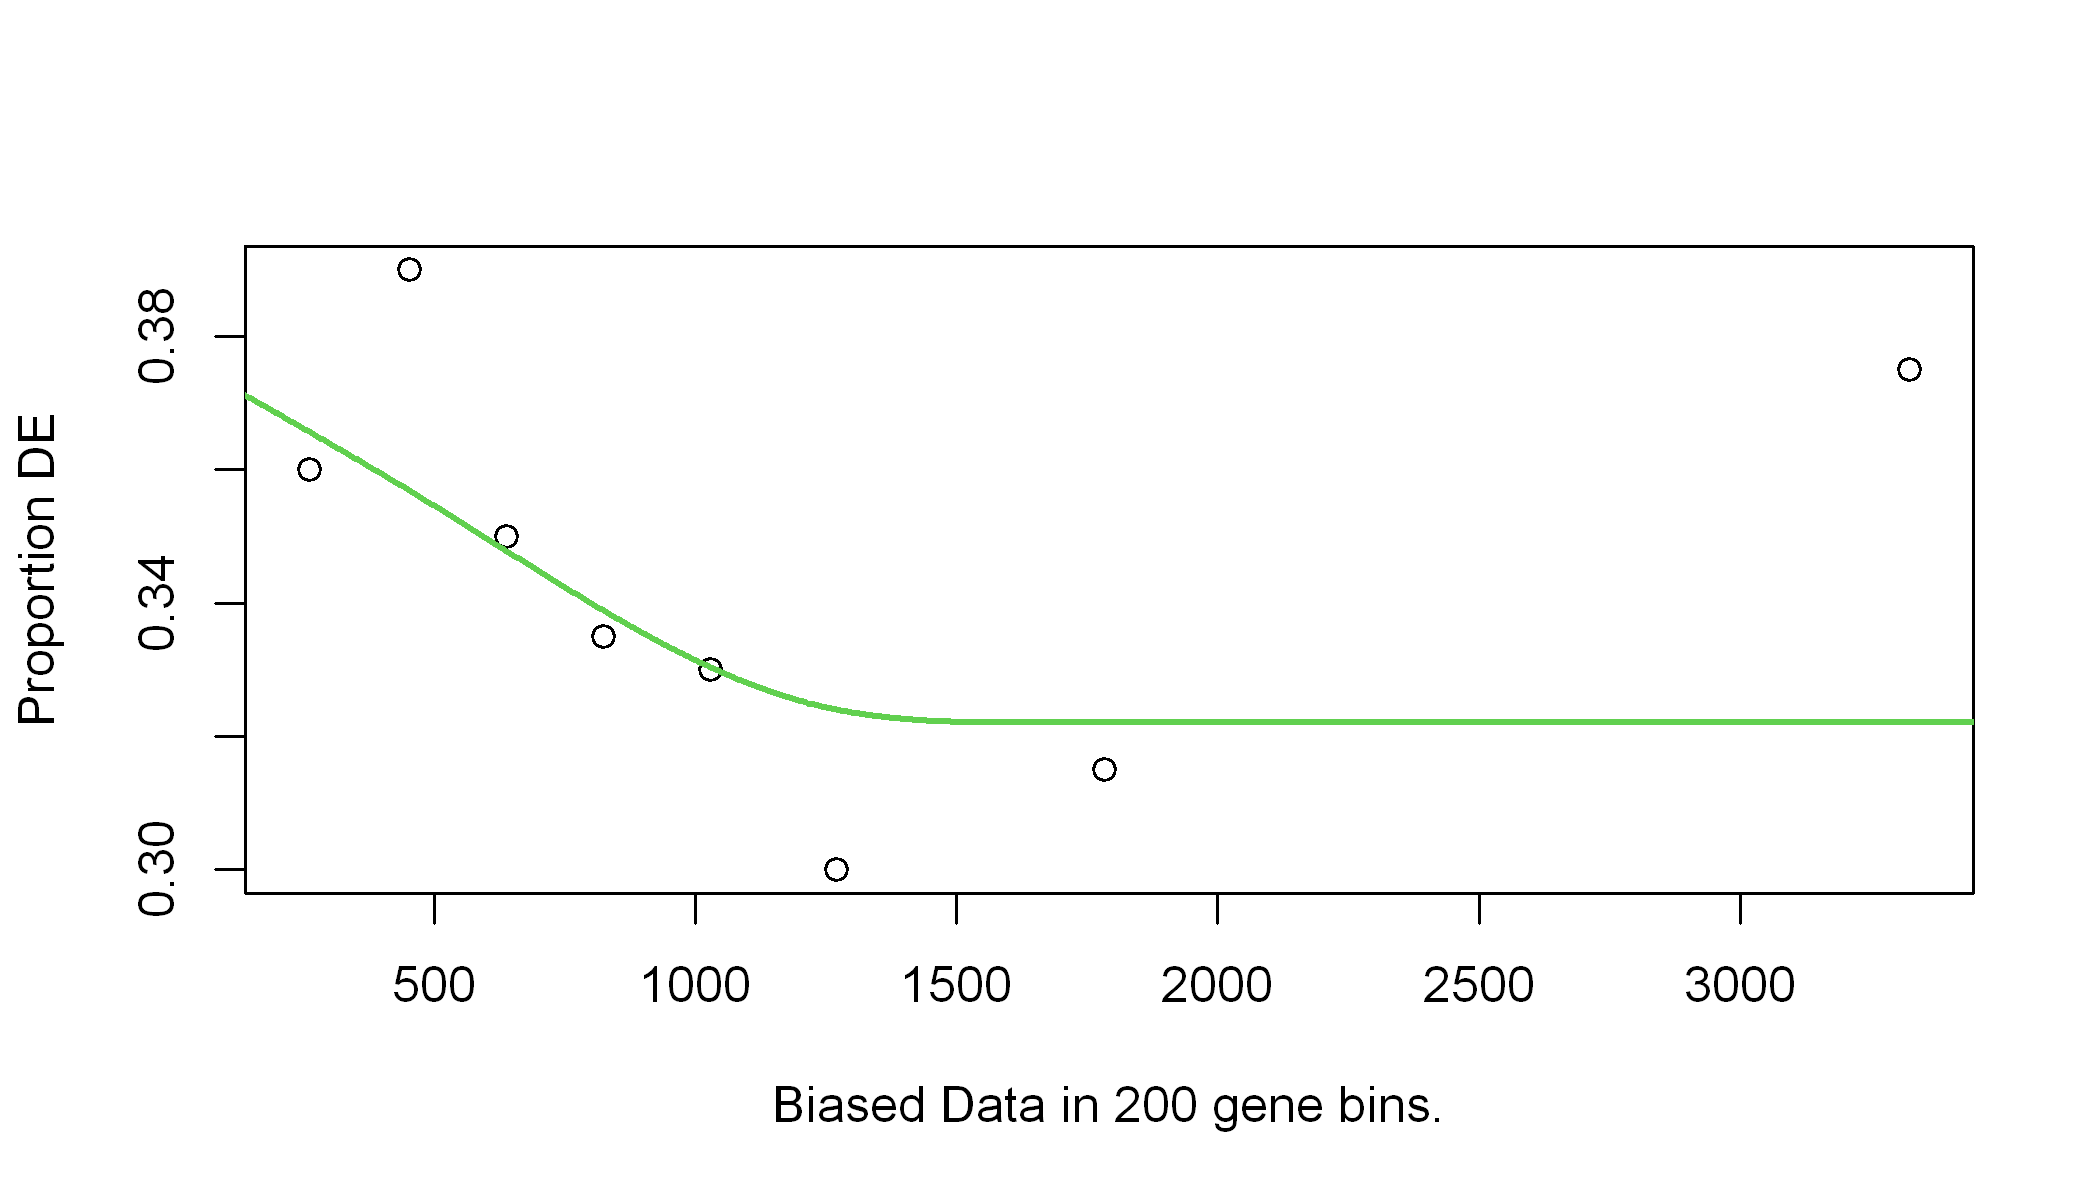

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


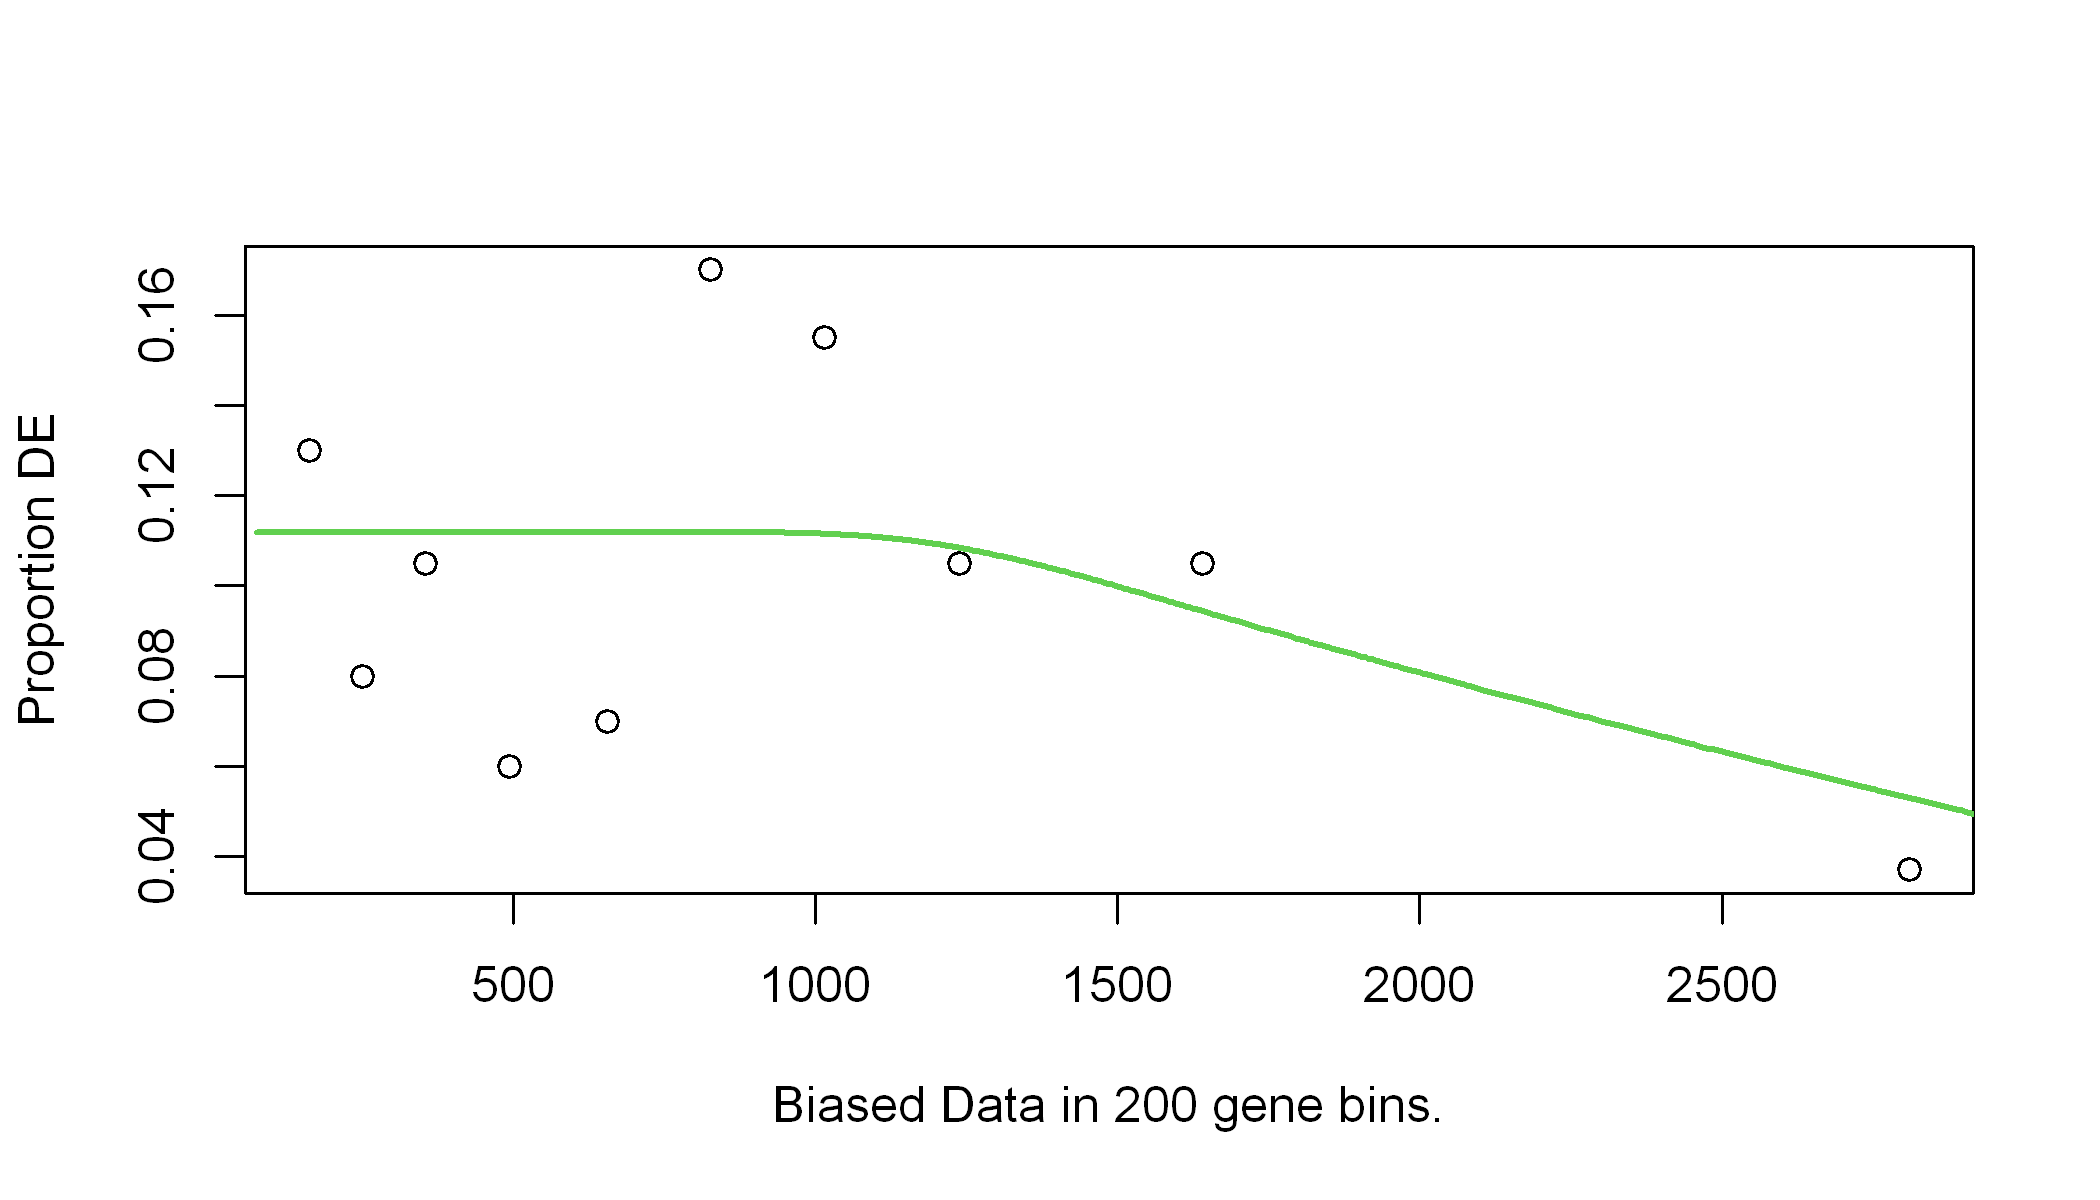

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


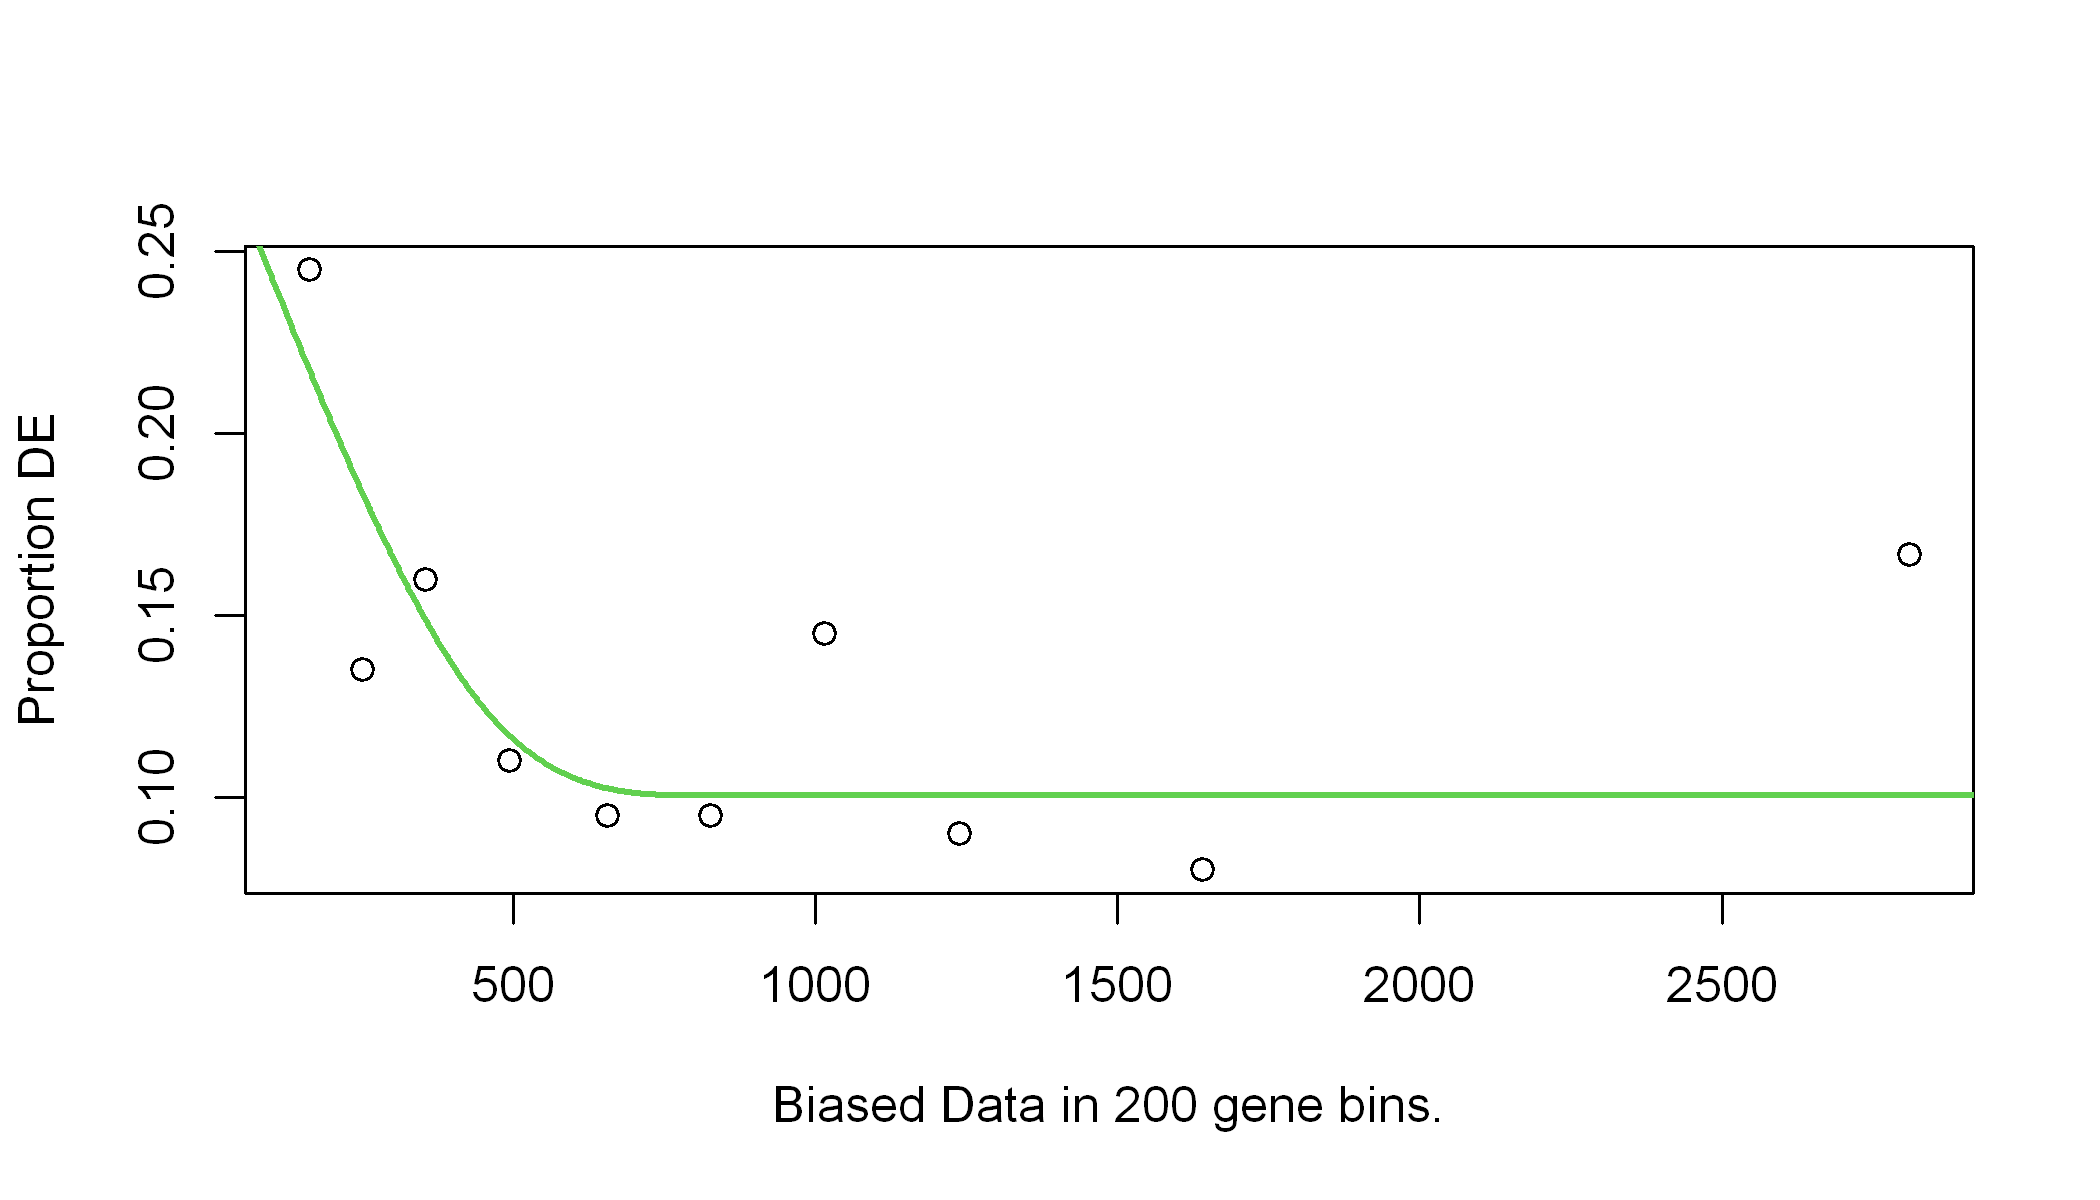

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


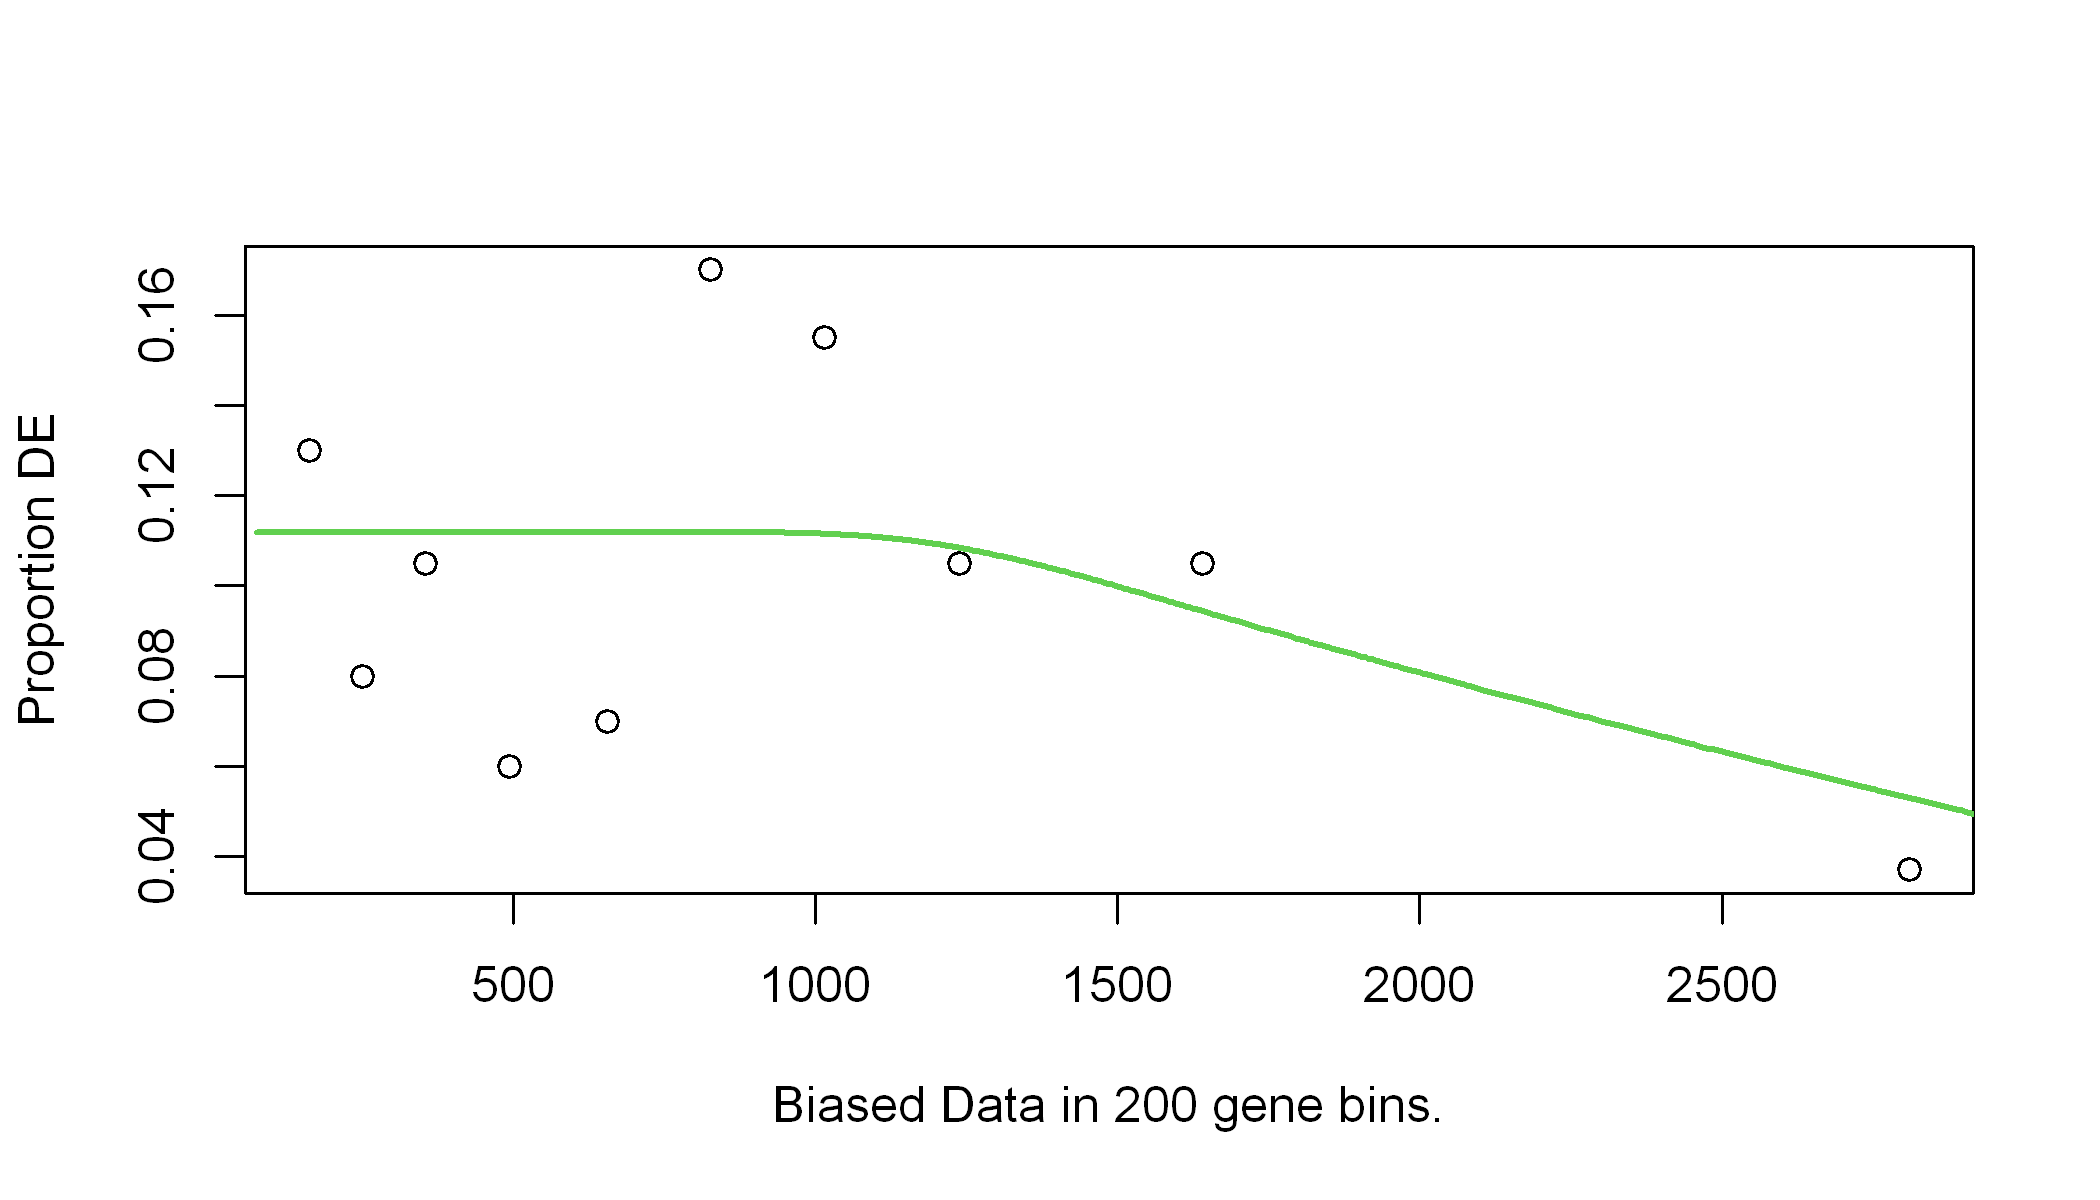

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


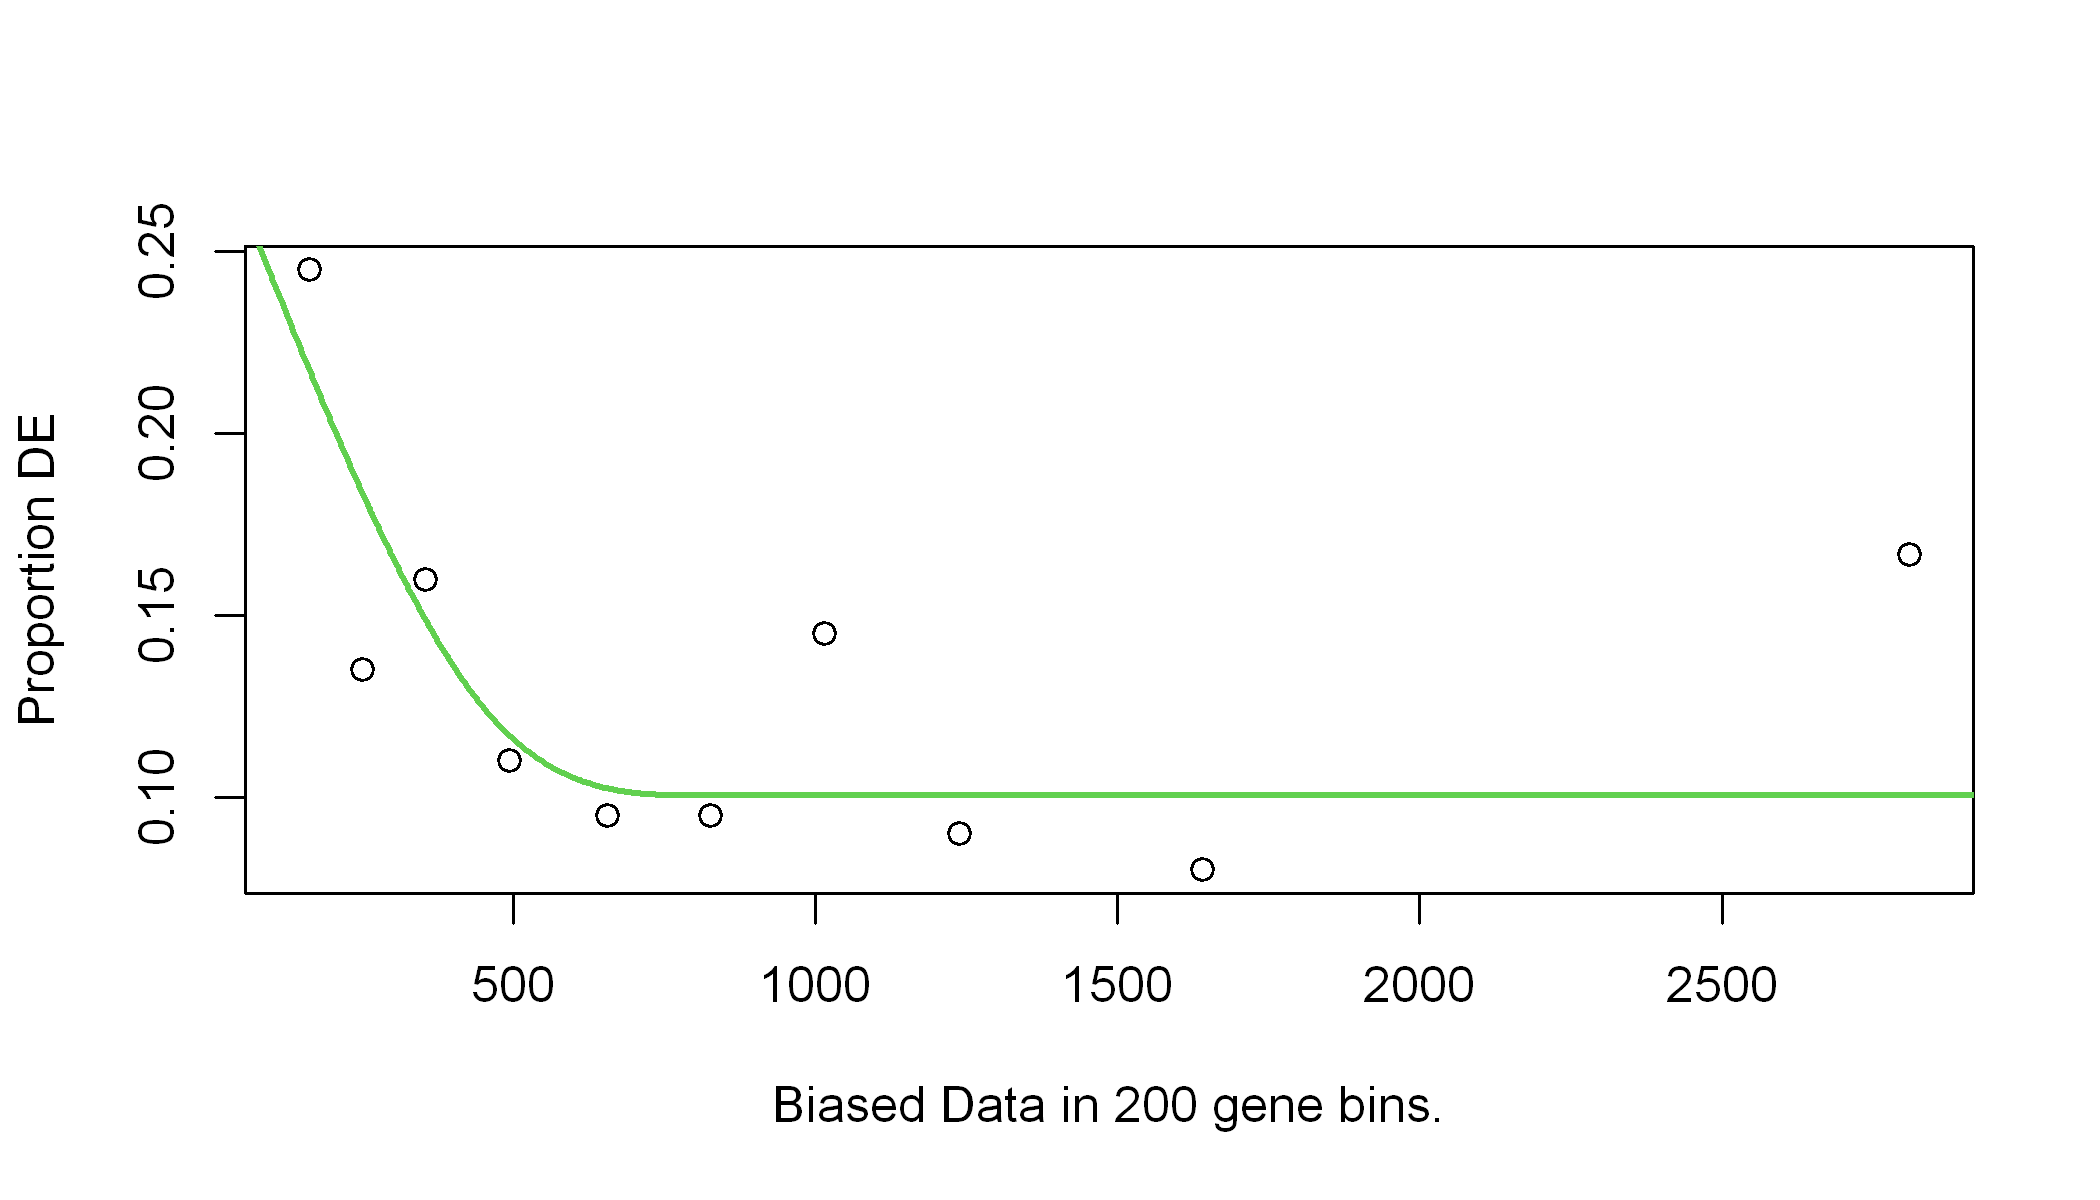

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


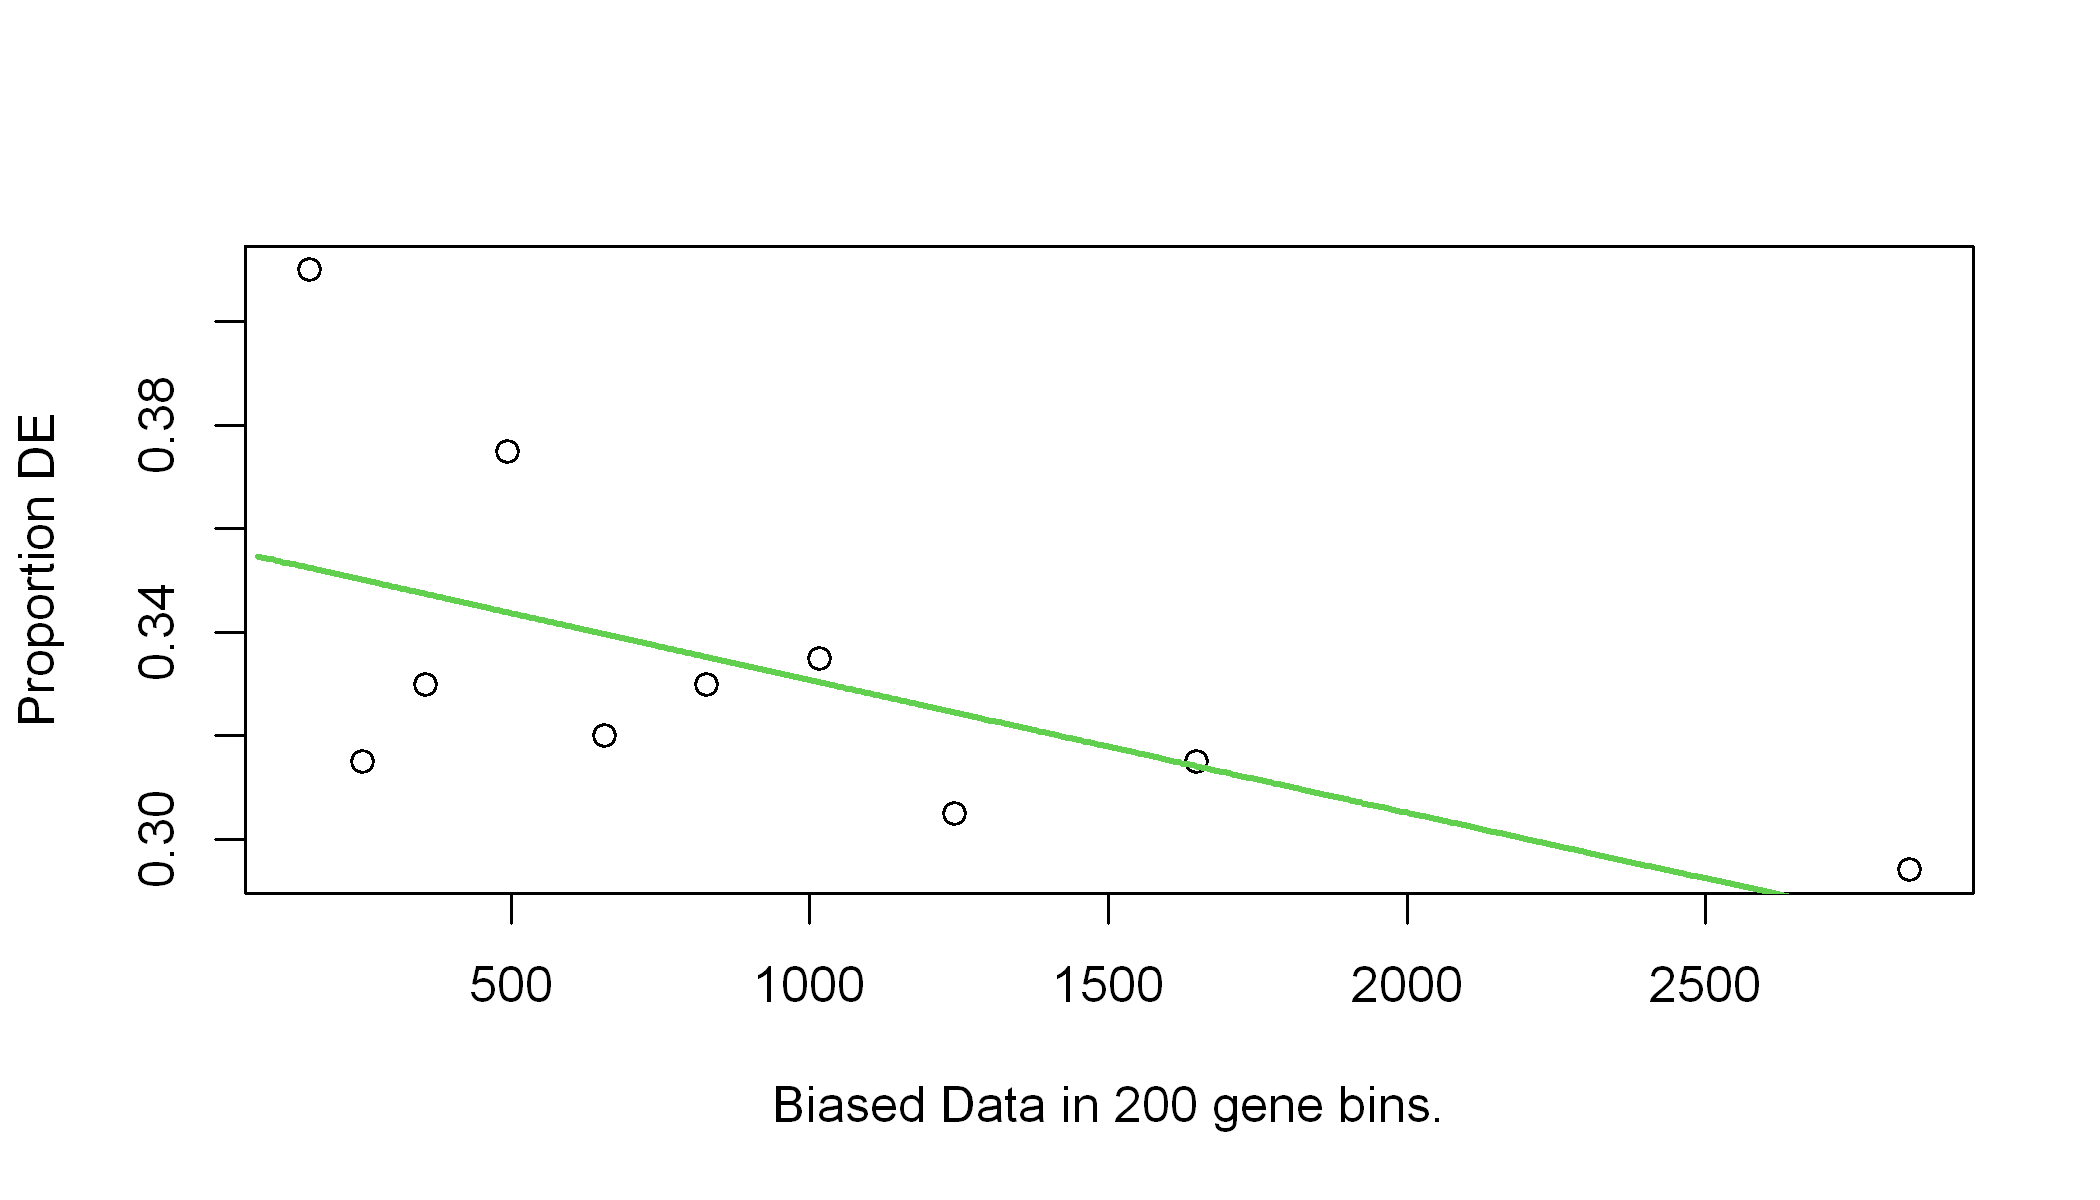

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


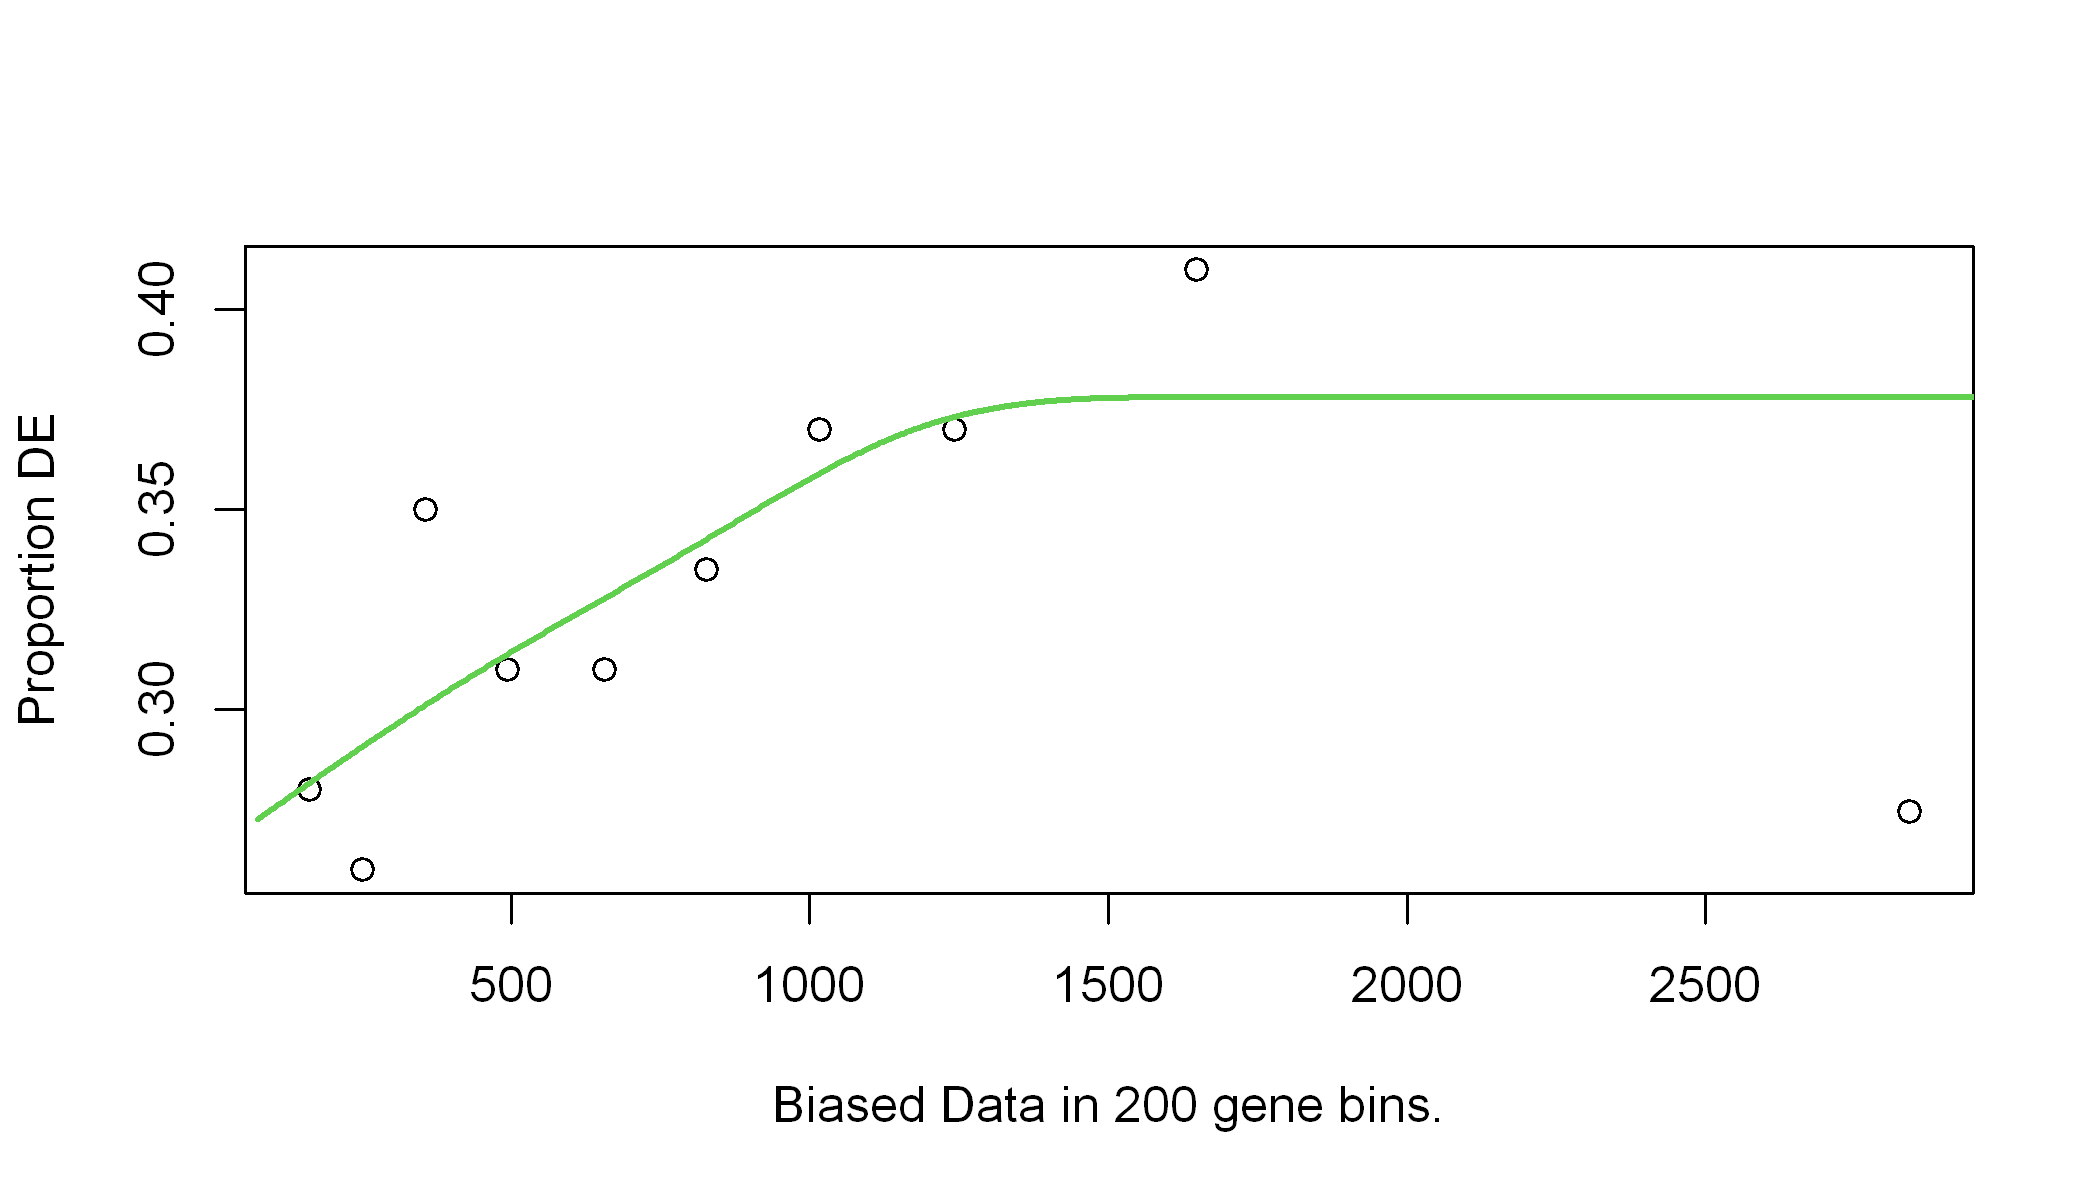

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


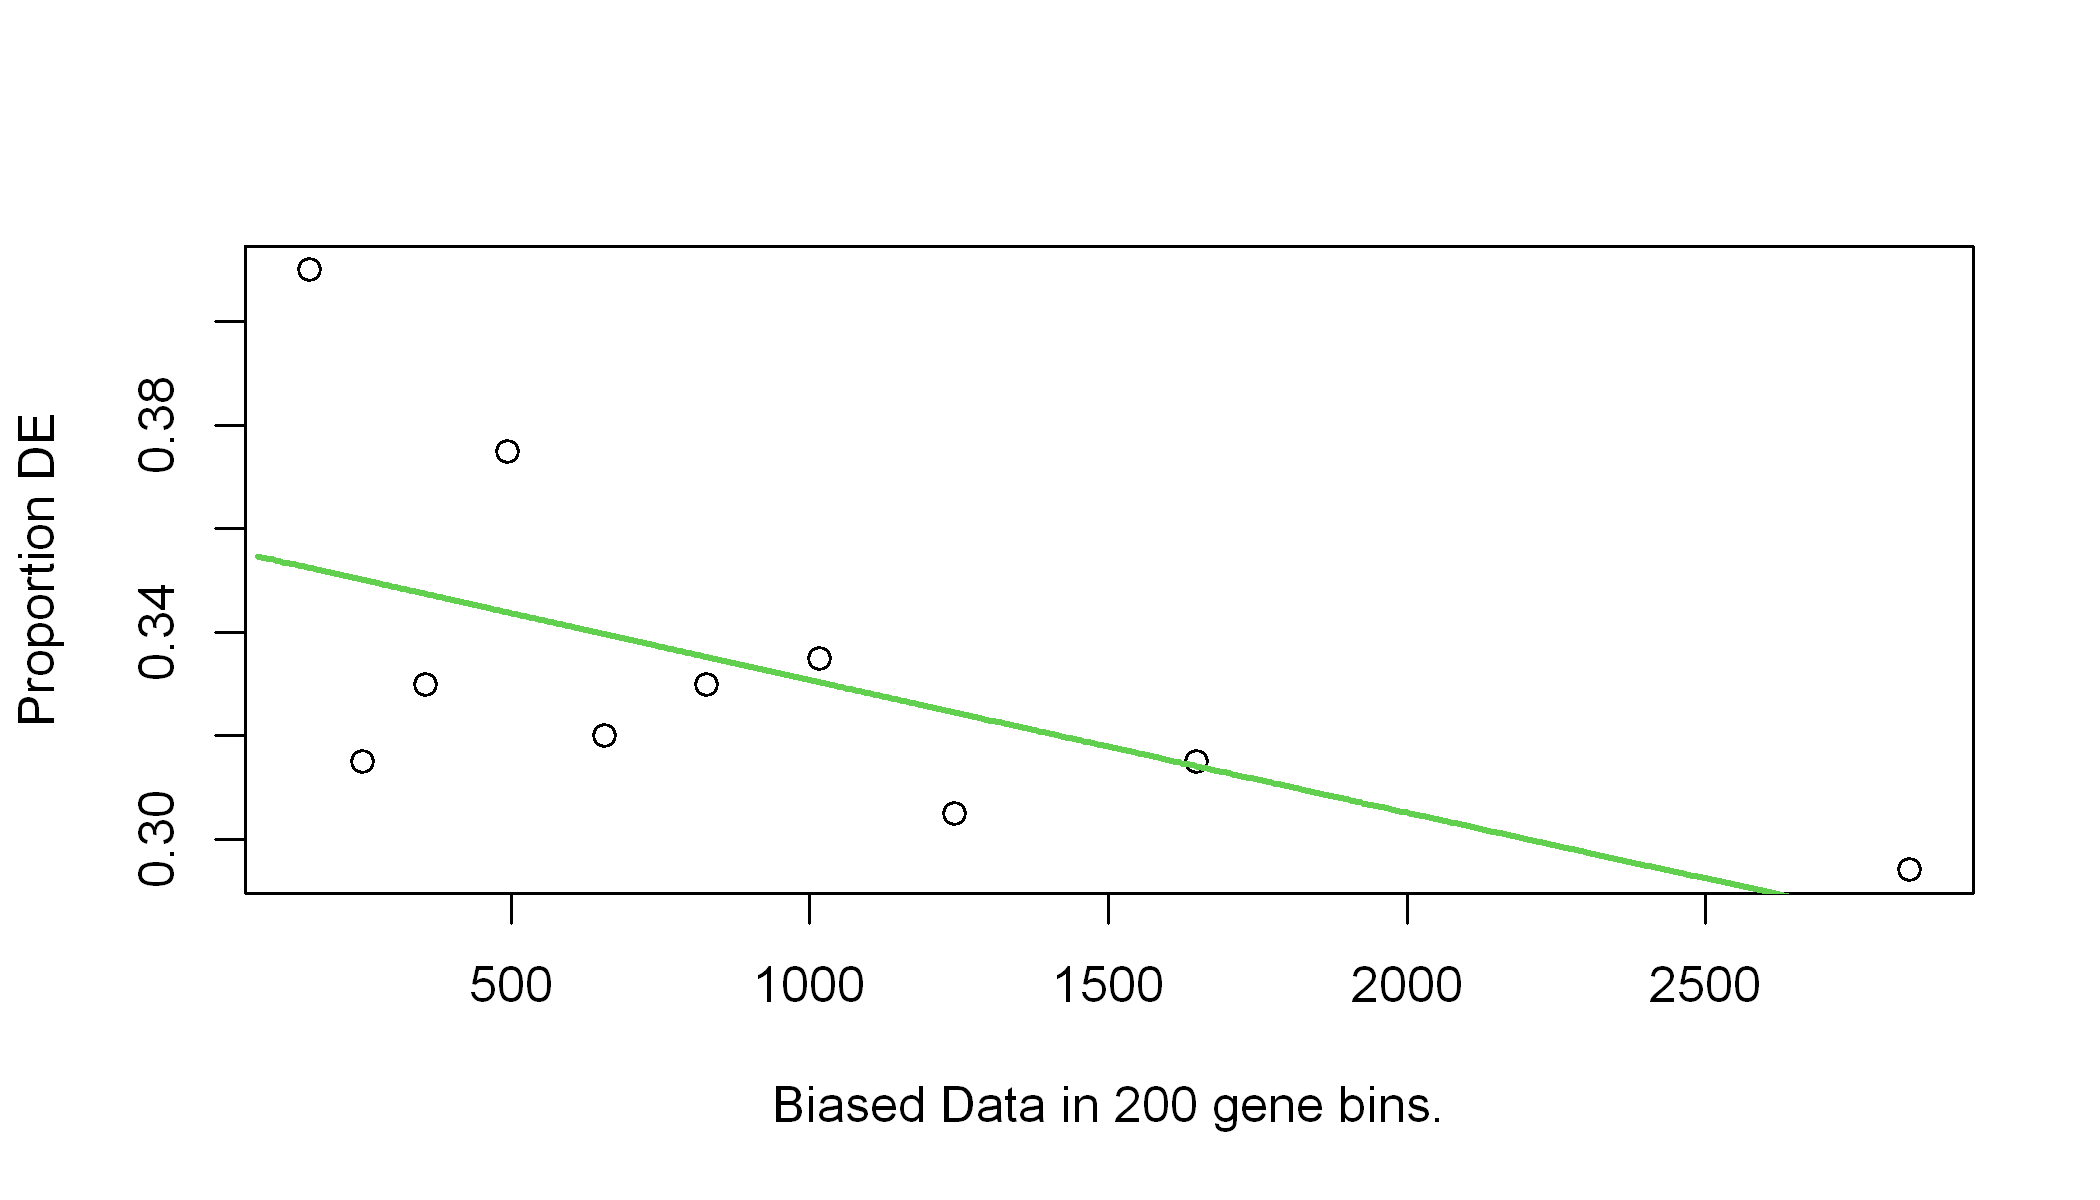

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


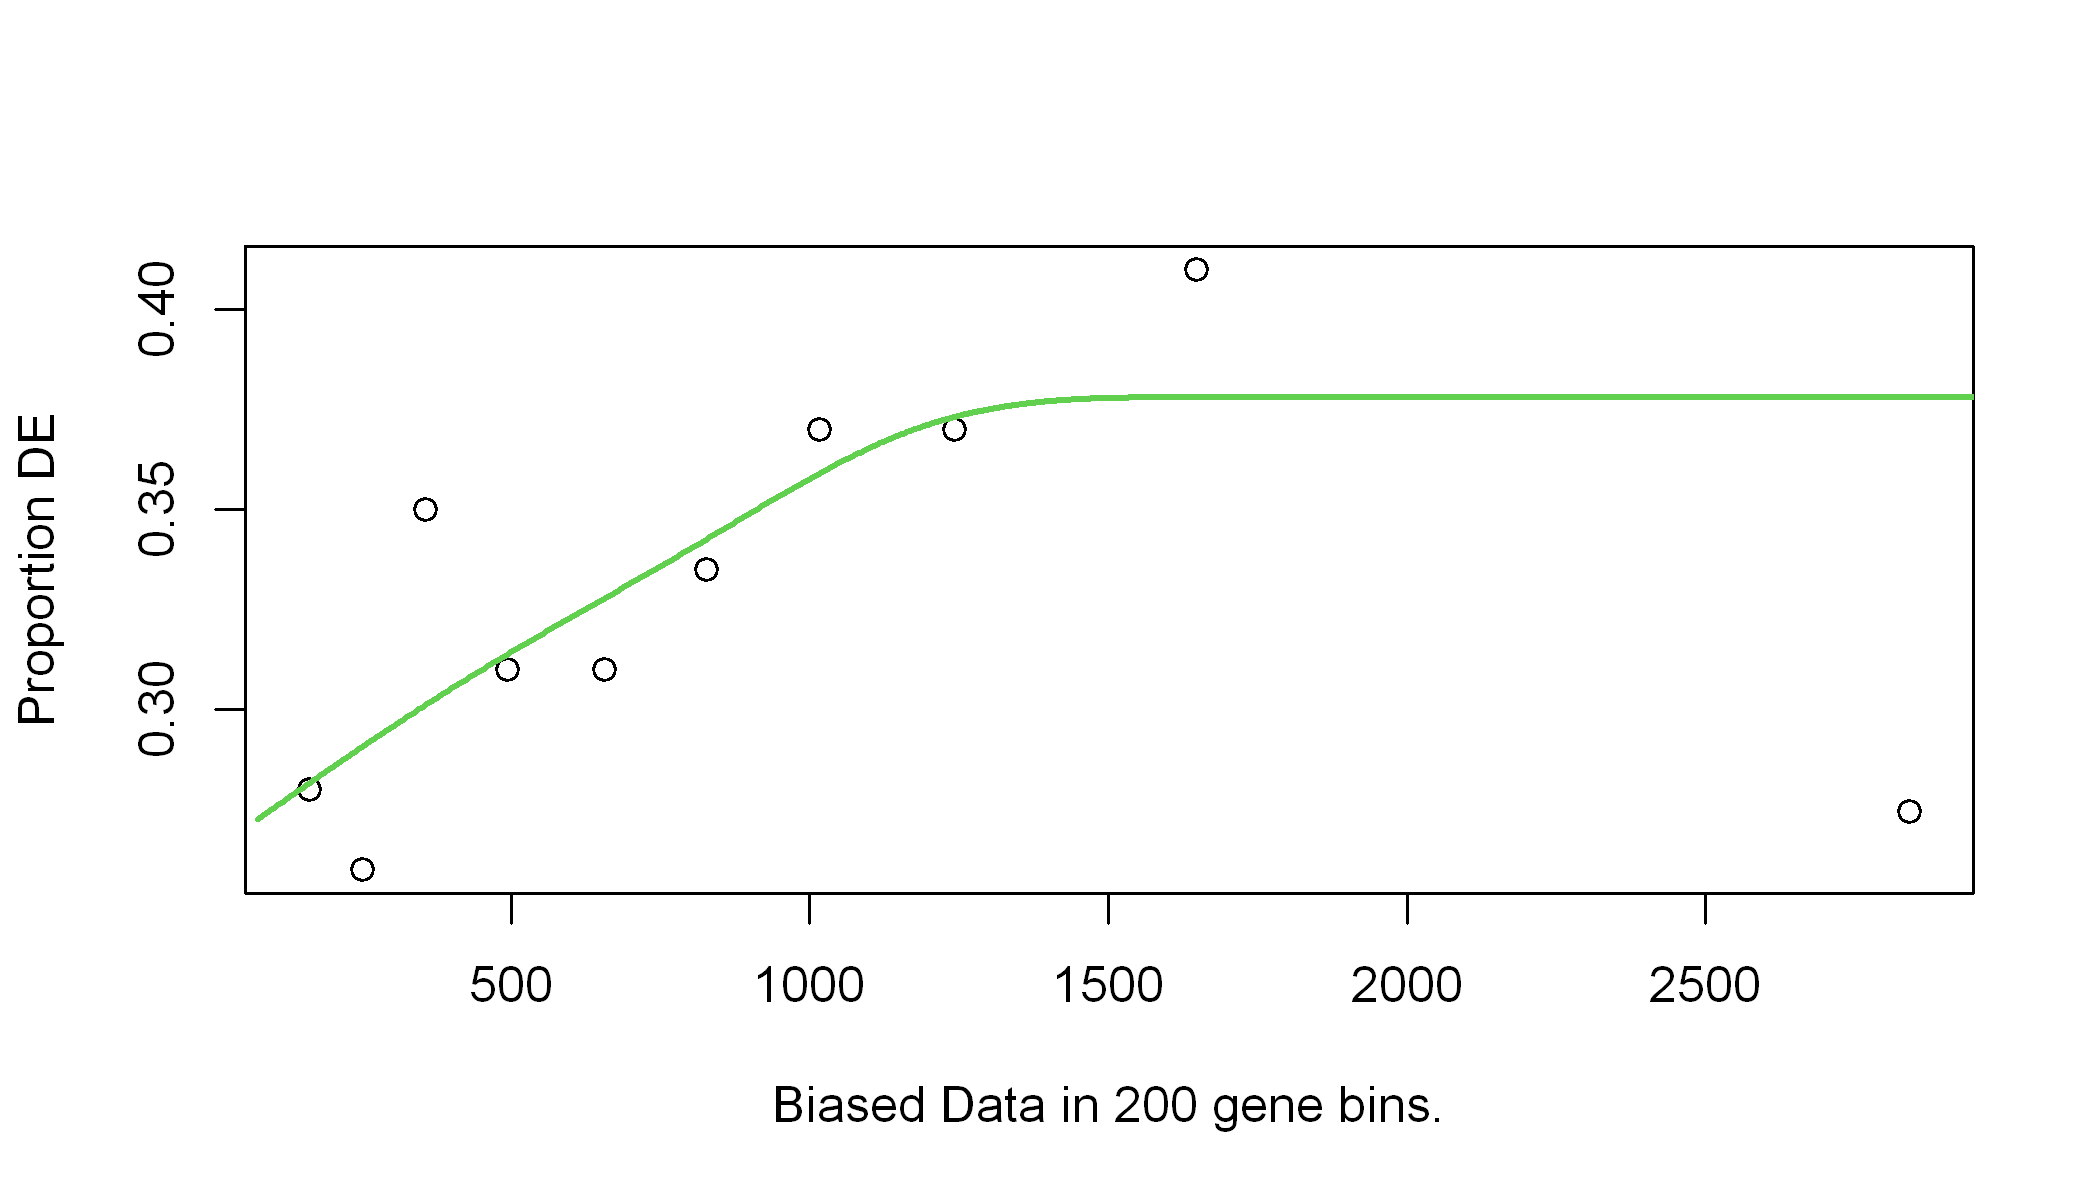

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


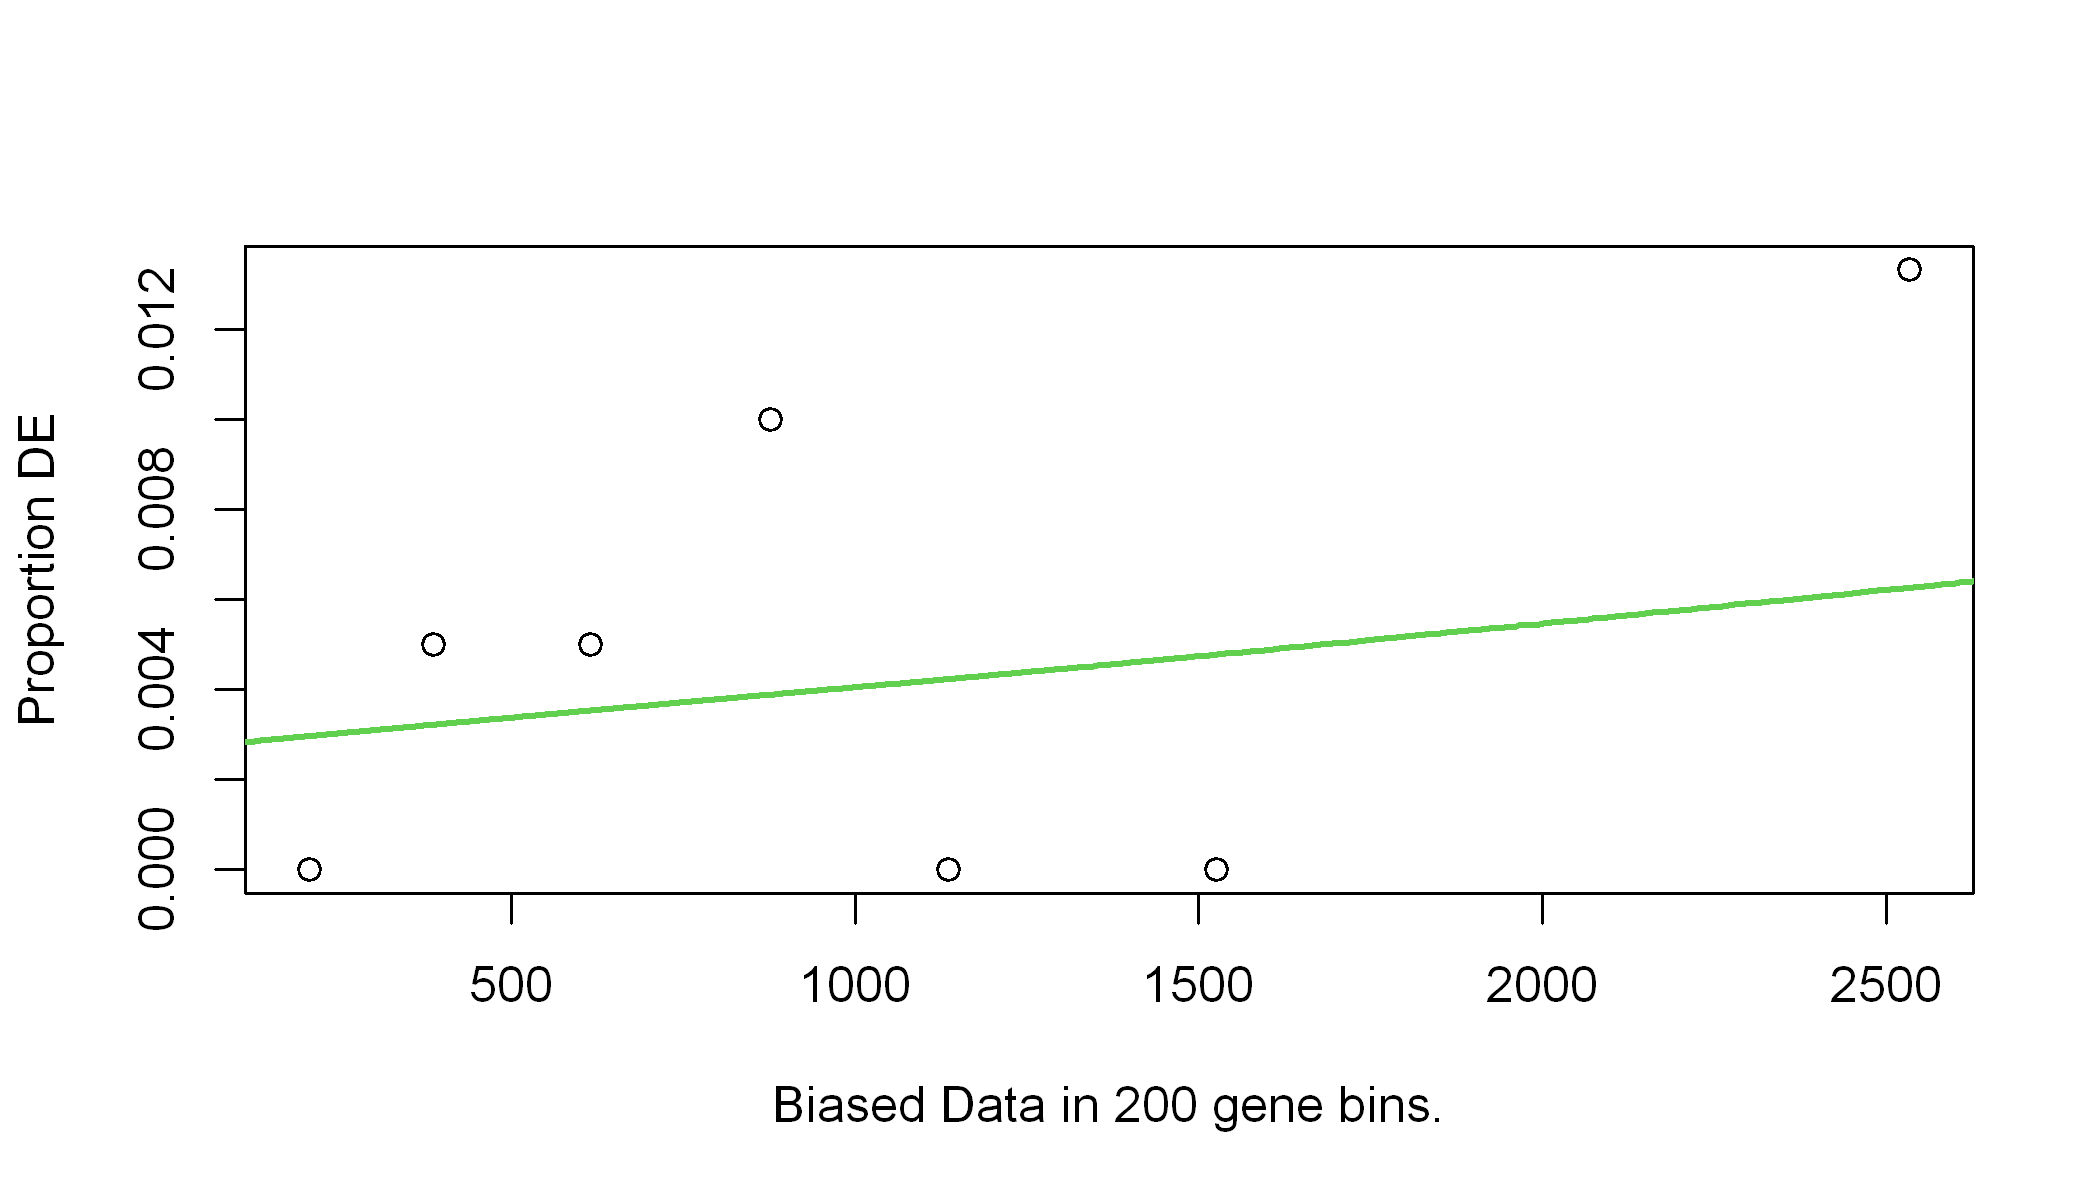

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


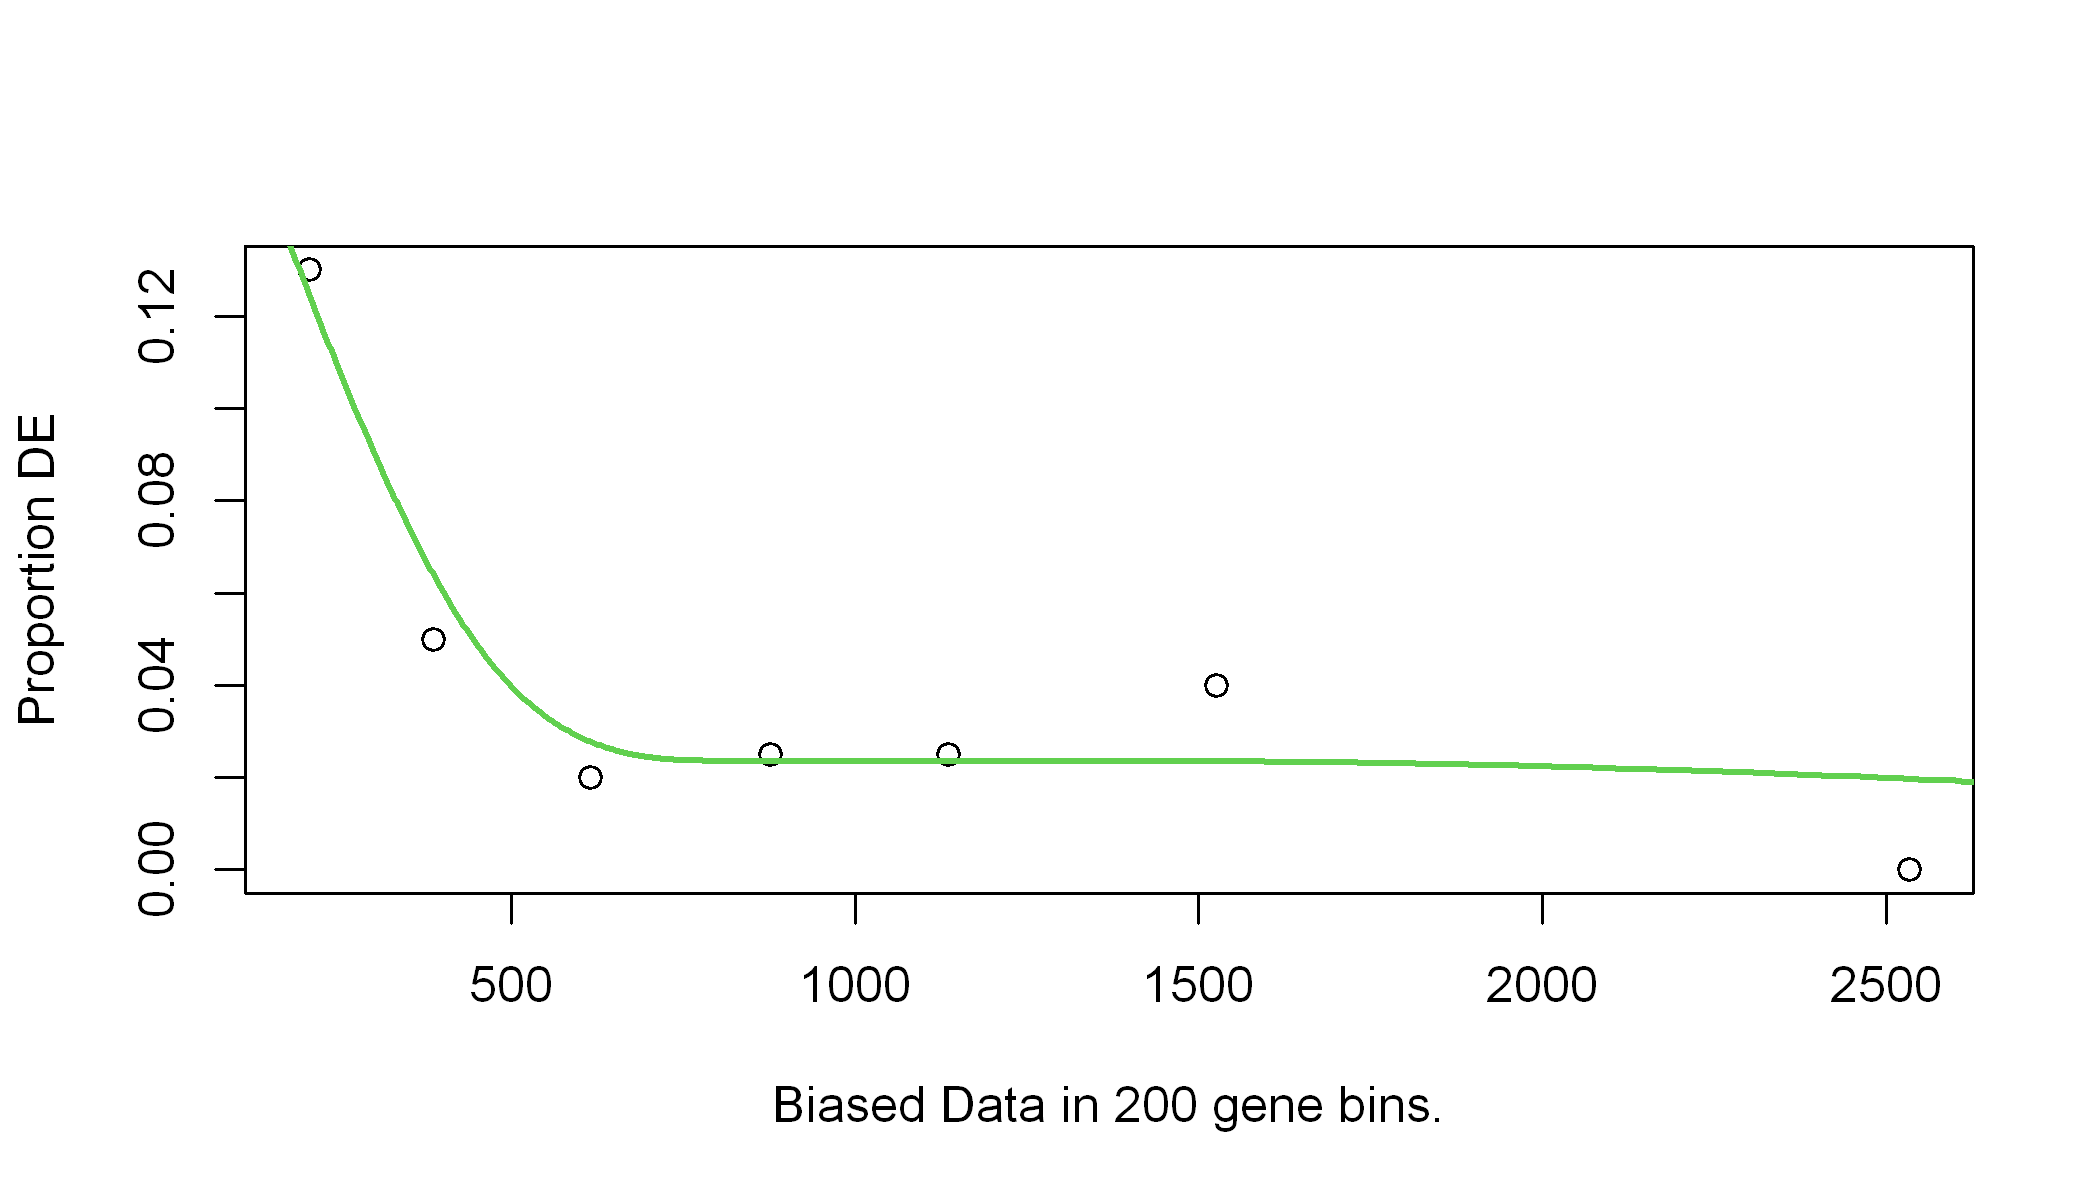

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


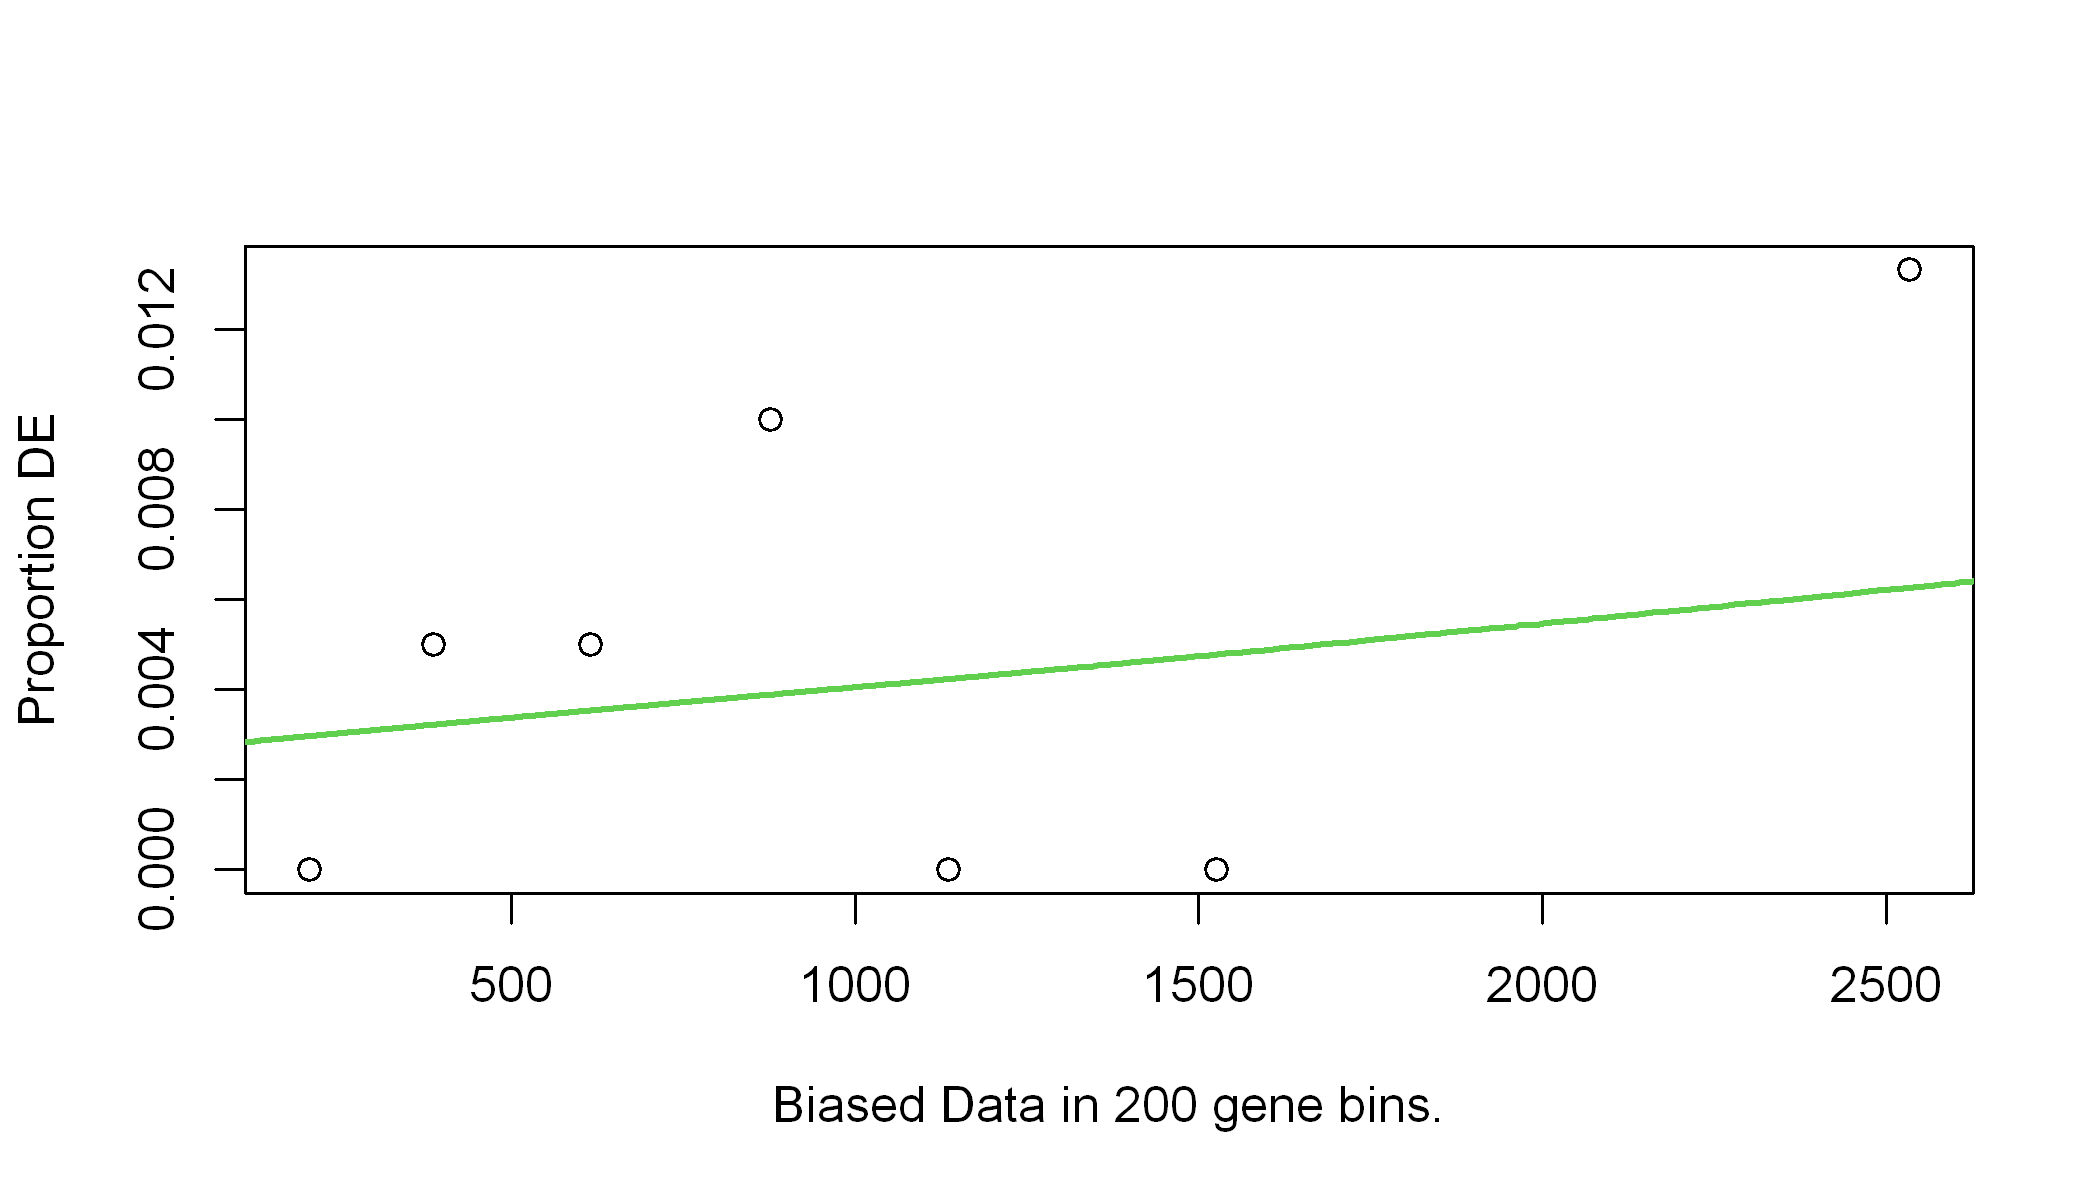

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


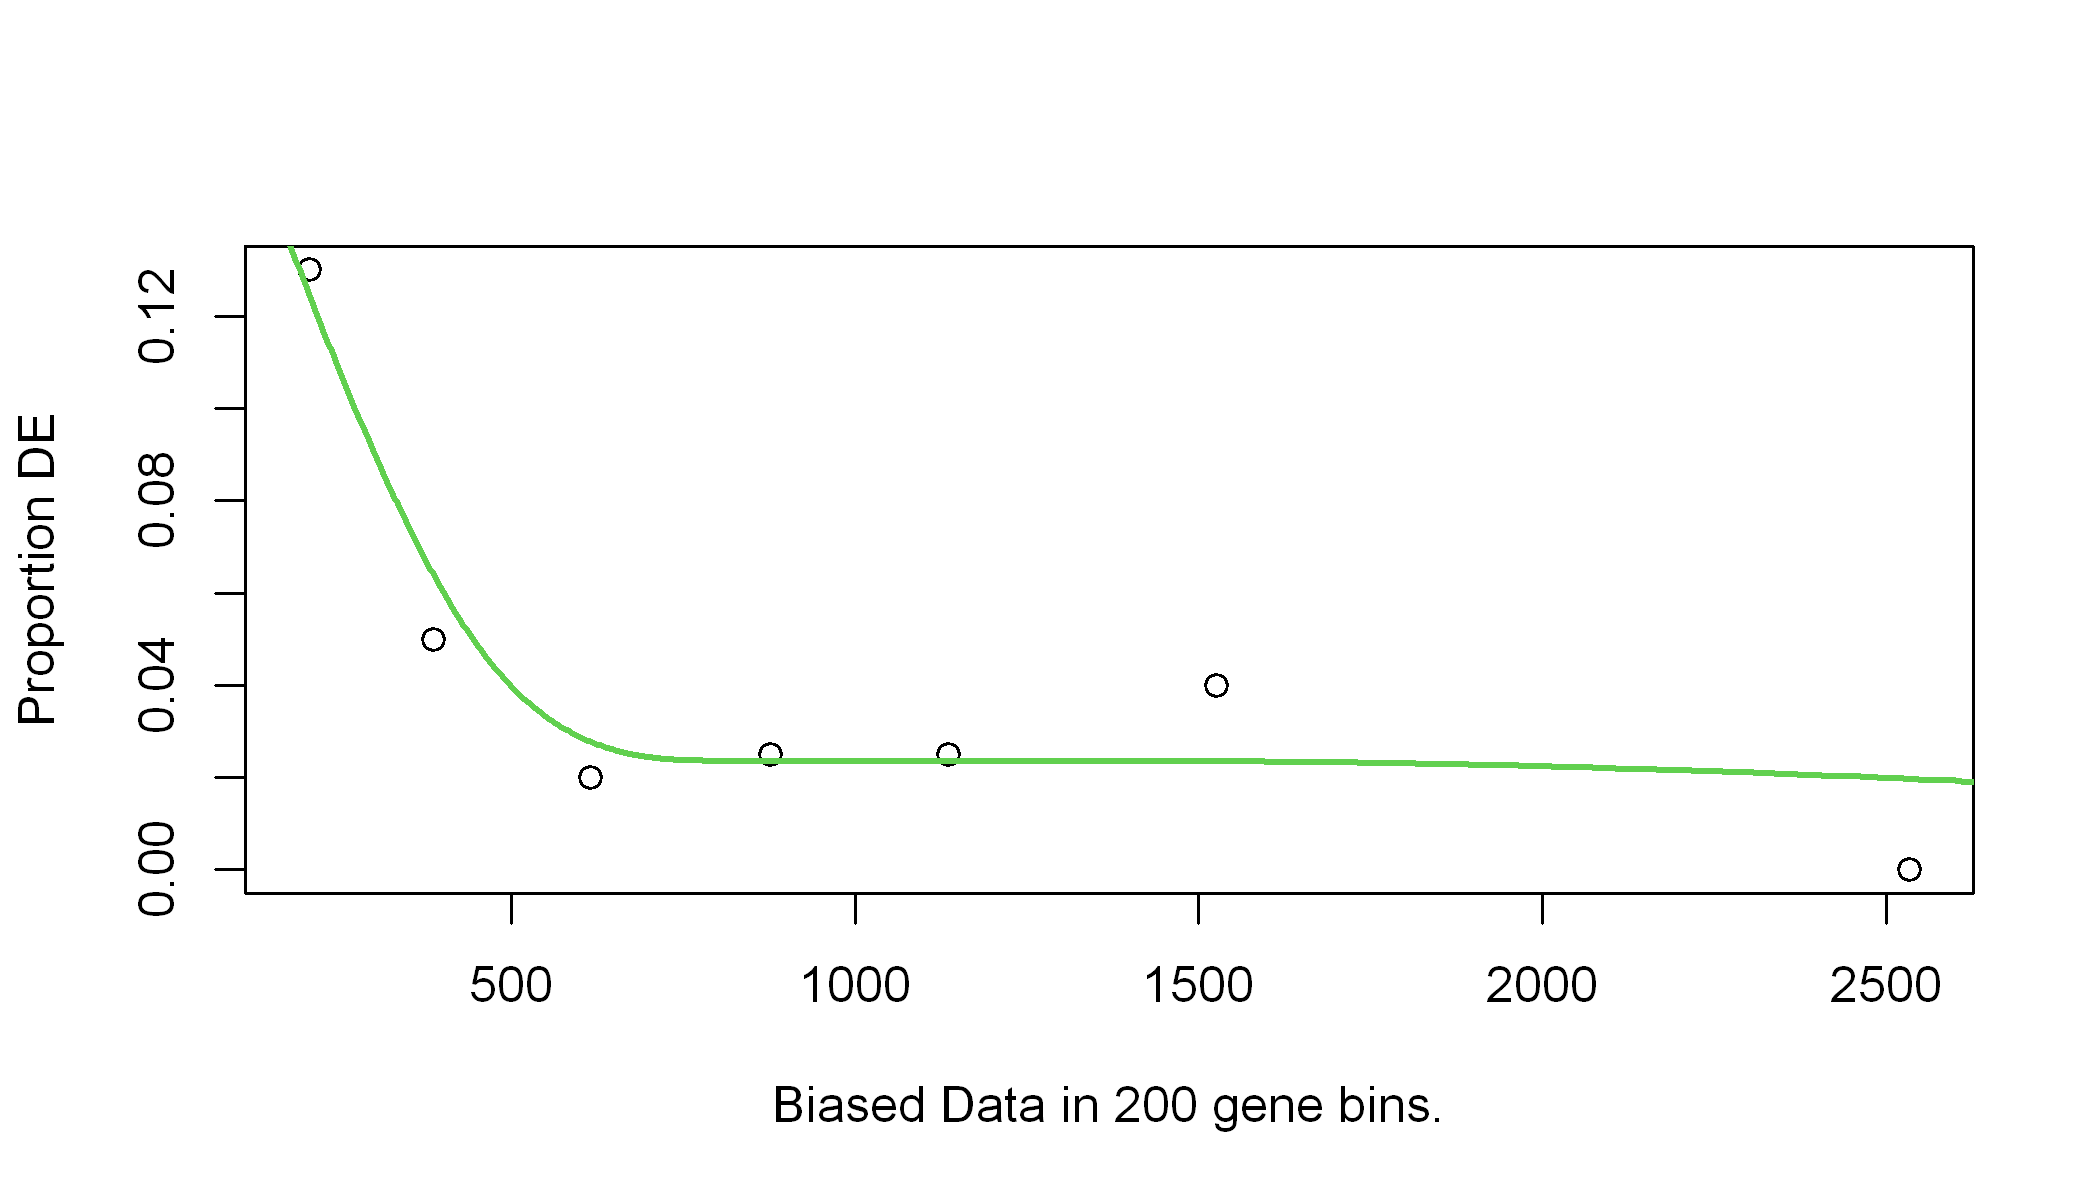

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


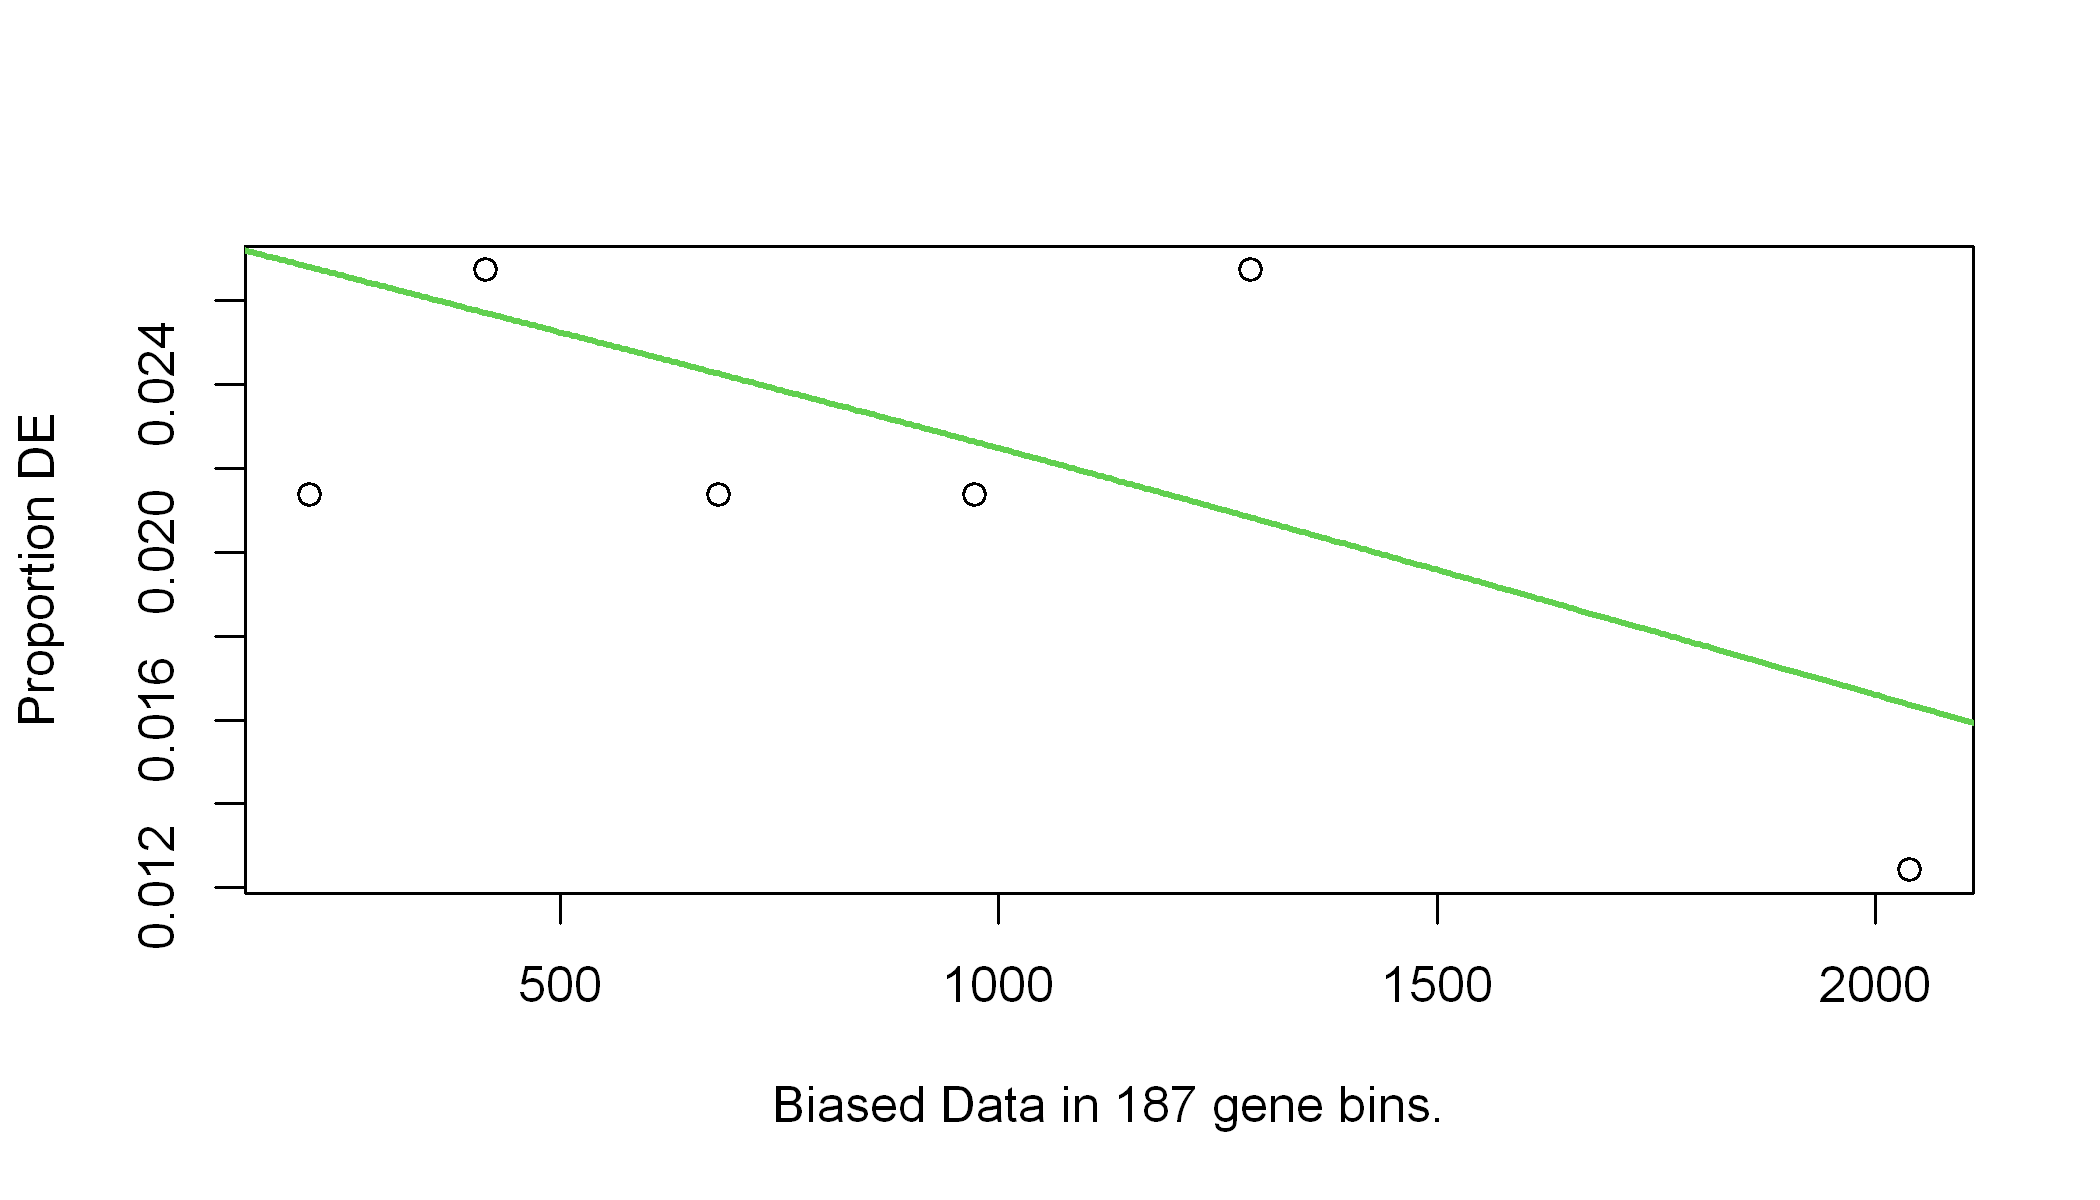

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


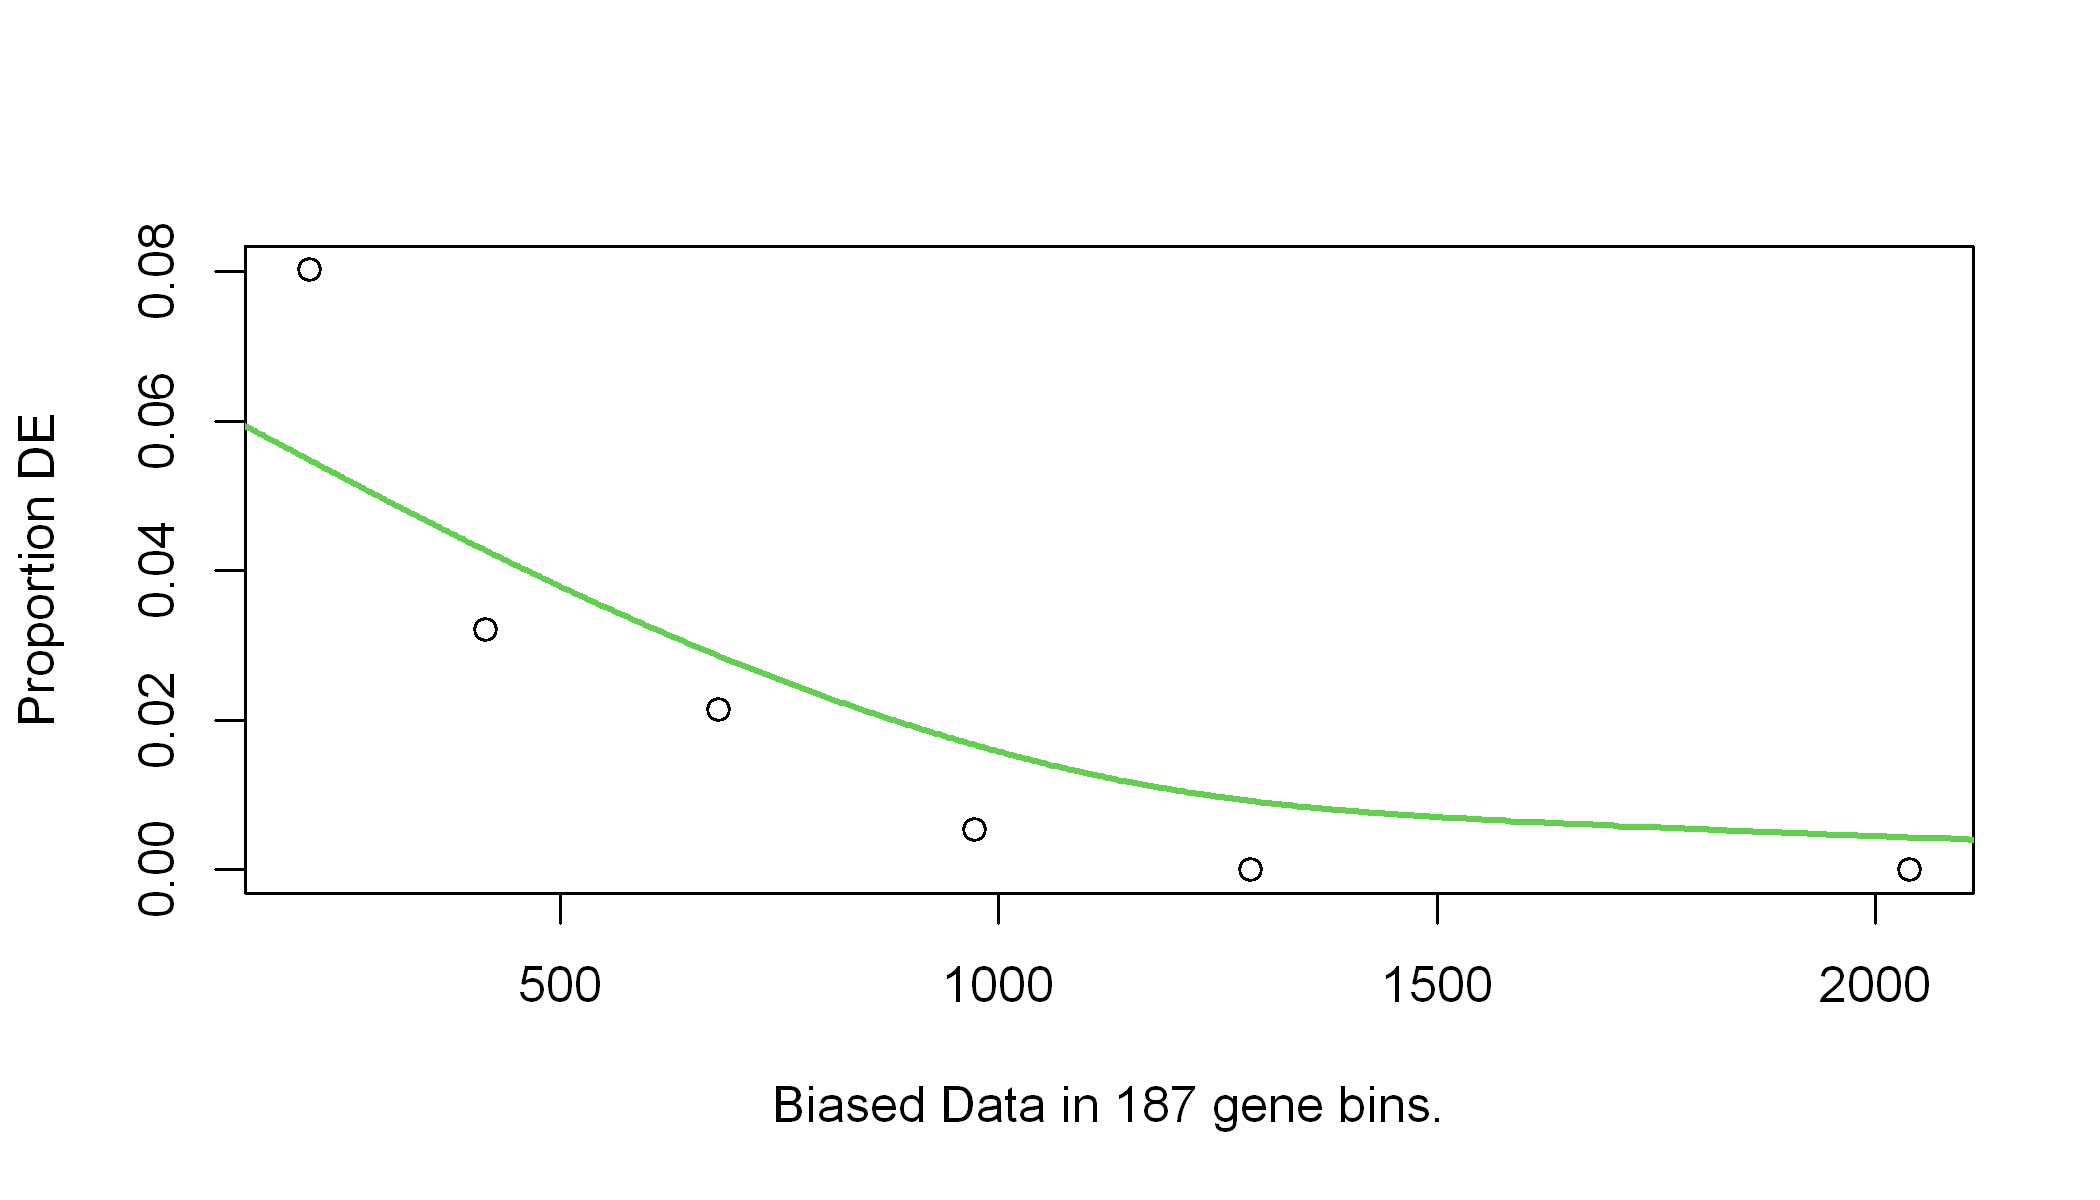

Using manually entered categories.

For 1 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


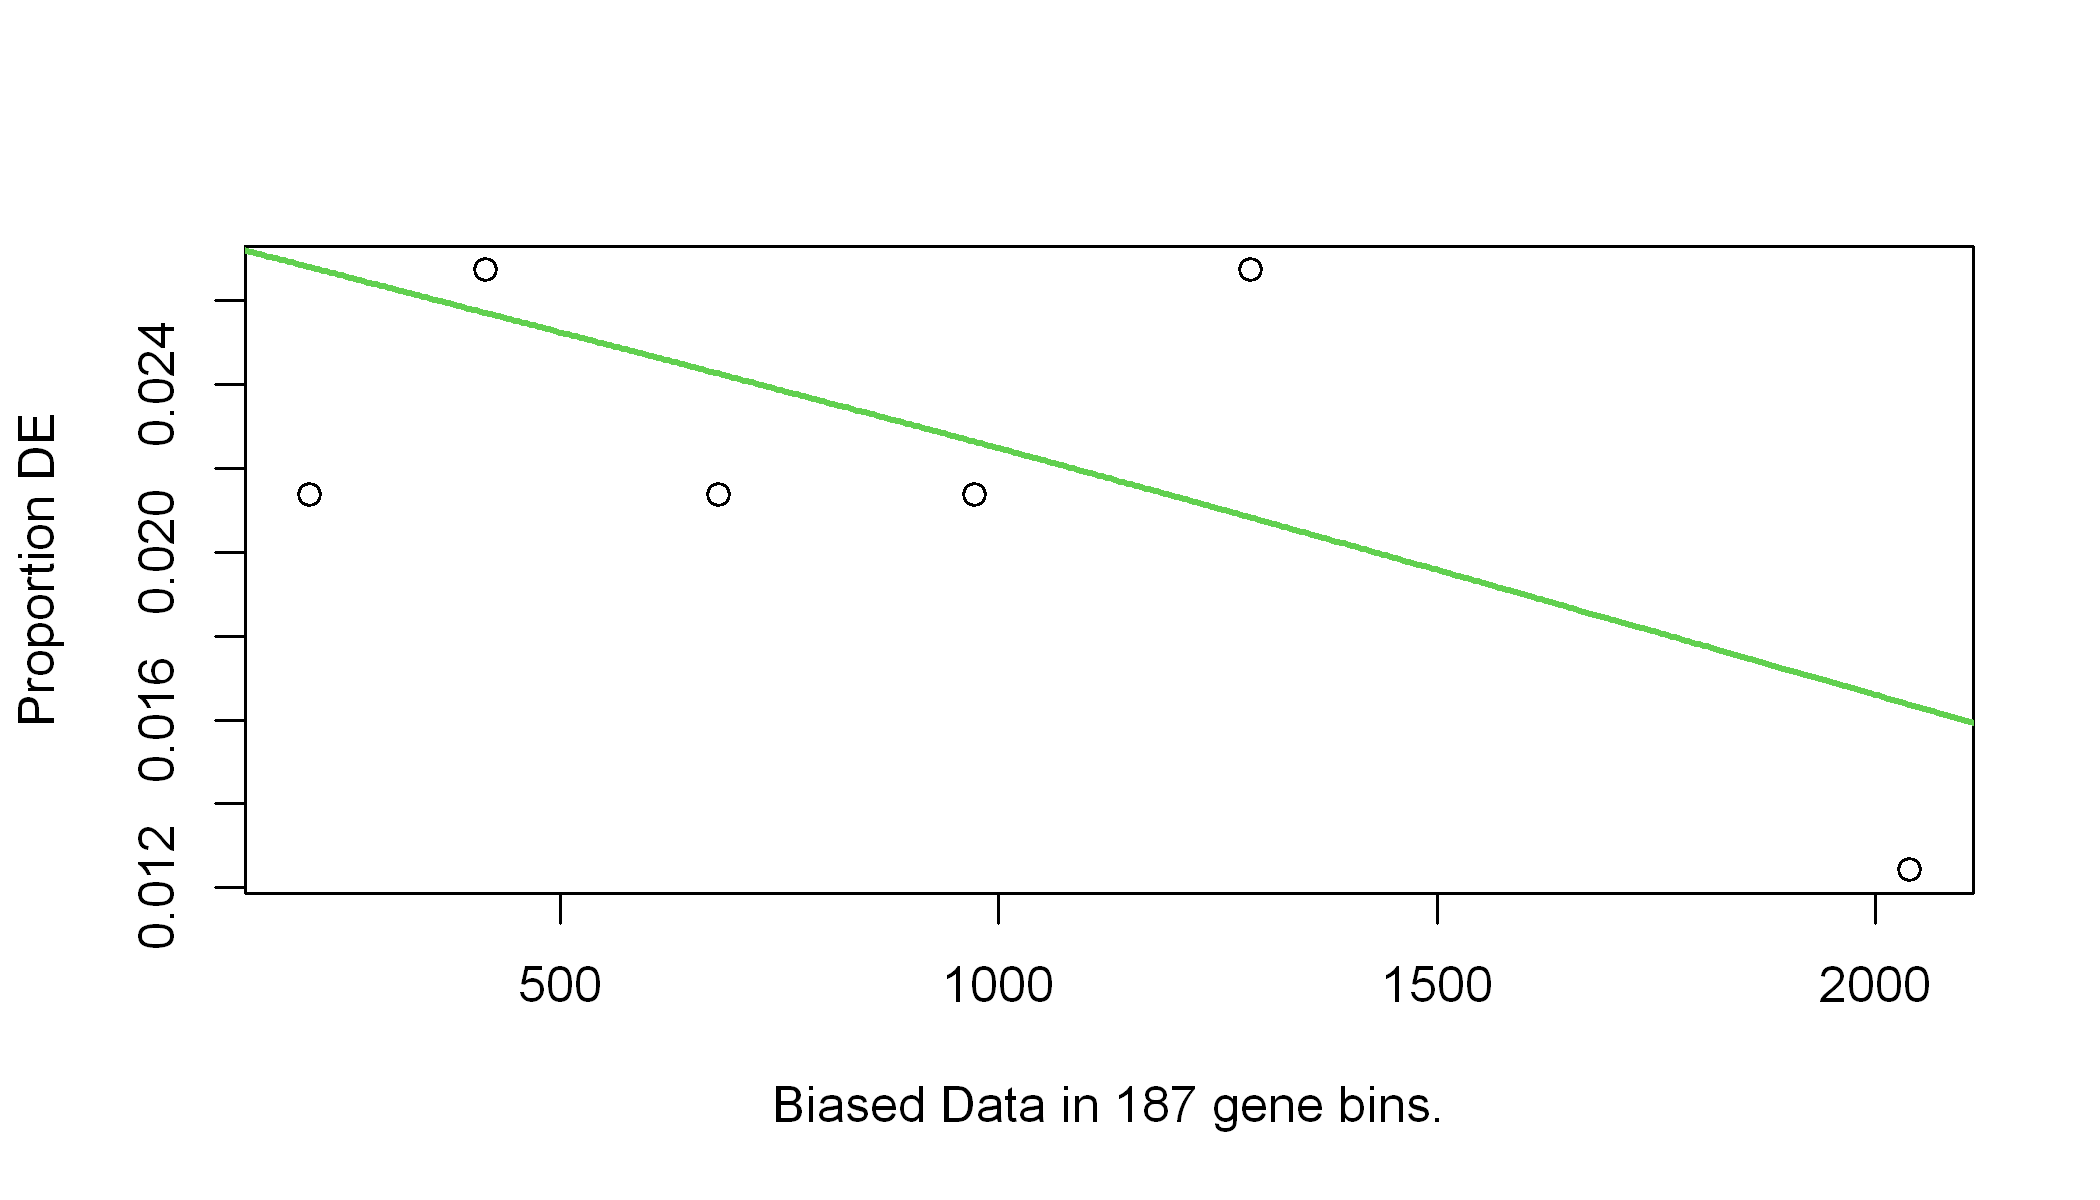

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


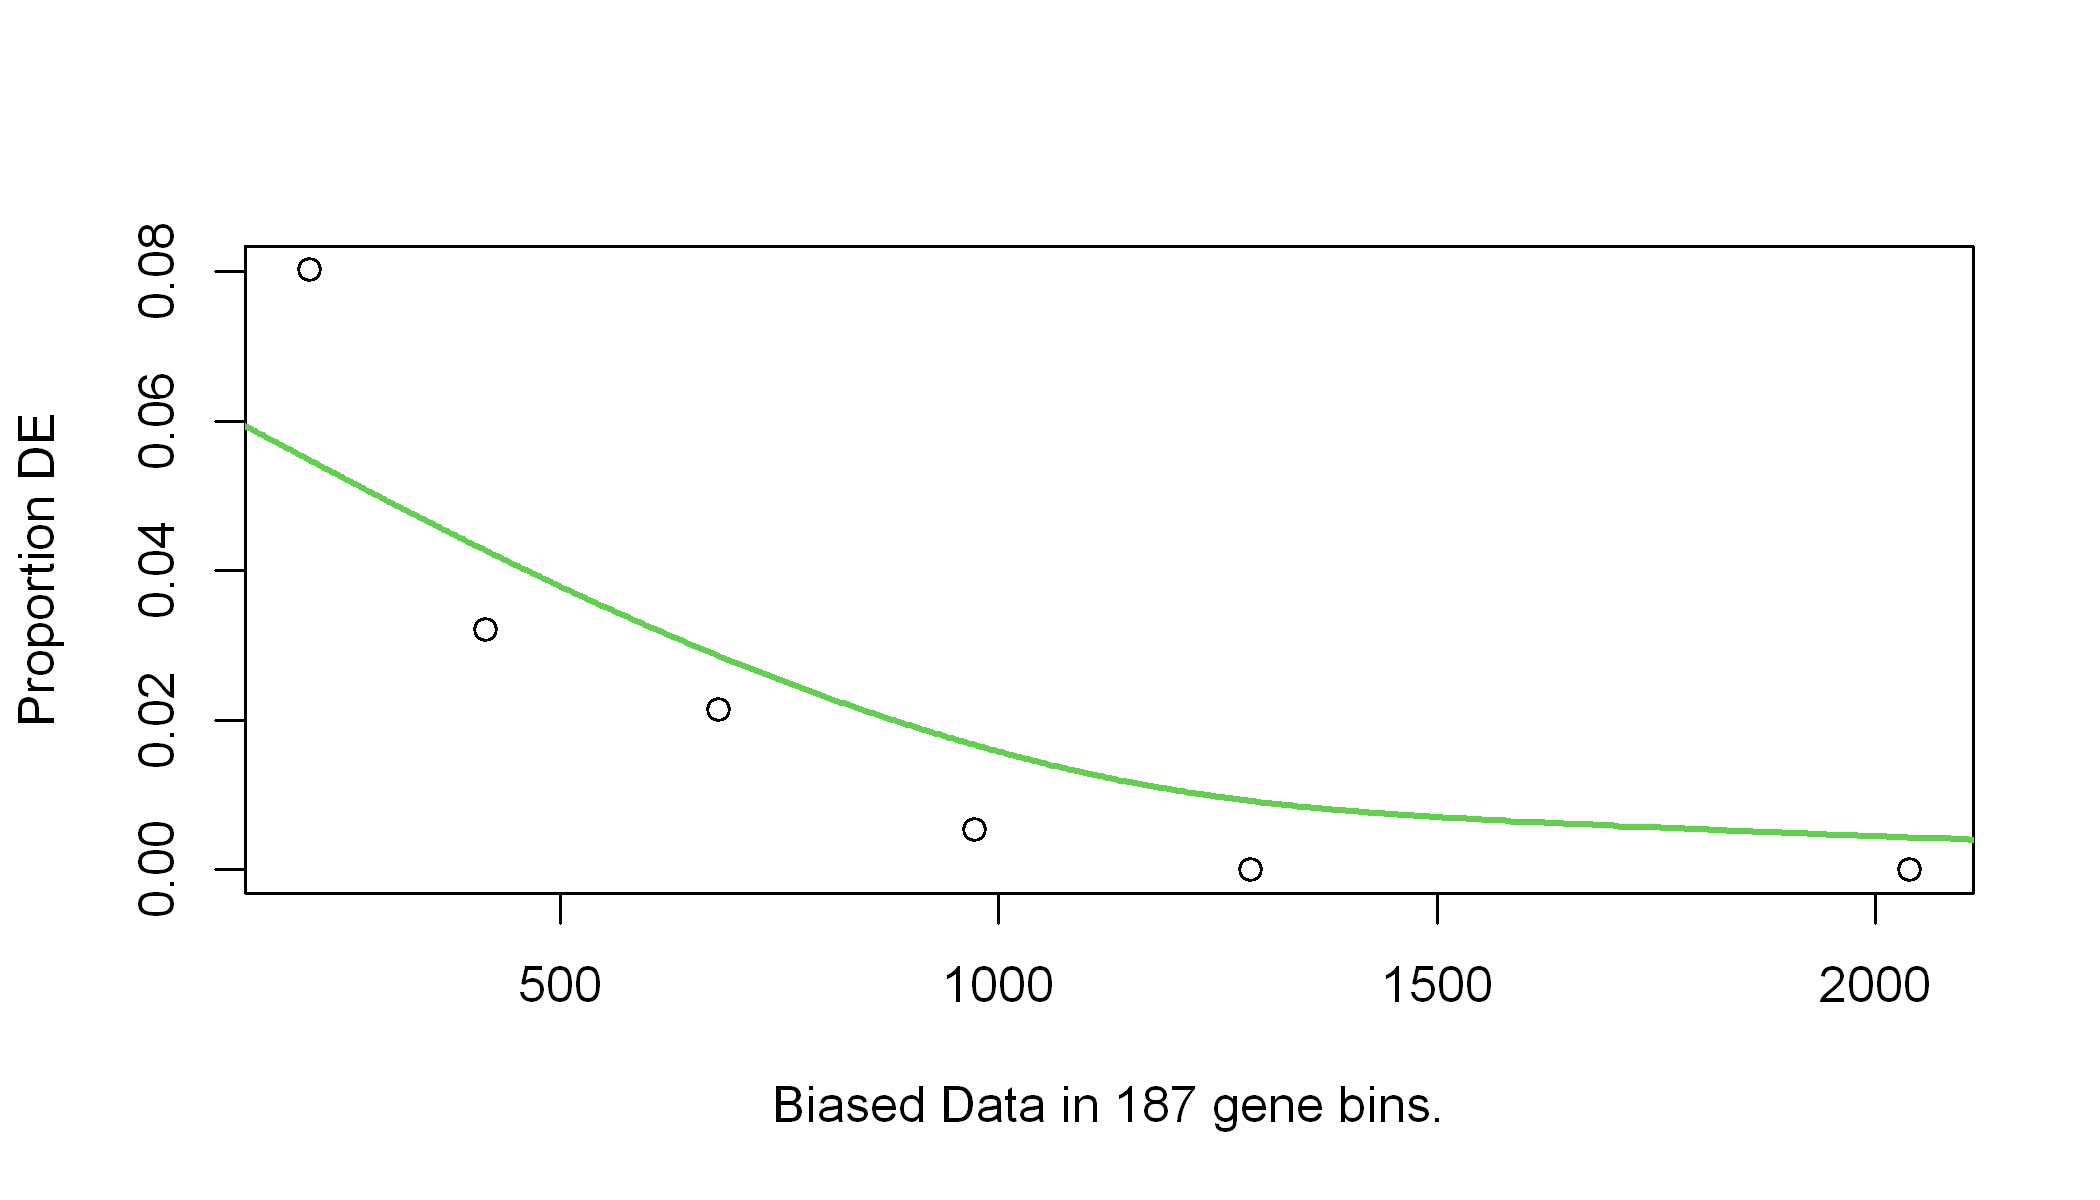

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


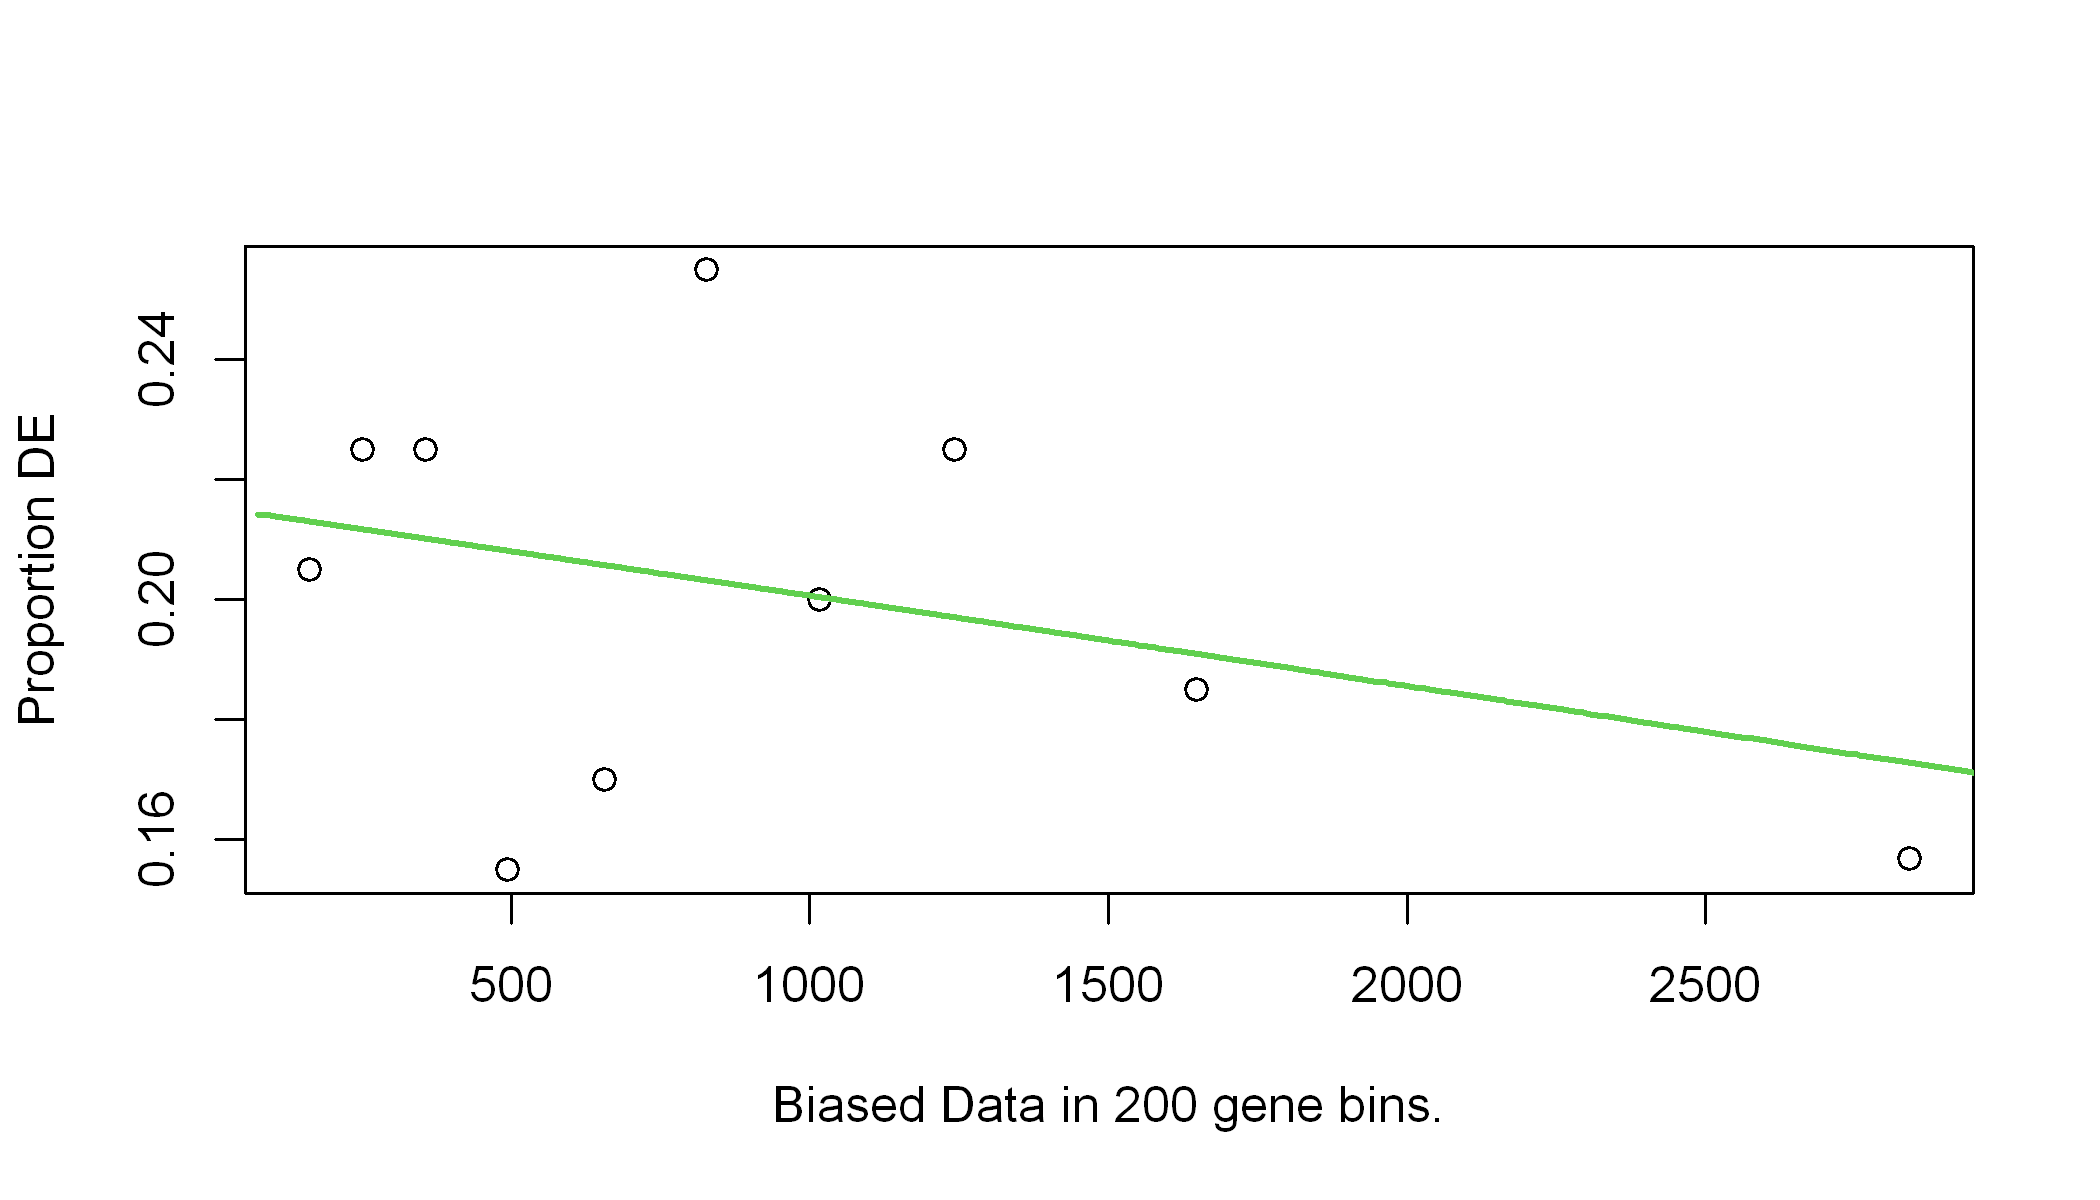

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


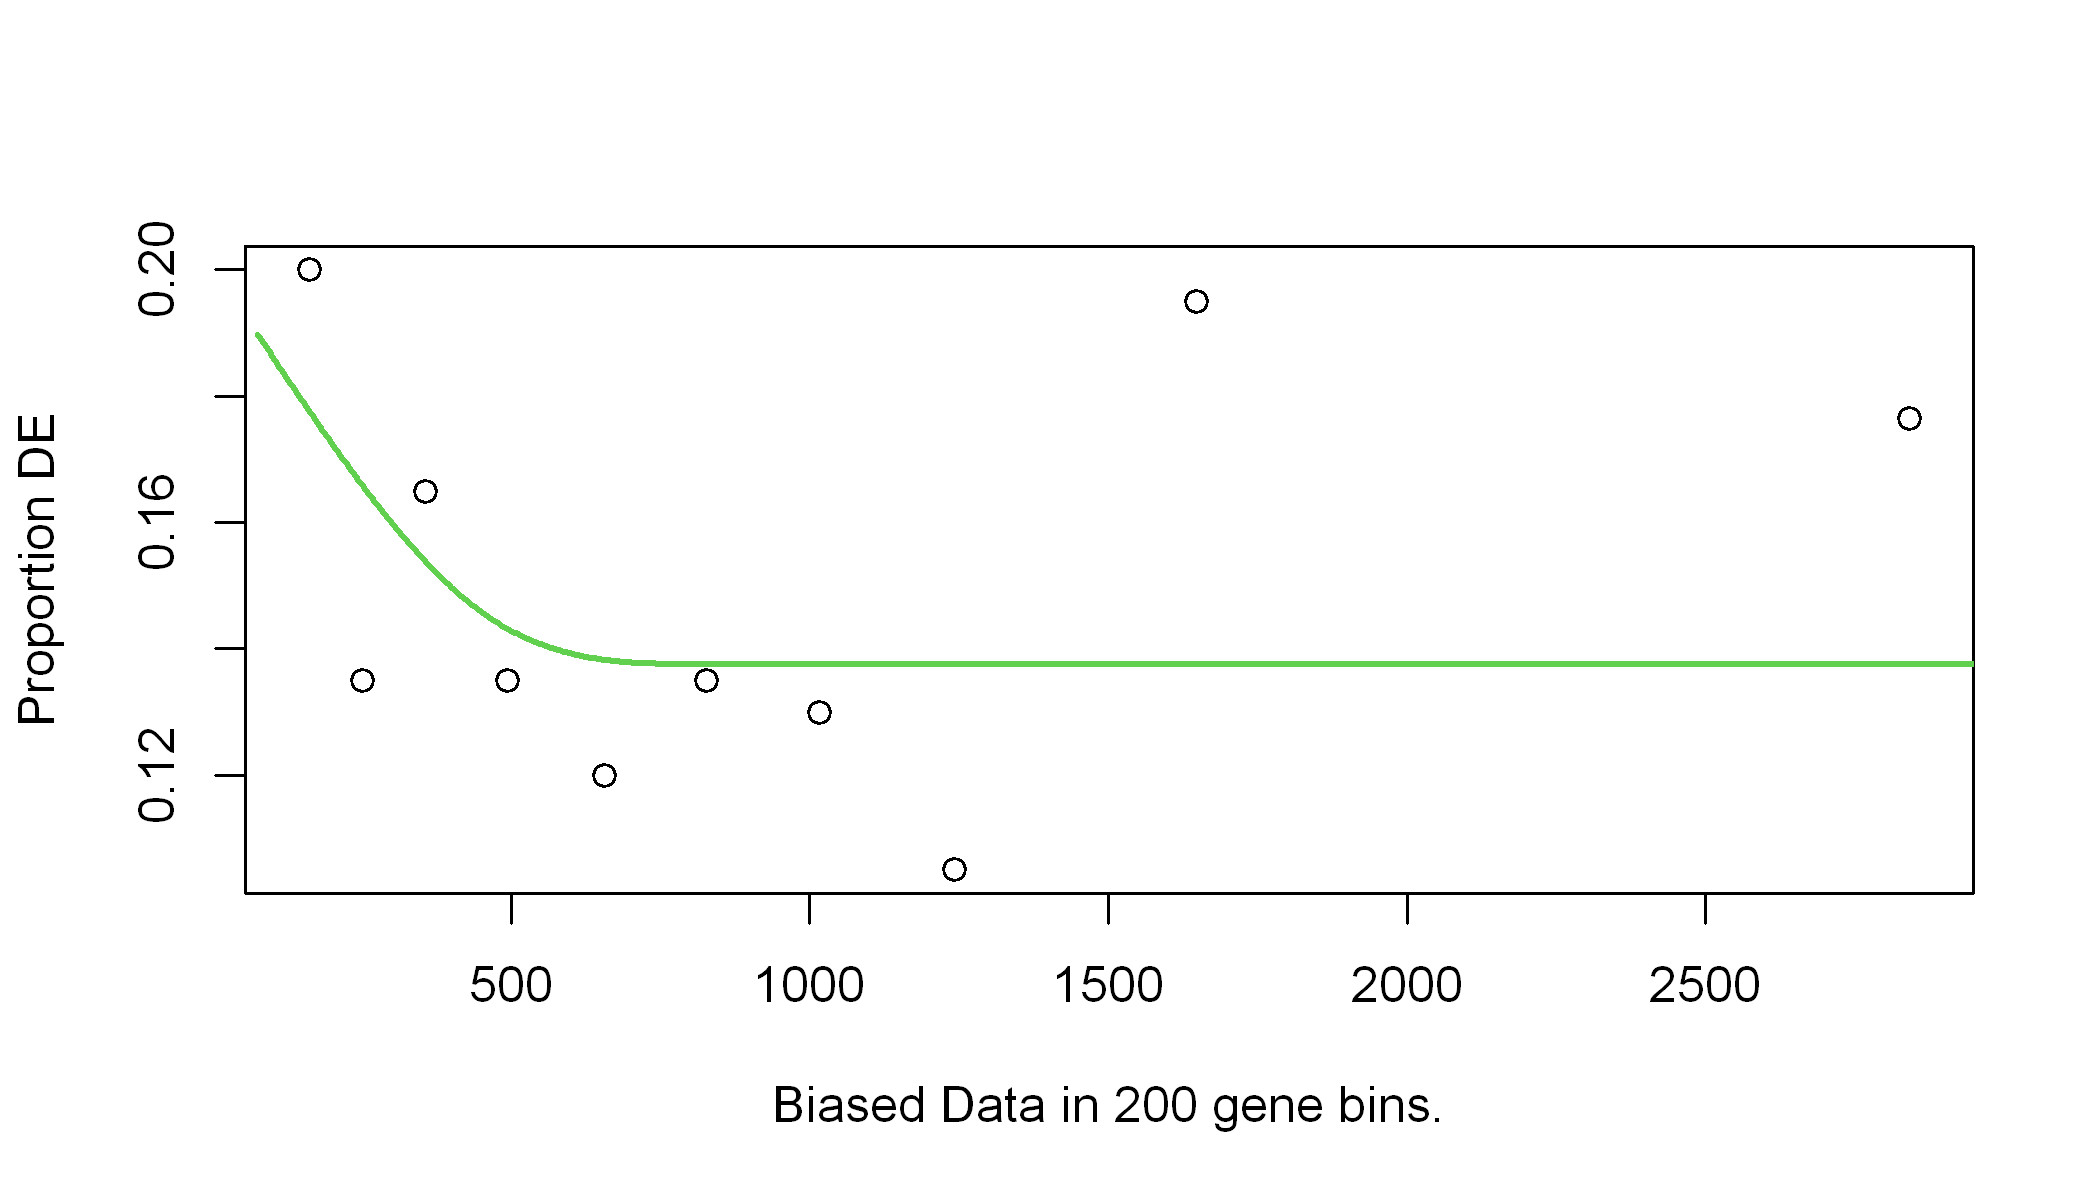

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


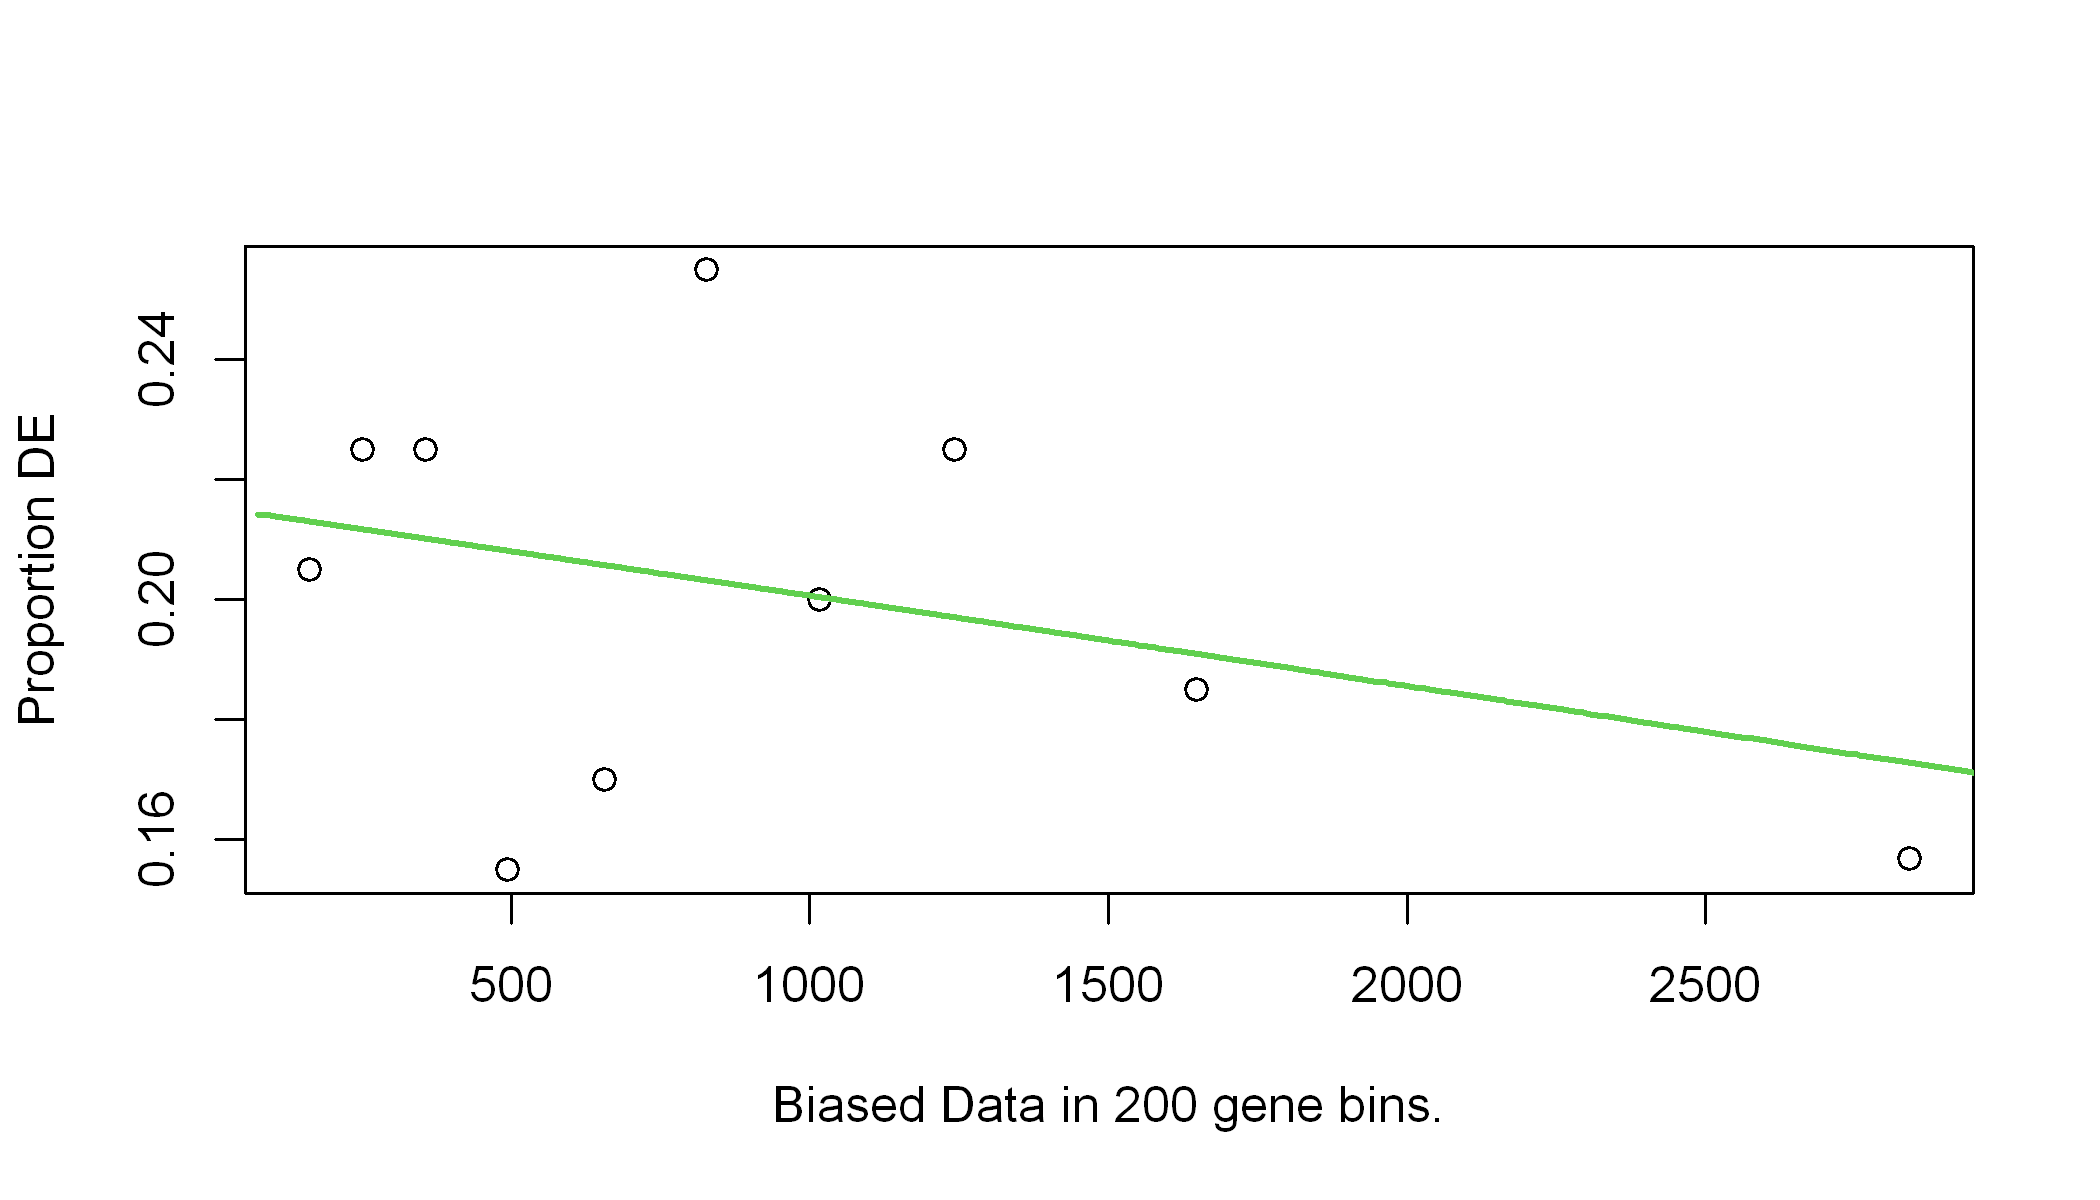

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


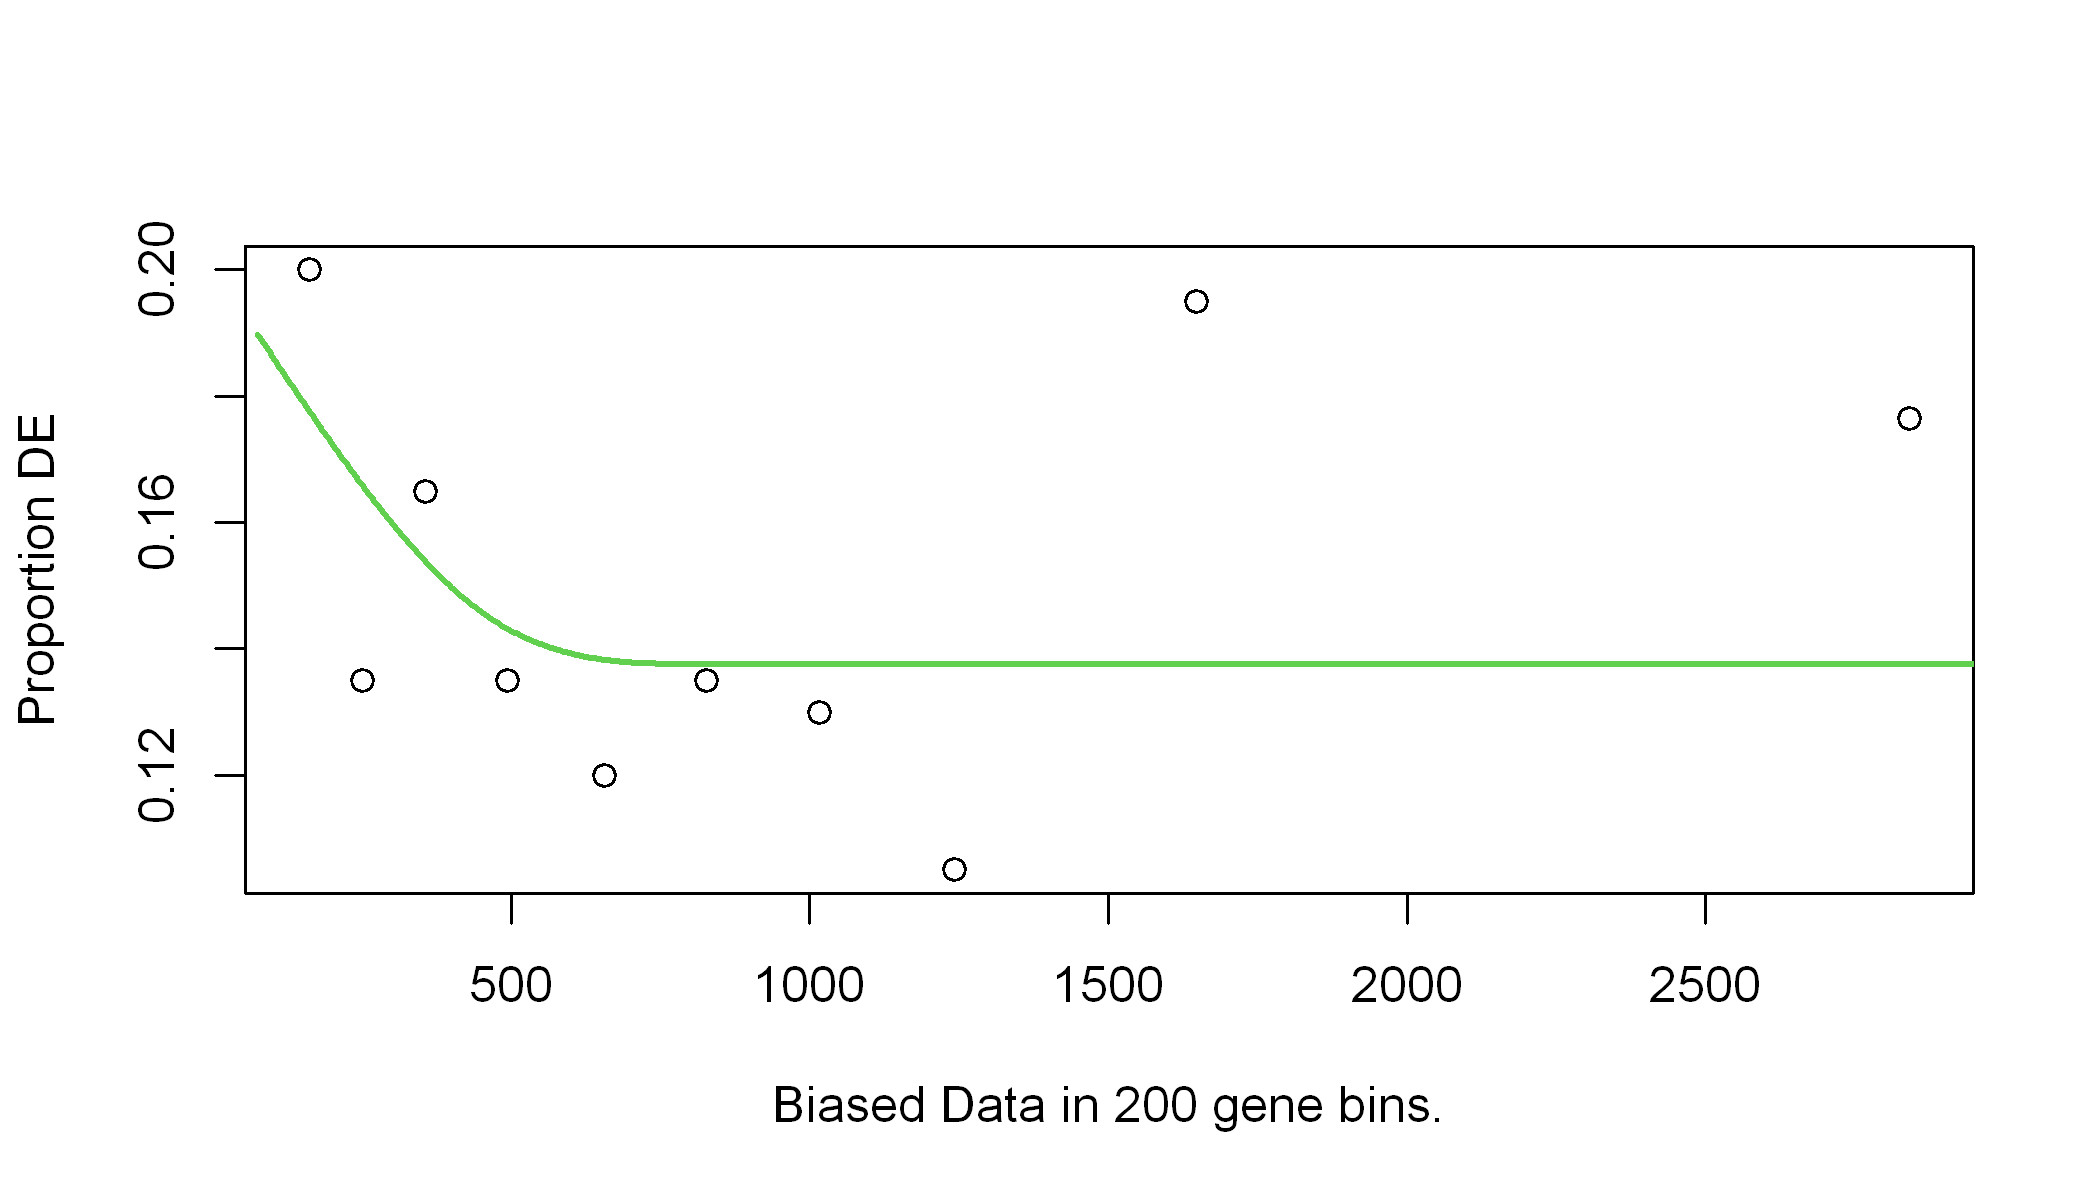

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


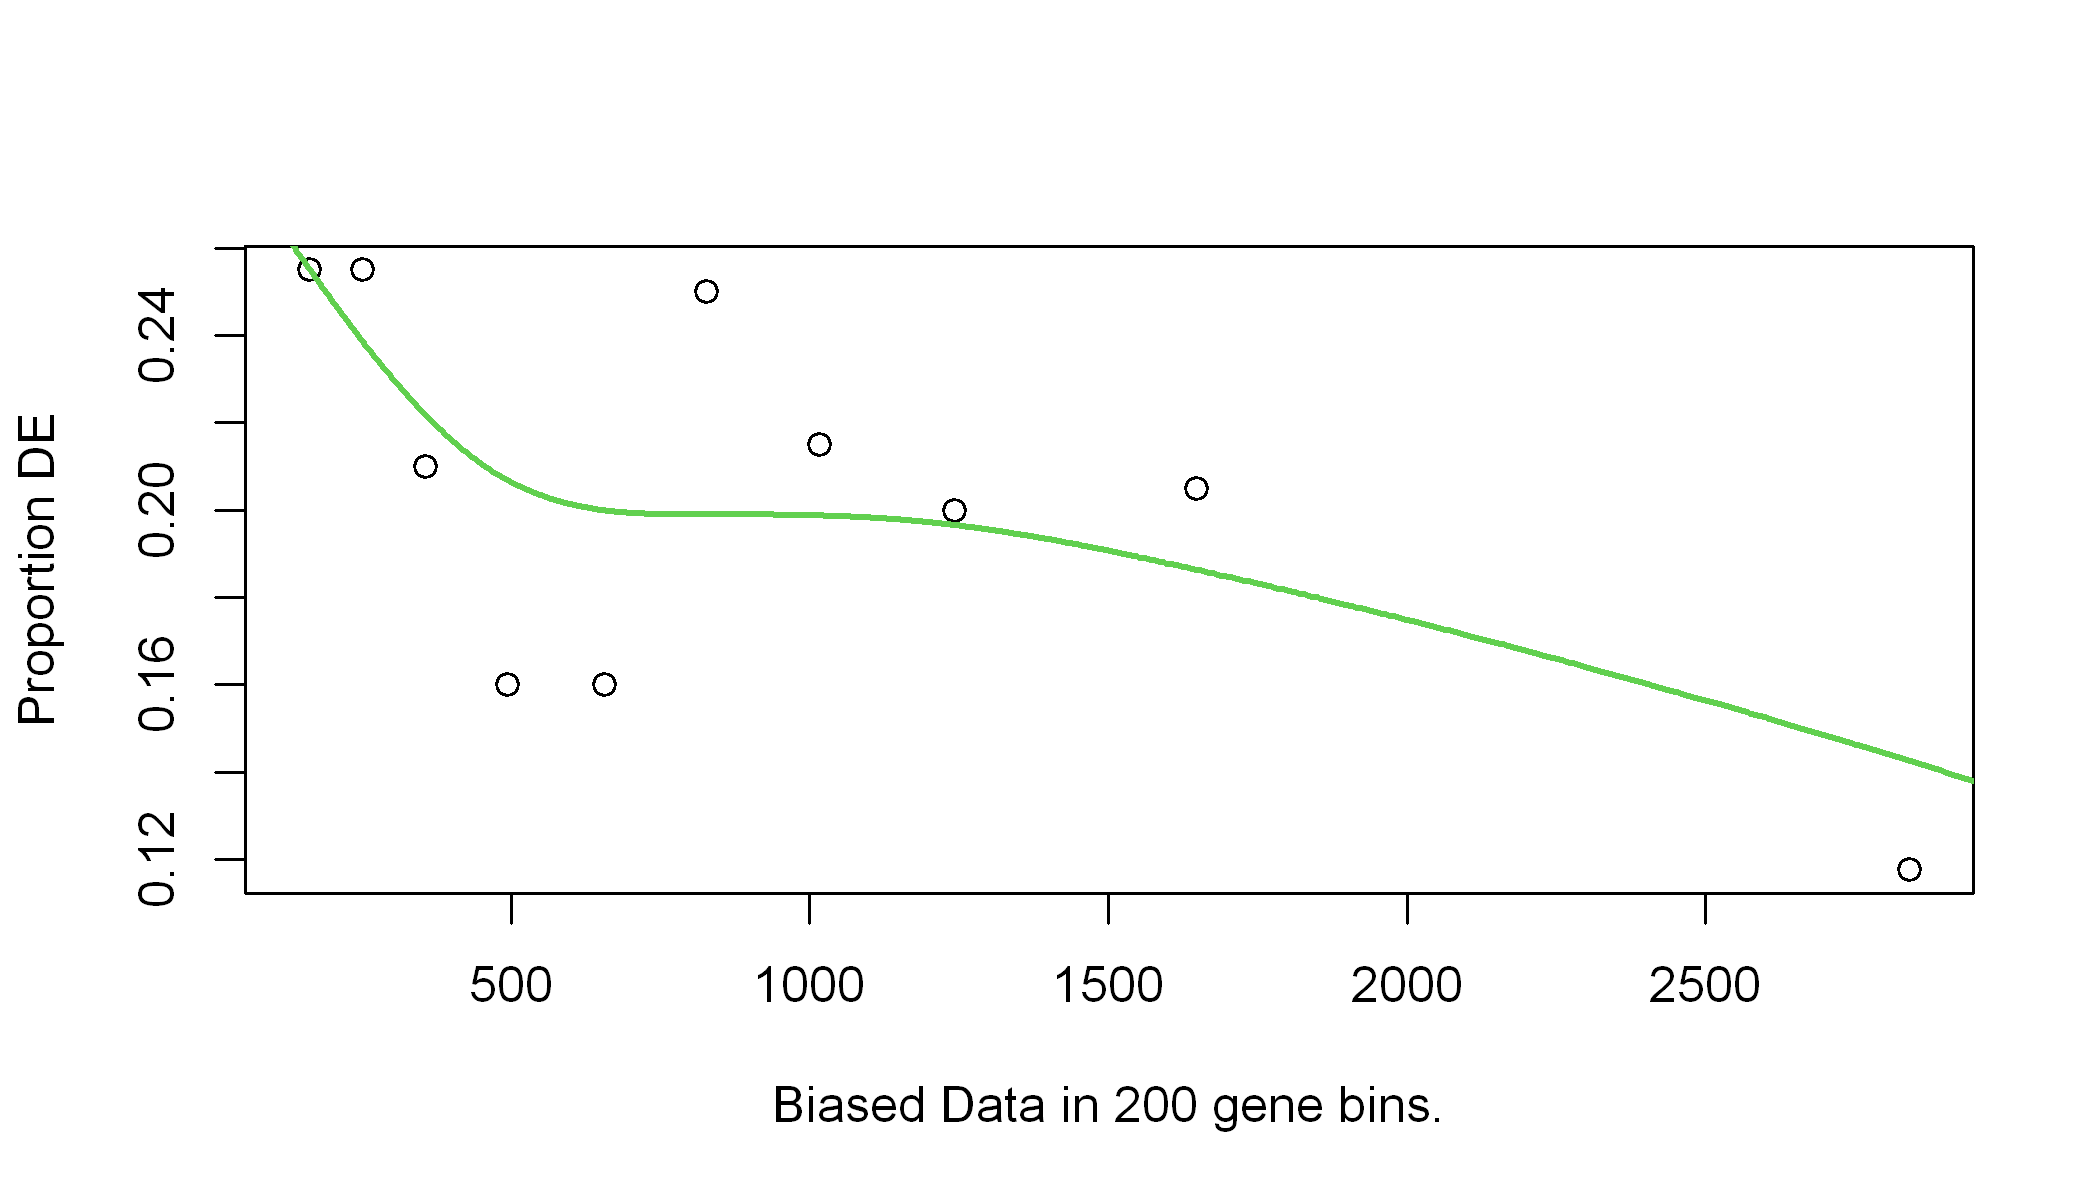

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


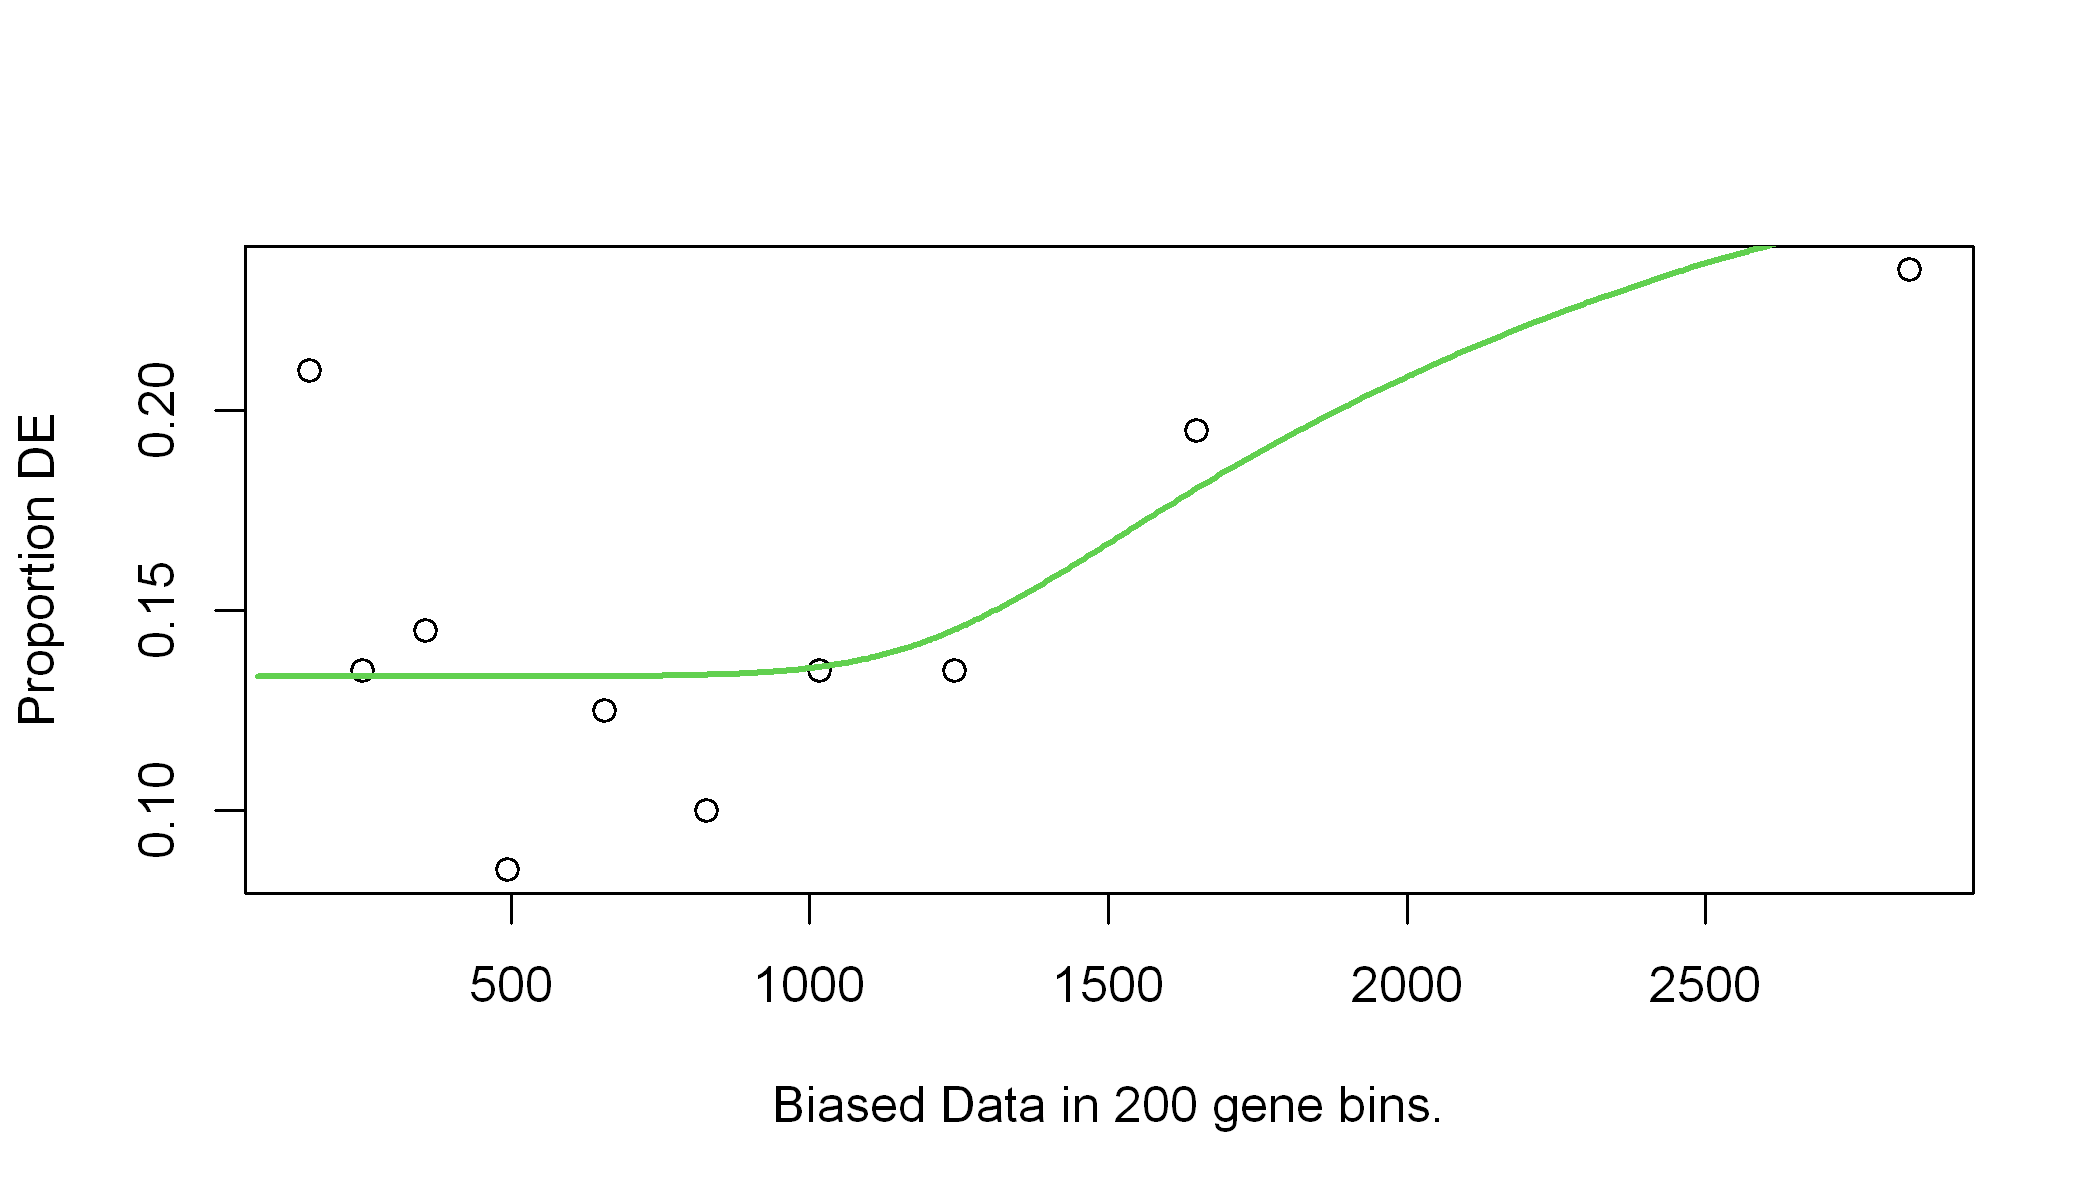

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


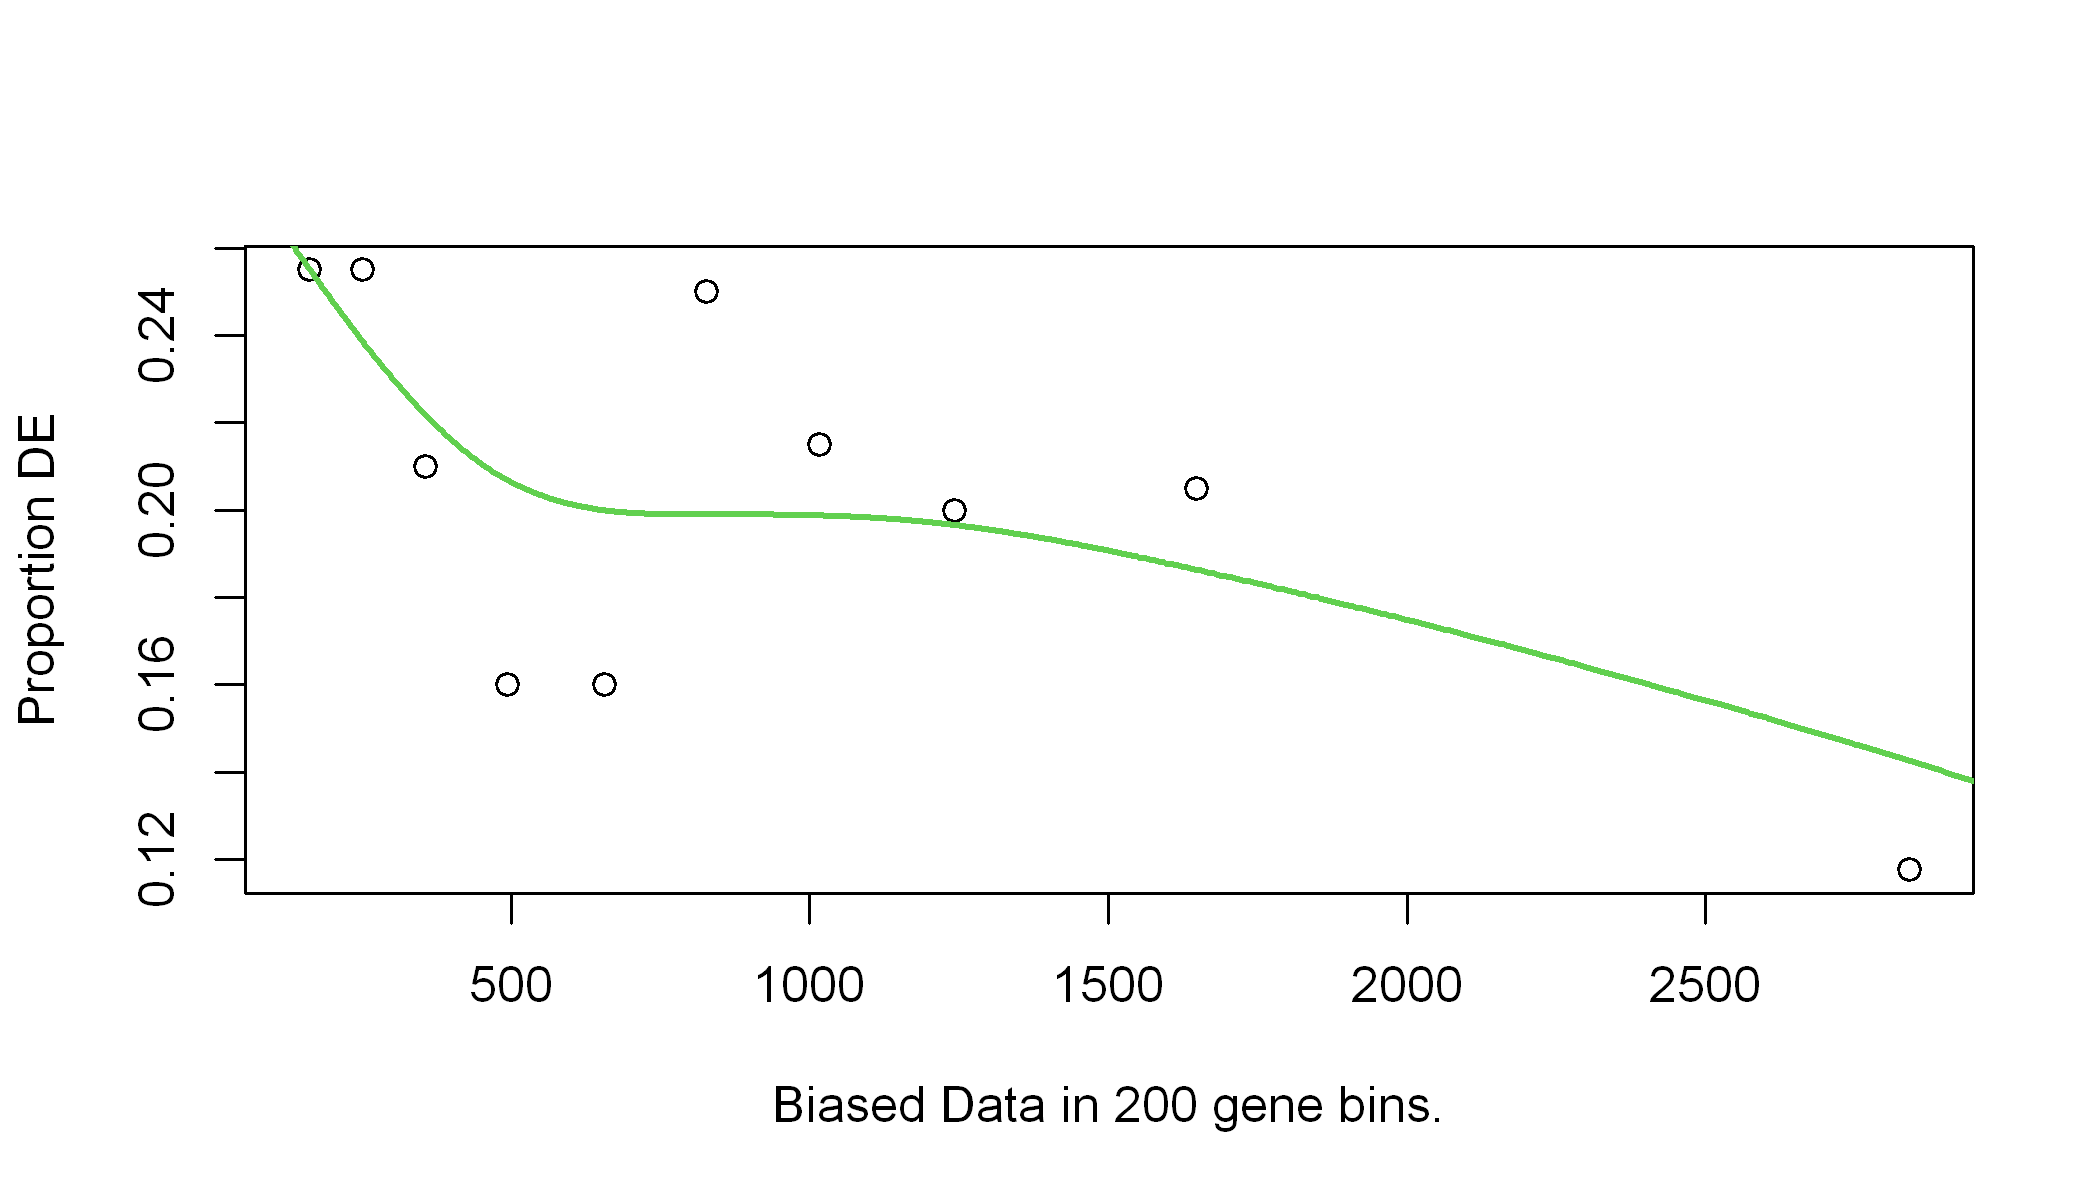

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


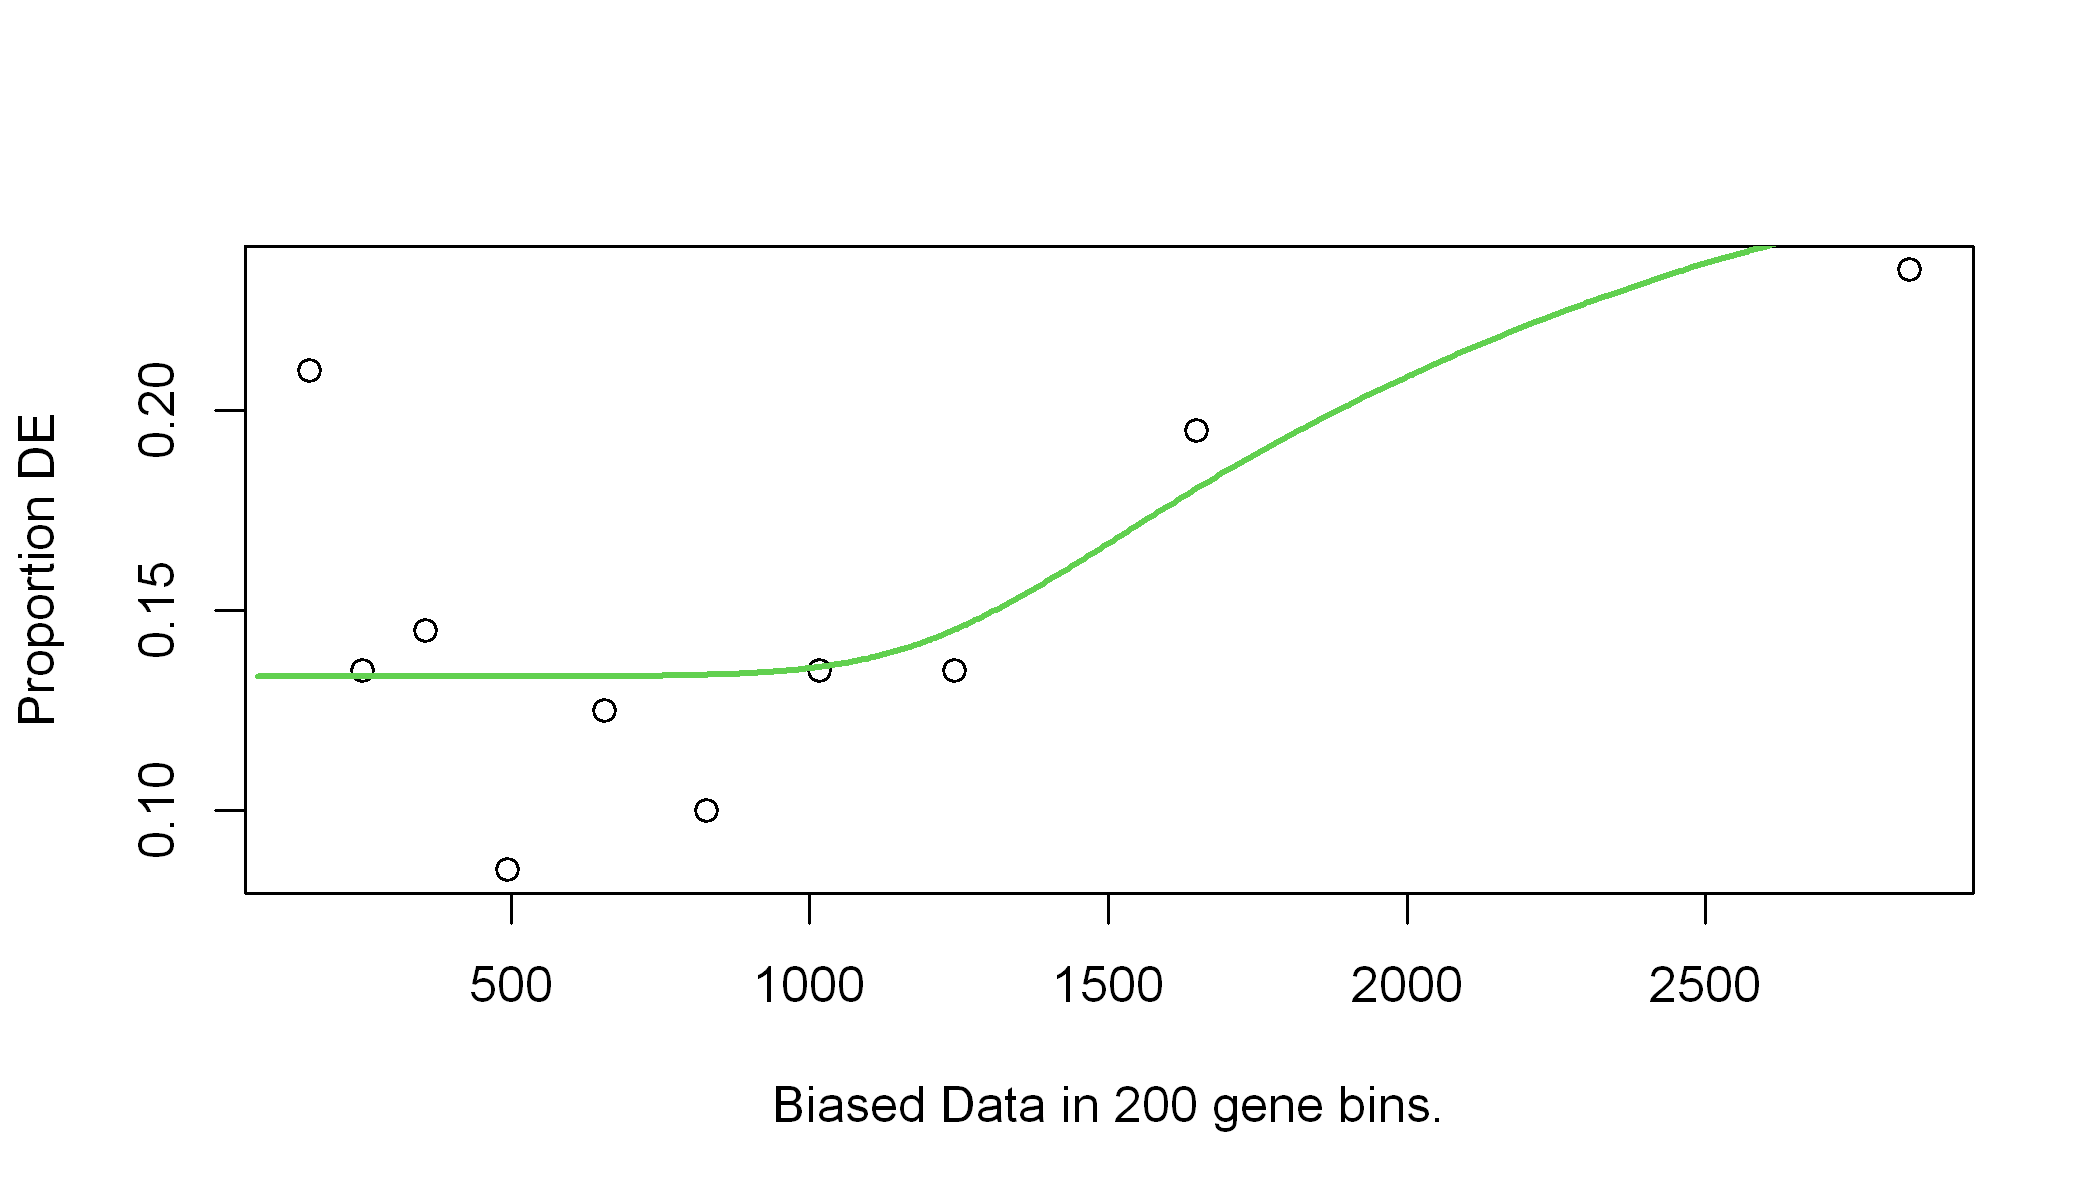

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


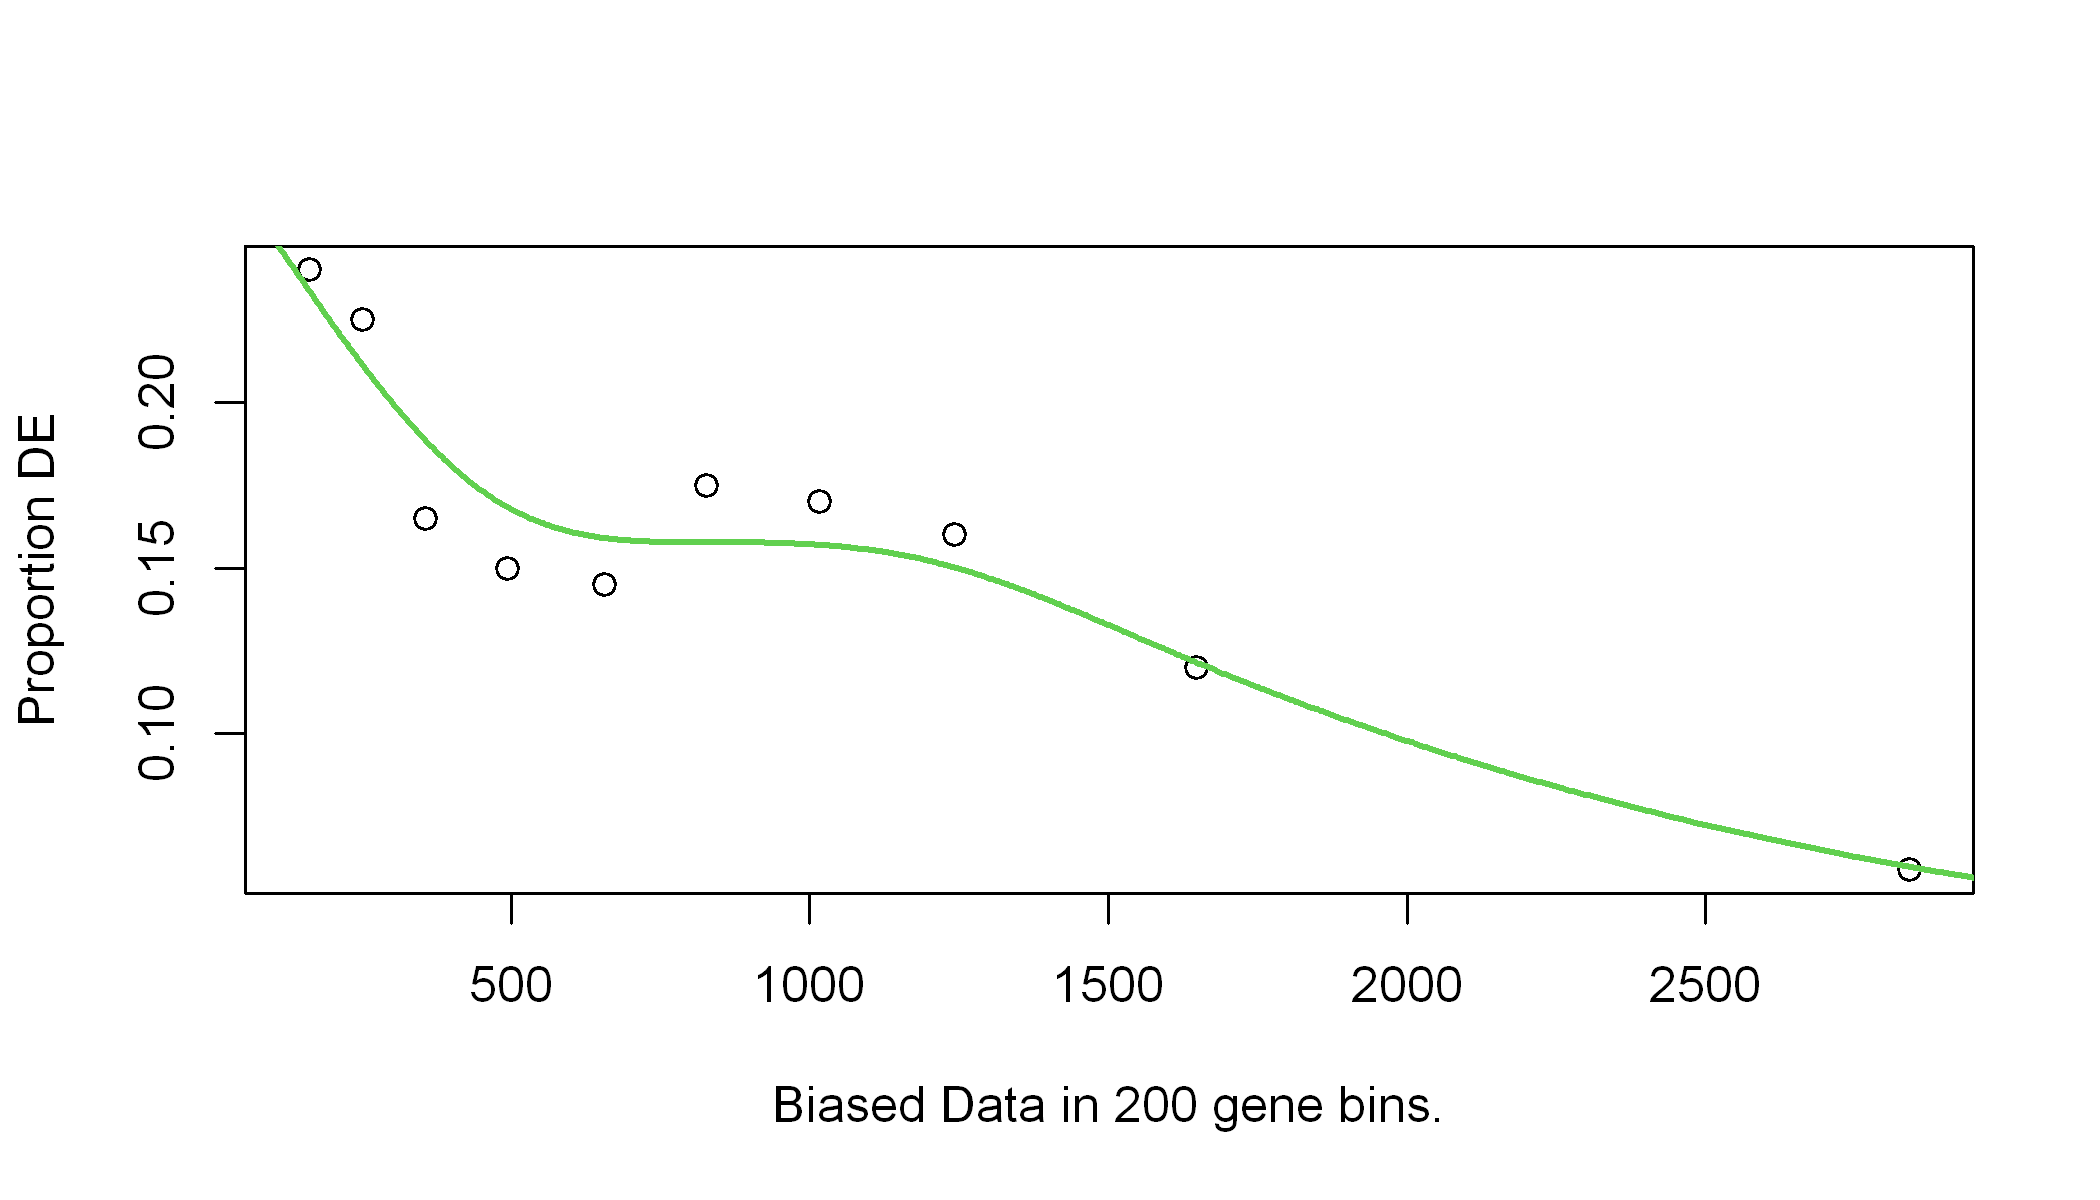

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`
Warning message in pcls(G):
"initial point very close to some inequality constraints"


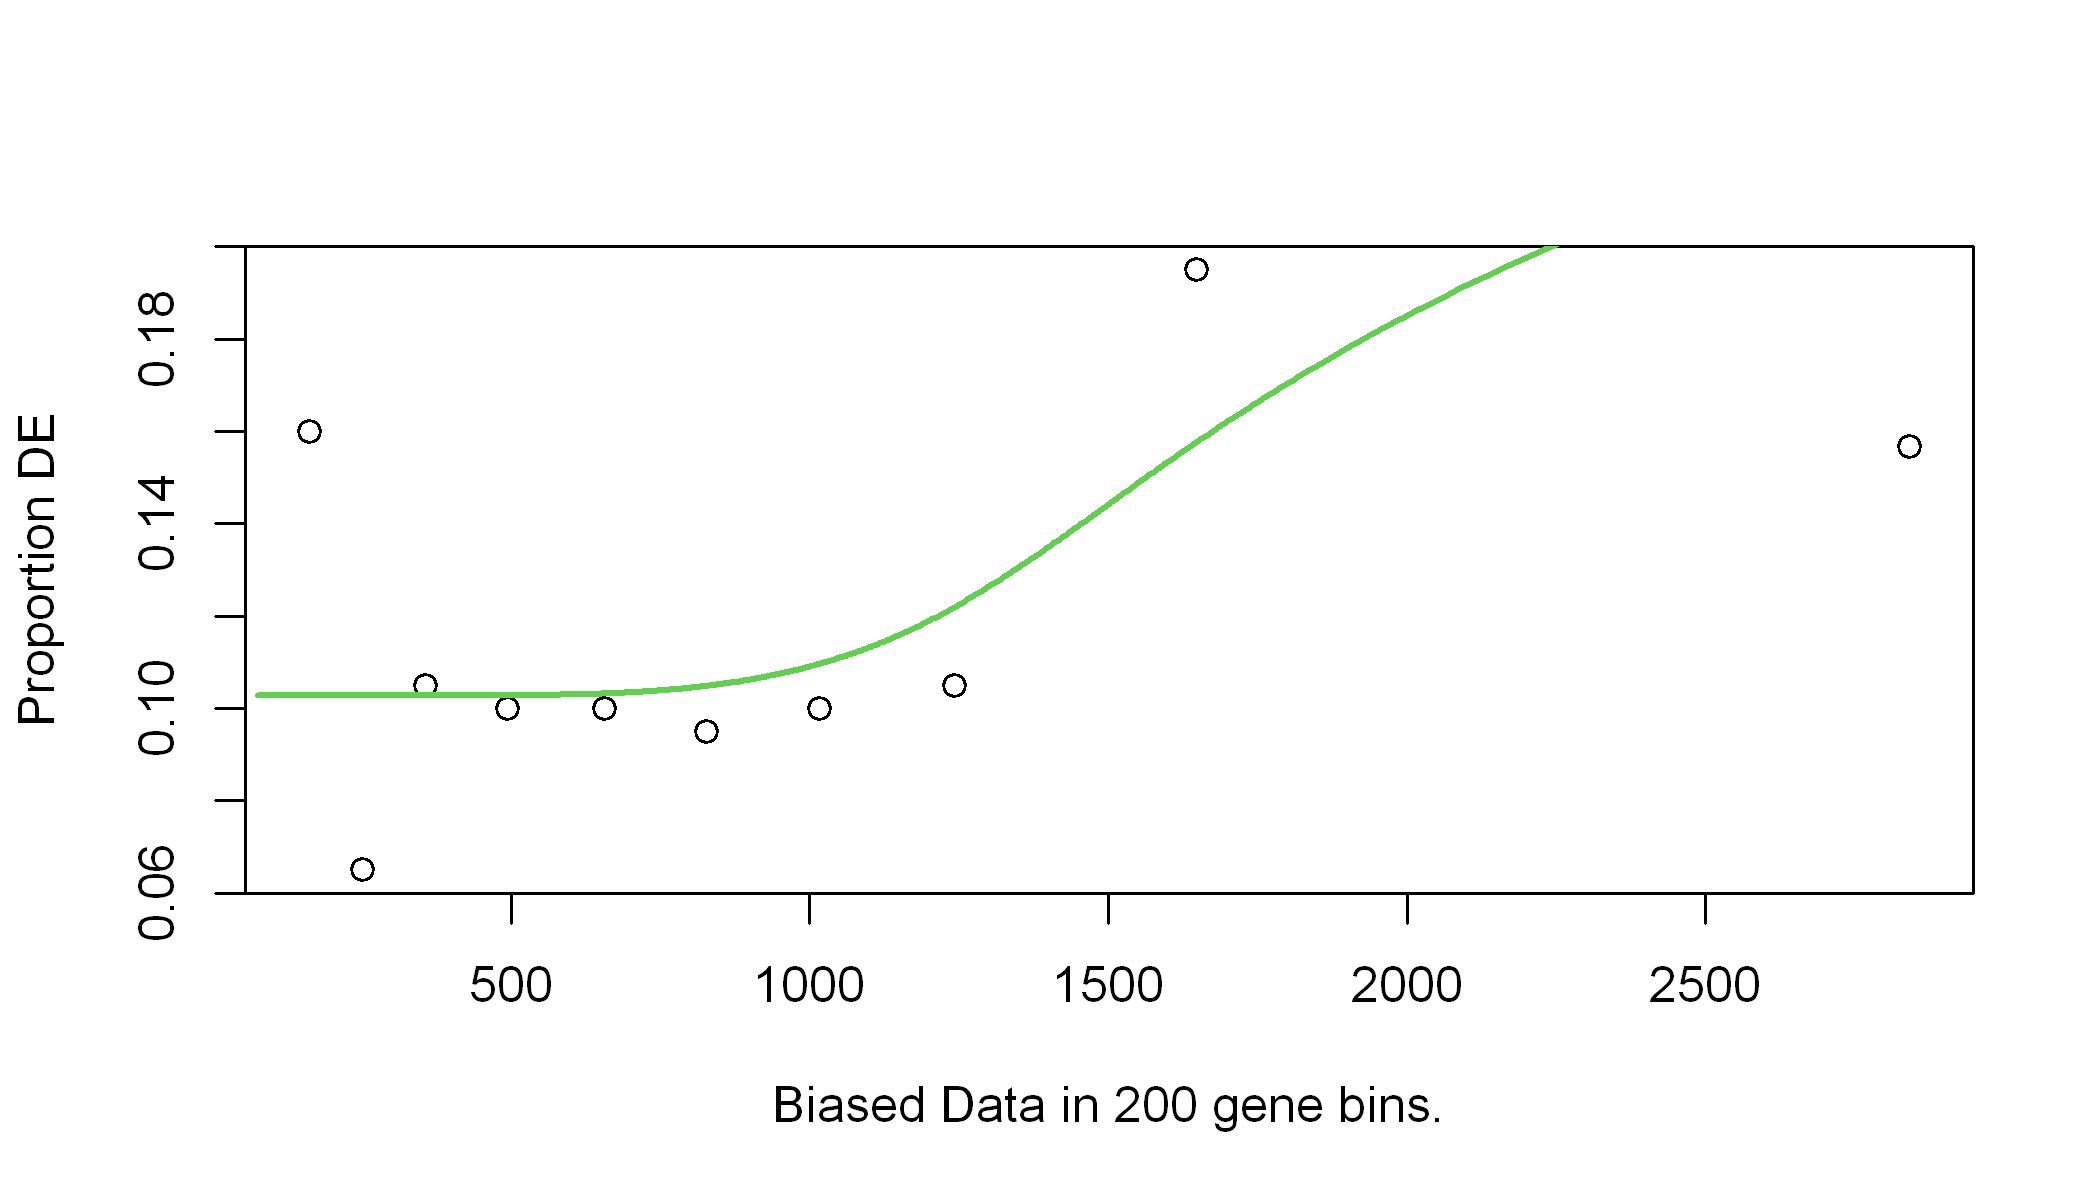

Using manually entered categories.

For 3 genes, we could not find any categories. These genes will be excluded.

To force their use, please run with use_genes_without_cat=TRUE (see documentation).

This was the default behavior for version 1.15.1 and earlier.

Calculating the p-values...

Joining with `by = join_by(category)`


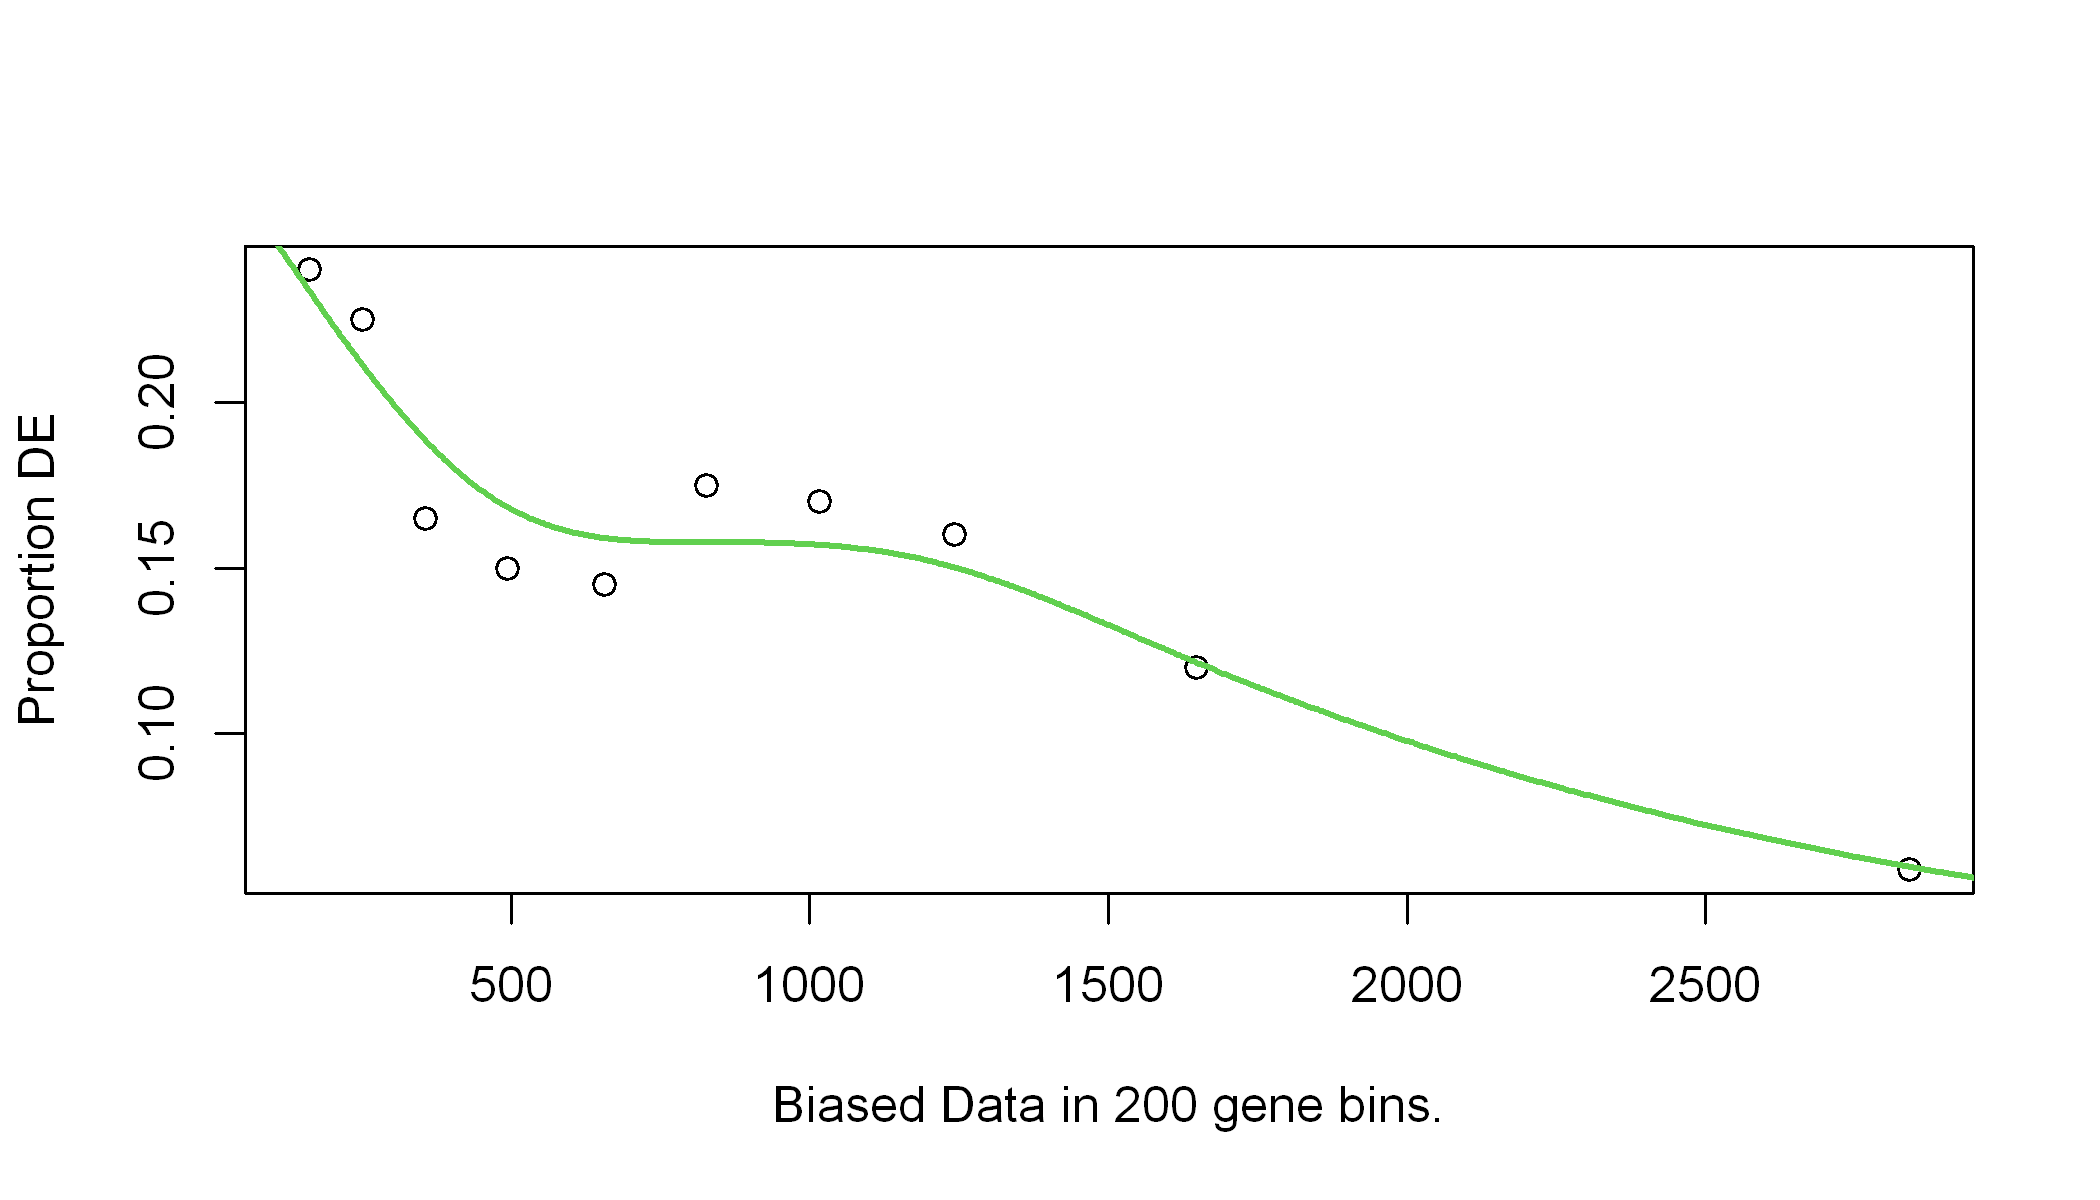

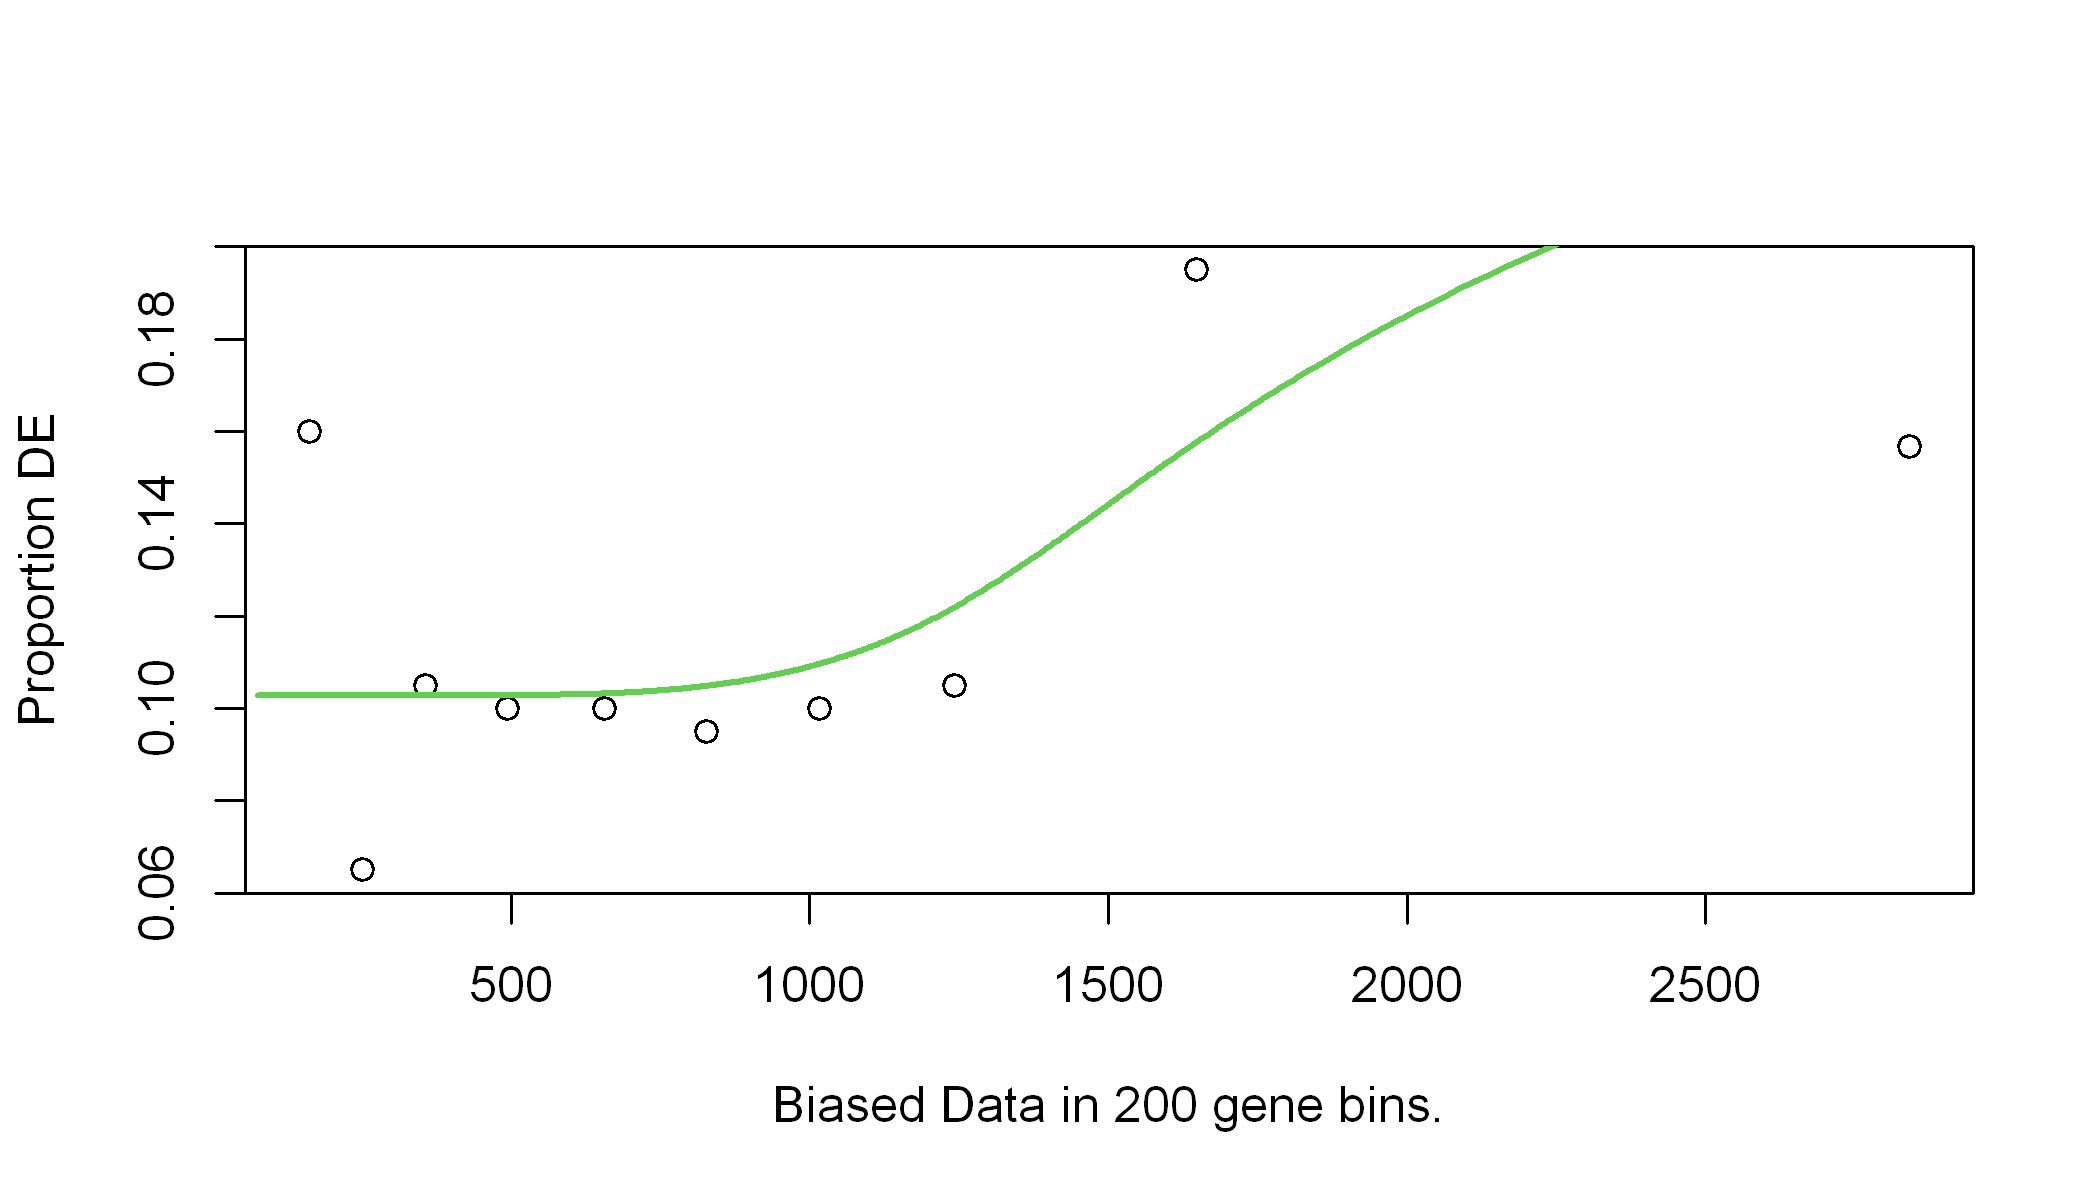

In [55]:
dlist = list()

for (contrastname in unique(df_all$contrast1)) 
{
    for (col in c('sub' ,'path')  #, 'main','ecpath')
             ) 
        {
        for (test in c('down', 'up')) 
            {
              dlist[[length(dlist) + 1]] <- run_enrichment(contrastname, col, test)
        }

    }
}
goseq_res = bind_rows(dlist)


In [56]:
goseq_res %>% write_csv(file.path('DE_results', 'MED4_GOSEQ_results.csv'))

In [57]:
top10 = goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=50) 
  
hpath_df %>% filter(path %in% top10$PATH) %>% select(main,sub, path) %>% distinct() %>% arrange(main)

main                                      
1  09100 Metabolism                          
2  09100 Metabolism                          
3  09100 Metabolism                          
4  09100 Metabolism                          
5  09100 Metabolism                          
6  09100 Metabolism                          
7  09100 Metabolism                          
8  09100 Metabolism                          
9  09100 Metabolism                          
10 09100 Metabolism                          
11 09100 Metabolism                          
12 09100 Metabolism                          
13 09100 Metabolism                          
14 09100 Metabolism                          
15 09100 Metabolism                          
16 09100 Metabolism                          
17 09120 Genetic Information Processing      
18 09120 Genetic Information Processing      
19 09130 Environmental Information Processing
   sub                                           
1  09104 Nucleotide metabolism                   
2  09105 Amino acid metabolism                   
3  09105 Amino acid metabolism                   
4  09101 Carbohydrate metabolism                 
5  09102 Energy metabolism                       
6  09103 Lipid metabolism                        
7  09108 Metabolism of cofactors and vitamins    
8  09104 Nucleotide metabolism                   
9  09101 Carbohydrate metabolism                 
10 09106 Metabolism of other amino acids         
11 09109 Metabolism of terpenoids and polyketides
12 09101 Carbohydrate metabolism                 
13 09105 Amino acid metabolism                   
14 09102 Energy metabolism                       
15 09109 Metabolism of terpenoids and polyketides
16 09102 Energy metabolism                       
17 09122 Translation                             
18 09122 Translation                             
19 09131 Membrane transport                      
   path                                                            
1  00230 Purine metabolism [PATH:ko00230]                          
2  00250 Alanine, aspartate and glutamate metabolism [PATH:ko00250]
3  00220 Arginine biosynthesis [PATH:ko00220]                      
4  00010 Glycolysis / Gluconeogenesis [PATH:ko00010]               
5  00710 Carbon fixation in photosynthetic organisms [PATH:ko00710]
6  00061 Fatty acid biosynthesis [PATH:ko00061]                    
7  00860 Porphyrin metabolism [PATH:ko00860]                       
8  00240 Pyrimidine metabolism [PATH:ko00240]                      
9  00030 Pentose phosphate pathway [PATH:ko00030]                  
10 00480 Glutathione metabolism [PATH:ko00480]                     
11 00906 Carotenoid biosynthesis [PATH:ko00906]                    
12 00630 Glyoxylate and dicarboxylate metabolism [PATH:ko00630]    
13 00340 Histidine metabolism [PATH:ko00340]                       
14 00195 Photosynthesis [PATH:ko00195]                             
15 00900 Terpenoid backbone biosynthesis [PATH:ko00900]            
16 00910 Nitrogen metabolism [PATH:ko00910]                        
17 00970 Aminoacyl-tRNA biosynthesis [PATH:ko00970]                
18 03010 Ribosome [PATH:ko03010]                                   
19 02010 ABC transporters [PATH:ko02010]

In [58]:
top10 = goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=50) 
  
hpath_df %>% filter(sub %in% top10$PATH) %>% select(main,sub) %>% distinct() %>% arrange(main)

main                                      
1  09100 Metabolism                          
2  09100 Metabolism                          
3  09100 Metabolism                          
4  09100 Metabolism                          
5  09100 Metabolism                          
6  09100 Metabolism                          
7  09100 Metabolism                          
8  09100 Metabolism                          
9  09100 Metabolism                          
10 09120 Genetic Information Processing      
11 09130 Environmental Information Processing
12 09140 Cellular Processes                  
   sub                                              
1  09104 Nucleotide metabolism                      
2  09105 Amino acid metabolism                      
3  09108 Metabolism of cofactors and vitamins       
4  09101 Carbohydrate metabolism                    
5  09102 Energy metabolism                          
6  09103 Lipid metabolism                           
7  09106 Metabolism of other amino acids            
8  09110 Biosynthesis of other secondary metabolites
9  09109 Metabolism of terpenoids and polyketides   
10 09122 Translation                                
11 09131 Membrane transport                         
12 09143 Cell growth and death

In [59]:
head(goseq_res)

category PATH                                          
1 09122    09122 Translation                             
2 09109    09109 Metabolism of terpenoids and polyketides
3 09102    09102 Energy metabolism                       
4 09145    09145 Cellular community - prokaryotes        
5 09103    09103 Lipid metabolism                        
6 09132    09132 Signal transduction                     
  over_represented_pvalue padj         under_represented_pvalue numDEInCat
1 1.449809e-09            2.609655e-08 1.0000000                23        
2 1.514088e-01            1.000000e+00 0.9480650                 4        
3 2.202984e-01            1.000000e+00 0.8678961                11        
4 2.860677e-01            1.000000e+00 0.8900496                 3        
5 5.852261e-01            1.000000e+00 0.6993905                 2        
6 6.521043e-01            1.000000e+00 0.6295640                 2        
  numInCat main                                       type enrich contrast   
1  74      09120 Genetic Information Processing       down sub    C2vsC1_prot
2  25      09100 Metabolism                           down sub    C2vsC1_prot
3 105      09100 Metabolism                           down sub    C2vsC1_prot
4  22      09140 Cellular Processes                   down sub    C2vsC1_prot
5  24      09100 Metabolism                           down sub    C2vsC1_prot
6  27      09130 Environmental Information Processing down sub    C2vsC1_prot
  organism
1 MED4    
2 MED4    
3 MED4    
4 MED4    
5 MED4    
6 MED4

In [60]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)

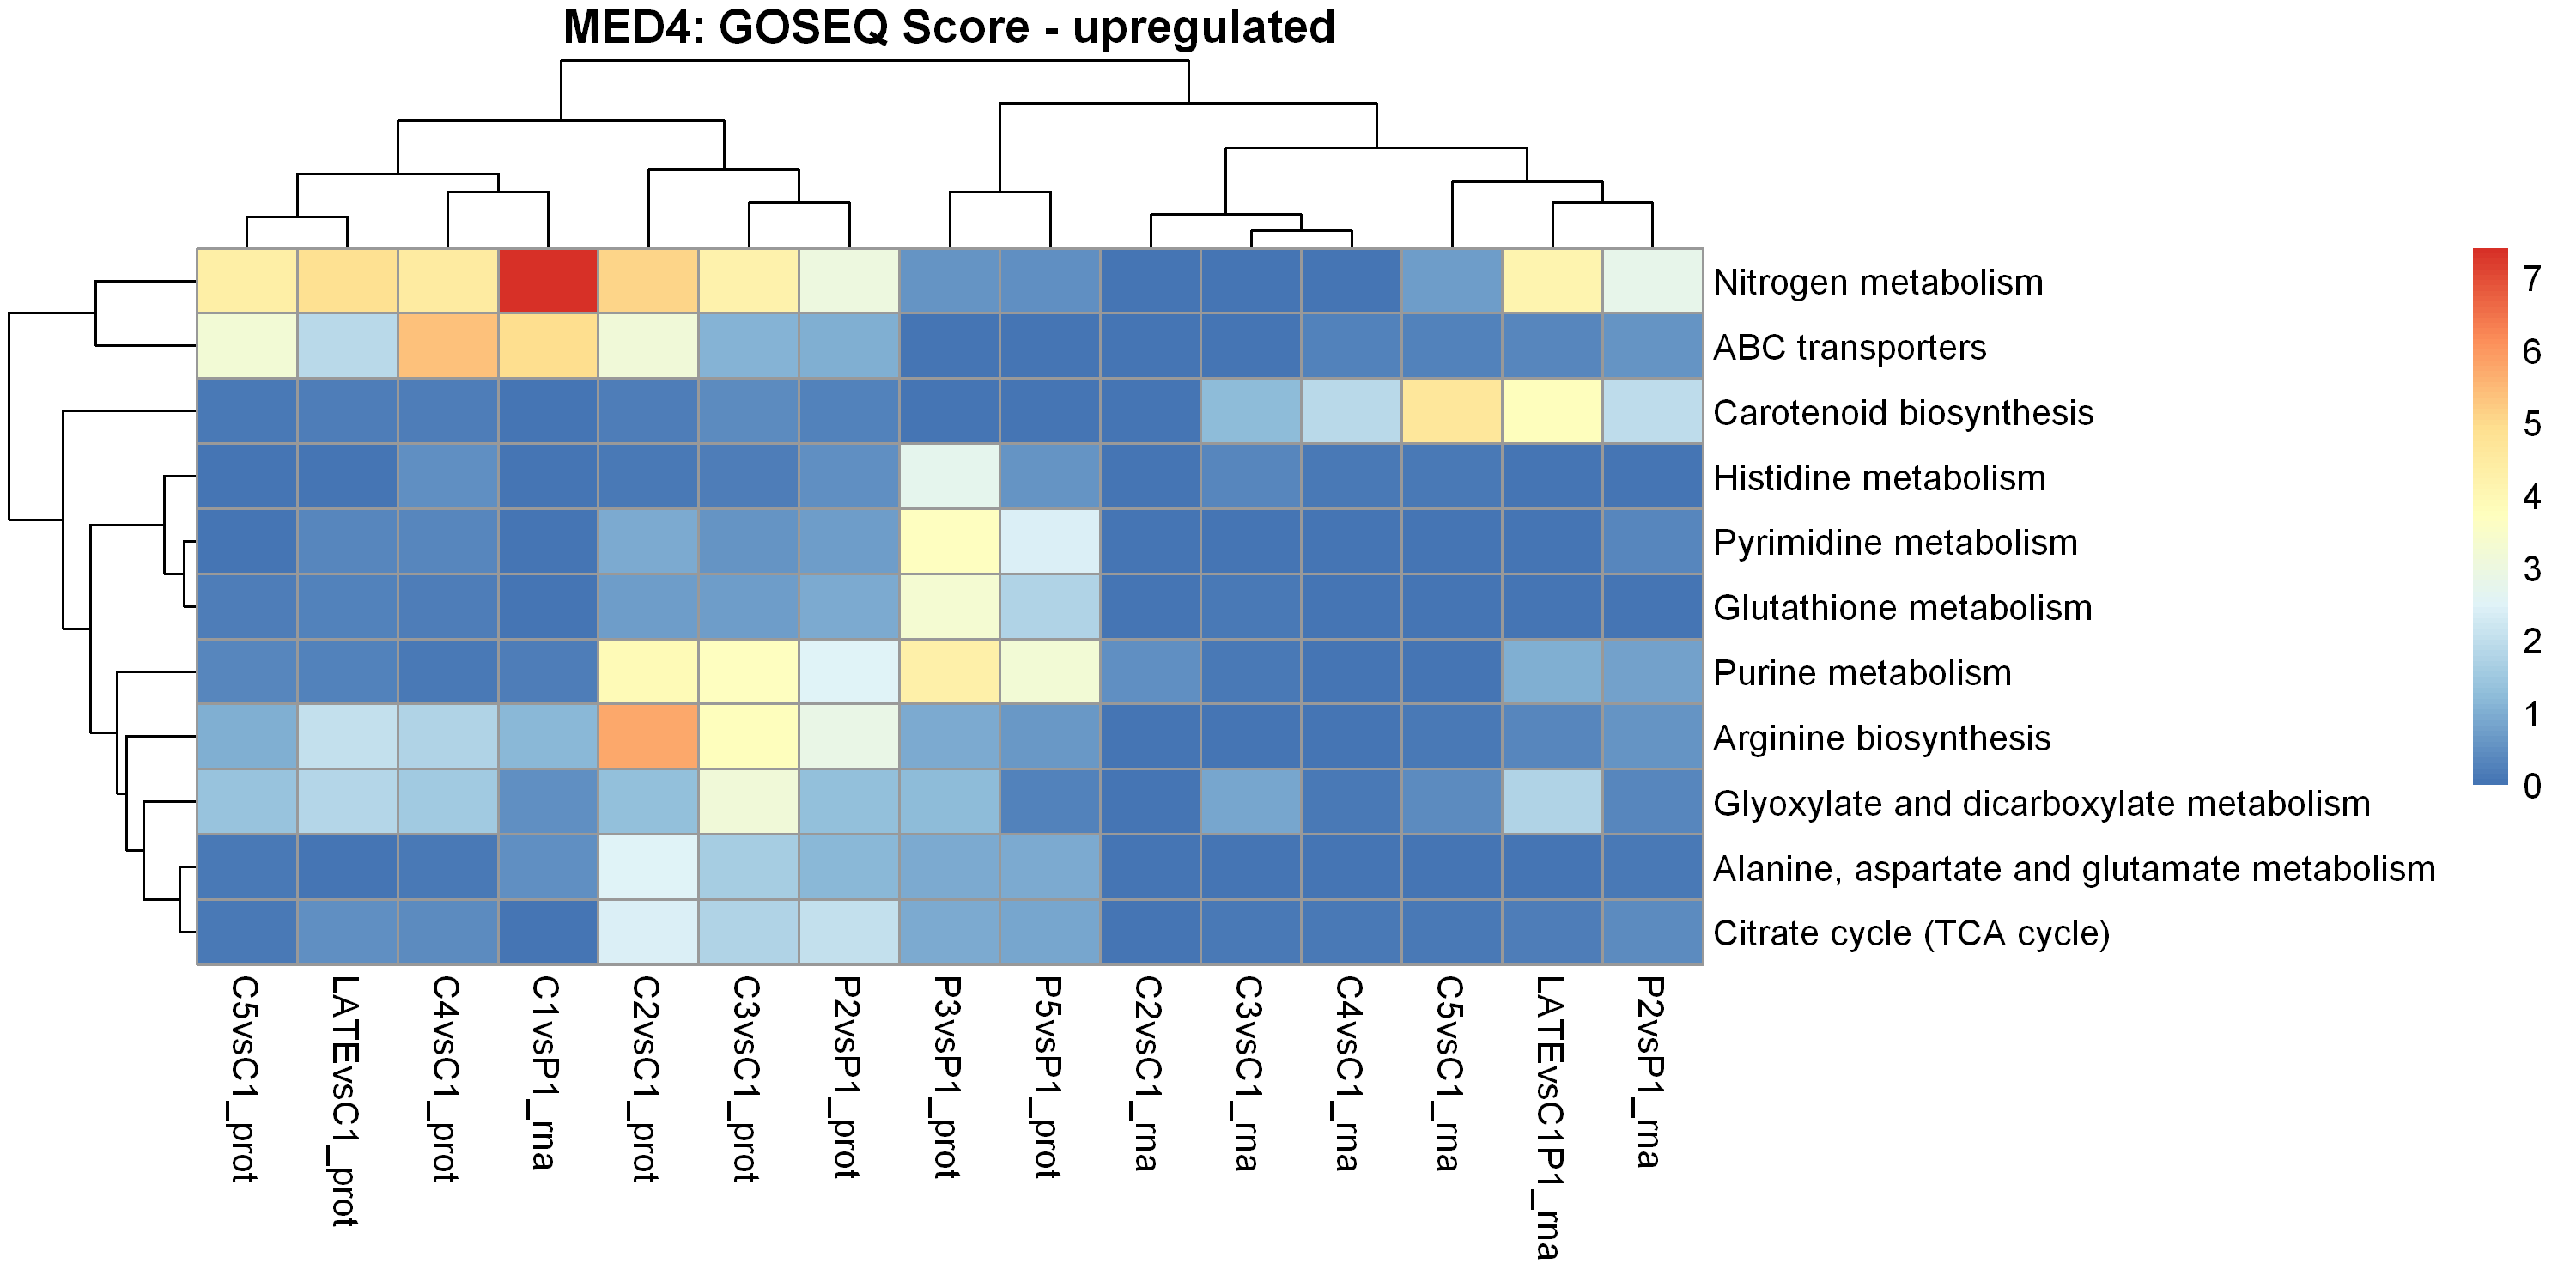

In [61]:
toppaths = goseq_res %>% 
    filter(enrich=='path', padj < 0.05, type=='up') %>% 
    distinct(PATH)

goseq_res %>% filter(enrich=='path', PATH %in% toppaths$PATH, type=='up') %>% 
    mutate(score = -log10(over_represented_pvalue)) %>%
    mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
    extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
    pivot_wider(names_from = contrast, values_from = score, id_cols =pathway) %>% 
     replace(is.na(.), 1) %>% column_to_rownames('pathway') %>% #head()
    pheatmap(main='MED4: GOSEQ Score - upregulated')

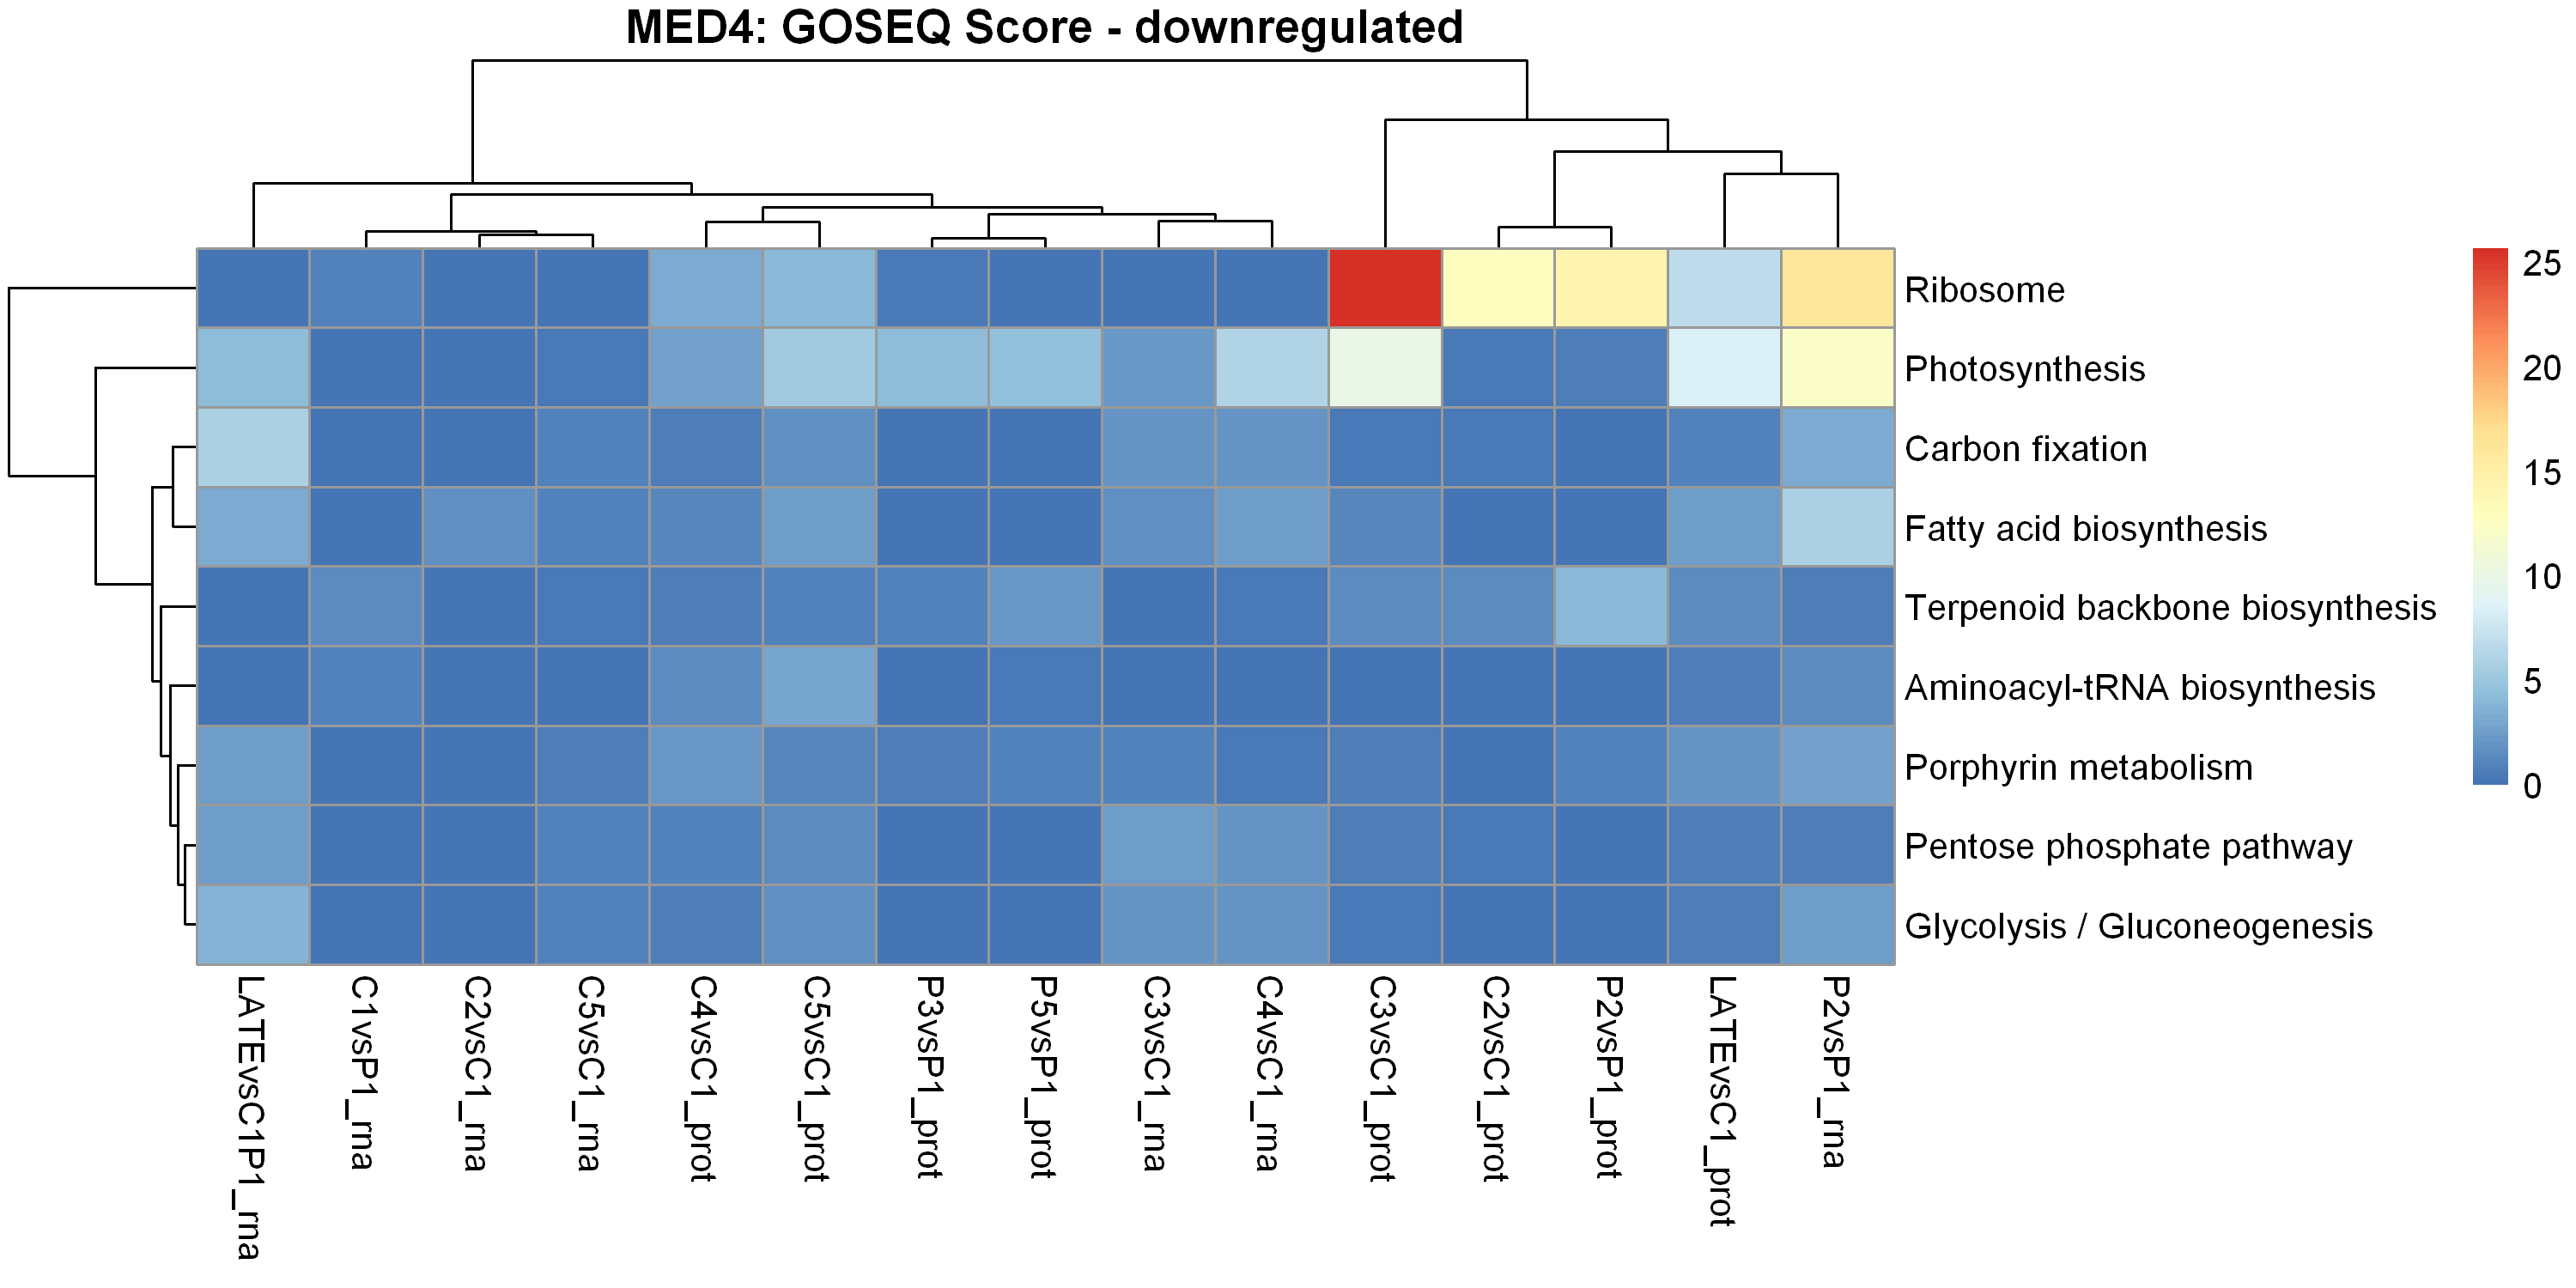

In [62]:
toppaths = goseq_res %>% 
    filter(enrich=='path', padj < 0.05, type=='down') %>% 
    distinct(PATH)

goseq_res %>% filter(enrich=='path', PATH %in% toppaths$PATH, type=='down') %>% 
    mutate(score = -log10(over_represented_pvalue)) %>%
    mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
    extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
    pivot_wider(names_from = contrast, values_from = score, id_cols =pathway) %>% 
     replace(is.na(.), 1) %>% column_to_rownames('pathway') %>% #head()
    pheatmap(main='MED4: GOSEQ Score - downregulated')

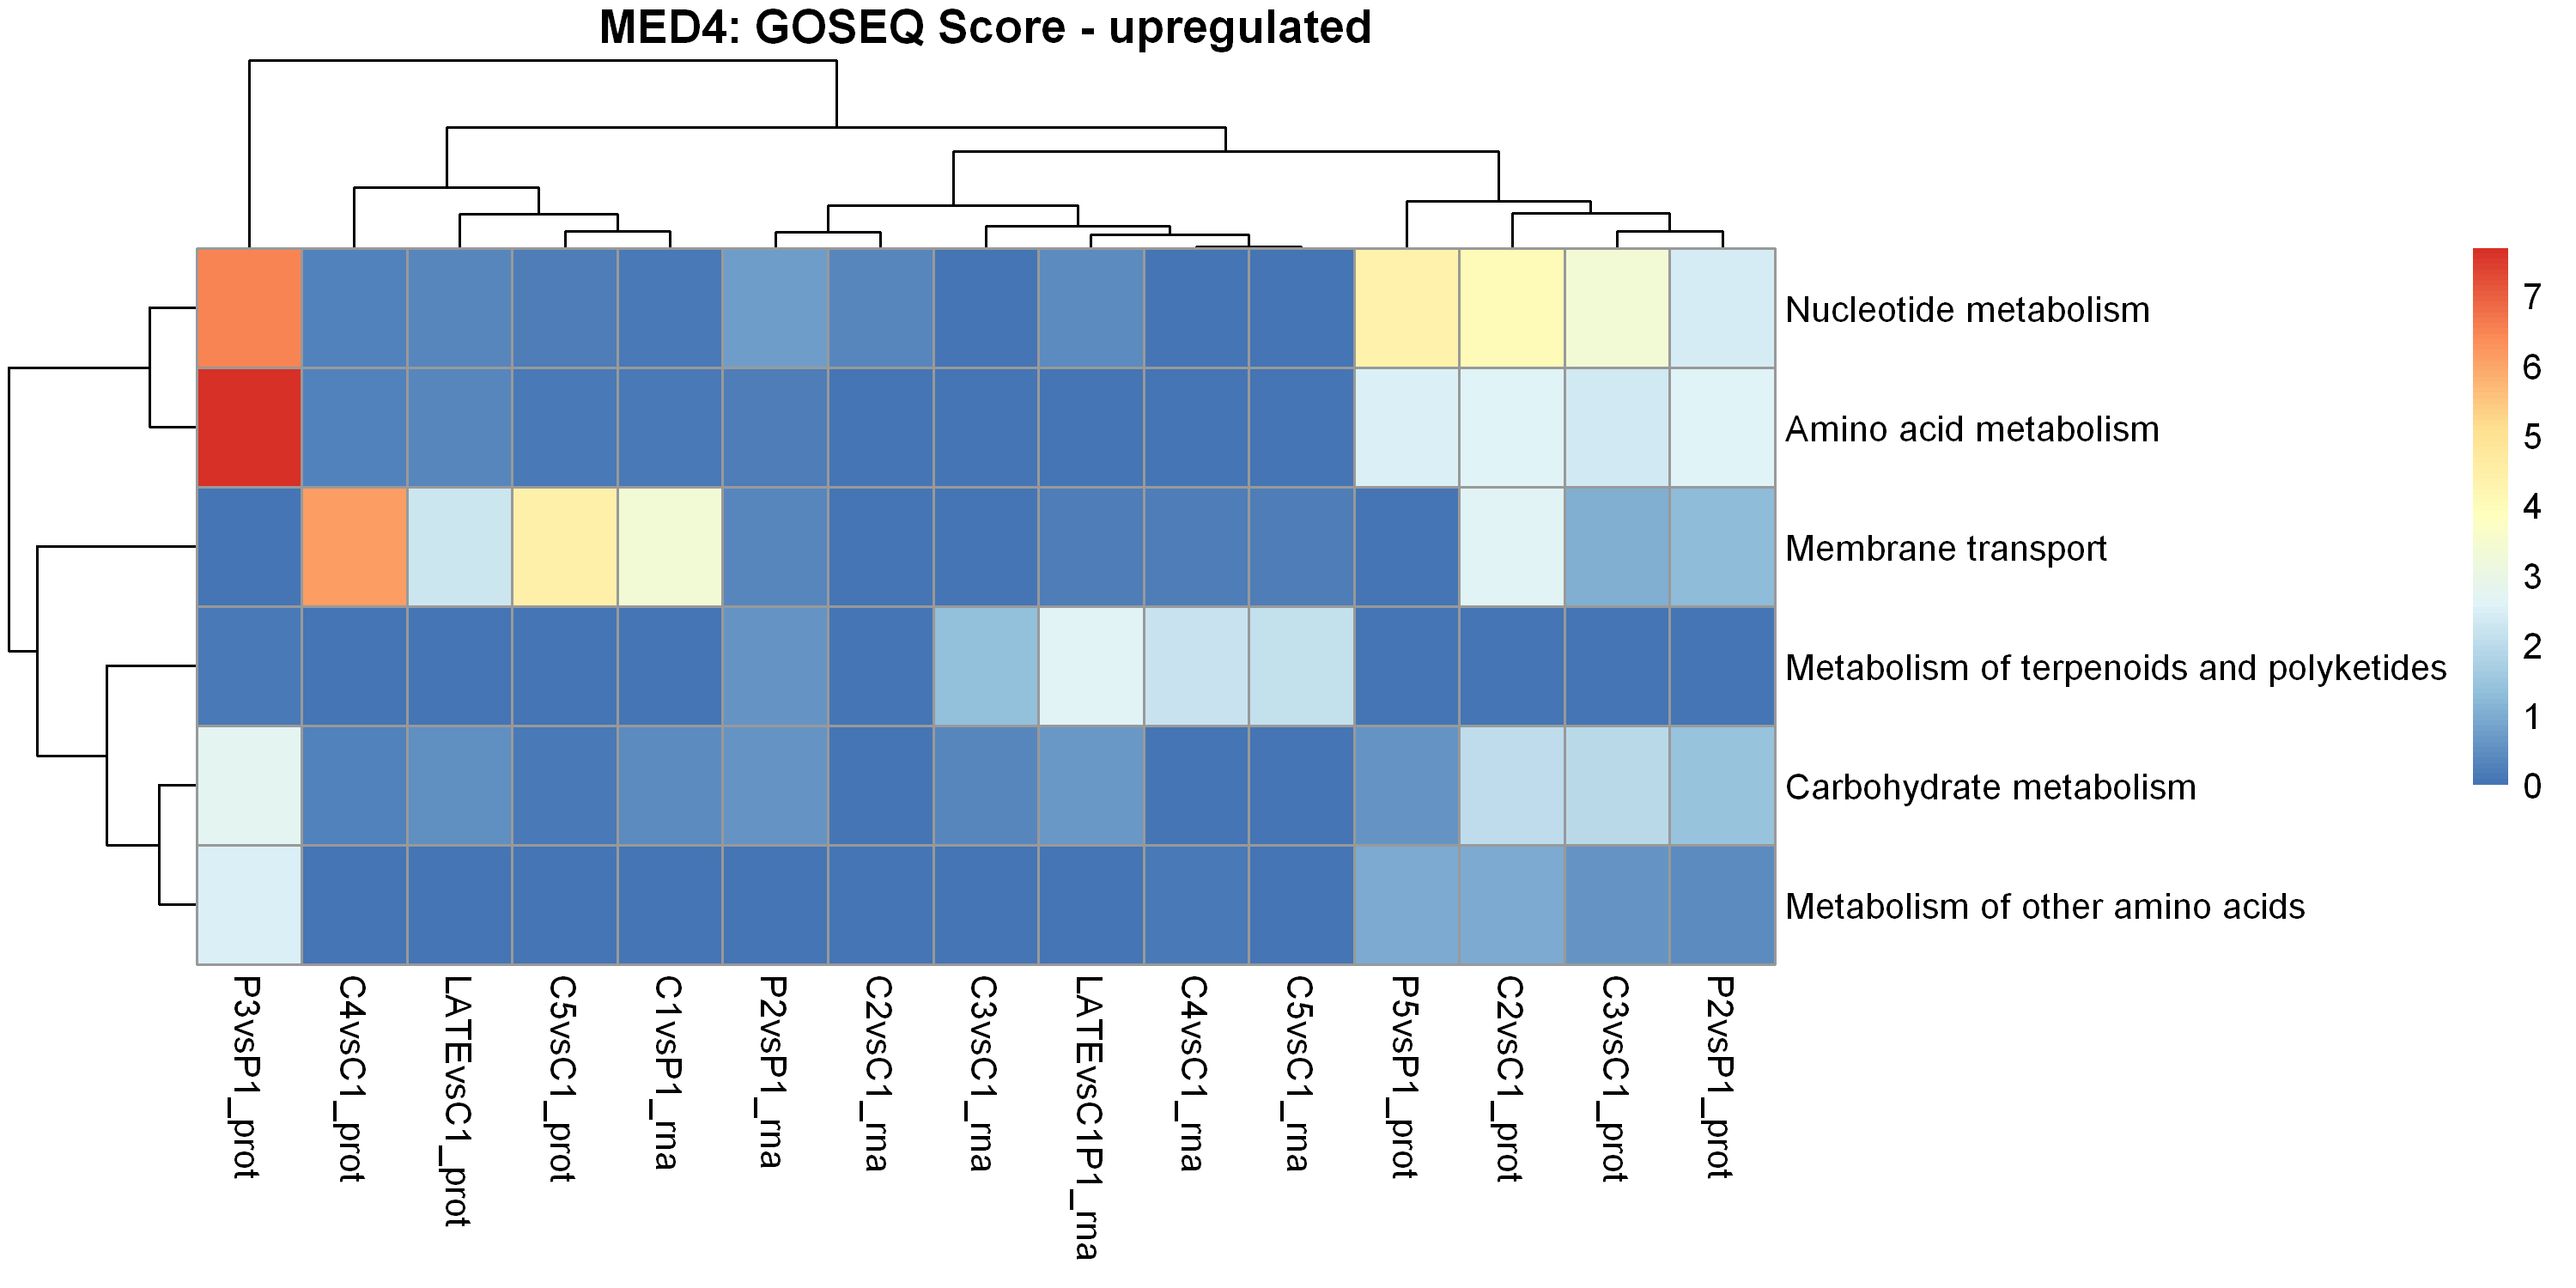

In [63]:
toppaths = goseq_res %>% 
    filter(enrich=='sub', padj < 0.05, type=='up') %>% 
    distinct(PATH)

goseq_res %>% filter(enrich=='sub', PATH %in% toppaths$PATH, type=='up') %>% 
    mutate(score = -log10(over_represented_pvalue)) %>%
    mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
    extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
    pivot_wider(names_from = contrast, values_from = score, id_cols =pathway) %>% 
     replace(is.na(.), 1) %>% column_to_rownames('pathway') %>% #head()
    pheatmap(main='MED4: GOSEQ Score - upregulated')

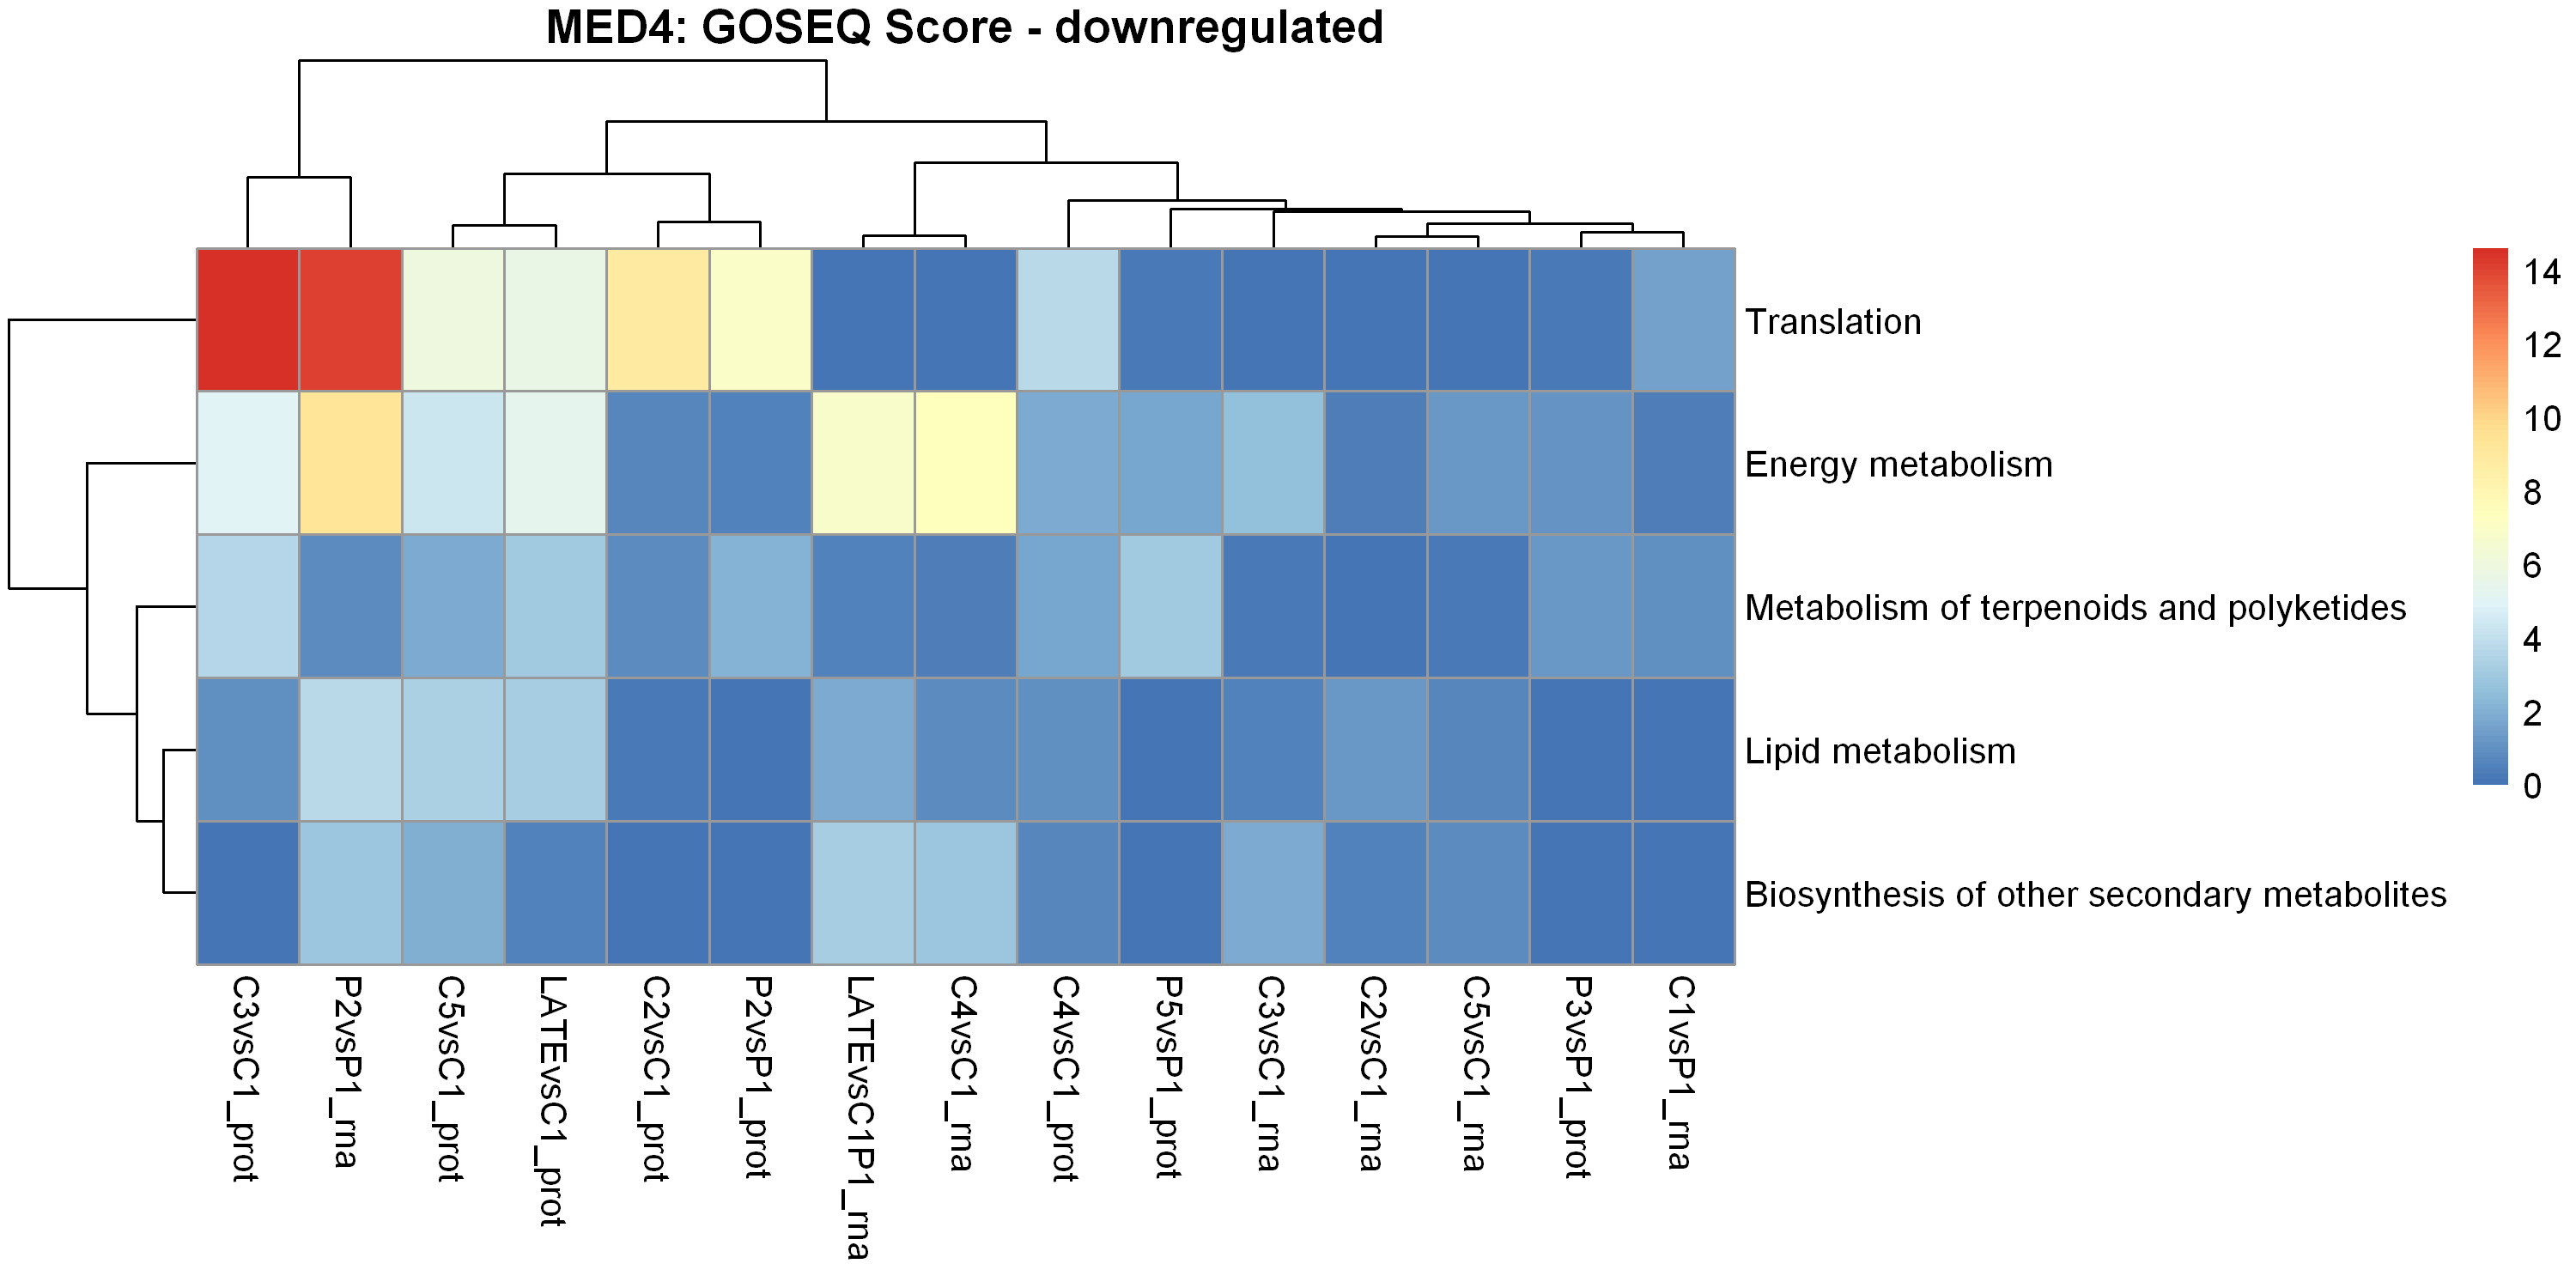

In [64]:
toppaths = goseq_res %>% 
    filter(enrich=='sub', padj < 0.05, type=='down') %>% 
    distinct(PATH)

goseq_res %>% filter(enrich=='sub', PATH %in% toppaths$PATH, type=='down') %>% 
    mutate(score = -log10(over_represented_pvalue)) %>%
    mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
    extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
    pivot_wider(names_from = contrast, values_from = score, id_cols =pathway) %>% 
     replace(is.na(.), 1) %>% column_to_rownames('pathway') %>% #head()
    pheatmap(main='MED4: GOSEQ Score - downregulated')

Warning message:
"Removed 5 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_point()`)."


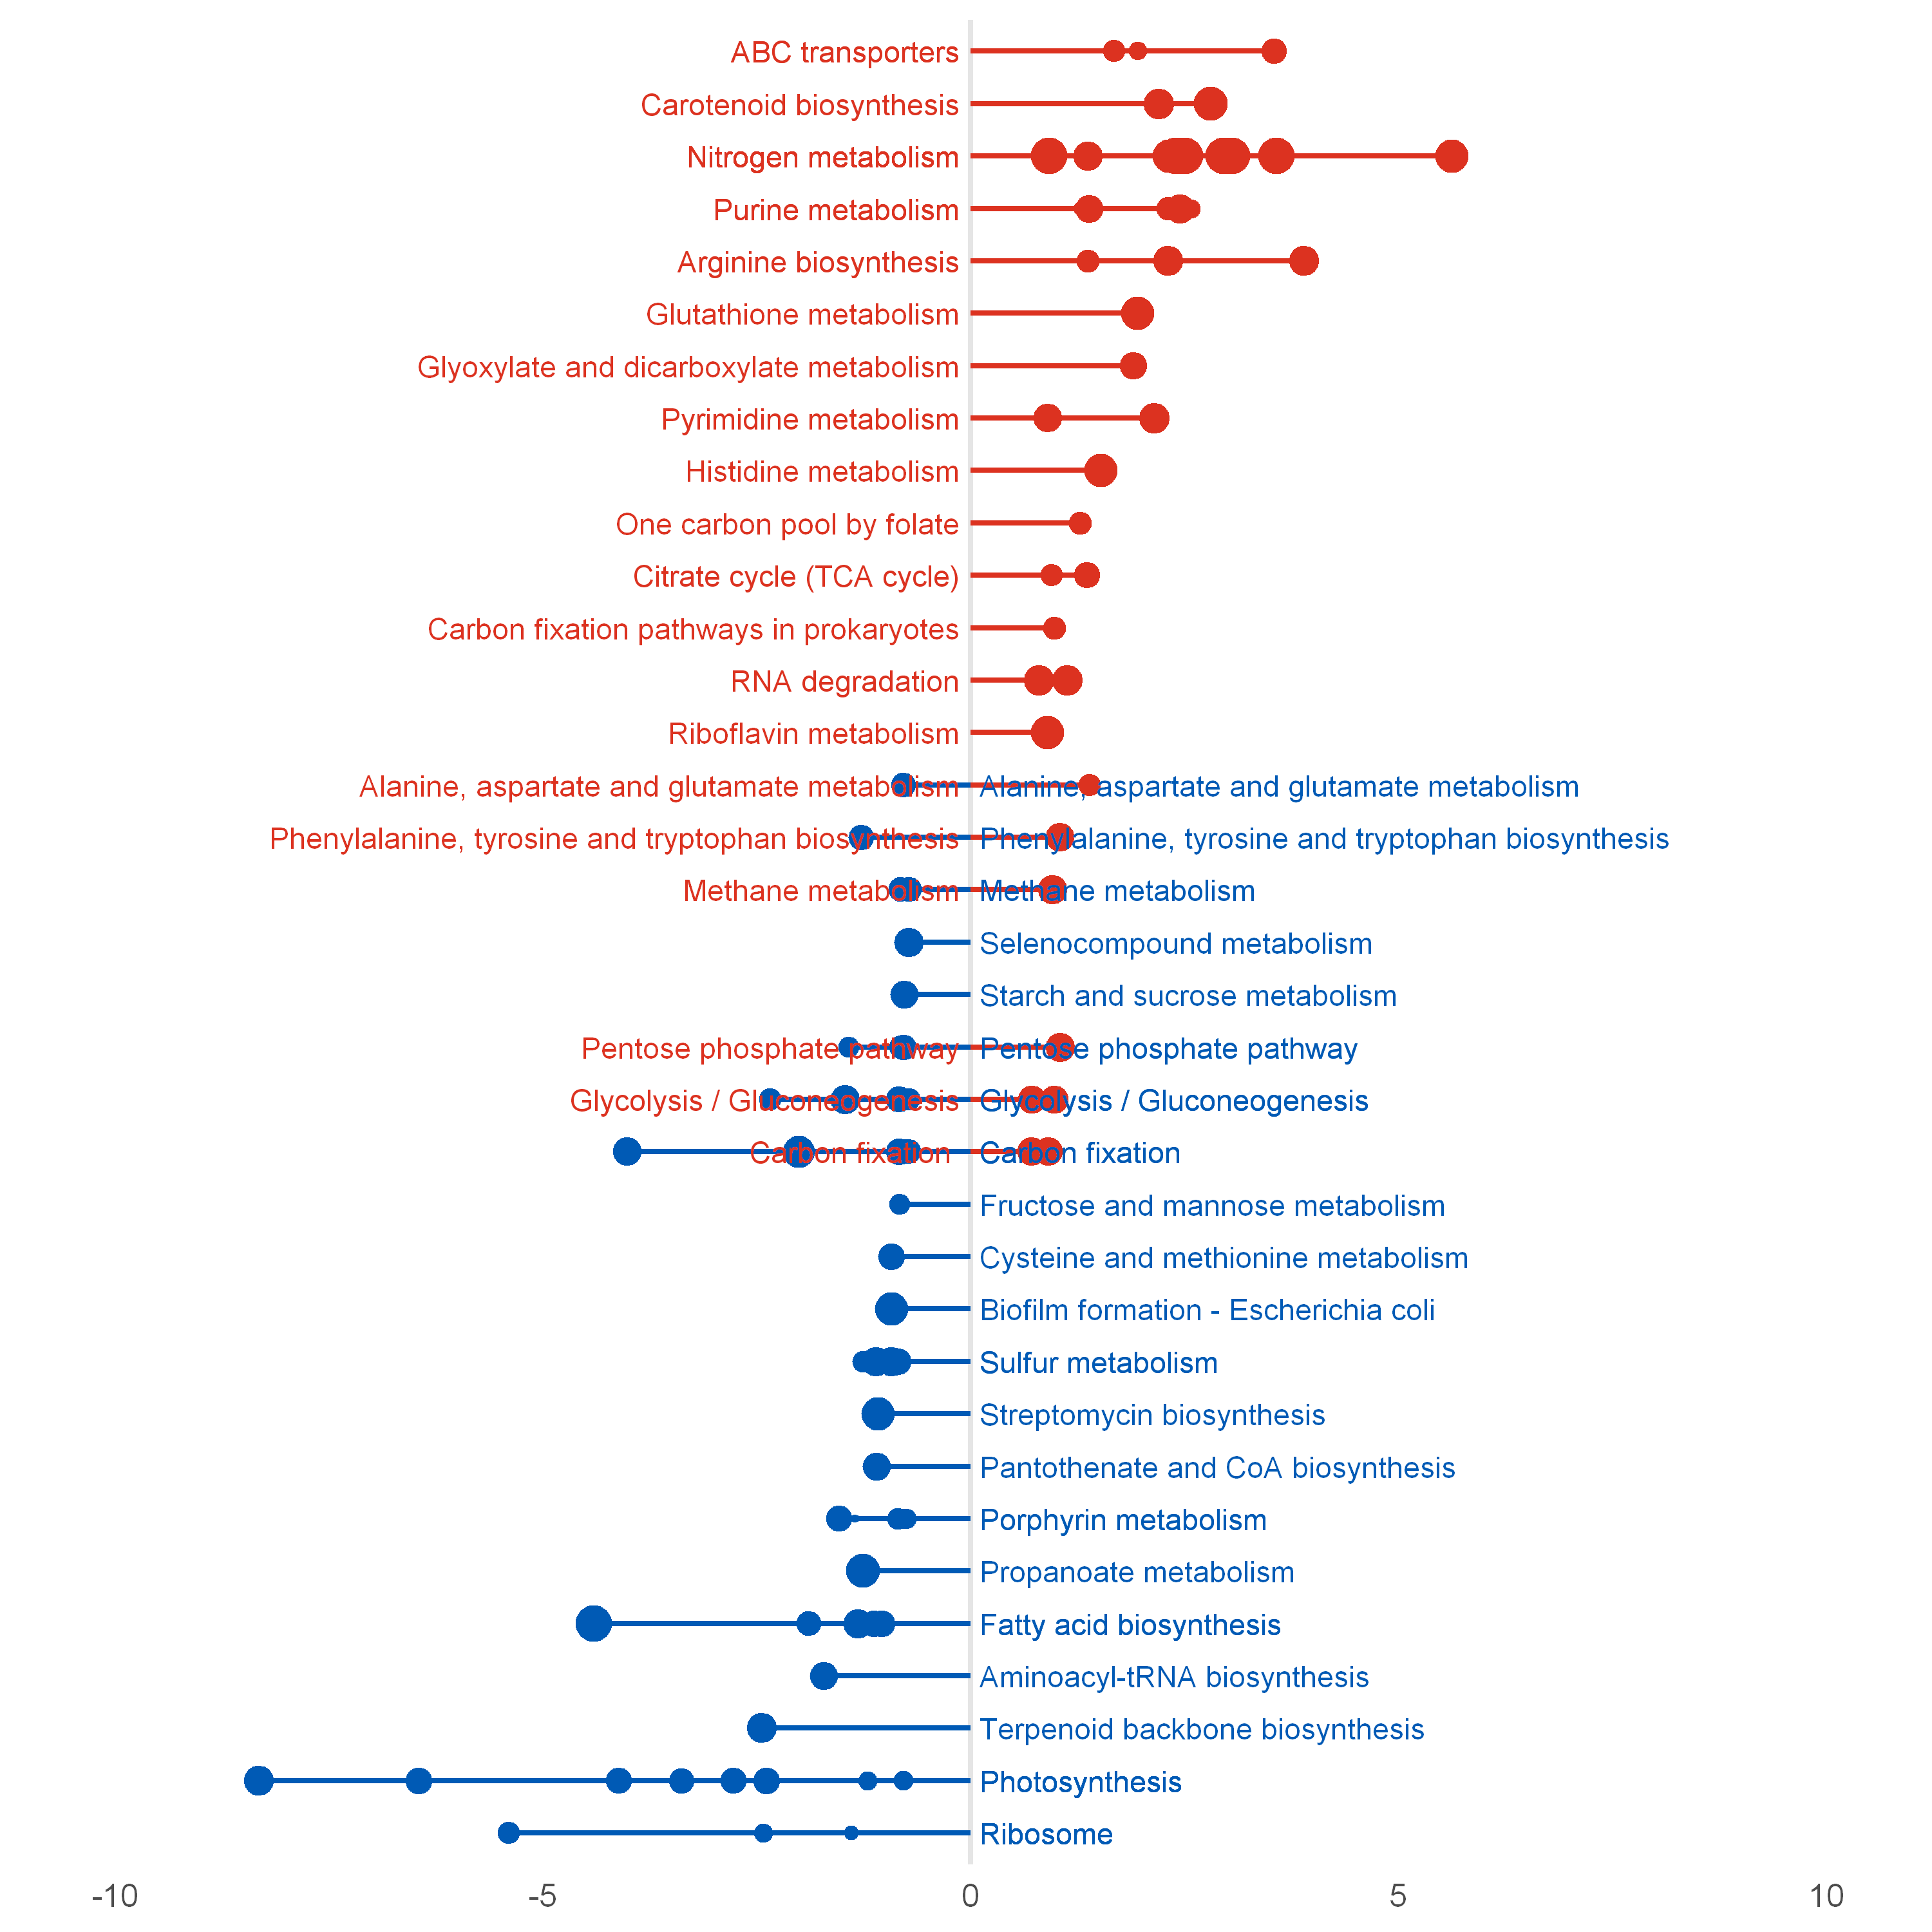

In [65]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=100) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>%

ggplot(aes(y=pathway, x=padj_score, size=Ratio*40, color=type)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), size=1) +
  geom_point() + 
 scale_color_manual(values = c(up='#DC3220', down='#005AB5')) + # , limit=c(-15,15)) +
  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




In [71]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=100) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>% distinct(contrast)




contrast      
1  C3vsC1_prot   
2  P2vsP1_rna    
3  P2vsP1_prot   
4  C2vsC1_prot   
5  LATEvsC1_prot 
6  C1vsP1_rna    
7  C4vsC1_rna    
8  LATEvsC1P1_rna
9  C4vsC1_prot   
10 C5vsC1_prot   
11 C5vsC1_rna    
12 P5vsP1_prot   
13 P3vsP1_prot   
14 C3vsC1_rna

Warning message:
"Removed 2 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_point()`)."


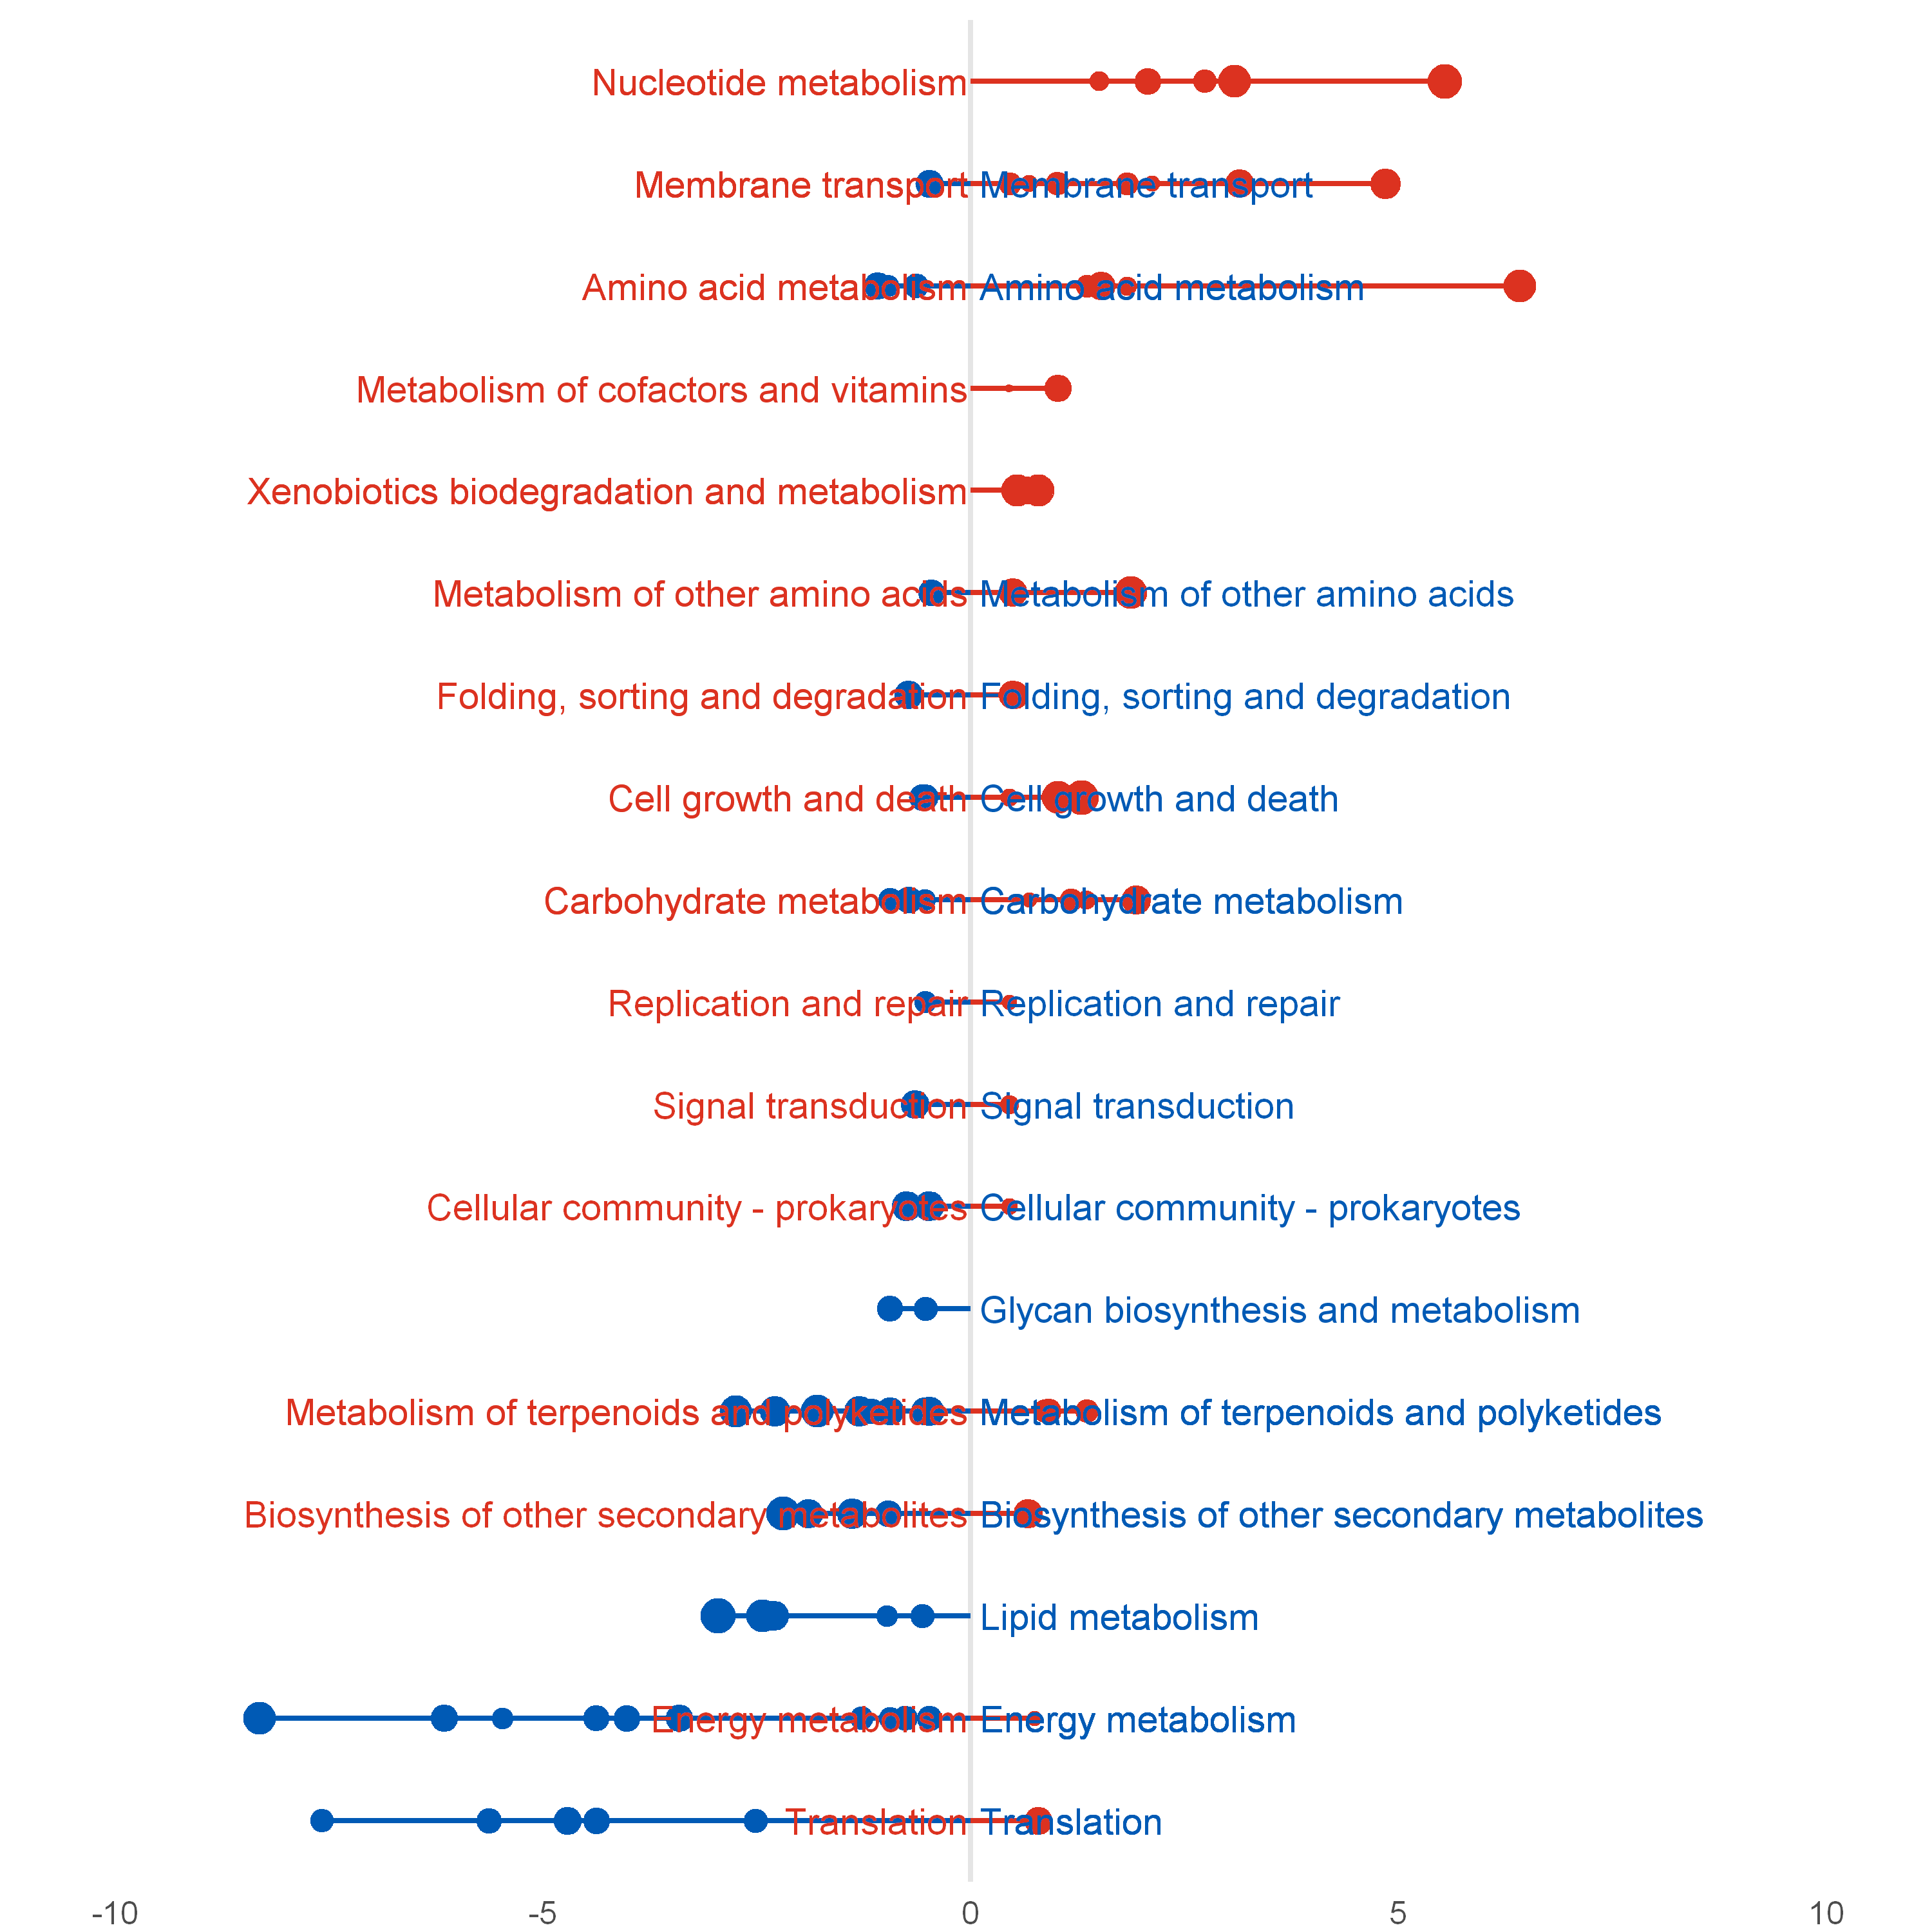

In [68]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)
goseq_res %>% 
  filter(enrich == 'sub') %>%
  #filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  mutate(PATH = str_replace(PATH, "in photosynthetic organisms", "")) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=100) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type != 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type != 'down', -0.03, 0.1)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_score)) %>%

ggplot(aes(y=pathway, x=padj_score, size=Ratio*40, color=type)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), size=1) +
  geom_point() + 
 scale_color_manual(values = c(up='#DC3220', down='#005AB5')) + # , limit=c(-15,15)) +
  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




Warning message:
"Removed 5 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_point()`)."


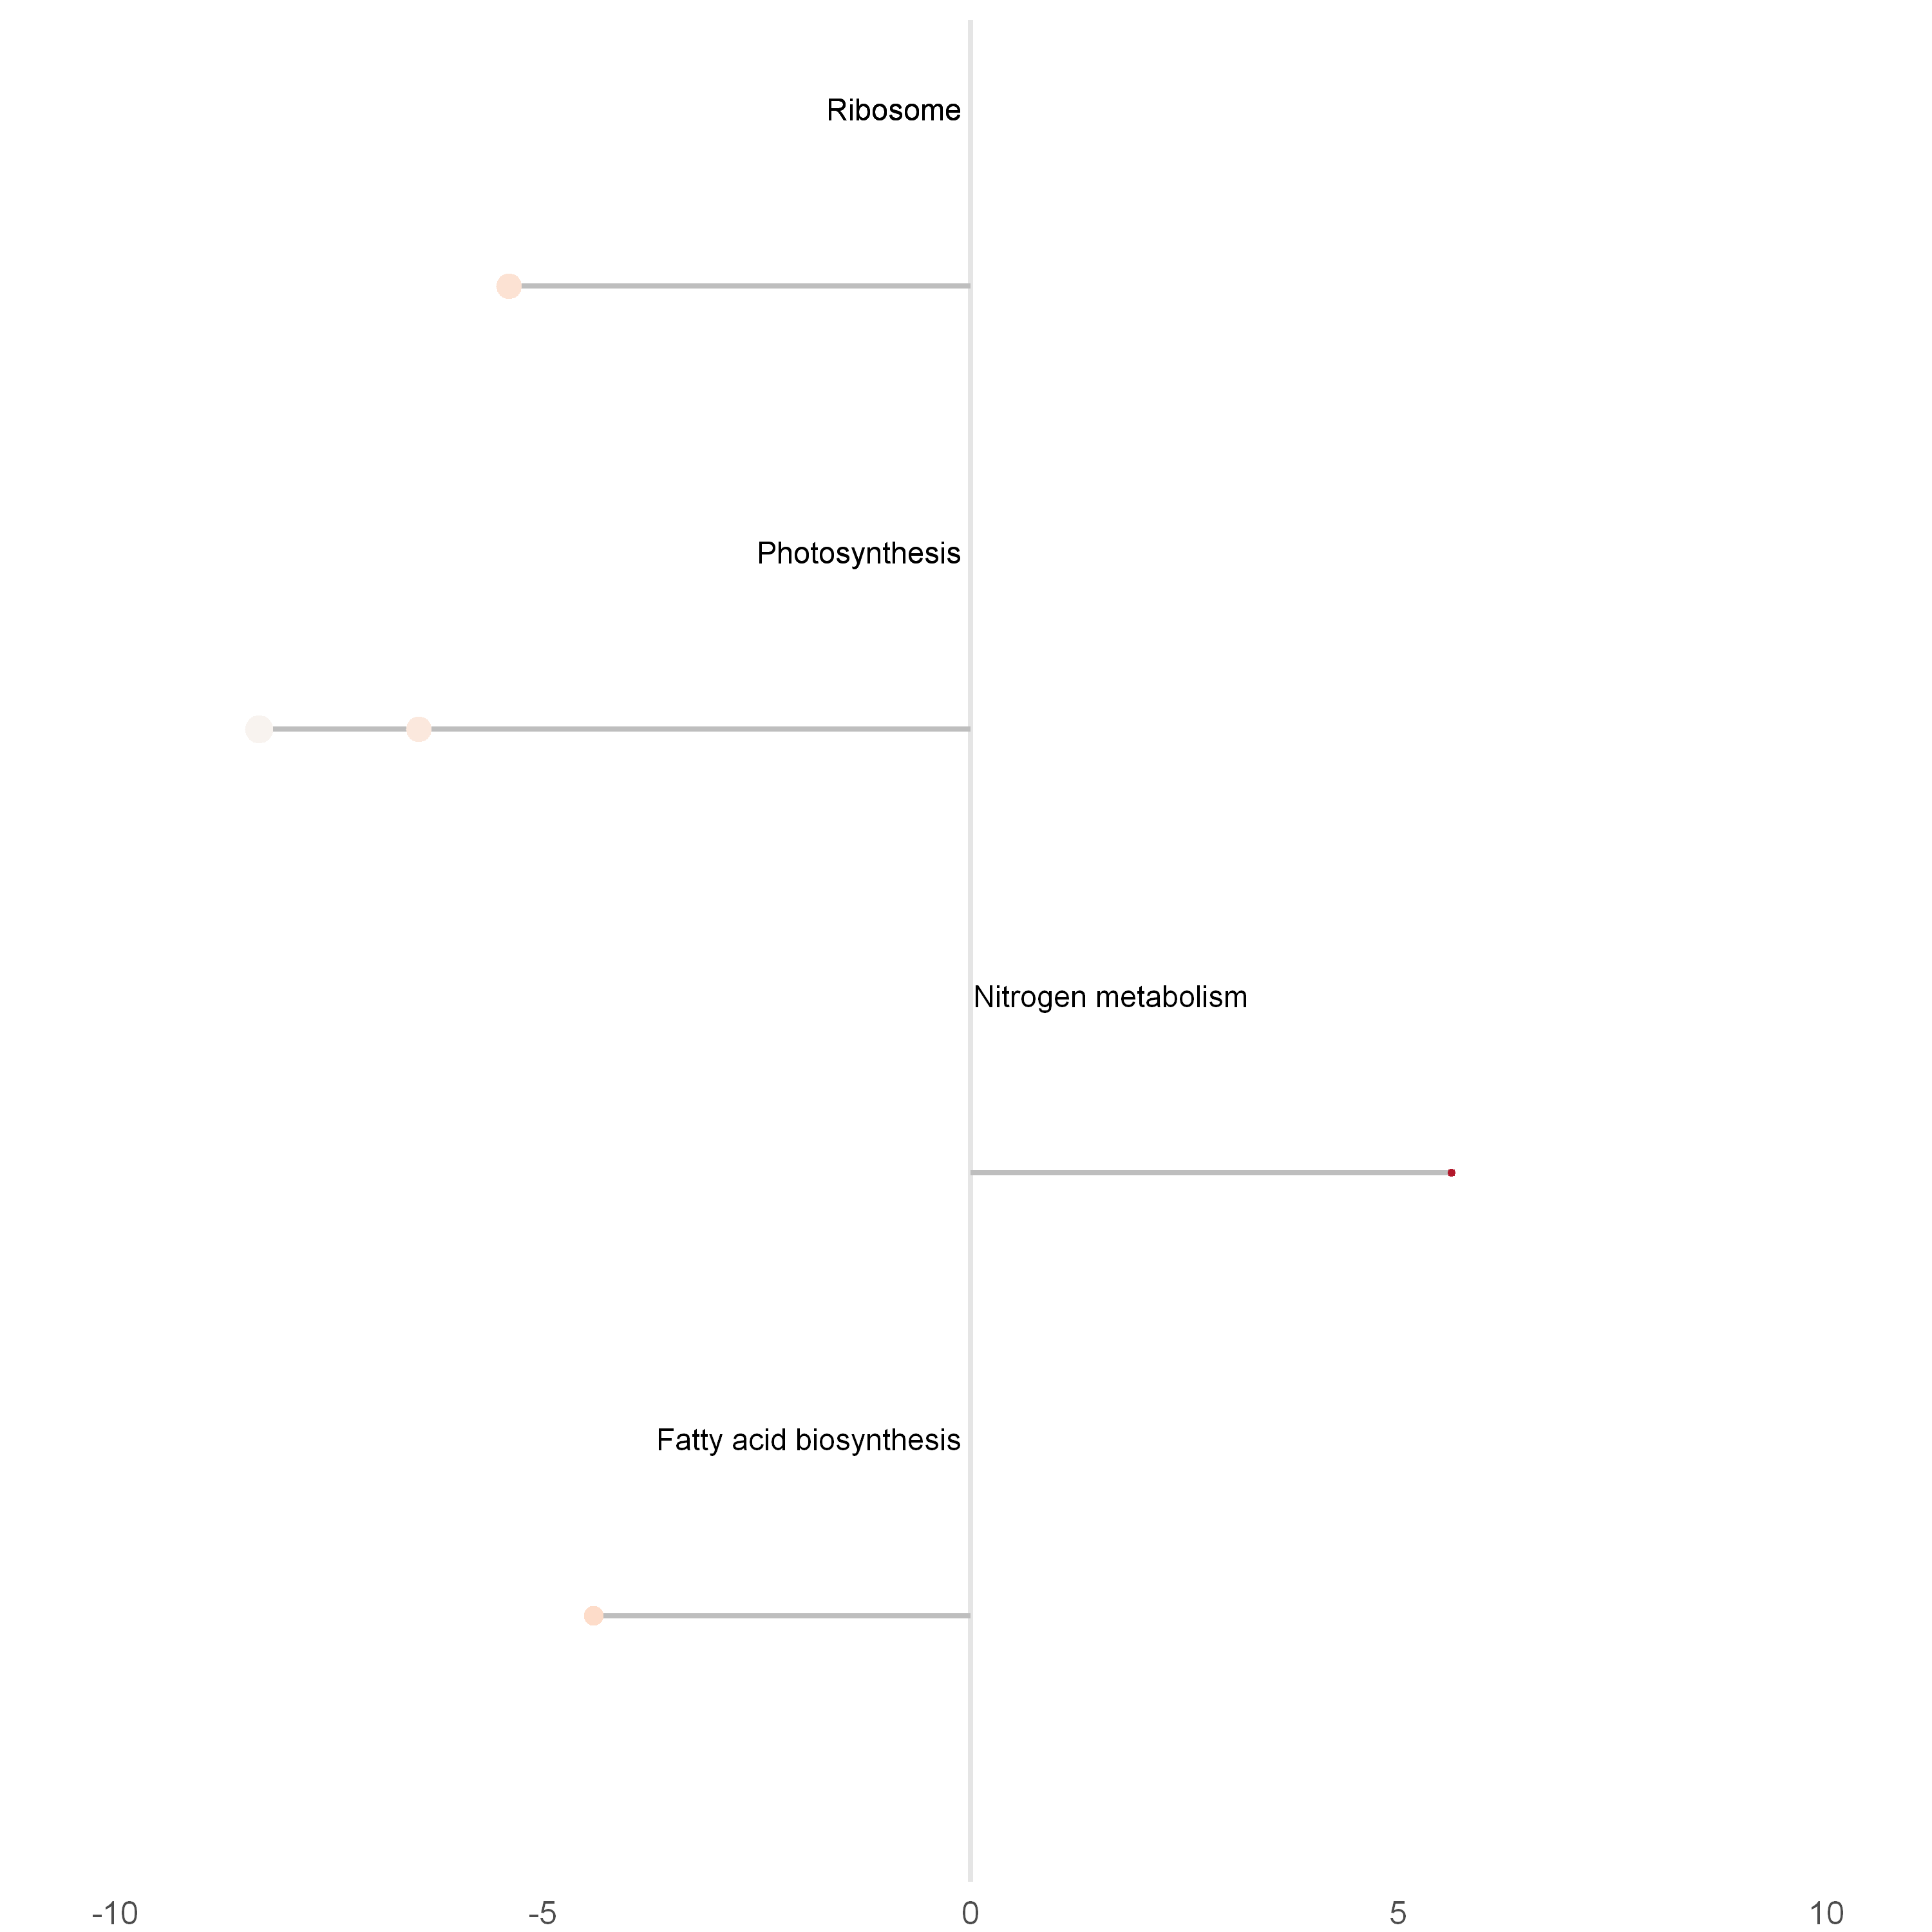

In [66]:
goseq_res %>% 
  #filter(enrich == 'sub') %>%
  filter(enrich == 'path') %>%
  filter(type %in% c('up', 'down')) %>%
  mutate(Ratio = numDEInCat / numInCat) %>%
  extract(PATH, c("pathway"), "^[[:digit:]]* *([^\\[]+) *\\[?") %>%
  mutate(padj_Score = -log10(padj)) %>%
  #filter( type=='up') %>%
  arrange(padj, over_represented_pvalue) %>%
  head(n=10) %>%
  mutate(ratio = ifelse(type == 'down', -Ratio, Ratio)) %>%
  mutate(just = ifelse(type == 'down', 'right', 'left')) %>%
  mutate(labelx = ifelse(type == 'down', -0.01, 0.03)) %>%
  mutate(padj_score = ifelse(type == 'down', -padj_Score, padj_Score)) %>%
  mutate(pathway = fct_reorder(pathway, padj_Score)) %>%

ggplot(aes(y=pathway, x=padj_score, size=numDEInCat)) + 
  geom_vline(aes(xintercept = 0.00), color = "grey90", size = 1) +
  geom_segment( aes(x=0, xend=padj_score, y=pathway, yend=pathway), color="grey", size=1) +
  geom_point(aes(color=padj_score)) + 
 scale_color_distiller(palette = 'RdBu') + # , limit=c(-15,15)) +
  geom_text(aes(x=labelx, y=pathway, label=pathway, size=20, hjust=just), nudge_y=0.4) + #, color='black')) + 
  xlim(-10, 10) +
  #scale_color_manual(values = c(up='red', down='blue')) +
  theme_classic(base_size = 15) + 
  theme(
      axis.title.y=element_blank(),
      axis.title.x=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.line.y = element_blank(),
        axis.line.x = element_blank(),
        legend.position="none")




In [67]:
sessionInfo()

R version 4.2.2 (2022-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19045)

Matrix products: default

locale:
[1] LC_COLLATE=English_Israel.utf8  LC_CTYPE=English_Israel.utf8   
[3] LC_MONETARY=English_Israel.utf8 LC_NUMERIC=C                   
[5] LC_TIME=English_Israel.utf8    

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.9.3               ComplexUpset_1.3.3         
 [3] corrplot_0.92               pheatmap_1.0.12            
 [5] lubridate_1.9.2             forcats_1.0.0              
 [7] stringr_1.5.0               dplyr_1.1.0                
 [9] purrr_1.0.1                 readr_2.1.4                
[11] tidyr_1.3.0                 tibble_3.1.8               
[13] tidyverse_2.0.0             readxl_1.4.2               
[15] goseq_1.50.0                geneLenDataBase_1.34.0     
[17] BiasedUrn_2.0.9             GGally_2.1.2 